In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pip install optuna

     |████████████████████████████████| 296kB 8.3MB/s 
     |████████████████████████████████| 163kB 13.7MB/s 
     |████████████████████████████████| 81kB 6.4MB/s 
     |████████████████████████████████| 81kB 8.2MB/s 
     |████████████████████████████████| 143kB 16.5MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 112kB 16.5MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=e4a2cb70bf76fc906197d660e47ee39de806bf1c05fcb94349a027eb9cf41bab
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip


In [4]:
pip install catboost --no-cache-dir

     |████████████████████████████████| 67.3MB 1.3MB/s 


In [5]:
pip install shap


     |████████████████████████████████| 358kB 7.6MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491629 sha256=8fc04d66e9847bcc5905518737d4305b68ebcf44c4264d4a3f4460c090829a46
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [6]:
pip install -I shap


Processing /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283/shap-0.39.0-cp37-cp37m-linux_x86_64.whl
     |████████████████████████████████| 15.3MB 338kB/s 
     |████████████████████████████████| 81kB 11.5MB/s 
     |████████████████████████████████| 3.4MB 43.2MB/s 
     |████████████████████████████████| 9.9MB 44.1MB/s 
     |████████████████████████████████| 27.4MB 164kB/s 
  Using cached https://files.pythonhosted.org/packages/78/c2/b3f55dfdb8af9812fdb9baf70cacf3b9e82e505b2bd4324d588888b81202/slicer-0.0.7-py3-none-any.whl
     |████████████████████████████████| 22.3MB 1.1MB/s 
     |████████████████████████████████| 25.3MB 111kB/s 
     |████████████████████████████████| 788kB 44.6MB/s 
     |████████████████████████████████| 512kB 54.4MB/s 
     |████████████████████████████████| 235kB 62.4MB/s 
     |████████████████████████████████| 307kB 52.3MB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.2 which is incom

In [2]:
import optuna
import xgboost
import catboost
import lightgbm as lgb
from lightgbm import LGBMRegressor 
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import seaborn as sn
from datetime import datetime
from numpy import mean, std
from math import sqrt
from scipy.stats import skew
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split, KFold, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [ ]:
# Import dataset
train = pd.read_csv("/content/drive/MyDrive/Ignacio Fiori Training/Machine Learning/Bike Sharing Demand/train.csv")

In [ ]:
train, test=train_test_split(train, test_size=.2)

In [ ]:
print(train.shape)
print(test.shape)

(8708, 12)
(2178, 12)




*   datetime - hourly date + timestamp 
*   season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
*   holiday - whether the day is considered a holiday
*   workingday - whether the day is neither a weekend nor holiday
*   weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
*   temp - temperature in Celsius
*   atemp - "feels like" temperature in Celsius
*   humidity - relative humidity
*   windspeed - wind speed
*   casual - number of non-registered user rentals initiated
*   registered - number of registered user rentals initiated
*   count - number of total rentals





**Exploration and Preprocessing of Data**

As a first step we can take a look in the data

In [ ]:
train.head()

datetime  season  holiday  ...  casual  registered  count
1213  2011-03-15 08:00:00       1        0  ...      23         259    282
9602  2012-10-04 11:00:00       4        0  ...      38         176    214
3412  2011-08-12 02:00:00       3        0  ...       0          15     15
3938  2011-09-15 03:00:00       3        0  ...       3           5      8
6072  2012-02-09 06:00:00       1        0  ...       1          75     76

[5 rows x 12 columns]

In [ ]:
test.head()

datetime  season  holiday  ...  casual  registered  count
97    2011-01-05 06:00:00       1        0  ...       0          33     33
3963  2011-09-16 04:00:00       3        0  ...       1           3      4
5819  2012-01-17 16:00:00       1        0  ...      14         205    219
4924  2011-11-18 06:00:00       4        0  ...       1          70     71
3281  2011-08-06 15:00:00       3        0  ...     130         232    362

[5 rows x 12 columns]

In [ ]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

Text(0.5, 1.0, 'Checking our target variable')

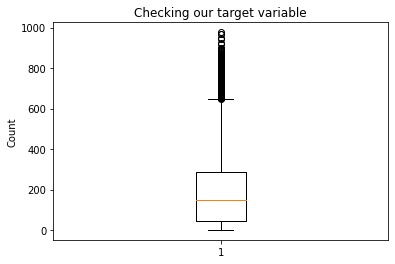

In [ ]:
plt.boxplot(train['count'])
plt.ylabel("Count")
plt.title("Checking our target variable")

We'll see some categorical variables

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Weather'),
 Text(0.5, 1.0, 'Box Plot On Count Across Weather')]

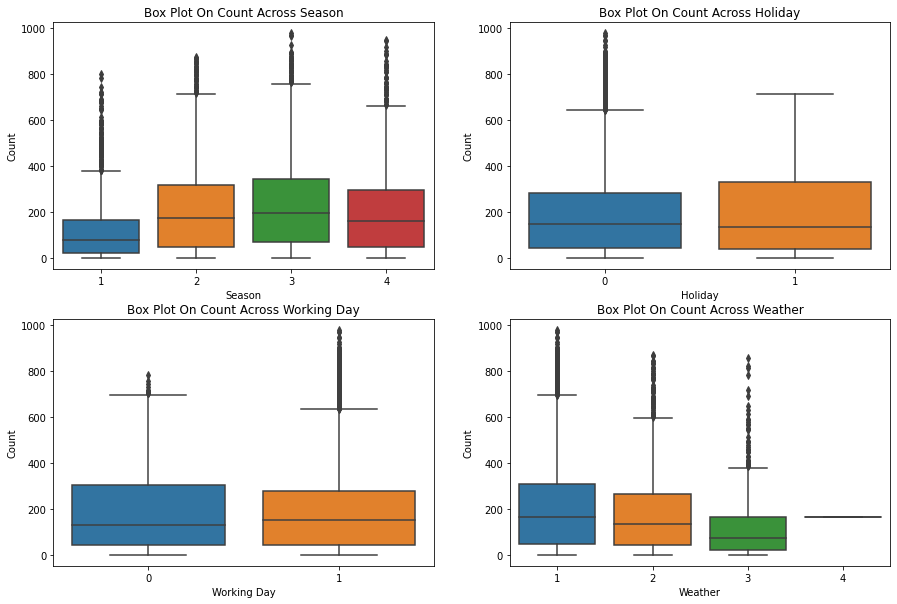

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15, 10)
sn.boxplot(data = train, y = "count", x = "season", orient = "v", ax = axes[0][0])
sn.boxplot(data = train, y = "count", x = "holiday", orient = "v", ax = axes[0][1])
sn.boxplot(data = train, y = "count", x = "workingday", orient = "v", ax = axes[1][0])
sn.boxplot(data = train, y = "count", x = "weather", orient = "v", ax = axes[1][1])


axes[0][0].set(xlabel = 'Season', ylabel = 'Count', title = "Box Plot On Count Across Season")
axes[0][1].set(xlabel = 'Holiday', ylabel = 'Count', title = "Box Plot On Count Across Holiday")
axes[1][0].set(xlabel = 'Working Day', ylabel = 'Count', title = "Box Plot On Count Across Working Day")
axes[1][1].set(xlabel = 'Weather', ylabel = 'Count', title = "Box Plot On Count Across Weather")

We can get some points from the graphs above:

*   Spring season has got relatively lower count
*   In holiday people tend to use bikes more and also if it's not a working day
*   We can see a big difference in the count depending on the weather.






Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


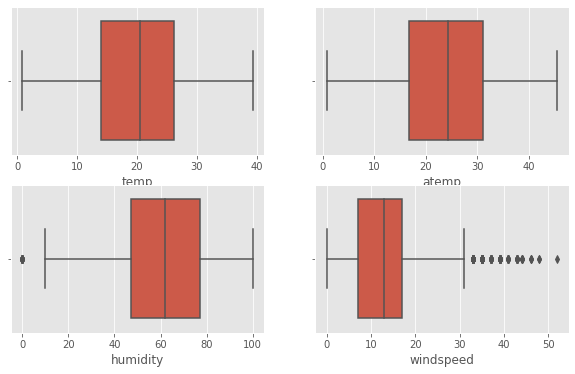

In [ ]:
cont_names=['temp','atemp','humidity','windspeed']

i=0
for name in cont_names:
    i=i+1
    plt.subplot(2,2,i)
    sn.boxplot(name,data=train) 
    
plt.show()

From above graphs we can see that windspeed has a lot of outliers. 

**Feature Engineering**

In [ ]:
from datetime import datetime

train['datetime'] = train['datetime'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

train['month'] = train['datetime'].apply(lambda x:x.month)
train['hour'] = train['datetime'].apply(lambda x:x.hour)
train['day'] = train['datetime'].apply(lambda x:x.day)
train['year'] = train['datetime'].apply(lambda x:x.year)




test['datetime'] = test['datetime'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

test['month'] = test['datetime'].apply(lambda x:x.month)
test['hour'] = test['datetime'].apply(lambda x:x.hour)
test['day'] = test['datetime'].apply(lambda x:x.day)
test['year'] = test['datetime'].apply(lambda x:x.year)

In [ ]:
train.head()

datetime  season  holiday  workingday  ...  month  hour  day  year
3440 2011-08-13 06:00:00       3        0           0  ...      8     6   13  2011
5518 2012-01-05 01:00:00       1        0           1  ...      1     1    5  2012
8555 2012-07-17 20:00:00       3        0           1  ...      7    20   17  2012
6764 2012-03-19 03:00:00       1        0           1  ...      3     3   19  2012
5340 2011-12-16 14:00:00       4        0           1  ...     12    14   16  2011

[5 rows x 16 columns]

In [ ]:
train.corr()

season   holiday  workingday  ...      hour       day      year
season      1.000000  0.029305   -0.010805  ... -0.003437 -0.006413  0.005438
holiday     0.029305  1.000000   -0.250301  ...  0.002406 -0.012307  0.015209
workingday -0.010805 -0.250301    1.000000  ... -0.000174  0.006327  0.000156
weather     0.008116 -0.005239    0.034812  ... -0.025493 -0.009467 -0.005244
temp        0.256507 -0.003619    0.035307  ...  0.146891  0.017236  0.065775
atemp       0.262839 -0.008192    0.029788  ...  0.141824  0.010791  0.062693
humidity    0.194103 -0.004891   -0.018075  ... -0.276315 -0.019048 -0.068034
windspeed  -0.152315  0.009926    0.010786  ...  0.142748  0.038308 -0.017908
casual      0.103625  0.046824   -0.312609  ...  0.306006  0.020521  0.140407
registered  0.170385 -0.020041    0.124040  ...  0.384837  0.018503  0.261156
count       0.170717 -0.004011    0.018621  ...  0.405180  0.021062  0.256649
month       0.971776 -0.000404   -0.001820  ... -0.003839 -0.005434  0.004716
hour       -0.003437  0.002406   -0.000174  ...  1.000000  0.001719 -0.011051
day        -0.006413 -0.012307    0.006327  ...  0.001719  1.000000  0.005148
year        0.005438  0.015209    0.000156  ... -0.011051  0.005148  1.000000

[15 rows x 15 columns]



*   temp y atemp seem to be similar. We can delete one of them
*   We also will delete casual and registered.
*   Working day and holiday as we see in the graphs tend to be similar so we can delete one.





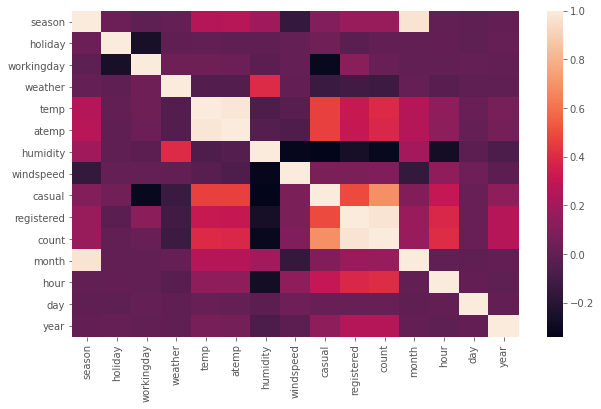

In [ ]:
train.cov()
sn.heatmap(train.corr())
plt.show()

In [ ]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
month                  int64
hour                   int64
day                    int64
year                   int64
dtype: object

As we see, the columns "season", "holiday", "workingday" and "weather" should be of "categorical" data type. But the current data type is "int" for those columns. We'll transform the dataset in the following ways so that we can get started up with our EDA.



*   Create new columns "date, "hour", "weekDay", "month" from "datetime" column. Because of this we'll delete the "datetime" column
*   Convert the datatype of "season","holiday","workingday" and "weather" to category.



In [ ]:
train=train.drop(['datetime','temp','casual','registered','day'], axis=1)
train.head()

season  holiday  workingday  weather  ...  count  month  hour  year
3440       3        0           0        1  ...     22      8     6  2011
5518       1        0           1        1  ...      5      1     1  2012
8555       3        0           1        1  ...    427      7    20  2012
6764       1        0           1        1  ...      2      3     3  2012
5340       4        0           1        2  ...    128     12    14  2011

[5 rows x 11 columns]

In [ ]:
test=test.drop(['datetime','temp','casual','registered','day'], axis=1)
test.head()

season  holiday  workingday  weather  ...  count  month  hour  year
5995       1        0           1        1  ...     21      2     0  2012
2479       2        0           0        1  ...     16      6     5  2011
9522       4        0           1        1  ...      7     10     3  2012
4221       4        0           1        1  ...    146     10    22  2011
9569       4        0           1        2  ...      9     10     2  2012

[5 rows x 11 columns]

In [ ]:
train.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
atemp         float64
humidity        int64
windspeed     float64
count           int64
month           int64
hour            int64
year            int64
dtype: object

In [ ]:
categoricalFeatureNames = ["season","holiday","workingday","weather","month","year","hour"]
for var in categoricalFeatureNames:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [ ]:
train.dtypes

season        category
holiday       category
workingday    category
weather       category
atemp          float64
humidity         int64
windspeed      float64
count            int64
month         category
hour          category
year          category
dtype: object

In [ ]:
train['count'].describe()

count    8708.000000
mean      192.391824
std       181.243714
min         1.000000
25%        43.000000
50%       147.000000
75%       285.000000
max       977.000000
Name: count, dtype: float64

Skew is:  1.2333467561089055


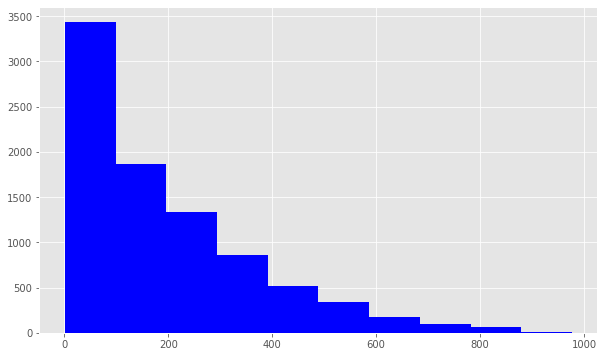

In [ ]:
print("Skew is: ", train['count'].skew())
plt.style.use(style="ggplot")
plt.rcParams["figure.figsize"]=(10,6)
plt.hist(train['count'],color="blue")
plt.show()

Skew is:  1.276227233429069


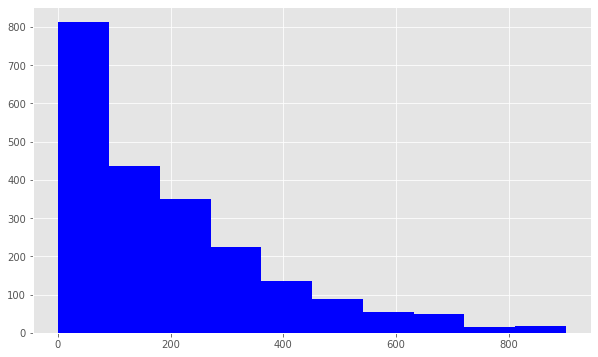

In [ ]:
print("Skew is: ", test['count'].skew())
plt.style.use(style="ggplot")
plt.rcParams["figure.figsize"]=(10,6)
plt.hist(test['count'],color="blue")
plt.show()

Our variable to predict is skewed so we apply the logarithm. The logarithm reduces the dynamic range of a variable so the differences are preserved while the scale is not dramatically skewed.

In [ ]:
train['count'] = np.log1p(train['count'])
train['count'].head(10)

3440     3.135494
5518     1.791759
8555     6.059123
6764     1.098612
5340     4.859812
9005     5.796058
5006     5.624018
10525    4.574711
8461     5.575949
3920     5.313206
Name: count, dtype: float64

In [ ]:
test['count'] = np.log1p(test['count'])
test['count'].head(10)

5995     3.091042
2479     2.833213
9522     2.079442
4221     4.990433
9569     2.302585
9816     5.587249
10354    5.429346
8701     5.598422
9272     6.510258
10447    5.771441
Name: count, dtype: float64

In [ ]:
train.head()

season holiday workingday weather  ...     count  month  hour  year
3440      3       0          0       1  ...  3.135494      8     6  2011
5518      1       0          1       1  ...  1.791759      1     1  2012
8555      3       0          1       1  ...  6.059123      7    20  2012
6764      1       0          1       1  ...  1.098612      3     3  2012
5340      4       0          1       2  ...  4.859812     12    14  2011

[5 rows x 11 columns]

In [ ]:
test.head()

season holiday workingday weather  ...     count  month  hour  year
5995      1       0          1       1  ...  3.091042      2     0  2012
2479      2       0          0       1  ...  2.833213      6     5  2011
9522      4       0          1       1  ...  2.079442     10     3  2012
4221      4       0          1       1  ...  4.990433     10    22  2011
9569      4       0          1       2  ...  2.302585     10     2  2012

[5 rows x 11 columns]

From our categorical variables we need to separate these in nominal and ordinal. In ordinal variables we'll apply target encoding and in nominal we'll apply one hot encoding

In [ ]:
nominal = [ 'holiday', 'workingday', 'weather', 'year']

ordinal = [ 'season', 'month', 'hour'] 

**Target Encoding**

In [ ]:
for var in ordinal:
  mean_encode = train.groupby(var)['count'].mean()
  train.loc[:, var] = train[var].map(mean_encode)
  test.loc[:, var] = test[var].map(mean_encode)

In [ ]:
train.head()

season holiday workingday weather  ...     count     month      hour  year
3440  4.896416       0          0       1  ...  3.135494  4.890738  3.924831  2011
5518  4.051260       0          1       1  ...  1.791759  3.893583  3.092159  2012
8555  4.896416       0          1       1  ...  6.059123  4.943546  5.289959  2012
6764  4.051260       0          1       1  ...  1.098612  4.236910  2.163920  2012
5340  4.686703       0          1       2  ...  4.859812  4.549934  5.318073  2011

[5 rows x 11 columns]

In [ ]:
test.head()

season holiday workingday weather  ...     count     month      hour  year
5995  4.051260       0          1       1  ...  3.091042  4.020280  3.756788  2012
2479  4.727273       0          0       1  ...  2.833213  4.913716  2.768714  2011
9522  4.686703       0          1       1  ...  2.079442  4.849623  2.163920  2012
4221  4.686703       0          1       1  ...  4.990433  4.849623  4.744417  2011
9569  4.686703       0          1       2  ...  2.302585  4.849623  2.592185  2012

[5 rows x 11 columns]

In [ ]:
for var in ordinal:
    train[var] = train[var].astype("float64")
    test[var] = test[var].astype("float64")

In [ ]:
train.dtypes

season         float64
holiday       category
workingday    category
weather       category
atemp          float64
humidity         int64
windspeed      float64
count          float64
month          float64
hour           float64
year          category
dtype: object

In [ ]:
test.dtypes

season         float64
holiday       category
workingday    category
weather       category
atemp          float64
humidity         int64
windspeed      float64
count          float64
month          float64
hour           float64
year          category
dtype: object

**One hot encoding**

In [ ]:
train = pd.get_dummies(train, drop_first=True)
train.shape

(8708, 13)

In [ ]:
train

season   atemp  humidity  ...  weather_3  weather_4  year_2012
3440  4.896416  30.305        73  ...          0          0          0
5518  4.051260  11.365        51  ...          0          0          1
8555  4.896416  37.880        34  ...          0          0          1
6764  4.051260  22.725        88  ...          0          0          1
5340  4.686703  15.910        42  ...          0          0          0
...        ...     ...       ...  ...        ...        ...        ...
9749  4.686703  31.060        40  ...          0          0          1
7972  4.727273  30.305        83  ...          1          0          1
7956  4.727273  33.335        58  ...          0          0          1
1144  4.051260  12.880        65  ...          0          0          0
5787  4.051260   6.820        54  ...          0          0          1

[8708 rows x 13 columns]

In [ ]:
test = pd.get_dummies(test, drop_first=True)
test.shape

(2178, 12)

In [ ]:
test

season   atemp  humidity  ...  weather_2  weather_3  year_2012
5995  4.051260  12.120        65  ...          0          0          1
2479  4.727273  31.820        74  ...          0          0          0
9522  4.686703  21.970        77  ...          0          0          1
4221  4.686703  24.240        68  ...          0          0          0
9569  4.686703  27.275        94  ...          1          0          1
...        ...     ...       ...  ...        ...        ...        ...
6560  4.051260  15.910        27  ...          0          0          1
3277  4.896416  37.120        62  ...          0          0          0
8162  4.896416  40.150        39  ...          0          0          1
9277  4.896416  27.275        49  ...          0          0          1
7007  4.727273  17.425        71  ...          0          0          1

[2178 rows x 12 columns]

As we saw above train and test have different shape. We need them to have the same size so we'll apply a inner join in order to let themn with the same quantity of columns

In [ ]:
train, test = train.align(test, join='inner', axis=1)

In [ ]:
train.shape

(8708, 12)

In [ ]:
test.shape

(2178, 12)

In [ ]:
# Visualize all the features that have missing values
train_missing = train.isna().sum() / train.shape[0]
train_missing[train_missing > 0.0].sort_values(ascending=False)

Series([], dtype: float64)

In [ ]:
# Visualize all the features that have missing values
test_missing = test.isna().sum() / test.shape[0]
test_missing[test_missing > 0.0].sort_values(ascending=False)

Series([], dtype: float64)

In [ ]:
y_train=train['count']
X_train=train.drop(["count"], axis=1)
y_test=test["count"]
X_test=test.drop(["count"], axis=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(8708, 11)
(8708,)
(2178, 11)
(2178,)


**Models**

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

**Linear Regression**

In [ ]:
lr=linear_model.LinearRegression()
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print("MSE train: " + str(mse_train))
print("RMSE train: " + str(rmse_train))
print("MAPE train: " + str(mape_train))

mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("MSE test: " + str(mse_test))
print("RMSE test: " + str(rmse_test))
print("MAPE test: " + str(mape_test))


MSE train: 0.3420814035090427
RMSE train: 0.5848772550792539
MAPE train: 13.767371470588563
MSE test: 0.35795979590782057
RMSE test: 0.5982974142580098
MAPE test: 13.947088561751528


**Random Forest**

In [ ]:
rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print("MSE train: " + str(mse_train))
print("RMSE train: " + str(rmse_train))
print("MAPE train: " + str(mape_train))

mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("MSE test: " + str(mse_test))
print("RMSE test: " + str(rmse_test))
print("MAPE test: " + str(mape_test))


MSE train: 0.016943964123885165
RMSE train: 0.13016898295632937
MAPE train: 2.960956513544802
MSE test: 0.11983230906873413
RMSE test: 0.346168035885369
MAPE test: 7.962218131825506


In [ ]:
train.columns

Index(['season', 'atemp', 'humidity', 'windspeed', 'count', 'month', 'hour',
       'holiday_1', 'workingday_1', 'weather_2', 'weather_3', 'year_2012'],
      dtype='object')

In [ ]:
feature_list = ['season', 'atemp', 'humidity', 'windspeed', 'month', 'hour',
       'holiday_1', 'workingday_1', 'weather_2', 'weather_3', 'year_2012']
# Get numerical feature importances
importances = list(rfc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances if (pair[1] > 0.0)];

Variable: hour                 Importance: 0.77
Variable: atemp                Importance: 0.05
Variable: month                Importance: 0.04
Variable: workingday_1         Importance: 0.04
Variable: year_2012            Importance: 0.03
Variable: season               Importance: 0.02
Variable: humidity             Importance: 0.02
Variable: windspeed            Importance: 0.01
Variable: weather_3            Importance: 0.01


In [ ]:
new_train = train[['hour', 'atemp', 'month', 'workingday_1', 
                   'humidity', 'year_2012', 'season', 'count']]

new_test = test[['hour', 'atemp', 'month', 'workingday_1', 
                   'humidity', 'year_2012', 'season', 'count']]

In [ ]:
y_train_new = new_train['count']
X_train_new = new_train.drop(["count"], axis=1)
y_test_new = new_test['count']
X_test_new = new_test.drop(["count"], axis=1)
print(X_train_new.shape)
print(X_test_new.shape)
print(y_train_new.shape)
print(y_test_new.shape)

(8708, 7)
(2178, 7)
(8708,)
(2178,)


In [ ]:
rfc = RandomForestRegressor()
rfc.fit(X_train_new, y_train_new)
y_pred_train = rfc.predict(X_train_new)
y_pred_test = rfc.predict(X_test_new)

mse_train = mean_squared_error(y_train_new,y_pred_train)
rmse_train = sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train_new, y_pred_train)

print("MSE train: " + str(mse_train))
print("RMSE train: " + str(rmse_train))
print("MAPE train: " + str(mape_train))

mse_test = mean_squared_error(y_test_new,y_pred_test)
rmse_test = sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test_new, y_pred_test)

print("MSE test: " + str(mse_test))
print("RMSE test: " + str(rmse_test))
print("MAPE test: " + str(mape_test))

MSE train: 0.021108975366622533
RMSE train: 0.1452892816646243
MAPE train: 3.181712536951161
MSE test: 0.12729288966842833
RMSE test: 0.35678129108520856
MAPE test: 8.013255534309712


In order to find the better combination of parameters we'll use RandomizedSearch over GridSearch as it's more efficient.

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


{'bootstrap': True,
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1400}

In [ ]:
rfc = RandomForestRegressor(n_estimators = 1400, bootstrap = True, max_depth = 60, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 5)
rfc.fit(X_train, y_train)
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print("MSE train: " + str(mse_train))
print("RMSE train: " + str(rmse_train))
print("MAPE train: " + str(mape_train))

mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("MSE test: " + str(mse_test))
print("RMSE test: " + str(rmse_test))
print("MAPE test: " + str(mape_test))

MSE train: 0.02899458178203083
RMSE train: 0.17027795448040486
MAPE train: 3.896481153331045
MSE test: 0.11659559541911571
RMSE test: 0.3414609720291848
MAPE test: 7.824578044048254


**Gradient Boosting**

In [ ]:
grad_boost = GradientBoostingRegressor()
grad_boost.fit(X_train, y_train)
y_pred_train = grad_boost.predict(X_train)
y_pred_test = grad_boost.predict(X_test)

mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print("MSE train: " + str(mse_train))
print("RMSE train: " + str(rmse_train))
print("MAPE train: " + str(mape_train))

mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("MSE test: " + str(mse_test))
print("RMSE test: " + str(rmse_test))
print("MAPE test: " + str(mape_test))

MSE train: 0.2164183176684362
RMSE train: 0.4652078220198325
MAPE train: 10.878285045328372
MSE test: 0.23338448164902148
RMSE test: 0.4830988321751787
MAPE test: 11.315554827607075


**XGB Regressor**

In [ ]:
xgb = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,             
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print("MSE train: " + str(mse_train))
print("RMSE train: " + str(rmse_train))
print("MAPE train: " + str(mape_train))

mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("MSE test: " + str(mse_test))
print("RMSE test: " + str(rmse_test))
print("MAPE test: " + str(mape_test))

[20:23:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE train: 0.05798844366831119
RMSE train: 0.2408078978528553
MAPE train: 5.579014879675296
MSE test: 0.09940137556320638
RMSE test: 0.31527983691191924
MAPE test: 7.331339658009788


**CatBoost Regressor**

In [ ]:
cat_model = catboost.CatBoostRegressor(loss_function='RMSE', 
                                       random_seed=2, 
                                       max_depth = 10,
                                       learning_rate = 0.05,
                                       random_strength=1,
                                       max_ctr_complexity=1,
                                       l2_leaf_reg=8,
                                       grow_policy = 'Lossguide',
                                       task_type='GPU',
                                      )


cat_model.fit(X_train, y_train)
y_pred_train = cat_model.predict(X_train)
y_pred_test = cat_model.predict(X_test)

mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print("MSE train: " + str(mse_train))
print("RMSE train: " + str(rmse_train))
print("MAPE train: " + str(mape_train))

mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("MSE test: " + str(mse_test))
print("RMSE test: " + str(rmse_test))
print("MAPE test: " + str(mape_test))

0:	learn: 1.3614677	total: 17ms	remaining: 17s
1:	learn: 1.3084603	total: 32.3ms	remaining: 16.1s
2:	learn: 1.2572772	total: 47.7ms	remaining: 15.9s
3:	learn: 1.2096608	total: 63.1ms	remaining: 15.7s
4:	learn: 1.1638502	total: 85.1ms	remaining: 16.9s
5:	learn: 1.1208134	total: 101ms	remaining: 16.7s
6:	learn: 1.0806649	total: 116ms	remaining: 16.4s
7:	learn: 1.0430087	total: 131ms	remaining: 16.3s
8:	learn: 1.0064088	total: 146ms	remaining: 16.1s
9:	learn: 0.9709661	total: 162ms	remaining: 16s
10:	learn: 0.9377852	total: 177ms	remaining: 15.9s
11:	learn: 0.9058037	total: 193ms	remaining: 15.9s
12:	learn: 0.8765935	total: 208ms	remaining: 15.8s
13:	learn: 0.8496452	total: 228ms	remaining: 16.1s
14:	learn: 0.8235924	total: 244ms	remaining: 16s
15:	learn: 0.7996857	total: 260ms	remaining: 16s
16:	learn: 0.7761316	total: 275ms	remaining: 15.9s
17:	learn: 0.7531887	total: 291ms	remaining: 15.9s
18:	learn: 0.7329930	total: 306ms	remaining: 15.8s
19:	learn: 0.7141829	total: 322ms	remaining: 1

**Light GBM**

In [ ]:
lgbm_regressor = lgb.LGBMRegressor(colsample_bytree = 0.7, 
                                       max_depth = 45,
                                       learning_rate = 0.06,
                                       min_child_weight = 3.3,
                                       n_estimators = 700,
                                       num_leaves = 50
                                      )

lgbm_regressor.fit(X_train, y_train)
y_pred_train = lgbm_regressor.predict(X_train)
y_pred_test = lgbm_regressor.predict(X_test)

mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print("MSE train: " + str(mse_train))
print("RMSE train: " + str(rmse_train))
print("MAPE train: " + str(mape_train))

mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("MSE test: " + str(mse_test))
print("RMSE test: " + str(rmse_test))
print("MAPE test: " + str(mape_test))

MSE train: 0.033706698413139065
RMSE train: 0.18359384089107963
MAPE train: 4.209646174307643
MSE test: 0.09172431543868514
RMSE test: 0.3028602242597815
MAPE test: 7.050790247604979


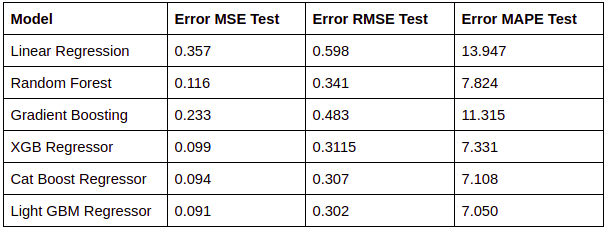

Now we're going to try some other tools like optuna, shap values in order to improve our work. We'll use these tools with Random Forest and XGB Regressor

In [ ]:
RANDOM_SEED = 42

# 10-fold CV
kfolds = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)

# Define the helper function so that it can be reused
def tune(objective):
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=1000)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}\n")
    print(f"Optimized parameters: {params}\n")
    return params

In [ ]:
##################
# Random Forest
##################
def randomforest_objective(trial):
    _n_estimators = trial.suggest_int("n_estimators", 300, 900)
    _max_depth = trial.suggest_int("max_depth", 5, 20)
    _min_samp_split = trial.suggest_int("min_samples_split", 2, 10)
    _min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 10)
    _max_features = trial.suggest_int("max_features", 2, 10)

    rf = RandomForestRegressor(
        max_depth=_max_depth,
        min_samples_split=_min_samp_split,
        min_samples_leaf=_min_samples_leaf,
        max_features=_max_features,
        n_estimators=_n_estimators,
        n_jobs=-1,
        random_state=RANDOM_SEED,
    )

    scores = cross_val_score(
        rf, X_train, y_train, cv=kfolds, scoring="neg_root_mean_squared_error"
    )
    return scores.mean()

randomforest_params = tune(randomforest_objective)
rf = RandomForestRegressor(n_jobs=-1, random_state=RANDOM_SEED, **randomforest_params)

[I 2021-04-26 20:30:15,390] A new study created in memory with name: no-name-d81f7b46-2e88-4725-9506-e004e1425317
[I 2021-04-26 20:31:22,436] Trial 0 finished with value: -0.3863154604242494 and parameters: {'n_estimators': 827, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': 9}. Best is trial 0 with value: -0.3863154604242494.
[I 2021-04-26 20:32:12,092] Trial 1 finished with value: -0.39245871476232475 and parameters: {'n_estimators': 652, 'max_depth': 18, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': 8}. Best is trial 1 with value: -0.39245871476232475.
[I 2021-04-26 20:32:34,902] Trial 2 finished with value: -0.570278110994366 and parameters: {'n_estimators': 642, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 9, 'max_features': 2}. Best is trial 2 with value: -0.570278110994366.
[I 2021-04-26 20:33:12,847] Trial 3 finished with value: -0.47806413184727853 and parameters: {'n_estimators': 862, 'max_depth': 11, 'min_samp

Best score: -0.664689311965674

Optimized parameters: {'n_estimators': 746, 'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 2}



In [ ]:
rfc = RandomForestRegressor(n_estimators = 746, max_depth = 7, min_samples_leaf = 5, min_samples_split = 10, max_features=2)
rfc.fit(X_train, y_train)
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)
mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print("MSE train: " + str(mse_train))
print("RMSE train: " + str(rmse_train))
print("MAPE train: " + str(mape_train))

mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("MSE test: " + str(mse_test))
print("RMSE test: " + str(rmse_test))
print("MAPE test: " + str(mape_test))

MSE train: 0.417978765505255
RMSE train: 0.6465127728863947
MAPE train: 17.415727235476698
MSE test: 0.4555791918416214
RMSE test: 0.6749660671779147
MAPE test: 18.170374020699317


In [ ]:
##################
# XGBoost
##################
def xgboost_objective(trial):
    _colsample_bytree = trial.suggest_float("colsample_bytree", 0.1, 0.9, log = True)
    _gamma = trial.suggest_int("gamma", 0, 10)
    _learning_rate = trial.suggest_float("learning_rate", 0.1, 0.6, log = True)
    _max_depth = trial.suggest_int("max_depth", 3, 9)
    _min_child_weight = trial.suggest_int("min_child_weight", 1, 9)
    _reg_alpha = trial.suggest_float("reg_alpha", 0.3, 0.9, log = True)
    _reg_lambda = trial.suggest_float("reg_lambda", 0.3, 0.9, log = True)
    _subsample = trial.suggest_float("subsample", 0.1, 0.9, log = True)
    xgb = xgboost.XGBRegressor(
        colsample_bytree=_colsample_bytree,
        gamma = _gamma,
        learning_rate = _learning_rate,
        max_depth = _max_depth,
        min_child_weight = _min_child_weight,
        reg_alpha = _reg_alpha,
        reg_lambda = _reg_lambda,
        subsample = _subsample,
        n_jobs=-1,
        random_state=RANDOM_SEED,
    )

    scores = cross_val_score(
        xgb, X_train, y_train, cv=kfolds, scoring="neg_root_mean_squared_error"
    )
    return scores.mean()

xgboost_params = tune(xgboost_objective)
xgb = xgboost.XGBRegressor(n_jobs=-1, random_state=RANDOM_SEED, **xgboost_params)

[I 2021-04-26 21:19:17,557] A new study created in memory with name: no-name-dac88e9b-a0ff-4263-93a9-79816a2d00ea


[21:19:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:19:20,914] Trial 0 finished with value: -0.5652523978358587 and parameters: {'colsample_bytree': 0.25109161965522725, 'gamma': 0, 'learning_rate': 0.17868852459610923, 'max_depth': 8, 'min_child_weight': 1, 'reg_alpha': 0.8907113226340796, 'reg_lambda': 0.3787842429791754, 'subsample': 0.2465875421403421}. Best is trial 0 with value: -0.5652523978358587.


[21:19:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:19:26,636] Trial 1 finished with value: -0.4048406813344109 and parameters: {'colsample_bytree': 0.4033193552320587, 'gamma': 4, 'learning_rate': 0.3271598686343686, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.6279503142558047, 'reg_lambda': 0.315072993356815, 'subsample': 0.5492361980670314}. Best is trial 0 with value: -0.5652523978358587.


[21:19:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:19:34,465] Trial 2 finished with value: -0.375894409354428 and parameters: {'colsample_bytree': 0.7170086155038747, 'gamma': 7, 'learning_rate': 0.3900821129328703, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.3972920731076623, 'reg_lambda': 0.36484046135675535, 'subsample': 0.6596005998971753}. Best is trial 0 with value: -0.5652523978358587.


[21:19:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:19:39,973] Trial 3 finished with value: -0.4110254795283696 and parameters: {'colsample_bytree': 0.6199270673907431, 'gamma': 9, 'learning_rate': 0.16210981873261077, 'max_depth': 6, 'min_child_weight': 3, 'reg_alpha': 0.5775444765221011, 'reg_lambda': 0.42809595090132213, 'subsample': 0.6582258806193293}. Best is trial 0 with value: -0.5652523978358587.


[21:19:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:19:43,001] Trial 4 finished with value: -0.5511644709691945 and parameters: {'colsample_bytree': 0.2678691755716695, 'gamma': 1, 'learning_rate': 0.2922909438731355, 'max_depth': 6, 'min_child_weight': 2, 'reg_alpha': 0.7004198220326158, 'reg_lambda': 0.5308814594935144, 'subsample': 0.39877048686502314}. Best is trial 0 with value: -0.5652523978358587.


[21:19:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:19:46,420] Trial 5 finished with value: -0.5653503952904353 and parameters: {'colsample_bytree': 0.19189711487648178, 'gamma': 8, 'learning_rate': 0.2805516305380048, 'max_depth': 8, 'min_child_weight': 9, 'reg_alpha': 0.7913408951318402, 'reg_lambda': 0.4110342866045499, 'subsample': 0.3784468937229198}. Best is trial 5 with value: -0.5653503952904353.


[21:19:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:19:48,248] Trial 6 finished with value: -0.8621034938198072 and parameters: {'colsample_bytree': 0.10503678164351266, 'gamma': 8, 'learning_rate': 0.10101375133580011, 'max_depth': 5, 'min_child_weight': 2, 'reg_alpha': 0.8298107260155138, 'reg_lambda': 0.4562608672246121, 'subsample': 0.8517388708220708}. Best is trial 6 with value: -0.8621034938198072.


[21:19:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:19:50,458] Trial 7 finished with value: -0.640086902419924 and parameters: {'colsample_bytree': 0.10841252874150059, 'gamma': 8, 'learning_rate': 0.3200023565655089, 'max_depth': 7, 'min_child_weight': 2, 'reg_alpha': 0.8042038774511382, 'reg_lambda': 0.30118419451852413, 'subsample': 0.4432805874709452}. Best is trial 6 with value: -0.8621034938198072.


[21:19:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:19:52,580] Trial 8 finished with value: -0.6754200177220153 and parameters: {'colsample_bytree': 0.12926800492732718, 'gamma': 1, 'learning_rate': 0.23100527315500077, 'max_depth': 5, 'min_child_weight': 9, 'reg_alpha': 0.4563601003729069, 'reg_lambda': 0.459332443166579, 'subsample': 0.40141576901776227}. Best is trial 6 with value: -0.8621034938198072.


[21:19:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:19:55,682] Trial 9 finished with value: -0.5916889519864991 and parameters: {'colsample_bytree': 0.23792533359546006, 'gamma': 4, 'learning_rate': 0.1067402825932267, 'max_depth': 9, 'min_child_weight': 3, 'reg_alpha': 0.5079212485174119, 'reg_lambda': 0.38732035896414785, 'subsample': 0.203907562407255}. Best is trial 6 with value: -0.8621034938198072.


[21:19:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:19:57,176] Trial 10 finished with value: -0.6314441547204693 and parameters: {'colsample_bytree': 0.13667123131649506, 'gamma': 10, 'learning_rate': 0.5801127865179379, 'max_depth': 3, 'min_child_weight': 5, 'reg_alpha': 0.31135561271848916, 'reg_lambda': 0.7533812470071507, 'subsample': 0.13157302442697505}. Best is trial 6 with value: -0.8621034938198072.


[21:19:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:19:58,925] Trial 11 finished with value: -0.8148247512342301 and parameters: {'colsample_bytree': 0.10182162556965864, 'gamma': 2, 'learning_rate': 0.12079775683348322, 'max_depth': 4, 'min_child_weight': 9, 'reg_alpha': 0.4668045606529305, 'reg_lambda': 0.5548526410388381, 'subsample': 0.8395857403873054}. Best is trial 6 with value: -0.8621034938198072.


[21:19:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:19:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:20:00,658] Trial 12 finished with value: -0.8476333455190888 and parameters: {'colsample_bytree': 0.10385467144048499, 'gamma': 6, 'learning_rate': 0.1064309770038016, 'max_depth': 4, 'min_child_weight': 7, 'reg_alpha': 0.3803758521159313, 'reg_lambda': 0.586237286006098, 'subsample': 0.8996428656153733}. Best is trial 6 with value: -0.8621034938198072.


[21:20:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:20:02,380] Trial 13 finished with value: -0.8629273124067416 and parameters: {'colsample_bytree': 0.1518521800077937, 'gamma': 6, 'learning_rate': 0.10066282590236364, 'max_depth': 3, 'min_child_weight': 7, 'reg_alpha': 0.30428184516163104, 'reg_lambda': 0.7129880367530735, 'subsample': 0.8632303079982101}. Best is trial 13 with value: -0.8629273124067416.


[21:20:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:20:04,087] Trial 14 finished with value: -0.7743021329498445 and parameters: {'colsample_bytree': 0.1678687258963762, 'gamma': 5, 'learning_rate': 0.1438540762556605, 'max_depth': 3, 'min_child_weight': 7, 'reg_alpha': 0.3031899292424712, 'reg_lambda': 0.8481975267897156, 'subsample': 0.8670932780810271}. Best is trial 13 with value: -0.8629273124067416.


[21:20:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:20:05,653] Trial 15 finished with value: -0.8175991493058014 and parameters: {'colsample_bytree': 0.15555650796116674, 'gamma': 10, 'learning_rate': 0.13178632982551683, 'max_depth': 4, 'min_child_weight': 6, 'reg_alpha': 0.36272356365708397, 'reg_lambda': 0.6674183388263578, 'subsample': 0.10129506806404986}. Best is trial 13 with value: -0.8629273124067416.


[21:20:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:20:09,728] Trial 16 finished with value: -0.46375489382769713 and parameters: {'colsample_bytree': 0.4005275679230763, 'gamma': 6, 'learning_rate': 0.10034361029031921, 'max_depth': 5, 'min_child_weight': 4, 'reg_alpha': 0.6559217797145154, 'reg_lambda': 0.6485374197345469, 'subsample': 0.6501150006397975}. Best is trial 13 with value: -0.8629273124067416.


[21:20:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:20:12,214] Trial 17 finished with value: -0.5618268374271059 and parameters: {'colsample_bytree': 0.19817989649524356, 'gamma': 7, 'learning_rate': 0.2011832051942441, 'max_depth': 5, 'min_child_weight': 8, 'reg_alpha': 0.3422433567393621, 'reg_lambda': 0.4831088319371493, 'subsample': 0.8960979394380845}. Best is trial 13 with value: -0.8629273124067416.


[21:20:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:20:14,483] Trial 18 finished with value: -0.5052236343175942 and parameters: {'colsample_bytree': 0.34885440430865927, 'gamma': 4, 'learning_rate': 0.5038711231125356, 'max_depth': 3, 'min_child_weight': 1, 'reg_alpha': 0.8805836179930908, 'reg_lambda': 0.8703024902913005, 'subsample': 0.2872713260100524}. Best is trial 13 with value: -0.8629273124067416.


[21:20:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:20:16,433] Trial 19 finished with value: -0.8639932132382251 and parameters: {'colsample_bytree': 0.12112483693417699, 'gamma': 9, 'learning_rate': 0.10121480760652715, 'max_depth': 4, 'min_child_weight': 6, 'reg_alpha': 0.5573829774891894, 'reg_lambda': 0.7312762618090111, 'subsample': 0.5725395505090338}. Best is trial 19 with value: -0.8639932132382251.


[21:20:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:20:18,381] Trial 20 finished with value: -0.8145803379209736 and parameters: {'colsample_bytree': 0.13155471693199228, 'gamma': 9, 'learning_rate': 0.12323879571057376, 'max_depth': 4, 'min_child_weight': 6, 'reg_alpha': 0.5581850678118732, 'reg_lambda': 0.7772291667662617, 'subsample': 0.5098760792057487}. Best is trial 19 with value: -0.8639932132382251.


[21:20:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:20:20,349] Trial 21 finished with value: -0.8633480796133256 and parameters: {'colsample_bytree': 0.10327824200766583, 'gamma': 8, 'learning_rate': 0.10063819028102086, 'max_depth': 5, 'min_child_weight': 6, 'reg_alpha': 0.43335816090454615, 'reg_lambda': 0.6605683916463522, 'subsample': 0.7246665654799193}. Best is trial 19 with value: -0.8639932132382251.


[21:20:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:20:22,091] Trial 22 finished with value: -0.766702298018418 and parameters: {'colsample_bytree': 0.12661454187542726, 'gamma': 9, 'learning_rate': 0.14975519260754888, 'max_depth': 3, 'min_child_weight': 6, 'reg_alpha': 0.431940003929721, 'reg_lambda': 0.6874534107109542, 'subsample': 0.7196539671543501}. Best is trial 19 with value: -0.8639932132382251.


[21:20:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:20:24,083] Trial 23 finished with value: -0.831677787010503 and parameters: {'colsample_bytree': 0.16458170811808437, 'gamma': 7, 'learning_rate': 0.11443669913920312, 'max_depth': 4, 'min_child_weight': 8, 'reg_alpha': 0.5355419453923196, 'reg_lambda': 0.6002720601994622, 'subsample': 0.540167053448707}. Best is trial 19 with value: -0.8639932132382251.


[21:20:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:20:26,043] Trial 24 finished with value: -0.7890538607921121 and parameters: {'colsample_bytree': 0.10004448617498818, 'gamma': 6, 'learning_rate': 0.13494392840468628, 'max_depth': 5, 'min_child_weight': 6, 'reg_alpha': 0.4949805637431307, 'reg_lambda': 0.7716032691300238, 'subsample': 0.7300763732560733}. Best is trial 19 with value: -0.8639932132382251.


[21:20:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:20:28,324] Trial 25 finished with value: -0.6057814218405402 and parameters: {'colsample_bytree': 0.19906681090858253, 'gamma': 10, 'learning_rate': 0.10044558906761954, 'max_depth': 3, 'min_child_weight': 8, 'reg_alpha': 0.430583686639512, 'reg_lambda': 0.7108878597343649, 'subsample': 0.5677477168126378}. Best is trial 19 with value: -0.8639932132382251.


[21:20:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:20:30,390] Trial 26 finished with value: -0.7332286958918179 and parameters: {'colsample_bytree': 0.11934157548193085, 'gamma': 5, 'learning_rate': 0.17452635293375232, 'max_depth': 6, 'min_child_weight': 4, 'reg_alpha': 0.5959287174071191, 'reg_lambda': 0.6218675850378546, 'subsample': 0.33599054240669335}. Best is trial 19 with value: -0.8639932132382251.


[21:20:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:20:32,217] Trial 27 finished with value: -0.8258191314403897 and parameters: {'colsample_bytree': 0.15707301778138505, 'gamma': 8, 'learning_rate': 0.11684963895348068, 'max_depth': 4, 'min_child_weight': 7, 'reg_alpha': 0.3296910883440109, 'reg_lambda': 0.8967704823554046, 'subsample': 0.7498792563896829}. Best is trial 19 with value: -0.8639932132382251.


[21:20:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:20:34,226] Trial 28 finished with value: -0.6938460964704299 and parameters: {'colsample_bytree': 0.14871628319755517, 'gamma': 9, 'learning_rate': 0.21323611413804433, 'max_depth': 5, 'min_child_weight': 5, 'reg_alpha': 0.40657943652615824, 'reg_lambda': 0.8142360710485876, 'subsample': 0.47463052227939573}. Best is trial 19 with value: -0.8639932132382251.


[21:20:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:20:36,411] Trial 29 finished with value: -0.585075663851163 and parameters: {'colsample_bytree': 0.23227401428056932, 'gamma': 7, 'learning_rate': 0.18319892565301257, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.7046799843614735, 'reg_lambda': 0.692710456750174, 'subsample': 0.22666340518848987}. Best is trial 19 with value: -0.8639932132382251.


[21:20:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:20:38,606] Trial 30 finished with value: -0.7539833841327872 and parameters: {'colsample_bytree': 0.11340289490706629, 'gamma': 3, 'learning_rate': 0.15601824599011704, 'max_depth': 7, 'min_child_weight': 6, 'reg_alpha': 0.4771769588422759, 'reg_lambda': 0.7402528343230783, 'subsample': 0.6182684114980602}. Best is trial 19 with value: -0.8639932132382251.


[21:20:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:20:40,471] Trial 31 finished with value: -0.8633096726133287 and parameters: {'colsample_bytree': 0.11453418908192725, 'gamma': 8, 'learning_rate': 0.10066226201124222, 'max_depth': 5, 'min_child_weight': 7, 'reg_alpha': 0.8901502562906779, 'reg_lambda': 0.494958849069668, 'subsample': 0.7906261761004748}. Best is trial 19 with value: -0.8639932132382251.


[21:20:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:20:42,351] Trial 32 finished with value: -0.8356570216396291 and parameters: {'colsample_bytree': 0.13834524469119666, 'gamma': 8, 'learning_rate': 0.11227203931677075, 'max_depth': 5, 'min_child_weight': 7, 'reg_alpha': 0.7360951541459293, 'reg_lambda': 0.5650599071187934, 'subsample': 0.7760032132818644}. Best is trial 19 with value: -0.8639932132382251.


[21:20:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:20:44,411] Trial 33 finished with value: -0.8641151705206269 and parameters: {'colsample_bytree': 0.1163912985282381, 'gamma': 6, 'learning_rate': 0.1003295493418798, 'max_depth': 6, 'min_child_weight': 8, 'reg_alpha': 0.8963502838807149, 'reg_lambda': 0.5129511552318817, 'subsample': 0.6042035606619144}. Best is trial 33 with value: -0.8641151705206269.


[21:20:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:20:50,957] Trial 34 finished with value: -0.4133521622911334 and parameters: {'colsample_bytree': 0.5909381138976945, 'gamma': 9, 'learning_rate': 0.12774931503999046, 'max_depth': 7, 'min_child_weight': 8, 'reg_alpha': 0.8630425724097075, 'reg_lambda': 0.5013963575976345, 'subsample': 0.56914389476675}. Best is trial 33 with value: -0.8641151705206269.


[21:20:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:20:53,069] Trial 35 finished with value: -0.7754183152217029 and parameters: {'colsample_bytree': 0.12157627611728027, 'gamma': 7, 'learning_rate': 0.14342758610347858, 'max_depth': 6, 'min_child_weight': 8, 'reg_alpha': 0.8988031582154083, 'reg_lambda': 0.5357944917226561, 'subsample': 0.6209798946571946}. Best is trial 33 with value: -0.8641151705206269.


[21:20:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:20:56,063] Trial 36 finished with value: -0.5669192191506617 and parameters: {'colsample_bytree': 0.18385355438909082, 'gamma': 10, 'learning_rate': 0.440949205422072, 'max_depth': 6, 'min_child_weight': 5, 'reg_alpha': 0.7514490856806813, 'reg_lambda': 0.5135461854186842, 'subsample': 0.45071646524938597}. Best is trial 33 with value: -0.8641151705206269.


[21:20:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:20:58,062] Trial 37 finished with value: -0.8404438601431412 and parameters: {'colsample_bytree': 0.11633290483209889, 'gamma': 9, 'learning_rate': 0.11032748979877947, 'max_depth': 6, 'min_child_weight': 6, 'reg_alpha': 0.6015423485523388, 'reg_lambda': 0.4322186319718285, 'subsample': 0.7066644679487465}. Best is trial 33 with value: -0.8641151705206269.


[21:20:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:21:00,286] Trial 38 finished with value: -0.7941883163773571 and parameters: {'colsample_bytree': 0.10446011182349256, 'gamma': 8, 'learning_rate': 0.1333706609474245, 'max_depth': 7, 'min_child_weight': 7, 'reg_alpha': 0.6484843696927234, 'reg_lambda': 0.33481943481352255, 'subsample': 0.49242972808954627}. Best is trial 33 with value: -0.8641151705206269.


[21:21:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:21:02,302] Trial 39 finished with value: -0.743259858552167 and parameters: {'colsample_bytree': 0.10056290029869093, 'gamma': 7, 'learning_rate': 0.16827045182854608, 'max_depth': 5, 'min_child_weight': 9, 'reg_alpha': 0.4311081085358126, 'reg_lambda': 0.46354379666723716, 'subsample': 0.33960119485974055}. Best is trial 33 with value: -0.8641151705206269.


[21:21:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:21:06,136] Trial 40 finished with value: -0.42432410269574394 and parameters: {'colsample_bytree': 0.2759454657251219, 'gamma': 8, 'learning_rate': 0.37295709725510634, 'max_depth': 6, 'min_child_weight': 5, 'reg_alpha': 0.8262935301195345, 'reg_lambda': 0.6228301709780142, 'subsample': 0.6061007711976257}. Best is trial 33 with value: -0.8641151705206269.


[21:21:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:21:07,965] Trial 41 finished with value: -0.8593911315195527 and parameters: {'colsample_bytree': 0.14161688639749911, 'gamma': 6, 'learning_rate': 0.10183558557259575, 'max_depth': 4, 'min_child_weight': 7, 'reg_alpha': 0.773823476631095, 'reg_lambda': 0.8094193650197372, 'subsample': 0.7842660953729599}. Best is trial 33 with value: -0.8641151705206269.


[21:21:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:21:10,066] Trial 42 finished with value: -0.8630188718825599 and parameters: {'colsample_bytree': 0.11401919705580703, 'gamma': 5, 'learning_rate': 0.10016943642597326, 'max_depth': 5, 'min_child_weight': 7, 'reg_alpha': 0.361045939323319, 'reg_lambda': 0.7128047181034957, 'subsample': 0.6710953164784023}. Best is trial 33 with value: -0.8641151705206269.


[21:21:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:21:15,639] Trial 43 finished with value: -0.40266266936096634 and parameters: {'colsample_bytree': 0.853073788639944, 'gamma': 5, 'learning_rate': 0.11695658194470893, 'max_depth': 5, 'min_child_weight': 8, 'reg_alpha': 0.39775147469592886, 'reg_lambda': 0.4934140515538759, 'subsample': 0.6746042907552833}. Best is trial 33 with value: -0.8641151705206269.


[21:21:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:21:17,645] Trial 44 finished with value: -0.8600037725377867 and parameters: {'colsample_bytree': 0.11839822454010138, 'gamma': 3, 'learning_rate': 0.10133060147044076, 'max_depth': 5, 'min_child_weight': 6, 'reg_alpha': 0.37435643505280203, 'reg_lambda': 0.544357903263193, 'subsample': 0.41363717673065076}. Best is trial 33 with value: -0.8641151705206269.


[21:21:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:21:19,817] Trial 45 finished with value: -0.6578301884104267 and parameters: {'colsample_bytree': 0.11158973135743644, 'gamma': 4, 'learning_rate': 0.26216414732266824, 'max_depth': 6, 'min_child_weight': 7, 'reg_alpha': 0.32041092873653293, 'reg_lambda': 0.4305089555042085, 'subsample': 0.5201791721791973}. Best is trial 33 with value: -0.8641151705206269.


[21:21:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:21:21,539] Trial 46 finished with value: -0.8484411398604484 and parameters: {'colsample_bytree': 0.12942705882059904, 'gamma': 5, 'learning_rate': 0.10906470231682552, 'max_depth': 5, 'min_child_weight': 8, 'reg_alpha': 0.4489585628287736, 'reg_lambda': 0.5733041214317509, 'subsample': 0.1740812152414783}. Best is trial 33 with value: -0.8641151705206269.


[21:21:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:21:23,336] Trial 47 finished with value: -0.8151242582911932 and parameters: {'colsample_bytree': 0.17726224206013275, 'gamma': 6, 'learning_rate': 0.12150388996533705, 'max_depth': 4, 'min_child_weight': 6, 'reg_alpha': 0.35738986724204325, 'reg_lambda': 0.6453813008033417, 'subsample': 0.7916892734094839}. Best is trial 33 with value: -0.8641151705206269.


[21:21:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:21:25,510] Trial 48 finished with value: -0.8473610649662641 and parameters: {'colsample_bytree': 0.10861974322525828, 'gamma': 7, 'learning_rate': 0.10733983348142023, 'max_depth': 7, 'min_child_weight': 9, 'reg_alpha': 0.5390802798418113, 'reg_lambda': 0.6026018843542505, 'subsample': 0.5904546810697221}. Best is trial 33 with value: -0.8641151705206269.


[21:21:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:21:28,205] Trial 49 finished with value: -0.5759708033701483 and parameters: {'colsample_bytree': 0.21752759124737922, 'gamma': 8, 'learning_rate': 0.1364622954554777, 'max_depth': 5, 'min_child_weight': 7, 'reg_alpha': 0.41096107100458723, 'reg_lambda': 0.7348104149289504, 'subsample': 0.6707795582814626}. Best is trial 33 with value: -0.8641151705206269.


[21:21:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:21:30,155] Trial 50 finished with value: -0.8046812736851446 and parameters: {'colsample_bytree': 0.10046210248726761, 'gamma': 3, 'learning_rate': 0.1257685424688386, 'max_depth': 6, 'min_child_weight': 5, 'reg_alpha': 0.3863870817283168, 'reg_lambda': 0.46649404753149226, 'subsample': 0.8279366501563226}. Best is trial 33 with value: -0.8641151705206269.


[21:21:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:21:31,874] Trial 51 finished with value: -0.8635482143426078 and parameters: {'colsample_bytree': 0.14398992693217616, 'gamma': 6, 'learning_rate': 0.10007743159698129, 'max_depth': 4, 'min_child_weight': 7, 'reg_alpha': 0.3020257117520324, 'reg_lambda': 0.8157854931149331, 'subsample': 0.8911760960204573}. Best is trial 33 with value: -0.8641151705206269.


[21:21:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:21:33,596] Trial 52 finished with value: -0.8611339209065138 and parameters: {'colsample_bytree': 0.14189809251933314, 'gamma': 4, 'learning_rate': 0.10068821493914042, 'max_depth': 4, 'min_child_weight': 7, 'reg_alpha': 0.34620116827037145, 'reg_lambda': 0.851015667263785, 'subsample': 0.8975563358745148}. Best is trial 33 with value: -0.8641151705206269.


[21:21:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:21:35,553] Trial 53 finished with value: -0.8540347739118058 and parameters: {'colsample_bytree': 0.126522255832677, 'gamma': 6, 'learning_rate': 0.10423732566101843, 'max_depth': 5, 'min_child_weight': 6, 'reg_alpha': 0.3361214044177825, 'reg_lambda': 0.8224677614463203, 'subsample': 0.6942275229756144}. Best is trial 33 with value: -0.8641151705206269.


[21:21:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:21:37,303] Trial 54 finished with value: -0.8310801615608145 and parameters: {'colsample_bytree': 0.11018409530519464, 'gamma': 5, 'learning_rate': 0.11358445860900655, 'max_depth': 4, 'min_child_weight': 8, 'reg_alpha': 0.31806296965616176, 'reg_lambda': 0.8958582676409066, 'subsample': 0.8233670519902264}. Best is trial 33 with value: -0.8641151705206269.


[21:21:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:21:39,268] Trial 55 finished with value: -0.8459978536272109 and parameters: {'colsample_bytree': 0.1352203799292784, 'gamma': 9, 'learning_rate': 0.10841527727967665, 'max_depth': 5, 'min_child_weight': 7, 'reg_alpha': 0.4880997231579865, 'reg_lambda': 0.7825459808060383, 'subsample': 0.6502473764039823}. Best is trial 33 with value: -0.8641151705206269.


[21:21:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:21:41,187] Trial 56 finished with value: -0.8141016715093656 and parameters: {'colsample_bytree': 0.16483739769642738, 'gamma': 7, 'learning_rate': 0.12269801973351165, 'max_depth': 4, 'min_child_weight': 7, 'reg_alpha': 0.3556618012442043, 'reg_lambda': 0.38851881871154964, 'subsample': 0.5524830446884896}. Best is trial 33 with value: -0.8641151705206269.


[21:21:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:21:43,187] Trial 57 finished with value: -0.8631629417988753 and parameters: {'colsample_bytree': 0.14738590575035498, 'gamma': 6, 'learning_rate': 0.10032941811664273, 'max_depth': 6, 'min_child_weight': 6, 'reg_alpha': 0.5106607218910287, 'reg_lambda': 0.661557838868007, 'subsample': 0.7584619372736439}. Best is trial 33 with value: -0.8641151705206269.


[21:21:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:21:45,080] Trial 58 finished with value: -0.862649452941271 and parameters: {'colsample_bytree': 0.15511703545426747, 'gamma': 6, 'learning_rate': 0.10023832003154115, 'max_depth': 6, 'min_child_weight': 6, 'reg_alpha': 0.5207036700960439, 'reg_lambda': 0.6697546182671523, 'subsample': 0.880497788634445}. Best is trial 33 with value: -0.8641151705206269.


[21:21:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:21:47,112] Trial 59 finished with value: -0.7828119127034305 and parameters: {'colsample_bytree': 0.1479456447168271, 'gamma': 8, 'learning_rate': 0.13905756665651833, 'max_depth': 7, 'min_child_weight': 6, 'reg_alpha': 0.5711640252396207, 'reg_lambda': 0.5295633859993142, 'subsample': 0.7530663452424182}. Best is trial 33 with value: -0.8641151705206269.


[21:21:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:21:48,737] Trial 60 finished with value: -0.8406048128607484 and parameters: {'colsample_bytree': 0.176624014164996, 'gamma': 0, 'learning_rate': 0.10940763080343682, 'max_depth': 3, 'min_child_weight': 5, 'reg_alpha': 0.6715333919717196, 'reg_lambda': 0.6390433040092448, 'subsample': 0.8954015304397125}. Best is trial 33 with value: -0.8641151705206269.


[21:21:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:21:50,760] Trial 61 finished with value: -0.8215289927881486 and parameters: {'colsample_bytree': 0.12578982073930553, 'gamma': 5, 'learning_rate': 0.11797844437320482, 'max_depth': 6, 'min_child_weight': 7, 'reg_alpha': 0.30115408920248143, 'reg_lambda': 0.6747391056589925, 'subsample': 0.7303307725755165}. Best is trial 33 with value: -0.8641151705206269.


[21:21:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:21:52,787] Trial 62 finished with value: -0.8515404201441676 and parameters: {'colsample_bytree': 0.11643718651757128, 'gamma': 6, 'learning_rate': 0.10511564890186649, 'max_depth': 5, 'min_child_weight': 6, 'reg_alpha': 0.45266522962875155, 'reg_lambda': 0.718198391686348, 'subsample': 0.6404226167700608}. Best is trial 33 with value: -0.8641151705206269.


[21:21:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:21:54,982] Trial 63 finished with value: -0.8573428254333049 and parameters: {'colsample_bytree': 0.10533433574302326, 'gamma': 4, 'learning_rate': 0.10212997857330518, 'max_depth': 6, 'min_child_weight': 7, 'reg_alpha': 0.5136121249856904, 'reg_lambda': 0.7527304765583132, 'subsample': 0.8158335842850444}. Best is trial 33 with value: -0.8641151705206269.


[21:21:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:21:57,163] Trial 64 finished with value: -0.8270619195394857 and parameters: {'colsample_bytree': 0.13800584147580106, 'gamma': 7, 'learning_rate': 0.11616361069415074, 'max_depth': 5, 'min_child_weight': 8, 'reg_alpha': 0.8387776208606761, 'reg_lambda': 0.6962003676019367, 'subsample': 0.6955435150065835}. Best is trial 33 with value: -0.8641151705206269.


[21:21:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:21:59,313] Trial 65 finished with value: -0.8034471261447763 and parameters: {'colsample_bytree': 0.12114674641128387, 'gamma': 10, 'learning_rate': 0.12910880754040327, 'max_depth': 4, 'min_child_weight': 6, 'reg_alpha': 0.41606208780383297, 'reg_lambda': 0.7897031513034308, 'subsample': 0.53210949840053}. Best is trial 33 with value: -0.8641151705206269.


[21:21:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:21:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:22:01,412] Trial 66 finished with value: -0.860992486477422 and parameters: {'colsample_bytree': 0.13188045202748228, 'gamma': 5, 'learning_rate': 0.10104490264446908, 'max_depth': 5, 'min_child_weight': 9, 'reg_alpha': 0.46586254521906695, 'reg_lambda': 0.584860950137764, 'subsample': 0.5825694318899926}. Best is trial 33 with value: -0.8641151705206269.


[21:22:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:22:03,198] Trial 67 finished with value: -0.6011744968032462 and parameters: {'colsample_bytree': 0.10104258828004548, 'gamma': 7, 'learning_rate': 0.5985037069661261, 'max_depth': 4, 'min_child_weight': 7, 'reg_alpha': 0.6179411993221617, 'reg_lambda': 0.5165205759801059, 'subsample': 0.7532354905978604}. Best is trial 33 with value: -0.8641151705206269.


[21:22:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:22:08,747] Trial 68 finished with value: -0.3958054487449222 and parameters: {'colsample_bytree': 0.5763763617211969, 'gamma': 6, 'learning_rate': 0.1509719402334646, 'max_depth': 6, 'min_child_weight': 8, 'reg_alpha': 0.5374471173177454, 'reg_lambda': 0.7106241718500673, 'subsample': 0.6218606735268389}. Best is trial 33 with value: -0.8641151705206269.


[21:22:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:22:11,234] Trial 69 finished with value: -0.5533206162316265 and parameters: {'colsample_bytree': 0.3168335636250277, 'gamma': 9, 'learning_rate': 0.11214795425015328, 'max_depth': 3, 'min_child_weight': 6, 'reg_alpha': 0.37512421563726434, 'reg_lambda': 0.7586219957603754, 'subsample': 0.45921258282005223}. Best is trial 33 with value: -0.8641151705206269.


[21:22:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:22:15,531] Trial 70 finished with value: -0.45548718732587173 and parameters: {'colsample_bytree': 0.46656159659334456, 'gamma': 8, 'learning_rate': 0.12288919081533155, 'max_depth': 5, 'min_child_weight': 6, 'reg_alpha': 0.49078221443520126, 'reg_lambda': 0.5532257420331199, 'subsample': 0.4253752057508931}. Best is trial 33 with value: -0.8641151705206269.


[21:22:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:22:17,226] Trial 71 finished with value: -0.8494949313377689 and parameters: {'colsample_bytree': 0.15011318187030417, 'gamma': 6, 'learning_rate': 0.10616208655106991, 'max_depth': 3, 'min_child_weight': 7, 'reg_alpha': 0.31637140434715216, 'reg_lambda': 0.7285875230932221, 'subsample': 0.8376067570759079}. Best is trial 33 with value: -0.8641151705206269.


[21:22:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:22:18,859] Trial 72 finished with value: -0.8615752867396177 and parameters: {'colsample_bytree': 0.16085808083797132, 'gamma': 5, 'learning_rate': 0.10112391808374002, 'max_depth': 3, 'min_child_weight': 8, 'reg_alpha': 0.8716254529132503, 'reg_lambda': 0.6619822614395168, 'subsample': 0.8986307442613044}. Best is trial 33 with value: -0.8641151705206269.


[21:22:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:22:20,875] Trial 73 finished with value: -0.8308538521828905 and parameters: {'colsample_bytree': 0.1107058196062692, 'gamma': 6, 'learning_rate': 0.11376038546248839, 'max_depth': 6, 'min_child_weight': 7, 'reg_alpha': 0.3306502240838476, 'reg_lambda': 0.6204126931431064, 'subsample': 0.7195822869960234}. Best is trial 33 with value: -0.8641151705206269.


[21:22:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:22:23,130] Trial 74 finished with value: -0.5684763313998937 and parameters: {'colsample_bytree': 0.20354665573155115, 'gamma': 7, 'learning_rate': 0.32572807004635274, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.30605555327045264, 'reg_lambda': 0.6938774434042253, 'subsample': 0.7807122158333234}. Best is trial 33 with value: -0.8641151705206269.


[21:22:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:22:25,357] Trial 75 finished with value: -0.8442458384528629 and parameters: {'colsample_bytree': 0.14584838853437065, 'gamma': 6, 'learning_rate': 0.10826139135646931, 'max_depth': 9, 'min_child_weight': 7, 'reg_alpha': 0.3011506332419677, 'reg_lambda': 0.4490780838024797, 'subsample': 0.661038562668643}. Best is trial 33 with value: -0.8641151705206269.


[21:22:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:22:27,411] Trial 76 finished with value: -0.8657565833750572 and parameters: {'colsample_bytree': 0.12444791524819222, 'gamma': 7, 'learning_rate': 0.10055890866593385, 'max_depth': 7, 'min_child_weight': 6, 'reg_alpha': 0.36911653002872713, 'reg_lambda': 0.8347367261472017, 'subsample': 0.36742848077095136}. Best is trial 76 with value: -0.8657565833750572.


[21:22:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:22:29,507] Trial 77 finished with value: -0.8204098318378682 and parameters: {'colsample_bytree': 0.12345210099838666, 'gamma': 7, 'learning_rate': 0.12031955405414158, 'max_depth': 7, 'min_child_weight': 5, 'reg_alpha': 0.3930288177973882, 'reg_lambda': 0.4855597724481181, 'subsample': 0.37999496034572616}. Best is trial 76 with value: -0.8657565833750572.


[21:22:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:22:31,511] Trial 78 finished with value: -0.8577101196919206 and parameters: {'colsample_bytree': 0.11710730110227796, 'gamma': 8, 'learning_rate': 0.1044980557937878, 'max_depth': 7, 'min_child_weight': 6, 'reg_alpha': 0.4434928566096529, 'reg_lambda': 0.8406959054402982, 'subsample': 0.3301529196437386}. Best is trial 76 with value: -0.8657565833750572.


[21:22:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:22:33,720] Trial 79 finished with value: -0.80481807838609 and parameters: {'colsample_bytree': 0.1318728465819178, 'gamma': 8, 'learning_rate': 0.1281009850473006, 'max_depth': 7, 'min_child_weight': 6, 'reg_alpha': 0.47238842315382673, 'reg_lambda': 0.8131387833594969, 'subsample': 0.4884789767401817}. Best is trial 76 with value: -0.8657565833750572.


[21:22:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:22:35,682] Trial 80 finished with value: -0.8361969054878051 and parameters: {'colsample_bytree': 0.10648250251075395, 'gamma': 9, 'learning_rate': 0.1148318965403612, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.36994909178306445, 'reg_lambda': 0.8632720104961394, 'subsample': 0.26311079684858724}. Best is trial 76 with value: -0.8657565833750572.


[21:22:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:22:37,549] Trial 81 finished with value: -0.8576390054205294 and parameters: {'colsample_bytree': 0.13684701702369018, 'gamma': 7, 'learning_rate': 0.10595997948469568, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.3432414828634468, 'reg_lambda': 0.7631607294368745, 'subsample': 0.18706138118055474}. Best is trial 76 with value: -0.8657565833750572.


[21:22:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:22:39,615] Trial 82 finished with value: -0.8599939849769298 and parameters: {'colsample_bytree': 0.11328597174183976, 'gamma': 6, 'learning_rate': 0.10183939760592114, 'max_depth': 6, 'min_child_weight': 6, 'reg_alpha': 0.42000899343437564, 'reg_lambda': 0.8970331842490898, 'subsample': 0.6001190020696539}. Best is trial 76 with value: -0.8657565833750572.


[21:22:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:22:41,495] Trial 83 finished with value: -0.8628207999716798 and parameters: {'colsample_bytree': 0.17291987419290228, 'gamma': 5, 'learning_rate': 0.10012121961446555, 'max_depth': 5, 'min_child_weight': 7, 'reg_alpha': 0.326037194395964, 'reg_lambda': 0.7961504305153334, 'subsample': 0.7913617292925318}. Best is trial 76 with value: -0.8657565833750572.


[21:22:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:22:43,458] Trial 84 finished with value: -0.5925069292953149 and parameters: {'colsample_bytree': 0.19001368678273042, 'gamma': 6, 'learning_rate': 0.11201274307647106, 'max_depth': 3, 'min_child_weight': 8, 'reg_alpha': 0.35461790446179614, 'reg_lambda': 0.7104038583278225, 'subsample': 0.8553814215658436}. Best is trial 76 with value: -0.8657565833750572.


[21:22:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:22:45,382] Trial 85 finished with value: -0.8493159223267638 and parameters: {'colsample_bytree': 0.10050110204937222, 'gamma': 7, 'learning_rate': 0.10626425611851303, 'max_depth': 5, 'min_child_weight': 7, 'reg_alpha': 0.40245070950016887, 'reg_lambda': 0.7408028423696252, 'subsample': 0.6989348385082423}. Best is trial 76 with value: -0.8657565833750572.


[21:22:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:22:47,308] Trial 86 finished with value: -0.8381626419646849 and parameters: {'colsample_bytree': 0.12293334436773946, 'gamma': 8, 'learning_rate': 0.11160076789601159, 'max_depth': 4, 'min_child_weight': 6, 'reg_alpha': 0.3084013688207534, 'reg_lambda': 0.6399505808380481, 'subsample': 0.5548187510903287}. Best is trial 76 with value: -0.8657565833750572.


[21:22:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:22:49,295] Trial 87 finished with value: -0.8215892420508597 and parameters: {'colsample_bytree': 0.15404829279134624, 'gamma': 7, 'learning_rate': 0.11859599522624902, 'max_depth': 6, 'min_child_weight': 6, 'reg_alpha': 0.7899399651024163, 'reg_lambda': 0.5042565968174705, 'subsample': 0.7405374971058845}. Best is trial 76 with value: -0.8657565833750572.


[21:22:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:22:50,900] Trial 88 finished with value: -0.8729804309715185 and parameters: {'colsample_bytree': 0.14114369207837948, 'gamma': 6, 'learning_rate': 0.10016325851354507, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.38583549010344537, 'reg_lambda': 0.827975404614722, 'subsample': 0.1420158924476658}. Best is trial 88 with value: -0.8729804309715185.


[21:22:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:22:52,449] Trial 89 finished with value: -0.6311863529380196 and parameters: {'colsample_bytree': 0.12889774845758162, 'gamma': 5, 'learning_rate': 0.5366944391773397, 'max_depth': 4, 'min_child_weight': 3, 'reg_alpha': 0.38681811102536107, 'reg_lambda': 0.8302037975157103, 'subsample': 0.10010903839103315}. Best is trial 88 with value: -0.8729804309715185.


[21:22:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:22:54,062] Trial 90 finished with value: -0.6588672188006193 and parameters: {'colsample_bytree': 0.1413863255755656, 'gamma': 9, 'learning_rate': 0.3024983642226549, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.36265039822401623, 'reg_lambda': 0.4734467668812057, 'subsample': 0.16607734019047876}. Best is trial 88 with value: -0.8729804309715185.


[21:22:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:22:55,674] Trial 91 finished with value: -0.8716047502895272 and parameters: {'colsample_bytree': 0.11461460195661326, 'gamma': 6, 'learning_rate': 0.10034619919085887, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.5541111047961484, 'reg_lambda': 0.6827478723959781, 'subsample': 0.15292132506413172}. Best is trial 88 with value: -0.8729804309715185.


[21:22:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:22:57,249] Trial 92 finished with value: -0.8622977962410292 and parameters: {'colsample_bytree': 0.11493408683252637, 'gamma': 6, 'learning_rate': 0.10522316782885928, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.5606767131764769, 'reg_lambda': 0.8849725371345057, 'subsample': 0.11950137686704818}. Best is trial 88 with value: -0.8729804309715185.


[21:22:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:22:58,844] Trial 93 finished with value: -0.8701426564868966 and parameters: {'colsample_bytree': 0.10748922843846015, 'gamma': 6, 'learning_rate': 0.10138218571762493, 'max_depth': 4, 'min_child_weight': 3, 'reg_alpha': 0.55339163062312, 'reg_lambda': 0.6581070439247978, 'subsample': 0.1323879602636191}. Best is trial 88 with value: -0.8729804309715185.


[21:22:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:22:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:00,433] Trial 94 finished with value: -0.6896726420124238 and parameters: {'colsample_bytree': 0.10471989349257084, 'gamma': 6, 'learning_rate': 0.23010888533178744, 'max_depth': 4, 'min_child_weight': 3, 'reg_alpha': 0.5781947722842328, 'reg_lambda': 0.6058009067282795, 'subsample': 0.1451492884664804}. Best is trial 88 with value: -0.8729804309715185.


[21:23:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:02,002] Trial 95 finished with value: -0.851156898206846 and parameters: {'colsample_bytree': 0.10798781062510777, 'gamma': 6, 'learning_rate': 0.10997592934255268, 'max_depth': 4, 'min_child_weight': 2, 'reg_alpha': 0.5928090656239635, 'reg_lambda': 0.6547835054159505, 'subsample': 0.11448826287324222}. Best is trial 88 with value: -0.8729804309715185.


[21:23:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:03,611] Trial 96 finished with value: -0.7241234941253013 and parameters: {'colsample_bytree': 0.12409897895245774, 'gamma': 7, 'learning_rate': 0.19312468894742885, 'max_depth': 4, 'min_child_weight': 3, 'reg_alpha': 0.5509795729331, 'reg_lambda': 0.6723697991065833, 'subsample': 0.1394499071466874}. Best is trial 88 with value: -0.8729804309715185.


[21:23:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:05,217] Trial 97 finished with value: -0.8748738537132519 and parameters: {'colsample_bytree': 0.1328199177748614, 'gamma': 7, 'learning_rate': 0.10007103570989949, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.5289303544349886, 'reg_lambda': 0.7980807109259422, 'subsample': 0.14367471821472808}. Best is trial 97 with value: -0.8748738537132519.


[21:23:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:06,813] Trial 98 finished with value: -0.8743966817038412 and parameters: {'colsample_bytree': 0.11991244806664465, 'gamma': 8, 'learning_rate': 0.10025651337794478, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.5228184823997518, 'reg_lambda': 0.800831502844764, 'subsample': 0.14680657422858082}. Best is trial 97 with value: -0.8748738537132519.


[21:23:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:08,433] Trial 99 finished with value: -0.8624593220820886 and parameters: {'colsample_bytree': 0.1350719695282589, 'gamma': 7, 'learning_rate': 0.10447480407023334, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.5278601895515875, 'reg_lambda': 0.8739628021627772, 'subsample': 0.15803783009594027}. Best is trial 97 with value: -0.8748738537132519.


[21:23:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:10,019] Trial 100 finished with value: -0.8363189233451873 and parameters: {'colsample_bytree': 0.11937314809557557, 'gamma': 8, 'learning_rate': 0.11807472452818962, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.5059362283725889, 'reg_lambda': 0.7924725860174261, 'subsample': 0.11680144414122721}. Best is trial 97 with value: -0.8748738537132519.


[21:23:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:11,627] Trial 101 finished with value: -0.8766754147920338 and parameters: {'colsample_bytree': 0.12796036035247957, 'gamma': 8, 'learning_rate': 0.10014979023642168, 'max_depth': 4, 'min_child_weight': 3, 'reg_alpha': 0.542650220372997, 'reg_lambda': 0.773980312280784, 'subsample': 0.12689549096716973}. Best is trial 101 with value: -0.8766754147920338.


[21:23:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:13,263] Trial 102 finished with value: -0.8518478963716418 and parameters: {'colsample_bytree': 0.1292620920680832, 'gamma': 8, 'learning_rate': 0.10934896787186246, 'max_depth': 4, 'min_child_weight': 3, 'reg_alpha': 0.5485962989810359, 'reg_lambda': 0.7742714886847616, 'subsample': 0.1472930198639201}. Best is trial 101 with value: -0.8766754147920338.


[21:23:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:14,882] Trial 103 finished with value: -0.8752528728661124 and parameters: {'colsample_bytree': 0.11945557726235702, 'gamma': 7, 'learning_rate': 0.10000073252282697, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.5713851549443723, 'reg_lambda': 0.806266758020672, 'subsample': 0.12883969585876626}. Best is trial 101 with value: -0.8766754147920338.


[21:23:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:16,498] Trial 104 finished with value: -0.8753654966264479 and parameters: {'colsample_bytree': 0.11910828292293682, 'gamma': 7, 'learning_rate': 0.10010543387201348, 'max_depth': 4, 'min_child_weight': 2, 'reg_alpha': 0.5748171227339954, 'reg_lambda': 0.7996917509668, 'subsample': 0.12395769893472845}. Best is trial 101 with value: -0.8766754147920338.


[21:23:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:18,115] Trial 105 finished with value: -0.8625004521519324 and parameters: {'colsample_bytree': 0.12047352912897083, 'gamma': 7, 'learning_rate': 0.10527493541304746, 'max_depth': 4, 'min_child_weight': 2, 'reg_alpha': 0.5816774509800401, 'reg_lambda': 0.8508963423133232, 'subsample': 0.12392861900363339}. Best is trial 101 with value: -0.8766754147920338.


[21:23:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:19,698] Trial 106 finished with value: -0.648873749846876 and parameters: {'colsample_bytree': 0.11045855790751744, 'gamma': 7, 'learning_rate': 0.35366448341858386, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.5642063655655937, 'reg_lambda': 0.8046732999777495, 'subsample': 0.10853338190722311}. Best is trial 101 with value: -0.8766754147920338.


[21:23:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:21,333] Trial 107 finished with value: -0.8434774597735194 and parameters: {'colsample_bytree': 0.12655952367655676, 'gamma': 7, 'learning_rate': 0.11385027223749482, 'max_depth': 4, 'min_child_weight': 1, 'reg_alpha': 0.6184045420161628, 'reg_lambda': 0.8287142494126019, 'subsample': 0.12742271820073472}. Best is trial 101 with value: -0.8766754147920338.


[21:23:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:22,867] Trial 108 finished with value: -0.8659856178712235 and parameters: {'colsample_bytree': 0.1333168549511579, 'gamma': 8, 'learning_rate': 0.10389685779845276, 'max_depth': 3, 'min_child_weight': 3, 'reg_alpha': 0.5292283192568471, 'reg_lambda': 0.7482280113760054, 'subsample': 0.13481971665114545}. Best is trial 101 with value: -0.8766754147920338.


[21:23:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:24,405] Trial 109 finished with value: -0.867046482265768 and parameters: {'colsample_bytree': 0.13453545628632235, 'gamma': 8, 'learning_rate': 0.10354862170669502, 'max_depth': 3, 'min_child_weight': 3, 'reg_alpha': 0.5243187645233244, 'reg_lambda': 0.7507367432370894, 'subsample': 0.13259781538505125}. Best is trial 101 with value: -0.8766754147920338.


[21:23:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:25,941] Trial 110 finished with value: -0.8673066550300534 and parameters: {'colsample_bytree': 0.13287597589272868, 'gamma': 8, 'learning_rate': 0.10341430863785168, 'max_depth': 3, 'min_child_weight': 3, 'reg_alpha': 0.5290732837898988, 'reg_lambda': 0.7487929112725623, 'subsample': 0.1332583435670394}. Best is trial 101 with value: -0.8766754147920338.


[21:23:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:27,424] Trial 111 finished with value: -0.8724098859745055 and parameters: {'colsample_bytree': 0.13491497852469386, 'gamma': 8, 'learning_rate': 0.10283743481886523, 'max_depth': 3, 'min_child_weight': 3, 'reg_alpha': 0.4998632764793211, 'reg_lambda': 0.7752451287431803, 'subsample': 0.10816780379956425}. Best is trial 101 with value: -0.8766754147920338.


[21:23:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:28,929] Trial 112 finished with value: -0.8658424840673151 and parameters: {'colsample_bytree': 0.1344227612466395, 'gamma': 8, 'learning_rate': 0.1040012998174745, 'max_depth': 3, 'min_child_weight': 3, 'reg_alpha': 0.49940709370055986, 'reg_lambda': 0.7478739262098082, 'subsample': 0.136759427585762}. Best is trial 101 with value: -0.8766754147920338.


[21:23:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:30,426] Trial 113 finished with value: -0.8573074003445598 and parameters: {'colsample_bytree': 0.15839871780116713, 'gamma': 8, 'learning_rate': 0.10889733557670794, 'max_depth': 3, 'min_child_weight': 2, 'reg_alpha': 0.5249552269563091, 'reg_lambda': 0.773162625695885, 'subsample': 0.10816665135385535}. Best is trial 101 with value: -0.8766754147920338.


[21:23:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:31,924] Trial 114 finished with value: -0.8197530085668336 and parameters: {'colsample_bytree': 0.14043567977288782, 'gamma': 8, 'learning_rate': 0.12469454350286058, 'max_depth': 3, 'min_child_weight': 3, 'reg_alpha': 0.5459141738333144, 'reg_lambda': 0.7619286971909606, 'subsample': 0.15388975994316376}. Best is trial 101 with value: -0.8766754147920338.


[21:23:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:33,452] Trial 115 finished with value: -0.8668735660422715 and parameters: {'colsample_bytree': 0.1673495111697817, 'gamma': 8, 'learning_rate': 0.10353965971575722, 'max_depth': 3, 'min_child_weight': 2, 'reg_alpha': 0.537100329460641, 'reg_lambda': 0.7316934167523578, 'subsample': 0.13516860499338818}. Best is trial 101 with value: -0.8766754147920338.


[21:23:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:34,940] Trial 116 finished with value: -0.841063753987304 and parameters: {'colsample_bytree': 0.16835549463121147, 'gamma': 8, 'learning_rate': 0.11514909369381547, 'max_depth': 3, 'min_child_weight': 2, 'reg_alpha': 0.5919012618846848, 'reg_lambda': 0.7265192519333386, 'subsample': 0.1269807745491417}. Best is trial 101 with value: -0.8766754147920338.


[21:23:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:36,578] Trial 117 finished with value: -0.8553310902683154 and parameters: {'colsample_bytree': 0.15052474042722105, 'gamma': 9, 'learning_rate': 0.10916305803776057, 'max_depth': 3, 'min_child_weight': 3, 'reg_alpha': 0.6073062878046132, 'reg_lambda': 0.7854602153076717, 'subsample': 0.14280457770988472}. Best is trial 101 with value: -0.8766754147920338.


[21:23:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:38,071] Trial 118 finished with value: -0.8358480345409077 and parameters: {'colsample_bytree': 0.1423460953723616, 'gamma': 9, 'learning_rate': 0.11951031515700145, 'max_depth': 3, 'min_child_weight': 2, 'reg_alpha': 0.5729938069321039, 'reg_lambda': 0.8030442141299241, 'subsample': 0.10837574646997747}. Best is trial 101 with value: -0.8766754147920338.


[21:23:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:39,597] Trial 119 finished with value: -0.8677791379168692 and parameters: {'colsample_bytree': 0.13060498738747753, 'gamma': 8, 'learning_rate': 0.10304808339729082, 'max_depth': 3, 'min_child_weight': 4, 'reg_alpha': 0.645570565505255, 'reg_lambda': 0.7011965608552716, 'subsample': 0.1317046821475075}. Best is trial 101 with value: -0.8766754147920338.


[21:23:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:41,122] Trial 120 finished with value: -0.8485942836068879 and parameters: {'colsample_bytree': 0.12976315821807202, 'gamma': 9, 'learning_rate': 0.11124909089217234, 'max_depth': 3, 'min_child_weight': 4, 'reg_alpha': 0.48568201258383226, 'reg_lambda': 0.6928428529418842, 'subsample': 0.15369739176871547}. Best is trial 101 with value: -0.8766754147920338.


[21:23:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:42,652] Trial 121 finished with value: -0.8751551977008981 and parameters: {'colsample_bytree': 0.11936002553330509, 'gamma': 8, 'learning_rate': 0.10004375182677702, 'max_depth': 3, 'min_child_weight': 4, 'reg_alpha': 0.6323044301521479, 'reg_lambda': 0.732208310657741, 'subsample': 0.13127903331374263}. Best is trial 101 with value: -0.8766754147920338.


[21:23:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:44,176] Trial 122 finished with value: -0.8578057286517924 and parameters: {'colsample_bytree': 0.11728192802276759, 'gamma': 8, 'learning_rate': 0.10747849858862225, 'max_depth': 3, 'min_child_weight': 4, 'reg_alpha': 0.6458081268569916, 'reg_lambda': 0.7697880017643888, 'subsample': 0.13010864972598643}. Best is trial 101 with value: -0.8766754147920338.


[21:23:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:45,705] Trial 123 finished with value: -0.8743020383437345 and parameters: {'colsample_bytree': 0.1105137545901544, 'gamma': 8, 'learning_rate': 0.10119198859905704, 'max_depth': 3, 'min_child_weight': 4, 'reg_alpha': 0.6660104819786866, 'reg_lambda': 0.784657879133987, 'subsample': 0.12320347258663449}. Best is trial 101 with value: -0.8766754147920338.


[21:23:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:47,316] Trial 124 finished with value: -0.8774341230816052 and parameters: {'colsample_bytree': 0.1118870780926143, 'gamma': 8, 'learning_rate': 0.10007035474000173, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.6267239778141216, 'reg_lambda': 0.7838568461375885, 'subsample': 0.12172743133252102}. Best is trial 124 with value: -0.8774341230816052.


[21:23:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:48,916] Trial 125 finished with value: -0.8731171910507427 and parameters: {'colsample_bytree': 0.10863382176695477, 'gamma': 7, 'learning_rate': 0.1013953400922931, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.6964051354070879, 'reg_lambda': 0.8207921850926403, 'subsample': 0.1224991155377096}. Best is trial 124 with value: -0.8774341230816052.


[21:23:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:50,542] Trial 126 finished with value: -0.8745053760720992 and parameters: {'colsample_bytree': 0.10015627852696525, 'gamma': 7, 'learning_rate': 0.10064827071383853, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.6914039571962449, 'reg_lambda': 0.8659507385311566, 'subsample': 0.12284780077389976}. Best is trial 124 with value: -0.8774341230816052.


[21:23:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:52,117] Trial 127 finished with value: -0.8787033895430054 and parameters: {'colsample_bytree': 0.10136039755410631, 'gamma': 7, 'learning_rate': 0.10017374180464982, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.6917530072104442, 'reg_lambda': 0.8636971709504832, 'subsample': 0.10430959858080392}. Best is trial 127 with value: -0.8787033895430054.


[21:23:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:53,727] Trial 128 finished with value: -0.8769044981100805 and parameters: {'colsample_bytree': 0.10374097751412632, 'gamma': 7, 'learning_rate': 0.10005247022135663, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.6906627787953573, 'reg_lambda': 0.8619686322895261, 'subsample': 0.12205530519386475}. Best is trial 127 with value: -0.8787033895430054.


[21:23:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:55,366] Trial 129 finished with value: -0.8457713380483387 and parameters: {'colsample_bytree': 0.10168686358981113, 'gamma': 7, 'learning_rate': 0.11315884700142921, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.6966831484790137, 'reg_lambda': 0.8654280390080245, 'subsample': 0.12318892740024927}. Best is trial 127 with value: -0.8787033895430054.


[21:23:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:56,959] Trial 130 finished with value: -0.8755619581741227 and parameters: {'colsample_bytree': 0.10109780087220092, 'gamma': 7, 'learning_rate': 0.100405669059512, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.6786275862680785, 'reg_lambda': 0.8422617348417026, 'subsample': 0.11834680747136624}. Best is trial 127 with value: -0.8787033895430054.


[21:23:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:23:58,532] Trial 131 finished with value: -0.8781941285453957 and parameters: {'colsample_bytree': 0.10087341540794241, 'gamma': 7, 'learning_rate': 0.1000929143984558, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.6701031684610305, 'reg_lambda': 0.8469442195670139, 'subsample': 0.11323133342944808}. Best is trial 127 with value: -0.8787033895430054.


[21:23:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:23:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:00,102] Trial 132 finished with value: -0.8592141890289676 and parameters: {'colsample_bytree': 0.10090134725644202, 'gamma': 7, 'learning_rate': 0.10750550384548598, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.6783351534172516, 'reg_lambda': 0.8525321692051503, 'subsample': 0.11495089742166227}. Best is trial 127 with value: -0.8787033895430054.


[21:24:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:01,662] Trial 133 finished with value: -0.8605147051113867 and parameters: {'colsample_bytree': 0.10439673993362367, 'gamma': 7, 'learning_rate': 0.10779756805911328, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.7251546034738438, 'reg_lambda': 0.8820690974662461, 'subsample': 0.10271754638982078}. Best is trial 127 with value: -0.8787033895430054.


[21:24:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:03,251] Trial 134 finished with value: -0.8524934684129712 and parameters: {'colsample_bytree': 0.10994777775971944, 'gamma': 7, 'learning_rate': 0.11096976883836941, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.6644726805413244, 'reg_lambda': 0.899428439865202, 'subsample': 0.1134754041884926}. Best is trial 127 with value: -0.8787033895430054.


[21:24:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:04,851] Trial 135 finished with value: -0.8756328933671214 and parameters: {'colsample_bytree': 0.10091002563023456, 'gamma': 7, 'learning_rate': 0.10017594033279081, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.6922723972960289, 'reg_lambda': 0.8141472886237816, 'subsample': 0.12101158395344587}. Best is trial 127 with value: -0.8787033895430054.


[21:24:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:06,432] Trial 136 finished with value: -0.8756358243669945 and parameters: {'colsample_bytree': 0.10041275383151363, 'gamma': 7, 'learning_rate': 0.10048216721260018, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.6351859990796285, 'reg_lambda': 0.8508155518726971, 'subsample': 0.11969469114602332}. Best is trial 127 with value: -0.8787033895430054.


[21:24:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:08,016] Trial 137 finished with value: -0.87590477237689 and parameters: {'colsample_bytree': 0.10448540515820329, 'gamma': 7, 'learning_rate': 0.10048838851762698, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.6300343158699944, 'reg_lambda': 0.8458548859494921, 'subsample': 0.11781591902812906}. Best is trial 127 with value: -0.8787033895430054.


[21:24:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:09,569] Trial 138 finished with value: -0.6366885717500665 and parameters: {'colsample_bytree': 0.10031082464063568, 'gamma': 7, 'learning_rate': 0.4171253098727485, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.6299167728575981, 'reg_lambda': 0.8477656543343224, 'subsample': 0.1051298452825727}. Best is trial 127 with value: -0.8787033895430054.


[21:24:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:11,141] Trial 139 finished with value: -0.87666002741483 and parameters: {'colsample_bytree': 0.10043395532824959, 'gamma': 7, 'learning_rate': 0.1001854053015788, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.7254003798812421, 'reg_lambda': 0.8667647077657218, 'subsample': 0.11876871285900943}. Best is trial 127 with value: -0.8787033895430054.


[21:24:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:12,702] Trial 140 finished with value: -0.8637668572700115 and parameters: {'colsample_bytree': 0.10463191217800381, 'gamma': 7, 'learning_rate': 0.10644847491581125, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.7257900015694059, 'reg_lambda': 0.8428298600450126, 'subsample': 0.11184004549892339}. Best is trial 127 with value: -0.8787033895430054.


[21:24:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:14,284] Trial 141 finished with value: -0.8763181880198652 and parameters: {'colsample_bytree': 0.10136224540462736, 'gamma': 7, 'learning_rate': 0.10029854609630225, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.6868532138827438, 'reg_lambda': 0.8660891762699956, 'subsample': 0.11875326995725975}. Best is trial 127 with value: -0.8787033895430054.


[21:24:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:15,865] Trial 142 finished with value: -0.8764988622668193 and parameters: {'colsample_bytree': 0.10304655659839314, 'gamma': 7, 'learning_rate': 0.10021317656029505, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.7549193906412937, 'reg_lambda': 0.8805140080166195, 'subsample': 0.1184668209374184}. Best is trial 127 with value: -0.8787033895430054.


[21:24:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:17,448] Trial 143 finished with value: -0.8767991374168902 and parameters: {'colsample_bytree': 0.10041805836840101, 'gamma': 7, 'learning_rate': 0.10019993169058579, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.7536770717458567, 'reg_lambda': 0.8877349284142197, 'subsample': 0.11788322024251306}. Best is trial 127 with value: -0.8787033895430054.


[21:24:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:19,029] Trial 144 finished with value: -0.8629172584455576 and parameters: {'colsample_bytree': 0.10416448457506362, 'gamma': 7, 'learning_rate': 0.10584261677394086, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7513912670863871, 'reg_lambda': 0.8880601526155839, 'subsample': 0.11836374908315776}. Best is trial 127 with value: -0.8787033895430054.


[21:24:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:20,612] Trial 145 finished with value: -0.8438910252444096 and parameters: {'colsample_bytree': 0.10062062551143594, 'gamma': 7, 'learning_rate': 0.11531509487088525, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.7153178643403444, 'reg_lambda': 0.8997049691343306, 'subsample': 0.10394132376379328}. Best is trial 127 with value: -0.8787033895430054.


[21:24:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:22,208] Trial 146 finished with value: -0.8766708916169008 and parameters: {'colsample_bytree': 0.1059589250507289, 'gamma': 7, 'learning_rate': 0.10014215595114206, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.6827095251304944, 'reg_lambda': 0.8742013351247884, 'subsample': 0.11873791405634661}. Best is trial 127 with value: -0.8787033895430054.


[21:24:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:23,774] Trial 147 finished with value: -0.855850965643547 and parameters: {'colsample_bytree': 0.10039780598882489, 'gamma': 7, 'learning_rate': 0.11015590482779748, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.7510729112001149, 'reg_lambda': 0.8762592490136054, 'subsample': 0.1000765489194879}. Best is trial 127 with value: -0.8787033895430054.


[21:24:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:25,345] Trial 148 finished with value: -0.8628562772305866 and parameters: {'colsample_bytree': 0.10678472158922858, 'gamma': 7, 'learning_rate': 0.10646651922525158, 'max_depth': 4, 'min_child_weight': 4, 'reg_alpha': 0.6809618284984852, 'reg_lambda': 0.8602990771847078, 'subsample': 0.11148214378093445}. Best is trial 127 with value: -0.8787033895430054.


[21:24:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:26,942] Trial 149 finished with value: -0.8768742502801734 and parameters: {'colsample_bytree': 0.11248282965455725, 'gamma': 7, 'learning_rate': 0.10040689656111493, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7683980093863904, 'reg_lambda': 0.8323720304336577, 'subsample': 0.11580416573920456}. Best is trial 127 with value: -0.8787033895430054.


[21:24:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:28,539] Trial 150 finished with value: -0.8651759778212634 and parameters: {'colsample_bytree': 0.11266889553605129, 'gamma': 7, 'learning_rate': 0.10485776400142297, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7918901104862145, 'reg_lambda': 0.8373927725673521, 'subsample': 0.11830303678810031}. Best is trial 127 with value: -0.8787033895430054.


[21:24:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:30,125] Trial 151 finished with value: -0.8770608158471471 and parameters: {'colsample_bytree': 0.10004648052047128, 'gamma': 7, 'learning_rate': 0.10000073517613563, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7121315182642144, 'reg_lambda': 0.8803449080392489, 'subsample': 0.11780697295881536}. Best is trial 127 with value: -0.8787033895430054.


[21:24:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:31,723] Trial 152 finished with value: -0.8764829421837715 and parameters: {'colsample_bytree': 0.10492630079169858, 'gamma': 7, 'learning_rate': 0.10040873144620696, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7170398550333597, 'reg_lambda': 0.8996629975771969, 'subsample': 0.11763544200188689}. Best is trial 127 with value: -0.8787033895430054.


[21:24:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:33,331] Trial 153 finished with value: -0.8791523264835694 and parameters: {'colsample_bytree': 0.10587490013352313, 'gamma': 7, 'learning_rate': 0.10006300340346422, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.765880380138229, 'reg_lambda': 0.8984003544215574, 'subsample': 0.11119732966714681}. Best is trial 153 with value: -0.8791523264835694.


[21:24:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:34,904] Trial 154 finished with value: -0.8613852951580124 and parameters: {'colsample_bytree': 0.1055330503554085, 'gamma': 7, 'learning_rate': 0.10739349690151094, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7418979523196915, 'reg_lambda': 0.8972098451509409, 'subsample': 0.11208328943258646}. Best is trial 153 with value: -0.8791523264835694.


[21:24:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:36,476] Trial 155 finished with value: -0.8510162688617392 and parameters: {'colsample_bytree': 0.10750837278258815, 'gamma': 7, 'learning_rate': 0.1120967353499898, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7611204109737523, 'reg_lambda': 0.8726241290577553, 'subsample': 0.10427814650426825}. Best is trial 153 with value: -0.8791523264835694.


[21:24:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:38,061] Trial 156 finished with value: -0.8690701038042598 and parameters: {'colsample_bytree': 0.11412206039199733, 'gamma': 7, 'learning_rate': 0.10419140689664518, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7732425505976871, 'reg_lambda': 0.8826995199206283, 'subsample': 0.10008075199360231}. Best is trial 153 with value: -0.8791523264835694.


[21:24:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:39,673] Trial 157 finished with value: -0.8763275039783526 and parameters: {'colsample_bytree': 0.11131512758690904, 'gamma': 7, 'learning_rate': 0.10035125632546223, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7101253495339764, 'reg_lambda': 0.8591448376491256, 'subsample': 0.11485220274303401}. Best is trial 153 with value: -0.8791523264835694.


[21:24:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:41,268] Trial 158 finished with value: -0.8783843105792537 and parameters: {'colsample_bytree': 0.11164648001679198, 'gamma': 7, 'learning_rate': 0.10019253829891554, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7240059349729757, 'reg_lambda': 0.8940944161929878, 'subsample': 0.11389845940687386}. Best is trial 153 with value: -0.8791523264835694.


[21:24:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:42,846] Trial 159 finished with value: -0.8550886599033749 and parameters: {'colsample_bytree': 0.11329681715071374, 'gamma': 7, 'learning_rate': 0.109860478729842, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.715525641610127, 'reg_lambda': 0.8964784281911073, 'subsample': 0.1090902967560355}. Best is trial 153 with value: -0.8791523264835694.


[21:24:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:44,427] Trial 160 finished with value: -0.867103934976529 and parameters: {'colsample_bytree': 0.11050737766546037, 'gamma': 7, 'learning_rate': 0.10489276232125722, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7313672287302687, 'reg_lambda': 0.870142329992318, 'subsample': 0.1056612067511323}. Best is trial 153 with value: -0.8791523264835694.


[21:24:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:46,018] Trial 161 finished with value: -0.8774312434905109 and parameters: {'colsample_bytree': 0.10401536003380382, 'gamma': 7, 'learning_rate': 0.10020322973750882, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.8168959355530313, 'reg_lambda': 0.8659595222469518, 'subsample': 0.11439162827345221}. Best is trial 153 with value: -0.8791523264835694.


[21:24:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:47,614] Trial 162 finished with value: -0.8695426104132604 and parameters: {'colsample_bytree': 0.10725342809007513, 'gamma': 7, 'learning_rate': 0.10404408232130237, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.8235463746639913, 'reg_lambda': 0.896622612068963, 'subsample': 0.11341551872272489}. Best is trial 153 with value: -0.8791523264835694.


[21:24:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:49,195] Trial 163 finished with value: -0.8781098395808733 and parameters: {'colsample_bytree': 0.11242213366740399, 'gamma': 7, 'learning_rate': 0.10023521729588006, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7125979559204366, 'reg_lambda': 0.8659468717488928, 'subsample': 0.11299867284722165}. Best is trial 153 with value: -0.8791523264835694.


[21:24:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:50,757] Trial 164 finished with value: -0.8764483594252299 and parameters: {'colsample_bytree': 0.11221184523542223, 'gamma': 6, 'learning_rate': 0.1001140757851779, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7108715619399409, 'reg_lambda': 0.8992698544403556, 'subsample': 0.11397735930918908}. Best is trial 153 with value: -0.8791523264835694.


[21:24:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:52,365] Trial 165 finished with value: -0.8568768948324912 and parameters: {'colsample_bytree': 0.1146692360670407, 'gamma': 6, 'learning_rate': 0.10739522134638013, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7659041241412538, 'reg_lambda': 0.8828914304149124, 'subsample': 0.12612303328611826}. Best is trial 153 with value: -0.8791523264835694.


[21:24:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:54,002] Trial 166 finished with value: -0.8770203254857112 and parameters: {'colsample_bytree': 0.10600499919927993, 'gamma': 6, 'learning_rate': 0.10003204202941016, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.8053595624223486, 'reg_lambda': 0.8287371768696988, 'subsample': 0.11091810770503847}. Best is trial 153 with value: -0.8791523264835694.


[21:24:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:55,577] Trial 167 finished with value: -0.8690279292002977 and parameters: {'colsample_bytree': 0.10618403125316003, 'gamma': 6, 'learning_rate': 0.1038488625339752, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7954698472737493, 'reg_lambda': 0.8329900478675234, 'subsample': 0.10101308405300223}. Best is trial 153 with value: -0.8791523264835694.


[21:24:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:57,185] Trial 168 finished with value: -0.842606821332857 and parameters: {'colsample_bytree': 0.10019061413431028, 'gamma': 7, 'learning_rate': 0.11540159917149477, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.8163904491951135, 'reg_lambda': 0.8205616913327082, 'subsample': 0.10840815669704301}. Best is trial 153 with value: -0.8791523264835694.


[21:24:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:24:58,757] Trial 169 finished with value: -0.8590281820935047 and parameters: {'colsample_bytree': 0.10585365720311898, 'gamma': 7, 'learning_rate': 0.10839658500543146, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7405344090700442, 'reg_lambda': 0.8730160502895927, 'subsample': 0.10532821886695919}. Best is trial 153 with value: -0.8791523264835694.


[21:24:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:00,386] Trial 170 finished with value: -0.8675887156001691 and parameters: {'colsample_bytree': 0.10944094943063262, 'gamma': 7, 'learning_rate': 0.10383378999478021, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.8555802180245737, 'reg_lambda': 0.8998914832829952, 'subsample': 0.12659429786310228}. Best is trial 153 with value: -0.8791523264835694.


[21:25:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:01,953] Trial 171 finished with value: -0.8771846179693709 and parameters: {'colsample_bytree': 0.11477381909850413, 'gamma': 6, 'learning_rate': 0.10008616069914314, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.709649336333867, 'reg_lambda': 0.8993657285504105, 'subsample': 0.1120529264694359}. Best is trial 153 with value: -0.8791523264835694.


[21:25:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:03,547] Trial 172 finished with value: -0.868851380389113 and parameters: {'colsample_bytree': 0.1150508460184873, 'gamma': 6, 'learning_rate': 0.10358372071547714, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7762511162117991, 'reg_lambda': 0.8564816782772824, 'subsample': 0.11047921421206945}. Best is trial 153 with value: -0.8791523264835694.


[21:25:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:05,134] Trial 173 finished with value: -0.8778412774243753 and parameters: {'colsample_bytree': 0.10475145247078325, 'gamma': 7, 'learning_rate': 0.10004963790018935, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7218053148498647, 'reg_lambda': 0.8255169914612055, 'subsample': 0.11409332151364485}. Best is trial 153 with value: -0.8791523264835694.


[21:25:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:06,721] Trial 174 finished with value: -0.8782863913187787 and parameters: {'colsample_bytree': 0.12227930597357992, 'gamma': 7, 'learning_rate': 0.10027961646913186, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.808974665316868, 'reg_lambda': 0.8212811001257379, 'subsample': 0.11128850259175463}. Best is trial 153 with value: -0.8791523264835694.


[21:25:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:08,290] Trial 175 finished with value: -0.8563076960519604 and parameters: {'colsample_bytree': 0.12140216472120759, 'gamma': 7, 'learning_rate': 0.11003919232011998, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.8437722133512302, 'reg_lambda': 0.8251973703571724, 'subsample': 0.10016527498238852}. Best is trial 153 with value: -0.8791523264835694.


[21:25:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:09,865] Trial 176 finished with value: -0.8771085274447706 and parameters: {'colsample_bytree': 0.11559136979488392, 'gamma': 6, 'learning_rate': 0.10008130394687258, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.8144632213495666, 'reg_lambda': 0.830016296793623, 'subsample': 0.11091597442665845}. Best is trial 153 with value: -0.8791523264835694.


[21:25:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:11,430] Trial 177 finished with value: -0.8670024111876533 and parameters: {'colsample_bytree': 0.11764778828165724, 'gamma': 6, 'learning_rate': 0.1044550126066315, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.8097812279682449, 'reg_lambda': 0.8292788312783098, 'subsample': 0.1106973990674155}. Best is trial 153 with value: -0.8791523264835694.


[21:25:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:12,985] Trial 178 finished with value: -0.8598126907191481 and parameters: {'colsample_bytree': 0.12540065552272855, 'gamma': 6, 'learning_rate': 0.1074358561930328, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7784228891776902, 'reg_lambda': 0.8157824483790047, 'subsample': 0.10631151224372482}. Best is trial 153 with value: -0.8791523264835694.


[21:25:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:14,547] Trial 179 finished with value: -0.8481472572766456 and parameters: {'colsample_bytree': 0.11589504862924586, 'gamma': 6, 'learning_rate': 0.11273104606129417, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.6586518815865056, 'reg_lambda': 0.8359916081821261, 'subsample': 0.10004160770637896}. Best is trial 153 with value: -0.8791523264835694.


[21:25:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:16,119] Trial 180 finished with value: -0.8773822489882852 and parameters: {'colsample_bytree': 0.10995018999585471, 'gamma': 6, 'learning_rate': 0.1000509506931754, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.8001088093439981, 'reg_lambda': 0.8468035853589481, 'subsample': 0.11357269398742302}. Best is trial 153 with value: -0.8791523264835694.


[21:25:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:17,695] Trial 181 finished with value: -0.8687203253057623 and parameters: {'colsample_bytree': 0.11201388147382697, 'gamma': 6, 'learning_rate': 0.1035918310059083, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7976552995891429, 'reg_lambda': 0.8546832100828529, 'subsample': 0.11268588173119225}. Best is trial 153 with value: -0.8791523264835694.


[21:25:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:19,250] Trial 182 finished with value: -0.8773215696836552 and parameters: {'colsample_bytree': 0.12390423732876507, 'gamma': 6, 'learning_rate': 0.10014125874943894, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.8255515645714427, 'reg_lambda': 0.813224915171287, 'subsample': 0.1043437016378376}. Best is trial 153 with value: -0.8791523264835694.


[21:25:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:20,812] Trial 183 finished with value: -0.8687577244516158 and parameters: {'colsample_bytree': 0.12361900925991788, 'gamma': 6, 'learning_rate': 0.10362324292426559, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.835401668909983, 'reg_lambda': 0.8099852921333249, 'subsample': 0.1048640331048325}. Best is trial 153 with value: -0.8791523264835694.


[21:25:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:22,762] Trial 184 finished with value: -0.6160434510927733 and parameters: {'colsample_bytree': 0.25902377373873686, 'gamma': 6, 'learning_rate': 0.10005484683732749, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.809265473177556, 'reg_lambda': 0.8403980865041204, 'subsample': 0.10933815913353914}. Best is trial 153 with value: -0.8791523264835694.


[21:25:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:24,339] Trial 185 finished with value: -0.8582298288361866 and parameters: {'colsample_bytree': 0.12346817097724709, 'gamma': 5, 'learning_rate': 0.10706310869481046, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7388143555421957, 'reg_lambda': 0.7929996530017331, 'subsample': 0.11351389260788453}. Best is trial 153 with value: -0.8791523264835694.


[21:25:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:25,898] Trial 186 finished with value: -0.68156493405232 and parameters: {'colsample_bytree': 0.11089026889929338, 'gamma': 6, 'learning_rate': 0.25692204494271786, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.8477244083732498, 'reg_lambda': 0.8276516842153043, 'subsample': 0.10331665011552998}. Best is trial 153 with value: -0.8791523264835694.


[21:25:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:27,527] Trial 187 finished with value: -0.8746259903920086 and parameters: {'colsample_bytree': 0.1178230117182782, 'gamma': 6, 'learning_rate': 0.10014432736414901, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.8739884411554996, 'reg_lambda': 0.8128664125682261, 'subsample': 0.12565028224411623}. Best is trial 153 with value: -0.8791523264835694.


[21:25:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:29,116] Trial 188 finished with value: -0.8605164334766376 and parameters: {'colsample_bytree': 0.10843267515924207, 'gamma': 5, 'learning_rate': 0.10645112536066816, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7887304466428362, 'reg_lambda': 0.8469856376341878, 'subsample': 0.10816623896140169}. Best is trial 153 with value: -0.8791523264835694.


[21:25:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:31,640] Trial 189 finished with value: -0.5529263449784692 and parameters: {'colsample_bytree': 0.39609673611524837, 'gamma': 6, 'learning_rate': 0.10020868669397481, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7021697056710263, 'reg_lambda': 0.7889948923808141, 'subsample': 0.11424919972364617}. Best is trial 153 with value: -0.8791523264835694.


[21:25:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:33,267] Trial 190 finished with value: -0.848913274998383 and parameters: {'colsample_bytree': 0.1155659521079723, 'gamma': 6, 'learning_rate': 0.11089290914728929, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.8263519805227577, 'reg_lambda': 0.844903630208362, 'subsample': 0.12334412925409213}. Best is trial 153 with value: -0.8791523264835694.


[21:25:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:34,886] Trial 191 finished with value: -0.8776186329349682 and parameters: {'colsample_bytree': 0.10753005818647247, 'gamma': 7, 'learning_rate': 0.1000360139208484, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7647184923701051, 'reg_lambda': 0.8798078101278367, 'subsample': 0.11563871088219949}. Best is trial 153 with value: -0.8791523264835694.


[21:25:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:36,473] Trial 192 finished with value: -0.8784091359849782 and parameters: {'colsample_bytree': 0.10927276987737426, 'gamma': 7, 'learning_rate': 0.10027107448680168, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.763968621222615, 'reg_lambda': 0.8576391923216782, 'subsample': 0.11035066079576292}. Best is trial 153 with value: -0.8791523264835694.


[21:25:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:38,035] Trial 193 finished with value: -0.8695505515260585 and parameters: {'colsample_bytree': 0.10001564063881913, 'gamma': 7, 'learning_rate': 0.10396605374793508, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7752116789485728, 'reg_lambda': 0.8642401263748902, 'subsample': 0.10027357014083799}. Best is trial 153 with value: -0.8791523264835694.


[21:25:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:39,618] Trial 194 finished with value: -0.8788817573368147 and parameters: {'colsample_bytree': 0.10994761688550944, 'gamma': 7, 'learning_rate': 0.10005938277095477, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7581832668129788, 'reg_lambda': 0.8845008052461399, 'subsample': 0.10992091239783269}. Best is trial 153 with value: -0.8791523264835694.


[21:25:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:41,189] Trial 195 finished with value: -0.8710174292924441 and parameters: {'colsample_bytree': 0.10953869332062843, 'gamma': 7, 'learning_rate': 0.10348082976515856, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.8080880217489264, 'reg_lambda': 0.8580197514757628, 'subsample': 0.10572884748136954}. Best is trial 153 with value: -0.8791523264835694.


[21:25:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:42,760] Trial 196 finished with value: -0.8606189816200752 and parameters: {'colsample_bytree': 0.11337657287454321, 'gamma': 7, 'learning_rate': 0.10750940944599373, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.785526967320746, 'reg_lambda': 0.830164644793496, 'subsample': 0.11060132452791131}. Best is trial 153 with value: -0.8791523264835694.


[21:25:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:44,356] Trial 197 finished with value: -0.8715494507630741 and parameters: {'colsample_bytree': 0.10482230804039099, 'gamma': 7, 'learning_rate': 0.10316772113168662, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7678396183128445, 'reg_lambda': 0.89935164095452, 'subsample': 0.11366476199566167}. Best is trial 153 with value: -0.8791523264835694.


[21:25:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:46,036] Trial 198 finished with value: -0.8698012565655023 and parameters: {'colsample_bytree': 0.11960045678637793, 'gamma': 7, 'learning_rate': 0.1002337770378016, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7374662446436392, 'reg_lambda': 0.879262455531932, 'subsample': 0.21486215744976406}. Best is trial 153 with value: -0.8791523264835694.


[21:25:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:47,607] Trial 199 finished with value: -0.8774460371224995 and parameters: {'colsample_bytree': 0.10815644321478135, 'gamma': 6, 'learning_rate': 0.10018234090429978, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7610339207543492, 'reg_lambda': 0.8520494895069344, 'subsample': 0.10339850944556946}. Best is trial 153 with value: -0.8791523264835694.


[21:25:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:49,181] Trial 200 finished with value: -0.8618201262412333 and parameters: {'colsample_bytree': 0.1077256439982954, 'gamma': 6, 'learning_rate': 0.10659428489143728, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7047185884649748, 'reg_lambda': 0.856560223122137, 'subsample': 0.10301392874525271}. Best is trial 153 with value: -0.8791523264835694.


[21:25:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:50,738] Trial 201 finished with value: -0.8779609250514904 and parameters: {'colsample_bytree': 0.1101536724780812, 'gamma': 6, 'learning_rate': 0.10000700358000561, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7558781519274317, 'reg_lambda': 0.8198209523857334, 'subsample': 0.10775267150734243}. Best is trial 153 with value: -0.8791523264835694.


[21:25:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:52,328] Trial 202 finished with value: -0.867807236274755 and parameters: {'colsample_bytree': 0.10400453879930954, 'gamma': 6, 'learning_rate': 0.1032536475644406, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7439429825413226, 'reg_lambda': 0.324149152386669, 'subsample': 0.10849547857779256}. Best is trial 153 with value: -0.8791523264835694.


[21:25:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:53,902] Trial 203 finished with value: -0.8771266952093993 and parameters: {'colsample_bytree': 0.10897499445854822, 'gamma': 6, 'learning_rate': 0.10036688915408407, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7288937687770108, 'reg_lambda': 0.815516529348886, 'subsample': 0.10377535123908038}. Best is trial 153 with value: -0.8791523264835694.


[21:25:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:55,497] Trial 204 finished with value: -0.8781353484018888 and parameters: {'colsample_bytree': 0.10950198445255276, 'gamma': 6, 'learning_rate': 0.10018416779108091, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7264685986188463, 'reg_lambda': 0.8121285357098248, 'subsample': 0.10089485513534063}. Best is trial 153 with value: -0.8791523264835694.


[21:25:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:57,063] Trial 205 finished with value: -0.8781872343038637 and parameters: {'colsample_bytree': 0.11812980751383344, 'gamma': 6, 'learning_rate': 0.10014646932020772, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7270649427727939, 'reg_lambda': 0.8114919354970189, 'subsample': 0.10143354750122552}. Best is trial 153 with value: -0.8791523264835694.


[21:25:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:25:58,654] Trial 206 finished with value: -0.8780198858588246 and parameters: {'colsample_bytree': 0.11828532257933802, 'gamma': 6, 'learning_rate': 0.1001963363393866, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7311294206436655, 'reg_lambda': 0.8067162275735605, 'subsample': 0.10067813966438541}. Best is trial 153 with value: -0.8791523264835694.


[21:25:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:25:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:00,240] Trial 207 finished with value: -0.8684239009318475 and parameters: {'colsample_bytree': 0.12274583107798936, 'gamma': 6, 'learning_rate': 0.10403688042875364, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.727697941811679, 'reg_lambda': 0.8029970109966618, 'subsample': 0.1004321873930488}. Best is trial 153 with value: -0.8791523264835694.


[21:26:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:01,857] Trial 208 finished with value: -0.8539506361444135 and parameters: {'colsample_bytree': 0.11823386544688506, 'gamma': 5, 'learning_rate': 0.10937438879348665, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7532007220470095, 'reg_lambda': 0.8121329943220739, 'subsample': 0.10018486045626088}. Best is trial 153 with value: -0.8791523264835694.


[21:26:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:03,499] Trial 209 finished with value: -0.8771839461515359 and parameters: {'colsample_bytree': 0.1105148742520383, 'gamma': 6, 'learning_rate': 0.10014424173913637, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7278357825538515, 'reg_lambda': 0.7923442190581615, 'subsample': 0.10283043148542159}. Best is trial 153 with value: -0.8791523264835694.


[21:26:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:05,061] Trial 210 finished with value: -0.7675964493441343 and parameters: {'colsample_bytree': 0.12403580389646406, 'gamma': 6, 'learning_rate': 0.16106756613404266, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7603881485743084, 'reg_lambda': 0.78689235678708, 'subsample': 0.10001490341331645}. Best is trial 153 with value: -0.8791523264835694.


[21:26:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:06,672] Trial 211 finished with value: -0.8699020042197615 and parameters: {'colsample_bytree': 0.10998389106141906, 'gamma': 6, 'learning_rate': 0.1030690918101517, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7303299276349295, 'reg_lambda': 0.8042392826070173, 'subsample': 0.10656684184535928}. Best is trial 153 with value: -0.8791523264835694.


[21:26:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:08,255] Trial 212 finished with value: -0.8768993315890288 and parameters: {'colsample_bytree': 0.1132162797360293, 'gamma': 6, 'learning_rate': 0.10023671991848719, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7235543701445576, 'reg_lambda': 0.8140754882494945, 'subsample': 0.1034723283285288}. Best is trial 153 with value: -0.8791523264835694.


[21:26:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:09,826] Trial 213 finished with value: -0.8627353943721234 and parameters: {'colsample_bytree': 0.10915504926464399, 'gamma': 6, 'learning_rate': 0.10617807211186517, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7555424798764916, 'reg_lambda': 0.7895680058657124, 'subsample': 0.10501102764289354}. Best is trial 153 with value: -0.8791523264835694.


[21:26:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:11,399] Trial 214 finished with value: -0.8770997426361153 and parameters: {'colsample_bytree': 0.11834963525416324, 'gamma': 6, 'learning_rate': 0.10017905416439726, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7388757695495501, 'reg_lambda': 0.7698522153843103, 'subsample': 0.10383901870283212}. Best is trial 153 with value: -0.8791523264835694.


[21:26:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:12,979] Trial 215 finished with value: -0.8681465608582576 and parameters: {'colsample_bytree': 0.11082357289941738, 'gamma': 5, 'learning_rate': 0.10338410758353035, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7040377136815326, 'reg_lambda': 0.8398942327665899, 'subsample': 0.10053558215372374}. Best is trial 153 with value: -0.8791523264835694.


[21:26:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:14,561] Trial 216 finished with value: -0.8772383834191377 and parameters: {'colsample_bytree': 0.114779080240924, 'gamma': 6, 'learning_rate': 0.10015967478383335, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7166696340506287, 'reg_lambda': 0.8144091485999029, 'subsample': 0.10763253420513512}. Best is trial 153 with value: -0.8791523264835694.


[21:26:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:16,179] Trial 217 finished with value: -0.8768997523055448 and parameters: {'colsample_bytree': 0.11512256304985219, 'gamma': 6, 'learning_rate': 0.10012622684493512, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7463095535780307, 'reg_lambda': 0.8470902833936509, 'subsample': 0.109917145769032}. Best is trial 153 with value: -0.8791523264835694.


[21:26:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:17,772] Trial 218 finished with value: -0.8616312265345295 and parameters: {'colsample_bytree': 0.12139217022558424, 'gamma': 6, 'learning_rate': 0.1069063330418354, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.787922884640821, 'reg_lambda': 0.7828235588110377, 'subsample': 0.10778477495788033}. Best is trial 153 with value: -0.8791523264835694.


[21:26:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:20,920] Trial 219 finished with value: -0.5047181147384346 and parameters: {'colsample_bytree': 0.810689972665915, 'gamma': 6, 'learning_rate': 0.10001765549960713, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7080508903253495, 'reg_lambda': 0.7996334077061832, 'subsample': 0.11402602181957724}. Best is trial 153 with value: -0.8791523264835694.


[21:26:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:22,492] Trial 220 finished with value: -0.8776655851070474 and parameters: {'colsample_bytree': 0.12607441972314717, 'gamma': 6, 'learning_rate': 0.10003229765084667, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7716731636525537, 'reg_lambda': 0.8240290963903792, 'subsample': 0.10673095525240812}. Best is trial 153 with value: -0.8791523264835694.


[21:26:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:24,062] Trial 221 finished with value: -0.8680929020683106 and parameters: {'colsample_bytree': 0.11853436064047639, 'gamma': 6, 'learning_rate': 0.10380722206096514, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7593568367143776, 'reg_lambda': 0.8286520877225394, 'subsample': 0.10653057844882836}. Best is trial 153 with value: -0.8791523264835694.


[21:26:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:25,651] Trial 222 finished with value: -0.8774404620356087 and parameters: {'colsample_bytree': 0.12657496332626783, 'gamma': 6, 'learning_rate': 0.10005738470402654, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7768643156515209, 'reg_lambda': 0.8171679529345374, 'subsample': 0.10898949209491045}. Best is trial 153 with value: -0.8791523264835694.


[21:26:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:27,243] Trial 223 finished with value: -0.8763715358555038 and parameters: {'colsample_bytree': 0.1258203634124204, 'gamma': 6, 'learning_rate': 0.10007564699908444, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7776638934725326, 'reg_lambda': 0.8528083555892902, 'subsample': 0.11420926183356397}. Best is trial 153 with value: -0.8791523264835694.


[21:26:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:28,849] Trial 224 finished with value: -0.8654789590190399 and parameters: {'colsample_bytree': 0.12669585403897818, 'gamma': 5, 'learning_rate': 0.1041362504586646, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7684155182474721, 'reg_lambda': 0.8222210905749507, 'subsample': 0.10911827759591773}. Best is trial 153 with value: -0.8791523264835694.


[21:26:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:30,438] Trial 225 finished with value: -0.8558778470349051 and parameters: {'colsample_bytree': 0.11564107326586706, 'gamma': 6, 'learning_rate': 0.10861907317611907, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.794289721210069, 'reg_lambda': 0.8719525215050523, 'subsample': 0.11446275343761093}. Best is trial 153 with value: -0.8791523264835694.


[21:26:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:32,028] Trial 226 finished with value: -0.8691661556125215 and parameters: {'colsample_bytree': 0.12098319600993157, 'gamma': 6, 'learning_rate': 0.10371945845373033, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.74002969000244, 'reg_lambda': 0.848516136741972, 'subsample': 0.10034542322473565}. Best is trial 153 with value: -0.8791523264835694.


[21:26:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:33,631] Trial 227 finished with value: -0.8776155035669009 and parameters: {'colsample_bytree': 0.12827692672157015, 'gamma': 6, 'learning_rate': 0.10018192509381453, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7788033507517275, 'reg_lambda': 0.8147855829110484, 'subsample': 0.10696898027951253}. Best is trial 153 with value: -0.8791523264835694.


[21:26:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:35,224] Trial 228 finished with value: -0.8778784365496538 and parameters: {'colsample_bytree': 0.12883387983490124, 'gamma': 6, 'learning_rate': 0.10005798902272713, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7803511649724783, 'reg_lambda': 0.8119456522967972, 'subsample': 0.10695122564316294}. Best is trial 153 with value: -0.8791523264835694.


[21:26:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:36,831] Trial 229 finished with value: -0.8613744586037135 and parameters: {'colsample_bytree': 0.13064833898735043, 'gamma': 5, 'learning_rate': 0.1063702131299913, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7824837677805652, 'reg_lambda': 0.8087252823671093, 'subsample': 0.10647859662990453}. Best is trial 153 with value: -0.8791523264835694.


[21:26:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:38,404] Trial 230 finished with value: -0.8537622858818917 and parameters: {'colsample_bytree': 0.12711167916415003, 'gamma': 6, 'learning_rate': 0.11068358012441196, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.8047780670923437, 'reg_lambda': 0.8448655117305437, 'subsample': 0.10048698358311048}. Best is trial 153 with value: -0.8791523264835694.


[21:26:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:40,015] Trial 231 finished with value: -0.8703860293585993 and parameters: {'colsample_bytree': 0.12205396032017178, 'gamma': 6, 'learning_rate': 0.10296640458700272, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7646454364089581, 'reg_lambda': 0.8198954196441592, 'subsample': 0.10815347438724114}. Best is trial 153 with value: -0.8791523264835694.


[21:26:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:41,592] Trial 232 finished with value: -0.8774203504802962 and parameters: {'colsample_bytree': 0.1285385876197601, 'gamma': 6, 'learning_rate': 0.10031668431155226, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.8309468950767983, 'reg_lambda': 0.8012876253948996, 'subsample': 0.105960903488898}. Best is trial 153 with value: -0.8791523264835694.


[21:26:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:43,194] Trial 233 finished with value: -0.875329979276939 and parameters: {'colsample_bytree': 0.1299660766820712, 'gamma': 6, 'learning_rate': 0.10019979162676697, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.8340919429698407, 'reg_lambda': 0.7986204735033239, 'subsample': 0.11530920081275425}. Best is trial 153 with value: -0.8791523264835694.


[21:26:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:44,779] Trial 234 finished with value: -0.8796527606067974 and parameters: {'colsample_bytree': 0.13974378561726347, 'gamma': 7, 'learning_rate': 0.10005393892252666, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7954823869074038, 'reg_lambda': 0.8354288732731859, 'subsample': 0.10408454866551915}. Best is trial 234 with value: -0.8796527606067974.


[21:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:46,364] Trial 235 finished with value: -0.8787785329973689 and parameters: {'colsample_bytree': 0.1292669789412648, 'gamma': 7, 'learning_rate': 0.10000939735710229, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7904669688309597, 'reg_lambda': 0.8376142229688457, 'subsample': 0.10976254901353671}. Best is trial 234 with value: -0.8796527606067974.


[21:26:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:47,933] Trial 236 finished with value: -0.8685542036633673 and parameters: {'colsample_bytree': 0.13757298498583437, 'gamma': 7, 'learning_rate': 0.10444907377294796, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7806050627845054, 'reg_lambda': 0.8307179156711835, 'subsample': 0.10026471542622338}. Best is trial 234 with value: -0.8796527606067974.


[21:26:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:49,508] Trial 237 finished with value: -0.8635746455470915 and parameters: {'colsample_bytree': 0.1303802739349732, 'gamma': 7, 'learning_rate': 0.10623573182256885, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7567078404938227, 'reg_lambda': 0.862375788058123, 'subsample': 0.1086025579499272}. Best is trial 234 with value: -0.8796527606067974.


[21:26:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:51,108] Trial 238 finished with value: -0.8691286470050971 and parameters: {'colsample_bytree': 0.13513110281686966, 'gamma': 7, 'learning_rate': 0.10326129725405772, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7735636518175502, 'reg_lambda': 0.7796356576973624, 'subsample': 0.11984765314074876}. Best is trial 234 with value: -0.8796527606067974.


[21:26:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:52,692] Trial 239 finished with value: -0.879448456148008 and parameters: {'colsample_bytree': 0.14086877860875943, 'gamma': 7, 'learning_rate': 0.10000175670017086, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7947800850009445, 'reg_lambda': 0.8334504604445634, 'subsample': 0.10428378127293829}. Best is trial 234 with value: -0.8796527606067974.


[21:26:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:54,316] Trial 240 finished with value: -0.8789342020437516 and parameters: {'colsample_bytree': 0.14624193804425664, 'gamma': 7, 'learning_rate': 0.10017790085260575, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.788939468354757, 'reg_lambda': 0.8394714591514876, 'subsample': 0.11112024433566771}. Best is trial 234 with value: -0.8796527606067974.


[21:26:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:55,924] Trial 241 finished with value: -0.8787867445571681 and parameters: {'colsample_bytree': 0.1444647874655206, 'gamma': 7, 'learning_rate': 0.10024382512478046, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7926079689359287, 'reg_lambda': 0.8356591825525975, 'subsample': 0.11163990971915111}. Best is trial 234 with value: -0.8796527606067974.


[21:26:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:57,512] Trial 242 finished with value: -0.8708823578015628 and parameters: {'colsample_bytree': 0.15002112258753159, 'gamma': 7, 'learning_rate': 0.103421471075692, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7924187314158708, 'reg_lambda': 0.8373117824197766, 'subsample': 0.1101666549679369}. Best is trial 234 with value: -0.8796527606067974.


[21:26:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:26:59,080] Trial 243 finished with value: -0.8715647091828892 and parameters: {'colsample_bytree': 0.14675818027801493, 'gamma': 7, 'learning_rate': 0.10317776931677648, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.780765478012019, 'reg_lambda': 0.8311784878580555, 'subsample': 0.10030734623826273}. Best is trial 234 with value: -0.8796527606067974.


[21:26:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:26:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:00,675] Trial 244 finished with value: -0.8786696964116872 and parameters: {'colsample_bytree': 0.1402363281394846, 'gamma': 7, 'learning_rate': 0.1000824678668486, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7506393306952865, 'reg_lambda': 0.8242814219080544, 'subsample': 0.10435380524027636}. Best is trial 234 with value: -0.8796527606067974.


[21:27:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:02,250] Trial 245 finished with value: -0.8794330208386736 and parameters: {'colsample_bytree': 0.14158209093542456, 'gamma': 7, 'learning_rate': 0.10005482592780034, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7482742382174042, 'reg_lambda': 0.8386276089025504, 'subsample': 0.1040468487273285}. Best is trial 234 with value: -0.8796527606067974.


[21:27:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:03,842] Trial 246 finished with value: -0.8612047470332224 and parameters: {'colsample_bytree': 0.14295236715718512, 'gamma': 7, 'learning_rate': 0.10730267844979531, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7490340308958856, 'reg_lambda': 0.844861832088169, 'subsample': 0.10334360510822932}. Best is trial 234 with value: -0.8796527606067974.


[21:27:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:05,428] Trial 247 finished with value: -0.8792175678834578 and parameters: {'colsample_bytree': 0.13931502338671892, 'gamma': 7, 'learning_rate': 0.10004579059258761, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7623908397915855, 'reg_lambda': 0.8732846964485645, 'subsample': 0.10035107212233609}. Best is trial 234 with value: -0.8796527606067974.


[21:27:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:07,029] Trial 248 finished with value: -0.8794814571155432 and parameters: {'colsample_bytree': 0.13996618010786313, 'gamma': 7, 'learning_rate': 0.10006811357438469, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.743336509302995, 'reg_lambda': 0.8850099123959697, 'subsample': 0.10091569734194056}. Best is trial 234 with value: -0.8796527606067974.


[21:27:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:08,638] Trial 249 finished with value: -0.8645002488397683 and parameters: {'colsample_bytree': 0.14675207056508727, 'gamma': 7, 'learning_rate': 0.10607206947872307, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.744458811175236, 'reg_lambda': 0.8835802854087521, 'subsample': 0.10017521370337137}. Best is trial 234 with value: -0.8796527606067974.


[21:27:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:10,273] Trial 250 finished with value: -0.8711749610375581 and parameters: {'colsample_bytree': 0.15696856967067926, 'gamma': 7, 'learning_rate': 0.10346515012802368, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.738318735009496, 'reg_lambda': 0.8836398134584003, 'subsample': 0.10081451524972887}. Best is trial 234 with value: -0.8796527606067974.


[21:27:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:11,864] Trial 251 finished with value: -0.870864023053179 and parameters: {'colsample_bytree': 0.137827020605654, 'gamma': 7, 'learning_rate': 0.10327513096826763, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7586234073897271, 'reg_lambda': 0.8662022749342632, 'subsample': 0.10483674592951349}. Best is trial 234 with value: -0.8796527606067974.


[21:27:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:13,477] Trial 252 finished with value: -0.8565022013029194 and parameters: {'colsample_bytree': 0.1408139629461954, 'gamma': 7, 'learning_rate': 0.10944670950556779, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7941705080967513, 'reg_lambda': 0.8766698473933566, 'subsample': 0.11199057440846397}. Best is trial 234 with value: -0.8796527606067974.


[21:27:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:15,091] Trial 253 finished with value: -0.8650021981135408 and parameters: {'colsample_bytree': 0.15338541017885396, 'gamma': 7, 'learning_rate': 0.1060036715773279, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.726793183825274, 'reg_lambda': 0.8575677828981455, 'subsample': 0.10035273829194515}. Best is trial 234 with value: -0.8796527606067974.


[21:27:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:16,705] Trial 254 finished with value: -0.8779218450275277 and parameters: {'colsample_bytree': 0.1428395349361501, 'gamma': 7, 'learning_rate': 0.1003522744355147, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7493163313330514, 'reg_lambda': 0.8994971806026787, 'subsample': 0.10952931131351867}. Best is trial 234 with value: -0.8796527606067974.


[21:27:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:18,335] Trial 255 finished with value: -0.8707765746098396 and parameters: {'colsample_bytree': 0.13937538322734322, 'gamma': 7, 'learning_rate': 0.10327931613614018, 'max_depth': 4, 'min_child_weight': 6, 'reg_alpha': 0.7466308612483356, 'reg_lambda': 0.836458892252266, 'subsample': 0.10557569669698469}. Best is trial 234 with value: -0.8796527606067974.


[21:27:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:19,950] Trial 256 finished with value: -0.8785424057239102 and parameters: {'colsample_bytree': 0.1450525332282465, 'gamma': 7, 'learning_rate': 0.10015500767729459, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.725179292820762, 'reg_lambda': 0.8993939730143927, 'subsample': 0.11093752086016356}. Best is trial 234 with value: -0.8796527606067974.


[21:27:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:21,573] Trial 257 finished with value: -0.8784849328920025 and parameters: {'colsample_bytree': 0.14298006322710774, 'gamma': 7, 'learning_rate': 0.10021566391953453, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7260040985545247, 'reg_lambda': 0.8964259643186214, 'subsample': 0.11145593417265608}. Best is trial 234 with value: -0.8796527606067974.


[21:27:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:23,201] Trial 258 finished with value: -0.8785617749108161 and parameters: {'colsample_bytree': 0.14618579516130578, 'gamma': 7, 'learning_rate': 0.10015942466277368, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7395442379488141, 'reg_lambda': 0.898710554517147, 'subsample': 0.11082724477410137}. Best is trial 234 with value: -0.8796527606067974.


[21:27:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:24,806] Trial 259 finished with value: -0.8794331159193056 and parameters: {'colsample_bytree': 0.14793515686017467, 'gamma': 7, 'learning_rate': 0.1000158295813125, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7322096454722674, 'reg_lambda': 0.8989349075527074, 'subsample': 0.1106787014876452}. Best is trial 234 with value: -0.8796527606067974.


[21:27:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:26,439] Trial 260 finished with value: -0.8548319112719508 and parameters: {'colsample_bytree': 0.15100116146986275, 'gamma': 7, 'learning_rate': 0.10962844676381321, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.698477432184507, 'reg_lambda': 0.8958184384885491, 'subsample': 0.11860390620285317}. Best is trial 234 with value: -0.8796527606067974.


[21:27:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:28,030] Trial 261 finished with value: -0.8653710078644723 and parameters: {'colsample_bytree': 0.145174255704717, 'gamma': 7, 'learning_rate': 0.105765739548218, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7237114316604474, 'reg_lambda': 0.89924563241331, 'subsample': 0.10051426527569136}. Best is trial 234 with value: -0.8796527606067974.


[21:27:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:29,648] Trial 262 finished with value: -0.8793169707219939 and parameters: {'colsample_bytree': 0.16471148239884262, 'gamma': 7, 'learning_rate': 0.10006849575103398, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7382954301487006, 'reg_lambda': 0.8989658099184709, 'subsample': 0.11103897686900537}. Best is trial 234 with value: -0.8796527606067974.


[21:27:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:31,257] Trial 263 finished with value: -0.8789633721630983 and parameters: {'colsample_bytree': 0.16578040746834274, 'gamma': 7, 'learning_rate': 0.10001653392208436, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.733567751005717, 'reg_lambda': 0.8997515963705651, 'subsample': 0.11150223351414552}. Best is trial 234 with value: -0.8796527606067974.


[21:27:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:32,874] Trial 264 finished with value: -0.8701612146910271 and parameters: {'colsample_bytree': 0.15521546407550574, 'gamma': 7, 'learning_rate': 0.10343640968395795, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7123970296177732, 'reg_lambda': 0.8992183920464285, 'subsample': 0.11299407541956814}. Best is trial 234 with value: -0.8796527606067974.


[21:27:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:34,513] Trial 265 finished with value: -0.8473203119089172 and parameters: {'colsample_bytree': 0.1602011304768622, 'gamma': 7, 'learning_rate': 0.11274052052794574, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7363252258118995, 'reg_lambda': 0.884764884772522, 'subsample': 0.12006607453035098}. Best is trial 234 with value: -0.8796527606067974.


[21:27:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:36,148] Trial 266 finished with value: -0.8592946673096161 and parameters: {'colsample_bytree': 0.1779191707577529, 'gamma': 7, 'learning_rate': 0.10797893418540161, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.696466648174907, 'reg_lambda': 0.897364442398985, 'subsample': 0.1114361246455302}. Best is trial 234 with value: -0.8796527606067974.


[21:27:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:37,763] Trial 267 finished with value: -0.7148758410251892 and parameters: {'colsample_bytree': 0.16457178624181604, 'gamma': 7, 'learning_rate': 0.20607903487759585, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7197847592259439, 'reg_lambda': 0.8741314895347749, 'subsample': 0.11757085913012759}. Best is trial 234 with value: -0.8796527606067974.


[21:27:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:39,371] Trial 268 finished with value: -0.7501654727604279 and parameters: {'colsample_bytree': 0.1481777998972384, 'gamma': 7, 'learning_rate': 0.17460954233815773, 'max_depth': 4, 'min_child_weight': 6, 'reg_alpha': 0.7385648241056341, 'reg_lambda': 0.884393345879473, 'subsample': 0.11144891007512385}. Best is trial 234 with value: -0.8796527606067974.


[21:27:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:41,140] Trial 269 finished with value: -0.8619738997178251 and parameters: {'colsample_bytree': 0.14412902139990352, 'gamma': 7, 'learning_rate': 0.10328116551827685, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7169070105237557, 'reg_lambda': 0.8974243446422808, 'subsample': 0.254244224029787}. Best is trial 234 with value: -0.8796527606067974.


[21:27:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:42,751] Trial 270 finished with value: -0.860055282163058 and parameters: {'colsample_bytree': 0.13737246299185715, 'gamma': 7, 'learning_rate': 0.10679559552088061, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.679290988602614, 'reg_lambda': 0.8723068258927394, 'subsample': 0.11605617846287586}. Best is trial 234 with value: -0.8796527606067974.


[21:27:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:44,366] Trial 271 finished with value: -0.8746473899829169 and parameters: {'colsample_bytree': 0.15319684152720406, 'gamma': 7, 'learning_rate': 0.10020518926430075, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.744234660897656, 'reg_lambda': 0.35491687371744307, 'subsample': 0.1225027443177557}. Best is trial 234 with value: -0.8796527606067974.


[21:27:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:45,962] Trial 272 finished with value: -0.6315115149385724 and parameters: {'colsample_bytree': 0.1433235299412336, 'gamma': 7, 'learning_rate': 0.4780596676844546, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.8045719459435307, 'reg_lambda': 0.8996388479900556, 'subsample': 0.10424533016575377}. Best is trial 234 with value: -0.8796527606067974.


[21:27:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:47,596] Trial 273 finished with value: -0.8786524596895509 and parameters: {'colsample_bytree': 0.16014250163794305, 'gamma': 7, 'learning_rate': 0.10013454806898175, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7030261549710988, 'reg_lambda': 0.8625578695525502, 'subsample': 0.11126377838640232}. Best is trial 234 with value: -0.8796527606067974.


[21:27:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:49,190] Trial 274 finished with value: -0.8784761277402119 and parameters: {'colsample_bytree': 0.16277271628235168, 'gamma': 7, 'learning_rate': 0.10010563979898102, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.6964385829127743, 'reg_lambda': 0.8633925951698537, 'subsample': 0.11031258337433185}. Best is trial 234 with value: -0.8796527606067974.


[21:27:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:50,784] Trial 275 finished with value: -0.8691709770471542 and parameters: {'colsample_bytree': 0.16082027740105462, 'gamma': 7, 'learning_rate': 0.10381422832150447, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.6809656495215496, 'reg_lambda': 0.8678123944042558, 'subsample': 0.11123283983806219}. Best is trial 234 with value: -0.8796527606067974.


[21:27:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:52,375] Trial 276 finished with value: -0.8509026452673318 and parameters: {'colsample_bytree': 0.17185101078318074, 'gamma': 7, 'learning_rate': 0.11103837824928028, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.6934854803585754, 'reg_lambda': 0.8566530572633335, 'subsample': 0.11633796211080265}. Best is trial 234 with value: -0.8796527606067974.


[21:27:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:53,956] Trial 277 finished with value: -0.8630781099584075 and parameters: {'colsample_bytree': 0.16620689580259299, 'gamma': 7, 'learning_rate': 0.10660219302052945, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7581595327514077, 'reg_lambda': 0.8816959947426417, 'subsample': 0.10960841782565847}. Best is trial 234 with value: -0.8796527606067974.


[21:27:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:55,532] Trial 278 finished with value: -0.8787621034139794 and parameters: {'colsample_bytree': 0.1570872418099635, 'gamma': 7, 'learning_rate': 0.10010145440858703, 'max_depth': 4, 'min_child_weight': 6, 'reg_alpha': 0.7019408154281658, 'reg_lambda': 0.8636764562134288, 'subsample': 0.10452983166300683}. Best is trial 234 with value: -0.8796527606067974.


[21:27:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:57,152] Trial 279 finished with value: -0.876908532833143 and parameters: {'colsample_bytree': 0.15831340451821033, 'gamma': 7, 'learning_rate': 0.10012048227339153, 'max_depth': 4, 'min_child_weight': 6, 'reg_alpha': 0.6609200556277656, 'reg_lambda': 0.8968600668177943, 'subsample': 0.12162327476430732}. Best is trial 234 with value: -0.8796527606067974.


[21:27:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:27:58,794] Trial 280 finished with value: -0.8698900914041765 and parameters: {'colsample_bytree': 0.15103964661829133, 'gamma': 7, 'learning_rate': 0.10370003218716756, 'max_depth': 5, 'min_child_weight': 6, 'reg_alpha': 0.7070505138045563, 'reg_lambda': 0.8615165561524155, 'subsample': 0.10513358333727861}. Best is trial 234 with value: -0.8796527606067974.


[21:27:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:27:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:00,392] Trial 281 finished with value: -0.8690807406276342 and parameters: {'colsample_bytree': 0.15624877207838359, 'gamma': 7, 'learning_rate': 0.10333903973140554, 'max_depth': 4, 'min_child_weight': 6, 'reg_alpha': 0.6913298820042374, 'reg_lambda': 0.8795846827941776, 'subsample': 0.1161185227408074}. Best is trial 234 with value: -0.8796527606067974.


[21:28:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:02,359] Trial 282 finished with value: -0.6199286451685098 and parameters: {'colsample_bytree': 0.18621342385064557, 'gamma': 7, 'learning_rate': 0.10005643590001737, 'max_depth': 4, 'min_child_weight': 6, 'reg_alpha': 0.8139043432818844, 'reg_lambda': 0.8572138352525887, 'subsample': 0.11072433071045833}. Best is trial 234 with value: -0.8796527606067974.


[21:28:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:04,003] Trial 283 finished with value: -0.8618159670618383 and parameters: {'colsample_bytree': 0.1635672660032949, 'gamma': 7, 'learning_rate': 0.10704620353532492, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.6682133214710522, 'reg_lambda': 0.8847303887882135, 'subsample': 0.1057016607930186}. Best is trial 234 with value: -0.8796527606067974.


[21:28:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:05,589] Trial 284 finished with value: -0.876999313768755 and parameters: {'colsample_bytree': 0.14818393696522403, 'gamma': 7, 'learning_rate': 0.10019261206203549, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7689381267779465, 'reg_lambda': 0.41165367281223125, 'subsample': 0.11087109470870563}. Best is trial 234 with value: -0.8796527606067974.


[21:28:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:07,200] Trial 285 finished with value: -0.8692080671676521 and parameters: {'colsample_bytree': 0.13690126066328429, 'gamma': 7, 'learning_rate': 0.10357615553677436, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7952376889350767, 'reg_lambda': 0.8973718662406056, 'subsample': 0.11661892275268888}. Best is trial 234 with value: -0.8796527606067974.


[21:28:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:08,803] Trial 286 finished with value: -0.6982029384100387 and parameters: {'colsample_bytree': 0.1752526024152547, 'gamma': 7, 'learning_rate': 0.23377080514464182, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.6990310633153209, 'reg_lambda': 0.8634317534070082, 'subsample': 0.10492753068996144}. Best is trial 234 with value: -0.8796527606067974.


[21:28:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:10,413] Trial 287 finished with value: -0.8507646240422307 and parameters: {'colsample_bytree': 0.15078697491463613, 'gamma': 7, 'learning_rate': 0.11076405724208306, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.73946982536654, 'reg_lambda': 0.8996329967907669, 'subsample': 0.12389843466700813}. Best is trial 234 with value: -0.8796527606067974.


[21:28:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:12,222] Trial 288 finished with value: -0.8521381925248622 and parameters: {'colsample_bytree': 0.1436341772231744, 'gamma': 7, 'learning_rate': 0.10666155260346467, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.758964171807334, 'reg_lambda': 0.8473065546331708, 'subsample': 0.28789106024504363}. Best is trial 234 with value: -0.8796527606067974.


[21:28:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:13,817] Trial 289 finished with value: -0.8788341988769639 and parameters: {'colsample_bytree': 0.1578236955729627, 'gamma': 7, 'learning_rate': 0.10022645571908359, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7131145149373193, 'reg_lambda': 0.870224005532953, 'subsample': 0.11165354380268744}. Best is trial 234 with value: -0.8796527606067974.


[21:28:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:15,423] Trial 290 finished with value: -0.8711190200915674 and parameters: {'colsample_bytree': 0.16219952151283876, 'gamma': 7, 'learning_rate': 0.10314992786433046, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7365146780825488, 'reg_lambda': 0.8738125690928784, 'subsample': 0.10887939021499501}. Best is trial 234 with value: -0.8796527606067974.


[21:28:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:17,032] Trial 291 finished with value: -0.6662005383138152 and parameters: {'colsample_bytree': 0.15601754619160804, 'gamma': 7, 'learning_rate': 0.30107873108549943, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7084660965083881, 'reg_lambda': 0.8816890134239769, 'subsample': 0.10010688907863571}. Best is trial 234 with value: -0.8796527606067974.


[21:28:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:18,657] Trial 292 finished with value: -0.8709550673608606 and parameters: {'colsample_bytree': 0.1680328131975108, 'gamma': 7, 'learning_rate': 0.10327210365816343, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7530912228389995, 'reg_lambda': 0.8967078192546935, 'subsample': 0.10395184174314522}. Best is trial 234 with value: -0.8796527606067974.


[21:28:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:20,267] Trial 293 finished with value: -0.8446307963795097 and parameters: {'colsample_bytree': 0.1378395364813091, 'gamma': 8, 'learning_rate': 0.1150455415393784, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7949475842549805, 'reg_lambda': 0.8994501449902828, 'subsample': 0.11097343605937886}. Best is trial 234 with value: -0.8796527606067974.


[21:28:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:21,897] Trial 294 finished with value: -0.877069850617499 and parameters: {'colsample_bytree': 0.14939610539468906, 'gamma': 7, 'learning_rate': 0.1000478126371958, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7204751272022322, 'reg_lambda': 0.8577383802431675, 'subsample': 0.11796745417751359}. Best is trial 234 with value: -0.8796527606067974.


[21:28:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:23,502] Trial 295 finished with value: -0.8784788415952358 and parameters: {'colsample_bytree': 0.14310447906099777, 'gamma': 7, 'learning_rate': 0.10022227388768103, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7685919438794976, 'reg_lambda': 0.871755658763876, 'subsample': 0.10667240535376481}. Best is trial 234 with value: -0.8796527606067974.


[21:28:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:25,480] Trial 296 finished with value: -0.6159173416017595 and parameters: {'colsample_bytree': 0.23485962853790363, 'gamma': 7, 'learning_rate': 0.10786781365819097, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7682687084512682, 'reg_lambda': 0.8997578514902096, 'subsample': 0.10531067166180187}. Best is trial 234 with value: -0.8796527606067974.


[21:28:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:27,175] Trial 297 finished with value: -0.8696776697161293 and parameters: {'colsample_bytree': 0.14328354549439282, 'gamma': 7, 'learning_rate': 0.10381515095682775, 'max_depth': 5, 'min_child_weight': 5, 'reg_alpha': 0.7463121348241402, 'reg_lambda': 0.8731529496692341, 'subsample': 0.10766319006673547}. Best is trial 234 with value: -0.8796527606067974.


[21:28:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:28,781] Trial 298 finished with value: -0.8789733135316329 and parameters: {'colsample_bytree': 0.15527299616726342, 'gamma': 7, 'learning_rate': 0.10020351612235992, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7323911143699525, 'reg_lambda': 0.8670945625925089, 'subsample': 0.10046086193119759}. Best is trial 234 with value: -0.8796527606067974.


[21:28:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:30,368] Trial 299 finished with value: -0.857809157978479 and parameters: {'colsample_bytree': 0.15823998641981832, 'gamma': 7, 'learning_rate': 0.10905127657484887, 'max_depth': 4, 'min_child_weight': 6, 'reg_alpha': 0.7695869876757729, 'reg_lambda': 0.8643966859825086, 'subsample': 0.10091053679874595}. Best is trial 234 with value: -0.8796527606067974.


[21:28:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:31,960] Trial 300 finished with value: -0.8671635946763407 and parameters: {'colsample_bytree': 0.15281028998324533, 'gamma': 8, 'learning_rate': 0.1056020353873192, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7414272210782453, 'reg_lambda': 0.8467281259911443, 'subsample': 0.10024141559786688}. Best is trial 234 with value: -0.8796527606067974.


[21:28:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:33,568] Trial 301 finished with value: -0.8791620419946966 and parameters: {'colsample_bytree': 0.1470196293503826, 'gamma': 7, 'learning_rate': 0.10008354345095084, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7848896818344734, 'reg_lambda': 0.8761697952063681, 'subsample': 0.10426249081052219}. Best is trial 234 with value: -0.8796527606067974.


[21:28:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:35,211] Trial 302 finished with value: -0.8786097008501313 and parameters: {'colsample_bytree': 0.14780629613542923, 'gamma': 7, 'learning_rate': 0.10019807013997478, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7865660076094451, 'reg_lambda': 0.8787674261607905, 'subsample': 0.10423808453749354}. Best is trial 234 with value: -0.8796527606067974.


[21:28:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:36,812] Trial 303 finished with value: -0.8791545049600004 and parameters: {'colsample_bytree': 0.14519188411753706, 'gamma': 7, 'learning_rate': 0.10021200432844195, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.8075276494265021, 'reg_lambda': 0.8830228136065724, 'subsample': 0.10007267136307606}. Best is trial 234 with value: -0.8796527606067974.


[21:28:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:38,465] Trial 304 finished with value: -0.8631346469715107 and parameters: {'colsample_bytree': 0.14722987982901653, 'gamma': 2, 'learning_rate': 0.10359288093432549, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7875162363359101, 'reg_lambda': 0.8826722555534112, 'subsample': 0.10319846663392508}. Best is trial 234 with value: -0.8796527606067974.


[21:28:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:40,099] Trial 305 finished with value: -0.8545647895736102 and parameters: {'colsample_bytree': 0.13776977979986352, 'gamma': 7, 'learning_rate': 0.11067459634382608, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.8060466566153728, 'reg_lambda': 0.8997118547581083, 'subsample': 0.10128124072346034}. Best is trial 234 with value: -0.8796527606067974.


[21:28:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:41,724] Trial 306 finished with value: -0.8796914885428821 and parameters: {'colsample_bytree': 0.15286048036967823, 'gamma': 7, 'learning_rate': 0.10015992223114088, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7924696315927898, 'reg_lambda': 0.8991840067149999, 'subsample': 0.1007073651607038}. Best is trial 306 with value: -0.8796914885428821.


[21:28:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:43,346] Trial 307 finished with value: -0.8650316930425925 and parameters: {'colsample_bytree': 0.153299870622454, 'gamma': 7, 'learning_rate': 0.10618448244167501, 'max_depth': 4, 'min_child_weight': 6, 'reg_alpha': 0.8227542103559068, 'reg_lambda': 0.8779744910707629, 'subsample': 0.10022585517224077}. Best is trial 306 with value: -0.8796914885428821.


[21:28:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:44,980] Trial 308 finished with value: -0.880898639234041 and parameters: {'colsample_bytree': 0.14861654388866188, 'gamma': 8, 'learning_rate': 0.10003169602833067, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7873522767671239, 'reg_lambda': 0.8422632545406549, 'subsample': 0.1006159754850807}. Best is trial 308 with value: -0.880898639234041.


[21:28:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:46,689] Trial 309 finished with value: -0.8733011270756202 and parameters: {'colsample_bytree': 0.15470003620747713, 'gamma': 8, 'learning_rate': 0.10334134238551557, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7912191179028915, 'reg_lambda': 0.8466494793817783, 'subsample': 0.10046260369459384}. Best is trial 308 with value: -0.880898639234041.


[21:28:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:48,330] Trial 310 finished with value: -0.883183819363302 and parameters: {'colsample_bytree': 0.17159326795432994, 'gamma': 10, 'learning_rate': 0.10013486247204671, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.8562136447954789, 'reg_lambda': 0.8411867505924826, 'subsample': 0.10004201556057593}. Best is trial 310 with value: -0.883183819363302.


[21:28:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:49,938] Trial 311 finished with value: -0.6525768747091354 and parameters: {'colsample_bytree': 0.17259457593611113, 'gamma': 8, 'learning_rate': 0.35112800585793735, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.8195818377479904, 'reg_lambda': 0.8415828720272126, 'subsample': 0.10046742922896361}. Best is trial 310 with value: -0.883183819363302.


[21:28:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:51,577] Trial 312 finished with value: -0.8513489291817615 and parameters: {'colsample_bytree': 0.18123430881067215, 'gamma': 8, 'learning_rate': 0.11268783090583503, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.8034916202789987, 'reg_lambda': 0.8389083473313039, 'subsample': 0.10028977821135836}. Best is trial 310 with value: -0.883183819363302.


[21:28:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:53,518] Trial 313 finished with value: -0.6052736471937352 and parameters: {'colsample_bytree': 0.19578522968639342, 'gamma': 10, 'learning_rate': 0.2750328887798972, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7813147406807224, 'reg_lambda': 0.8416970324530646, 'subsample': 0.1039742839872425}. Best is trial 310 with value: -0.883183819363302.


[21:28:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:55,108] Trial 314 finished with value: -0.8694435379500733 and parameters: {'colsample_bytree': 0.16875465462322406, 'gamma': 10, 'learning_rate': 0.10657084122419166, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.8329279089423882, 'reg_lambda': 0.8585208450514853, 'subsample': 0.10342851097790624}. Best is trial 310 with value: -0.883183819363302.


[21:28:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:56,775] Trial 315 finished with value: -0.872173079430785 and parameters: {'colsample_bytree': 0.15948644128359632, 'gamma': 7, 'learning_rate': 0.102991721048355, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.841700440899908, 'reg_lambda': 0.8666490376917502, 'subsample': 0.10040265370450194}. Best is trial 310 with value: -0.883183819363302.


[21:28:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:58,378] Trial 316 finished with value: -0.871333470475873 and parameters: {'colsample_bytree': 0.15120561656481396, 'gamma': 7, 'learning_rate': 0.10331098037724855, 'max_depth': 4, 'min_child_weight': 6, 'reg_alpha': 0.8541052745513552, 'reg_lambda': 0.8369903721373194, 'subsample': 0.10523405404955186}. Best is trial 310 with value: -0.883183819363302.


[21:28:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:28:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:28:59,975] Trial 317 finished with value: -0.7410078329222444 and parameters: {'colsample_bytree': 0.16369655816007458, 'gamma': 7, 'learning_rate': 0.1847090865025388, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.8677453096410019, 'reg_lambda': 0.8796967591466589, 'subsample': 0.10486178738933186}. Best is trial 310 with value: -0.883183819363302.


[21:29:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:01,616] Trial 318 finished with value: -0.8803968426186326 and parameters: {'colsample_bytree': 0.13488582303730323, 'gamma': 8, 'learning_rate': 0.10019617041404355, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.7942151037168426, 'reg_lambda': 0.8537675108691878, 'subsample': 0.1001106056151401}. Best is trial 310 with value: -0.883183819363302.


[21:29:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:03,213] Trial 319 finished with value: -0.7958661035197386 and parameters: {'colsample_bytree': 0.13545262695248106, 'gamma': 8, 'learning_rate': 0.14376291833693464, 'max_depth': 4, 'min_child_weight': 5, 'reg_alpha': 0.8176628174163508, 'reg_lambda': 0.8487446799727912, 'subsample': 0.10108386004110086}. Best is trial 310 with value: -0.883183819363302.


[21:29:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:05,020] Trial 320 finished with value: -0.8813063706587716 and parameters: {'colsample_bytree': 0.13728376273032358, 'gamma': 9, 'learning_rate': 0.10011105576755466, 'max_depth': 9, 'min_child_weight': 5, 'reg_alpha': 0.800058072391594, 'reg_lambda': 0.8358843573017648, 'subsample': 0.10547390473402155}. Best is trial 310 with value: -0.883183819363302.


[21:29:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:06,792] Trial 321 finished with value: -0.8817751869586005 and parameters: {'colsample_bytree': 0.1379238167594649, 'gamma': 9, 'learning_rate': 0.1000659753442715, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8013026120236686, 'reg_lambda': 0.8340174257185106, 'subsample': 0.10434735740325227}. Best is trial 310 with value: -0.883183819363302.


[21:29:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:08,720] Trial 322 finished with value: -0.8528469119815663 and parameters: {'colsample_bytree': 0.13579880828230376, 'gamma': 9, 'learning_rate': 0.10930851029435998, 'max_depth': 9, 'min_child_weight': 5, 'reg_alpha': 0.8005978295229862, 'reg_lambda': 0.8464700401226352, 'subsample': 0.1835501596559483}. Best is trial 310 with value: -0.883183819363302.


[21:29:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:11,289] Trial 323 finished with value: -0.5828963733876321 and parameters: {'colsample_bytree': 0.2842301537635914, 'gamma': 9, 'learning_rate': 0.106349012150389, 'max_depth': 5, 'min_child_weight': 5, 'reg_alpha': 0.8128543200779682, 'reg_lambda': 0.8309443834764111, 'subsample': 0.10072313048789626}. Best is trial 310 with value: -0.883183819363302.


[21:29:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:13,067] Trial 324 finished with value: -0.8756050381682471 and parameters: {'colsample_bytree': 0.13516191258964938, 'gamma': 10, 'learning_rate': 0.10335650147675368, 'max_depth': 9, 'min_child_weight': 5, 'reg_alpha': 0.7899906552888203, 'reg_lambda': 0.8369471196278095, 'subsample': 0.10048352842238598}. Best is trial 310 with value: -0.883183819363302.


[21:29:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:14,825] Trial 325 finished with value: -0.8817306840905316 and parameters: {'colsample_bytree': 0.14023792369616808, 'gamma': 9, 'learning_rate': 0.1001782808769087, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8483858355123229, 'reg_lambda': 0.8555872897170684, 'subsample': 0.10002517688553282}. Best is trial 310 with value: -0.883183819363302.


[21:29:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:16,613] Trial 326 finished with value: -0.8823120557857924 and parameters: {'colsample_bytree': 0.14105409382847178, 'gamma': 9, 'learning_rate': 0.10015656107322815, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8555241811351257, 'reg_lambda': 0.8557236688008341, 'subsample': 0.10036451556651689}. Best is trial 310 with value: -0.883183819363302.


[21:29:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:18,416] Trial 327 finished with value: -0.8673329465248963 and parameters: {'colsample_bytree': 0.14002691963257427, 'gamma': 9, 'learning_rate': 0.1064420907992048, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.872271922606013, 'reg_lambda': 0.8396535355493993, 'subsample': 0.10153192764873674}. Best is trial 310 with value: -0.883183819363302.


[21:29:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:20,199] Trial 328 finished with value: -0.875111347162543 and parameters: {'colsample_bytree': 0.1393789548342017, 'gamma': 9, 'learning_rate': 0.10320174843523411, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8531135171126157, 'reg_lambda': 0.8525701258481633, 'subsample': 0.10025697757252021}. Best is trial 310 with value: -0.883183819363302.


[21:29:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:21,972] Trial 329 finished with value: -0.882375706427022 and parameters: {'colsample_bytree': 0.13582257816489296, 'gamma': 9, 'learning_rate': 0.10001186389447105, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8997952344204649, 'reg_lambda': 0.8290535685378387, 'subsample': 0.10009905881622687}. Best is trial 310 with value: -0.883183819363302.


[21:29:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:23,752] Trial 330 finished with value: -0.8503358199083543 and parameters: {'colsample_bytree': 0.13419609565871052, 'gamma': 9, 'learning_rate': 0.11428435819220983, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8968562417760721, 'reg_lambda': 0.8289264355423176, 'subsample': 0.10028136650398883}. Best is trial 310 with value: -0.883183819363302.


[21:29:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:26,334] Trial 331 finished with value: -0.6224092079493323 and parameters: {'colsample_bytree': 0.22070871869931874, 'gamma': 9, 'learning_rate': 0.1092386972640711, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8860741237101869, 'reg_lambda': 0.8783112602005251, 'subsample': 0.10037005491231016}. Best is trial 310 with value: -0.883183819363302.


[21:29:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:28,112] Trial 332 finished with value: -0.8824285329709509 and parameters: {'colsample_bytree': 0.147287724749769, 'gamma': 9, 'learning_rate': 0.10003420858063233, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8895622272338601, 'reg_lambda': 0.8591864829648482, 'subsample': 0.10033728256060269}. Best is trial 310 with value: -0.883183819363302.


[21:29:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:29,885] Trial 333 finished with value: -0.8815710532950858 and parameters: {'colsample_bytree': 0.148767714001496, 'gamma': 9, 'learning_rate': 0.10011050962296804, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.890824207039549, 'reg_lambda': 0.8794743005498591, 'subsample': 0.10576718414321312}. Best is trial 310 with value: -0.883183819363302.


[21:29:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:31,656] Trial 334 finished with value: -0.8818678336971768 and parameters: {'colsample_bytree': 0.14837958152896175, 'gamma': 9, 'learning_rate': 0.10000791706499242, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8839644599882264, 'reg_lambda': 0.884789802717893, 'subsample': 0.10551187148515467}. Best is trial 310 with value: -0.883183819363302.


[21:29:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:33,431] Trial 335 finished with value: -0.8696163740942531 and parameters: {'colsample_bytree': 0.14918937988715847, 'gamma': 9, 'learning_rate': 0.10555389567547203, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8755288652664355, 'reg_lambda': 0.8564364335014633, 'subsample': 0.10029164434136106}. Best is trial 310 with value: -0.883183819363302.


[21:29:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:35,198] Trial 336 finished with value: -0.874686463042971 and parameters: {'colsample_bytree': 0.1410067917024438, 'gamma': 9, 'learning_rate': 0.10314289560985808, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8928093622608164, 'reg_lambda': 0.8993812557094754, 'subsample': 0.10417626944022398}. Best is trial 310 with value: -0.883183819363302.


[21:29:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:36,945] Trial 337 finished with value: -0.8824063505992937 and parameters: {'colsample_bytree': 0.1329166706974729, 'gamma': 9, 'learning_rate': 0.10006280999623542, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8853470122603008, 'reg_lambda': 0.8778326090174394, 'subsample': 0.10029248705479084}. Best is trial 310 with value: -0.883183819363302.


[21:29:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:38,698] Trial 338 finished with value: -0.8675849724126758 and parameters: {'colsample_bytree': 0.13430826080577268, 'gamma': 9, 'learning_rate': 0.10664714402432085, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.894791251888046, 'reg_lambda': 0.8814767710257853, 'subsample': 0.10013033431495981}. Best is trial 310 with value: -0.883183819363302.


[21:29:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:40,447] Trial 339 finished with value: -0.8817593194634888 and parameters: {'colsample_bytree': 0.1329213093330597, 'gamma': 9, 'learning_rate': 0.10024070581954812, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8983419471473019, 'reg_lambda': 0.8849085536147376, 'subsample': 0.10454922590670662}. Best is trial 310 with value: -0.883183819363302.


[21:29:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:42,213] Trial 340 finished with value: -0.8749233768987192 and parameters: {'colsample_bytree': 0.13289346752819814, 'gamma': 9, 'learning_rate': 0.10321426713683891, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8958365083509632, 'reg_lambda': 0.8622923194679413, 'subsample': 0.10086084273459237}. Best is trial 310 with value: -0.883183819363302.


[21:29:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:43,953] Trial 341 finished with value: -0.8821964720481803 and parameters: {'colsample_bytree': 0.14104982787284234, 'gamma': 9, 'learning_rate': 0.10000967358470693, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8623122583090967, 'reg_lambda': 0.8838474897832892, 'subsample': 0.10014323044866948}. Best is trial 310 with value: -0.883183819363302.


[21:29:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:45,733] Trial 342 finished with value: -0.8584055737387744 and parameters: {'colsample_bytree': 0.13959739599252172, 'gamma': 9, 'learning_rate': 0.11057124192324466, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8548638170361126, 'reg_lambda': 0.8848514024048653, 'subsample': 0.1003956924694726}. Best is trial 310 with value: -0.883183819363302.


[21:29:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:47,516] Trial 343 finished with value: -0.8730781788683206 and parameters: {'colsample_bytree': 0.13380548778696832, 'gamma': 9, 'learning_rate': 0.10369847427229255, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.874210138780252, 'reg_lambda': 0.8817417563433564, 'subsample': 0.10559766510722776}. Best is trial 310 with value: -0.883183819363302.


[21:29:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:49,272] Trial 344 finished with value: -0.840524796274833 and parameters: {'colsample_bytree': 0.14053822639129307, 'gamma': 9, 'learning_rate': 0.11807227148596615, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8655527395632343, 'reg_lambda': 0.8983214603791763, 'subsample': 0.10566497201832818}. Best is trial 310 with value: -0.883183819363302.


[21:29:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:51,055] Trial 345 finished with value: -0.8831901688052334 and parameters: {'colsample_bytree': 0.1337191896608829, 'gamma': 10, 'learning_rate': 0.10021171158456327, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8923149192015734, 'reg_lambda': 0.8563623731847523, 'subsample': 0.10525764726158564}. Best is trial 345 with value: -0.8831901688052334.


[21:29:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:52,837] Trial 346 finished with value: -0.8843727895692636 and parameters: {'colsample_bytree': 0.1323334692542422, 'gamma': 10, 'learning_rate': 0.10009482180427151, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8935762716133084, 'reg_lambda': 0.8527070150742346, 'subsample': 0.10008060530114127}. Best is trial 346 with value: -0.8843727895692636.


[21:29:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:54,618] Trial 347 finished with value: -0.8665839654886589 and parameters: {'colsample_bytree': 0.1328119636093996, 'gamma': 10, 'learning_rate': 0.10731750585400379, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8885644406623462, 'reg_lambda': 0.8547479630647812, 'subsample': 0.10497687060729959}. Best is trial 346 with value: -0.8843727895692636.


[21:29:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:56,418] Trial 348 finished with value: -0.8848602148997383 and parameters: {'colsample_bytree': 0.1319968339629068, 'gamma': 10, 'learning_rate': 0.10002573522234771, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8784504532226171, 'reg_lambda': 0.85221063669121, 'subsample': 0.10006802359048456}. Best is trial 348 with value: -0.8848602148997383.


[21:29:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:29:58,504] Trial 349 finished with value: -0.8608290198567274 and parameters: {'colsample_bytree': 0.1315679504555876, 'gamma': 10, 'learning_rate': 0.10406201950026953, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.884536824926878, 'reg_lambda': 0.8275468106634972, 'subsample': 0.32312173479860673}. Best is trial 348 with value: -0.8848602148997383.


[21:29:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:00,302] Trial 350 finished with value: -0.8621193963587708 and parameters: {'colsample_bytree': 0.13152752448298907, 'gamma': 10, 'learning_rate': 0.10907955609484718, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8965503012414165, 'reg_lambda': 0.30020643390643625, 'subsample': 0.1000954091082696}. Best is trial 348 with value: -0.8848602148997383.


[21:30:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:02,084] Trial 351 finished with value: -0.8751840041723128 and parameters: {'colsample_bytree': 0.13411108560424378, 'gamma': 10, 'learning_rate': 0.1038410640019839, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8598081538503936, 'reg_lambda': 0.8526961700970799, 'subsample': 0.10029032481564186}. Best is trial 348 with value: -0.8848602148997383.


[21:30:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:03,881] Trial 352 finished with value: -0.8694938439255907 and parameters: {'colsample_bytree': 0.14069529853471893, 'gamma': 10, 'learning_rate': 0.10606945330886523, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8691101373746981, 'reg_lambda': 0.8266432326138468, 'subsample': 0.100502142407951}. Best is trial 348 with value: -0.8848602148997383.


[21:30:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:05,674] Trial 353 finished with value: -0.8552029462693478 and parameters: {'colsample_bytree': 0.1371382167391394, 'gamma': 9, 'learning_rate': 0.11223861043750955, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8989064095193765, 'reg_lambda': 0.8510208681883281, 'subsample': 0.10009469267251858}. Best is trial 348 with value: -0.8848602148997383.


[21:30:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:07,453] Trial 354 finished with value: -0.881213771497384 and parameters: {'colsample_bytree': 0.12888903078455546, 'gamma': 9, 'learning_rate': 0.1001417036402939, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8400823741707741, 'reg_lambda': 0.8428369257943512, 'subsample': 0.10629516761134046}. Best is trial 348 with value: -0.8848602148997383.


[21:30:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:09,236] Trial 355 finished with value: -0.873558188910917 and parameters: {'colsample_bytree': 0.13091145946628288, 'gamma': 9, 'learning_rate': 0.10337305419194638, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8438309943030614, 'reg_lambda': 0.8230910390716032, 'subsample': 0.10548557468753286}. Best is trial 348 with value: -0.8848602148997383.


[21:30:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:11,008] Trial 356 finished with value: -0.8833361964894884 and parameters: {'colsample_bytree': 0.1287889476025257, 'gamma': 10, 'learning_rate': 0.10012347191295069, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.899840764308417, 'reg_lambda': 0.8456550540800957, 'subsample': 0.10648082453300654}. Best is trial 348 with value: -0.8848602148997383.


[21:30:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:12,789] Trial 357 finished with value: -0.8831747898581949 and parameters: {'colsample_bytree': 0.12755055430781448, 'gamma': 10, 'learning_rate': 0.10005903195829839, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8983659320308549, 'reg_lambda': 0.8364327454561873, 'subsample': 0.10576993790878489}. Best is trial 348 with value: -0.8848602148997383.


[21:30:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:14,579] Trial 358 finished with value: -0.8830192004932312 and parameters: {'colsample_bytree': 0.12787307933819989, 'gamma': 10, 'learning_rate': 0.10025017977985838, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8804976391959686, 'reg_lambda': 0.8205702218432223, 'subsample': 0.10608916963319125}. Best is trial 348 with value: -0.8848602148997383.


[21:30:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:16,404] Trial 359 finished with value: -0.8839427722625297 and parameters: {'colsample_bytree': 0.12967716719000696, 'gamma': 10, 'learning_rate': 0.10005071186747957, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8763802101404758, 'reg_lambda': 0.8072683584818249, 'subsample': 0.10630008367520302}. Best is trial 348 with value: -0.8848602148997383.


[21:30:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:18,370] Trial 360 finished with value: -0.854564707086215 and parameters: {'colsample_bytree': 0.12674568879955259, 'gamma': 10, 'learning_rate': 0.10771214485246755, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8795190136196553, 'reg_lambda': 0.8053557518159401, 'subsample': 0.23569809576697542}. Best is trial 348 with value: -0.8848602148997383.


[21:30:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:20,149] Trial 361 finished with value: -0.8833017886539383 and parameters: {'colsample_bytree': 0.130672050578278, 'gamma': 10, 'learning_rate': 0.10011230770666978, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8968531747191258, 'reg_lambda': 0.7948899870083602, 'subsample': 0.10002225960591161}. Best is trial 348 with value: -0.8848602148997383.


[21:30:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:21,925] Trial 362 finished with value: -0.8753567630957244 and parameters: {'colsample_bytree': 0.12784071662436983, 'gamma': 10, 'learning_rate': 0.10334328861004245, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8962240065442475, 'reg_lambda': 0.8005213207771813, 'subsample': 0.10634966261543898}. Best is trial 348 with value: -0.8848602148997383.


[21:30:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:23,701] Trial 363 finished with value: -0.8685064307864085 and parameters: {'colsample_bytree': 0.1297908265098405, 'gamma': 10, 'learning_rate': 0.10598622469424063, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8564790164856582, 'reg_lambda': 0.816417558129138, 'subsample': 0.10652106432423028}. Best is trial 348 with value: -0.8848602148997383.


[21:30:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:25,492] Trial 364 finished with value: -0.8758033171361918 and parameters: {'colsample_bytree': 0.12703230556696057, 'gamma': 10, 'learning_rate': 0.10330101691127211, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.899096394774058, 'reg_lambda': 0.7897723088951524, 'subsample': 0.10000136823270682}. Best is trial 348 with value: -0.8848602148997383.


[21:30:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:27,291] Trial 365 finished with value: -0.8830470867395942 and parameters: {'colsample_bytree': 0.13216967090603868, 'gamma': 10, 'learning_rate': 0.10002860973663416, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8995199685257514, 'reg_lambda': 0.800076321425365, 'subsample': 0.10601223555128268}. Best is trial 348 with value: -0.8848602148997383.


[21:30:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:29,072] Trial 366 finished with value: -0.8562206924020204 and parameters: {'colsample_bytree': 0.1309799865681348, 'gamma': 10, 'learning_rate': 0.11093782881278803, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8992160022897847, 'reg_lambda': 0.7712620144601106, 'subsample': 0.10662094961880149}. Best is trial 348 with value: -0.8848602148997383.


[21:30:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:30,836] Trial 367 finished with value: -0.8835587472112344 and parameters: {'colsample_bytree': 0.1262625368579189, 'gamma': 10, 'learning_rate': 0.10005039296774872, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8775353916401321, 'reg_lambda': 0.7961927778905795, 'subsample': 0.10001627648520674}. Best is trial 348 with value: -0.8848602148997383.


[21:30:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:32,663] Trial 368 finished with value: -0.883419367249633 and parameters: {'colsample_bytree': 0.12474806522153195, 'gamma': 10, 'learning_rate': 0.10010782759418661, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8787024592968825, 'reg_lambda': 0.7897178171663445, 'subsample': 0.10752919110988159}. Best is trial 348 with value: -0.8848602148997383.


[21:30:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:34,486] Trial 369 finished with value: -0.7855682957417833 and parameters: {'colsample_bytree': 0.12346826375378428, 'gamma': 10, 'learning_rate': 0.15069368173795986, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8764399784301412, 'reg_lambda': 0.7595640519268374, 'subsample': 0.10667978674422177}. Best is trial 348 with value: -0.8848602148997383.


[21:30:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:36,260] Trial 370 finished with value: -0.8674564531764355 and parameters: {'colsample_bytree': 0.12348787913200489, 'gamma': 10, 'learning_rate': 0.10655080131392751, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8998296826436407, 'reg_lambda': 0.7935524271626646, 'subsample': 0.10712873956149156}. Best is trial 348 with value: -0.8848602148997383.


[21:30:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:38,030] Trial 371 finished with value: -0.8752085238870306 and parameters: {'colsample_bytree': 0.12562994878613493, 'gamma': 10, 'learning_rate': 0.10345100964142555, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8625547289291466, 'reg_lambda': 0.7663553455318718, 'subsample': 0.10687656975149873}. Best is trial 348 with value: -0.8848602148997383.


[21:30:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:39,798] Trial 372 finished with value: -0.8840040039072938 and parameters: {'colsample_bytree': 0.13029566265519885, 'gamma': 10, 'learning_rate': 0.10009490057350916, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8772003620528955, 'reg_lambda': 0.7992841573639906, 'subsample': 0.10444515229098686}. Best is trial 348 with value: -0.8848602148997383.


[21:30:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:41,569] Trial 373 finished with value: -0.8643123879906227 and parameters: {'colsample_bytree': 0.12851991925524803, 'gamma': 10, 'learning_rate': 0.10808278526918462, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8781569585547259, 'reg_lambda': 0.7876202189061227, 'subsample': 0.10714883484975105}. Best is trial 348 with value: -0.8848602148997383.


[21:30:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:43,388] Trial 374 finished with value: -0.6457897247842468 and parameters: {'colsample_bytree': 0.13039038993659263, 'gamma': 10, 'learning_rate': 0.5576103225770956, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8484029940529657, 'reg_lambda': 0.8046553743154025, 'subsample': 0.10446594514965149}. Best is trial 348 with value: -0.8848602148997383.


[21:30:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:45,176] Trial 375 finished with value: -0.8825770214924304 and parameters: {'colsample_bytree': 0.12345951845008478, 'gamma': 10, 'learning_rate': 0.10018921763170387, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8739952063479988, 'reg_lambda': 0.778527736087944, 'subsample': 0.10718150147452958}. Best is trial 348 with value: -0.8848602148997383.


[21:30:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:46,949] Trial 376 finished with value: -0.8748841081382881 and parameters: {'colsample_bytree': 0.1228327061452586, 'gamma': 10, 'learning_rate': 0.10369768125591813, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.878433032808286, 'reg_lambda': 0.780717736146291, 'subsample': 0.10007048546093335}. Best is trial 348 with value: -0.8848602148997383.


[21:30:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:48,702] Trial 377 finished with value: -0.8496067420882729 and parameters: {'colsample_bytree': 0.1241852725601388, 'gamma': 10, 'learning_rate': 0.11516537998290638, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8963201600603032, 'reg_lambda': 0.7583006202916761, 'subsample': 0.10001683532375318}. Best is trial 348 with value: -0.8848602148997383.


[21:30:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:52,012] Trial 378 finished with value: -0.5827763720324495 and parameters: {'colsample_bytree': 0.3255664027535779, 'gamma': 10, 'learning_rate': 0.10013273764495449, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8654559856003449, 'reg_lambda': 0.7778496551206371, 'subsample': 0.1083373293659623}. Best is trial 348 with value: -0.8848602148997383.


[21:30:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:53,778] Trial 379 finished with value: -0.8706923618813992 and parameters: {'colsample_bytree': 0.131473855686666, 'gamma': 10, 'learning_rate': 0.105527549711882, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8986823164605663, 'reg_lambda': 0.7962641266900582, 'subsample': 0.10407824040848752}. Best is trial 348 with value: -0.8848602148997383.


[21:30:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:55,539] Trial 380 finished with value: -0.860683884236545 and parameters: {'colsample_bytree': 0.13387520532871147, 'gamma': 10, 'learning_rate': 0.11007849497882077, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8791520922670106, 'reg_lambda': 0.793575260397169, 'subsample': 0.10007983191000867}. Best is trial 348 with value: -0.8848602148997383.


[21:30:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:57,321] Trial 381 finished with value: -0.882945747706694 and parameters: {'colsample_bytree': 0.12447114505942648, 'gamma': 10, 'learning_rate': 0.10002099598692867, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8597374921797243, 'reg_lambda': 0.7812968133067726, 'subsample': 0.10777760061849583}. Best is trial 348 with value: -0.8848602148997383.


[21:30:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:30:59,118] Trial 382 finished with value: -0.8818895567620533 and parameters: {'colsample_bytree': 0.12290560111825159, 'gamma': 10, 'learning_rate': 0.10014443215490804, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8996725572291384, 'reg_lambda': 0.7506942161468468, 'subsample': 0.10849963596529043}. Best is trial 348 with value: -0.8848602148997383.


[21:30:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:00,910] Trial 383 finished with value: -0.8815302131887586 and parameters: {'colsample_bytree': 0.12186263562911509, 'gamma': 10, 'learning_rate': 0.10002088959543219, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8605047303716787, 'reg_lambda': 0.7727509179474263, 'subsample': 0.1145124067479515}. Best is trial 348 with value: -0.8848602148997383.


[21:31:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:02,755] Trial 384 finished with value: -0.8730217279379673 and parameters: {'colsample_bytree': 0.12524545213030117, 'gamma': 10, 'learning_rate': 0.10391269961041133, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8779418381425969, 'reg_lambda': 0.75731282858531, 'subsample': 0.10831599764946535}. Best is trial 348 with value: -0.8848602148997383.


[21:31:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:04,600] Trial 385 finished with value: -0.873583975537674 and parameters: {'colsample_bytree': 0.1206158341277018, 'gamma': 10, 'learning_rate': 0.10312148979370575, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8498568639807816, 'reg_lambda': 0.7714403413080939, 'subsample': 0.11581748908663833}. Best is trial 348 with value: -0.8848602148997383.


[21:31:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:06,377] Trial 386 finished with value: -0.8650005564138322 and parameters: {'colsample_bytree': 0.12700170508215516, 'gamma': 10, 'learning_rate': 0.10709847321799941, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8672202805812874, 'reg_lambda': 0.7821191321368072, 'subsample': 0.10868305932740917}. Best is trial 348 with value: -0.8848602148997383.


[21:31:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:08,122] Trial 387 finished with value: -0.8838512434806439 and parameters: {'colsample_bytree': 0.131339490592699, 'gamma': 10, 'learning_rate': 0.1000198901097603, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8847325083576044, 'reg_lambda': 0.7306733893241389, 'subsample': 0.10041208824366106}. Best is trial 348 with value: -0.8848602148997383.


[21:31:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:09,874] Trial 388 finished with value: -0.8763301467765409 and parameters: {'colsample_bytree': 0.12235589255227516, 'gamma': 10, 'learning_rate': 0.10357609232364953, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8994891584031045, 'reg_lambda': 0.7652501111011698, 'subsample': 0.10367101189327214}. Best is trial 348 with value: -0.8848602148997383.


[21:31:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:11,648] Trial 389 finished with value: -0.8813338879039844 and parameters: {'colsample_bytree': 0.1284981865083482, 'gamma': 10, 'learning_rate': 0.10013391882678012, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8970287288691674, 'reg_lambda': 0.7272828913563919, 'subsample': 0.1149825164021277}. Best is trial 348 with value: -0.8848602148997383.


[21:31:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:13,416] Trial 390 finished with value: -0.8563070959032881 and parameters: {'colsample_bytree': 0.13290523167776092, 'gamma': 10, 'learning_rate': 0.11223939142199782, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8786344101990633, 'reg_lambda': 0.7475720476448465, 'subsample': 0.10009600919630024}. Best is trial 348 with value: -0.8848602148997383.


[21:31:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:15,188] Trial 391 finished with value: -0.8633046640427082 and parameters: {'colsample_bytree': 0.1216892593206626, 'gamma': 10, 'learning_rate': 0.10809923611962717, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8999425013684861, 'reg_lambda': 0.7859424784921331, 'subsample': 0.1089375010901242}. Best is trial 348 with value: -0.8848602148997383.


[21:31:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:16,947] Trial 392 finished with value: -0.8747386455552888 and parameters: {'colsample_bytree': 0.12727825826246553, 'gamma': 10, 'learning_rate': 0.10325177291581526, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8654941876266686, 'reg_lambda': 0.7399062787928715, 'subsample': 0.10788595228779656}. Best is trial 348 with value: -0.8848602148997383.


[21:31:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:21,438] Trial 393 finished with value: -0.5648959187197098 and parameters: {'colsample_bytree': 0.5137694626256217, 'gamma': 10, 'learning_rate': 0.10586605863157804, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8802447247661607, 'reg_lambda': 0.8022902218114554, 'subsample': 0.10022303287675706}. Best is trial 348 with value: -0.8848602148997383.


[21:31:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:23,213] Trial 394 finished with value: -0.8836094168492366 and parameters: {'colsample_bytree': 0.13186020183734157, 'gamma': 10, 'learning_rate': 0.10006127373954742, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8990040367817552, 'reg_lambda': 0.7440755006561415, 'subsample': 0.10372164833260361}. Best is trial 348 with value: -0.8848602148997383.


[21:31:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:24,985] Trial 395 finished with value: -0.8765658235141002 and parameters: {'colsample_bytree': 0.12000964568607934, 'gamma': 10, 'learning_rate': 0.10300705216301462, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8579749874600472, 'reg_lambda': 0.7643410490644962, 'subsample': 0.10008553384910406}. Best is trial 348 with value: -0.8848602148997383.


[21:31:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:26,778] Trial 396 finished with value: -0.8837302383664778 and parameters: {'colsample_bytree': 0.1259617635846349, 'gamma': 10, 'learning_rate': 0.10015941561958126, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8989344625726472, 'reg_lambda': 0.7761464291450076, 'subsample': 0.10406238700270334}. Best is trial 348 with value: -0.8848602148997383.


[21:31:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:28,574] Trial 397 finished with value: -0.8582093665660663 and parameters: {'colsample_bytree': 0.1254663031319632, 'gamma': 10, 'learning_rate': 0.10937897931286775, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8834321205757769, 'reg_lambda': 0.75958217621588, 'subsample': 0.11556630947994331}. Best is trial 348 with value: -0.8848602148997383.


[21:31:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:30,359] Trial 398 finished with value: -0.8742356512783026 and parameters: {'colsample_bytree': 0.12959804172458858, 'gamma': 10, 'learning_rate': 0.10342025308463323, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8982666972863004, 'reg_lambda': 0.7794284448278422, 'subsample': 0.10858605326216357}. Best is trial 348 with value: -0.8848602148997383.


[21:31:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:32,133] Trial 399 finished with value: -0.8697420651985273 and parameters: {'colsample_bytree': 0.12043952037688155, 'gamma': 10, 'learning_rate': 0.10611922836011349, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8990043570298667, 'reg_lambda': 0.740343157808975, 'subsample': 0.10000496882016684}. Best is trial 348 with value: -0.8848602148997383.


[21:31:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:33,890] Trial 400 finished with value: -0.8770301574933604 and parameters: {'colsample_bytree': 0.12602025238514375, 'gamma': 10, 'learning_rate': 0.10290471653051937, 'max_depth': 7, 'min_child_weight': 5, 'reg_alpha': 0.8724141122860974, 'reg_lambda': 0.7778335604667318, 'subsample': 0.10400888507403007}. Best is trial 348 with value: -0.8848602148997383.


[21:31:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:35,681] Trial 401 finished with value: -0.8819179467094124 and parameters: {'colsample_bytree': 0.1325404126231447, 'gamma': 10, 'learning_rate': 0.10002141985741882, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8394386329875655, 'reg_lambda': 0.7456043365010264, 'subsample': 0.10944688443162975}. Best is trial 348 with value: -0.8848602148997383.


[21:31:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:37,491] Trial 402 finished with value: -0.8809163196630413 and parameters: {'colsample_bytree': 0.1326793016099458, 'gamma': 10, 'learning_rate': 0.10026345650221734, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8403174589100689, 'reg_lambda': 0.7314795068776737, 'subsample': 0.11492519269585472}. Best is trial 348 with value: -0.8848602148997383.


[21:31:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:39,275] Trial 403 finished with value: -0.8547329133151141 and parameters: {'colsample_bytree': 0.120588950467233, 'gamma': 10, 'learning_rate': 0.11271291080990138, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.855775194062486, 'reg_lambda': 0.7447797433737979, 'subsample': 0.10008274761619891}. Best is trial 348 with value: -0.8848602148997383.


[21:31:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:41,190] Trial 404 finished with value: -0.8550322393509969 and parameters: {'colsample_bytree': 0.12598043797556707, 'gamma': 10, 'learning_rate': 0.10798107770078849, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8394103787114917, 'reg_lambda': 0.7495007730203841, 'subsample': 0.2035414462903516}. Best is trial 348 with value: -0.8848602148997383.


[21:31:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:42,966] Trial 405 finished with value: -0.8817021075669272 and parameters: {'colsample_bytree': 0.13380229801053975, 'gamma': 10, 'learning_rate': 0.10021209700444887, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8996714386926357, 'reg_lambda': 0.719933722036321, 'subsample': 0.10927282887014511}. Best is trial 348 with value: -0.8848602148997383.


[21:31:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:44,757] Trial 406 finished with value: -0.8822212540527843 and parameters: {'colsample_bytree': 0.1305572547021494, 'gamma': 10, 'learning_rate': 0.10017312308373194, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8660053353765635, 'reg_lambda': 0.7506860098777816, 'subsample': 0.1130983533625663}. Best is trial 348 with value: -0.8848602148997383.


[21:31:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:46,545] Trial 407 finished with value: -0.8826194051960273 and parameters: {'colsample_bytree': 0.12988809448885638, 'gamma': 10, 'learning_rate': 0.10010855731608595, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8633672447782055, 'reg_lambda': 0.7319053833551294, 'subsample': 0.11267678702892023}. Best is trial 348 with value: -0.8848602148997383.


[21:31:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:48,330] Trial 408 finished with value: -0.8663327629736515 and parameters: {'colsample_bytree': 0.12905658520249097, 'gamma': 10, 'learning_rate': 0.1056869727763389, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8633684976087463, 'reg_lambda': 0.7123114059466078, 'subsample': 0.11767075538843719}. Best is trial 348 with value: -0.8848602148997383.


[21:31:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:50,165] Trial 409 finished with value: -0.6491782470595644 and parameters: {'colsample_bytree': 0.13427452129400952, 'gamma': 10, 'learning_rate': 0.39677632760225323, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8763405278383573, 'reg_lambda': 0.7200935415951667, 'subsample': 0.12131279614422598}. Best is trial 348 with value: -0.8848602148997383.


[21:31:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:51,946] Trial 410 finished with value: -0.8813568585294004 and parameters: {'colsample_bytree': 0.11843733517745074, 'gamma': 10, 'learning_rate': 0.10012983200953884, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8561486569887324, 'reg_lambda': 0.7971818947606708, 'subsample': 0.11441181246933639}. Best is trial 348 with value: -0.8848602148997383.


[21:31:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:53,718] Trial 411 finished with value: -0.8755018346926416 and parameters: {'colsample_bytree': 0.1285430900413872, 'gamma': 10, 'learning_rate': 0.10353274080936305, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.873112650619292, 'reg_lambda': 0.6955950356980626, 'subsample': 0.10341764575290434}. Best is trial 348 with value: -0.8848602148997383.


[21:31:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:55,480] Trial 412 finished with value: -0.8638459539500497 and parameters: {'colsample_bytree': 0.12498422181530956, 'gamma': 10, 'learning_rate': 0.108765784249358, 'max_depth': 7, 'min_child_weight': 6, 'reg_alpha': 0.8805573429823691, 'reg_lambda': 0.7682005548527301, 'subsample': 0.10039903918737288}. Best is trial 348 with value: -0.8848602148997383.


[21:31:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:57,300] Trial 413 finished with value: -0.7181858637917387 and parameters: {'colsample_bytree': 0.1350673534638955, 'gamma': 10, 'learning_rate': 0.21736143308209097, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8986153315958648, 'reg_lambda': 0.7361588574816204, 'subsample': 0.10014162730314541}. Best is trial 348 with value: -0.8848602148997383.


[21:31:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:31:59,096] Trial 414 finished with value: -0.873475533132126 and parameters: {'colsample_bytree': 0.13002270821710757, 'gamma': 10, 'learning_rate': 0.10379129262488378, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8586436954640163, 'reg_lambda': 0.7911844034211818, 'subsample': 0.11273612112059217}. Best is trial 348 with value: -0.8848602148997383.


[21:31:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:31:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:00,864] Trial 415 finished with value: -0.8704114406375002 and parameters: {'colsample_bytree': 0.1351472537924202, 'gamma': 10, 'learning_rate': 0.10538756866037836, 'max_depth': 8, 'min_child_weight': 5, 'reg_alpha': 0.8355127099869742, 'reg_lambda': 0.8054322855094045, 'subsample': 0.10406129683634201}. Best is trial 348 with value: -0.8848602148997383.


[21:32:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:02,642] Trial 416 finished with value: -0.8833311058909814 and parameters: {'colsample_bytree': 0.1194780848444626, 'gamma': 10, 'learning_rate': 0.10023537181397857, 'max_depth': 8, 'min_child_weight': 4, 'reg_alpha': 0.8991981631922901, 'reg_lambda': 0.764732358228128, 'subsample': 0.10420486342802099}. Best is trial 348 with value: -0.8848602148997383.


[21:32:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:04,490] Trial 417 finished with value: -0.8444170175800878 and parameters: {'colsample_bytree': 0.12132156369548082, 'gamma': 10, 'learning_rate': 0.1167313813979788, 'max_depth': 8, 'min_child_weight': 4, 'reg_alpha': 0.8835117063275174, 'reg_lambda': 0.7535077997925167, 'subsample': 0.11313007474585912}. Best is trial 348 with value: -0.8848602148997383.


[21:32:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:06,291] Trial 418 finished with value: -0.874157573140441 and parameters: {'colsample_bytree': 0.11850558934473493, 'gamma': 10, 'learning_rate': 0.10326358838709641, 'max_depth': 8, 'min_child_weight': 4, 'reg_alpha': 0.881283618661173, 'reg_lambda': 0.7694492130427538, 'subsample': 0.10850017298243193}. Best is trial 348 with value: -0.8848602148997383.


[21:32:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:08,098] Trial 419 finished with value: -0.8615376168481331 and parameters: {'colsample_bytree': 0.1254361612028735, 'gamma': 10, 'learning_rate': 0.10724716837262953, 'max_depth': 8, 'min_child_weight': 4, 'reg_alpha': 0.8998099047855782, 'reg_lambda': 0.7058715105105229, 'subsample': 0.11968586392562144}. Best is trial 348 with value: -0.8848602148997383.


[21:32:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:09,898] Trial 420 finished with value: -0.8835979602221669 and parameters: {'colsample_bytree': 0.11717349889402574, 'gamma': 10, 'learning_rate': 0.10010240615955429, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8989543562525992, 'reg_lambda': 0.7310277798339266, 'subsample': 0.10445617040730583}. Best is trial 348 with value: -0.8848602148997383.


[21:32:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:11,685] Trial 421 finished with value: -0.8836934092970046 and parameters: {'colsample_bytree': 0.11739659032208247, 'gamma': 10, 'learning_rate': 0.10007766036624648, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8983508548878901, 'reg_lambda': 0.7260516423051213, 'subsample': 0.10004811174525771}. Best is trial 348 with value: -0.8848602148997383.


[21:32:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:13,480] Trial 422 finished with value: -0.8563552503146244 and parameters: {'colsample_bytree': 0.11733868051928582, 'gamma': 10, 'learning_rate': 0.11192843174682285, 'max_depth': 8, 'min_child_weight': 4, 'reg_alpha': 0.8856091868113092, 'reg_lambda': 0.7282879527302407, 'subsample': 0.10421437953973726}. Best is trial 348 with value: -0.8848602148997383.


[21:32:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:15,253] Trial 423 finished with value: -0.8837288428837796 and parameters: {'colsample_bytree': 0.11662490486638923, 'gamma': 10, 'learning_rate': 0.10010901322921961, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.898283075703436, 'reg_lambda': 0.7213510270581539, 'subsample': 0.10419919169380917}. Best is trial 348 with value: -0.8848602148997383.


[21:32:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:17,033] Trial 424 finished with value: -0.8171710707761017 and parameters: {'colsample_bytree': 0.11620059352955225, 'gamma': 10, 'learning_rate': 0.1324448416230175, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8989218094835281, 'reg_lambda': 0.7102386080452886, 'subsample': 0.10445312925748666}. Best is trial 348 with value: -0.8848602148997383.


[21:32:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:18,831] Trial 425 finished with value: -0.8743896860815104 and parameters: {'colsample_bytree': 0.11935297867211157, 'gamma': 10, 'learning_rate': 0.10351939234941365, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8825318553834177, 'reg_lambda': 0.6768397189417491, 'subsample': 0.10773808408934156}. Best is trial 348 with value: -0.8848602148997383.


[21:32:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:20,629] Trial 426 finished with value: -0.8693759183406433 and parameters: {'colsample_bytree': 0.11886454143666218, 'gamma': 10, 'learning_rate': 0.10621172713890477, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8974721390397926, 'reg_lambda': 0.735904984255859, 'subsample': 0.10397158579320051}. Best is trial 348 with value: -0.8848602148997383.


[21:32:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:22,411] Trial 427 finished with value: -0.8829981000527386 and parameters: {'colsample_bytree': 0.11544990657912914, 'gamma': 10, 'learning_rate': 0.10001304848897327, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8989485362858817, 'reg_lambda': 0.7609669150435902, 'subsample': 0.10972375495844754}. Best is trial 348 with value: -0.8848602148997383.


[21:32:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:24,235] Trial 428 finished with value: -0.858286695482378 and parameters: {'colsample_bytree': 0.11729894156180834, 'gamma': 10, 'learning_rate': 0.11020454529195986, 'max_depth': 9, 'min_child_weight': 6, 'reg_alpha': 0.8684743204335799, 'reg_lambda': 0.7269546392062374, 'subsample': 0.1095181711130623}. Best is trial 348 with value: -0.8848602148997383.


[21:32:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:26,017] Trial 429 finished with value: -0.874478997141886 and parameters: {'colsample_bytree': 0.11434544818256415, 'gamma': 10, 'learning_rate': 0.10322132788228096, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8987169018431338, 'reg_lambda': 0.7145926516705932, 'subsample': 0.11336213442875828}. Best is trial 348 with value: -0.8848602148997383.


[21:32:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:27,809] Trial 430 finished with value: -0.8754754522386461 and parameters: {'colsample_bytree': 0.11507137792617352, 'gamma': 10, 'learning_rate': 0.10310720143831521, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8983758675064125, 'reg_lambda': 0.6951662085107712, 'subsample': 0.10900203775396002}. Best is trial 348 with value: -0.8848602148997383.


[21:32:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:29,606] Trial 431 finished with value: -0.8795677576346707 and parameters: {'colsample_bytree': 0.12288576119943628, 'gamma': 10, 'learning_rate': 0.10032009548751593, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.877900017913808, 'reg_lambda': 0.7591291282666115, 'subsample': 0.11771645160410459}. Best is trial 348 with value: -0.8848602148997383.


[21:32:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:31,400] Trial 432 finished with value: -0.8639731951388747 and parameters: {'colsample_bytree': 0.12310612522172906, 'gamma': 10, 'learning_rate': 0.10807626321574094, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.84351935247562, 'reg_lambda': 0.7477190661789923, 'subsample': 0.10845856812734203}. Best is trial 348 with value: -0.8848602148997383.


[21:32:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:33,980] Trial 433 finished with value: -0.6242649197460353 and parameters: {'colsample_bytree': 0.2072953027302774, 'gamma': 10, 'learning_rate': 0.10599208628072083, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8991077453463483, 'reg_lambda': 0.7252739174803287, 'subsample': 0.10421039991669573}. Best is trial 348 with value: -0.8848602148997383.


[21:32:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:35,804] Trial 434 finished with value: -0.8825714294123731 and parameters: {'colsample_bytree': 0.11692150417954378, 'gamma': 10, 'learning_rate': 0.10011376986425764, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8665423132391161, 'reg_lambda': 0.7728572898980101, 'subsample': 0.11380629521360855}. Best is trial 348 with value: -0.8848602148997383.


[21:32:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:37,624] Trial 435 finished with value: -0.8722390486870596 and parameters: {'colsample_bytree': 0.11516475880675608, 'gamma': 10, 'learning_rate': 0.10308708569989306, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8578938460061196, 'reg_lambda': 0.7706010975260298, 'subsample': 0.11874271572629211}. Best is trial 348 with value: -0.8848602148997383.


[21:32:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:39,474] Trial 436 finished with value: -0.8483844572740894 and parameters: {'colsample_bytree': 0.11822633085888426, 'gamma': 10, 'learning_rate': 0.11336241093299282, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8682365877302717, 'reg_lambda': 0.7376004914138602, 'subsample': 0.12643596732098808}. Best is trial 348 with value: -0.8848602148997383.


[21:32:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:41,291] Trial 437 finished with value: -0.8733061100149884 and parameters: {'colsample_bytree': 0.12290144442714818, 'gamma': 10, 'learning_rate': 0.10364724543982061, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8426148981004857, 'reg_lambda': 0.7829923325743341, 'subsample': 0.1141577315493449}. Best is trial 348 with value: -0.8848602148997383.


[21:32:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:43,094] Trial 438 finished with value: -0.880578607387713 and parameters: {'colsample_bytree': 0.11484514221216961, 'gamma': 10, 'learning_rate': 0.1001872699678655, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8984368795080011, 'reg_lambda': 0.7708662051949369, 'subsample': 0.12180384003493129}. Best is trial 348 with value: -0.8848602148997383.


[21:32:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:44,881] Trial 439 finished with value: -0.8597789128775867 and parameters: {'colsample_bytree': 0.12201618460404214, 'gamma': 10, 'learning_rate': 0.10949069592305863, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8993095222526118, 'reg_lambda': 0.7499296330955229, 'subsample': 0.11345902070144154}. Best is trial 348 with value: -0.8848602148997383.


[21:32:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:47,097] Trial 440 finished with value: -0.8549161404319483 and parameters: {'colsample_bytree': 0.11546569662748873, 'gamma': 10, 'learning_rate': 0.1060468201166743, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8749269289561593, 'reg_lambda': 0.7604797095163909, 'subsample': 0.3856625681944344}. Best is trial 348 with value: -0.8848602148997383.


[21:32:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:48,904] Trial 441 finished with value: -0.8744722377872904 and parameters: {'colsample_bytree': 0.1259256767521267, 'gamma': 10, 'learning_rate': 0.10326520850026583, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8527274581709713, 'reg_lambda': 0.784642861087206, 'subsample': 0.11044394197298617}. Best is trial 348 with value: -0.8848602148997383.


[21:32:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:50,708] Trial 442 finished with value: -0.8823251869695241 and parameters: {'colsample_bytree': 0.11995102105607562, 'gamma': 10, 'learning_rate': 0.10018376859082673, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8790331736817711, 'reg_lambda': 0.7236006633719617, 'subsample': 0.1082800027065371}. Best is trial 348 with value: -0.8848602148997383.


[21:32:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:52,507] Trial 443 finished with value: -0.8819273398391607 and parameters: {'colsample_bytree': 0.1252944548766124, 'gamma': 10, 'learning_rate': 0.10011981984617728, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8317040368811287, 'reg_lambda': 0.703126877729492, 'subsample': 0.11318585120711994}. Best is trial 348 with value: -0.8848602148997383.


[21:32:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:56,136] Trial 444 finished with value: -0.5717618201132705 and parameters: {'colsample_bytree': 0.3816313549254925, 'gamma': 10, 'learning_rate': 0.10665156491761721, 'max_depth': 7, 'min_child_weight': 6, 'reg_alpha': 0.8654851453571153, 'reg_lambda': 0.7927784623050392, 'subsample': 0.10445789876674118}. Best is trial 348 with value: -0.8848602148997383.


[21:32:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:57,956] Trial 445 finished with value: -0.8726267369273264 and parameters: {'colsample_bytree': 0.11794578957174164, 'gamma': 10, 'learning_rate': 0.10294747012541222, 'max_depth': 9, 'min_child_weight': 6, 'reg_alpha': 0.8994198756730938, 'reg_lambda': 0.759985506307341, 'subsample': 0.1189511115513575}. Best is trial 348 with value: -0.8848602148997383.


[21:32:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:32:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:32:59,867] Trial 446 finished with value: -0.8707495612457364 and parameters: {'colsample_bytree': 0.1254683410264714, 'gamma': 0, 'learning_rate': 0.10009326357440781, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8994069368049458, 'reg_lambda': 0.7361832864205896, 'subsample': 0.10809263128203346}. Best is trial 348 with value: -0.8848602148997383.


[21:32:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:01,629] Trial 447 finished with value: -0.8838668187460833 and parameters: {'colsample_bytree': 0.11325694894215797, 'gamma': 10, 'learning_rate': 0.10004886389673458, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.878994417516004, 'reg_lambda': 0.7807458267496471, 'subsample': 0.10407520961235421}. Best is trial 348 with value: -0.8848602148997383.


[21:33:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:03,427] Trial 448 finished with value: -0.8839643807525273 and parameters: {'colsample_bytree': 0.11317183319615447, 'gamma': 10, 'learning_rate': 0.10015681484766409, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8819003985592536, 'reg_lambda': 0.7949514130558294, 'subsample': 0.1031791224127315}. Best is trial 348 with value: -0.8848602148997383.


[21:33:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:05,217] Trial 449 finished with value: -0.8625636110849207 and parameters: {'colsample_bytree': 0.11192493580260046, 'gamma': 10, 'learning_rate': 0.10962093703180757, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8978969301307346, 'reg_lambda': 0.8023703087765933, 'subsample': 0.10341975003602713}. Best is trial 348 with value: -0.8848602148997383.


[21:33:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:06,984] Trial 450 finished with value: -0.8843247214221165 and parameters: {'colsample_bytree': 0.11695277615821323, 'gamma': 10, 'learning_rate': 0.10015213978969284, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8992611009930636, 'reg_lambda': 0.7935835582683675, 'subsample': 0.10028411551694032}. Best is trial 348 with value: -0.8848602148997383.


[21:33:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:08,736] Trial 451 finished with value: -0.8848736830052267 and parameters: {'colsample_bytree': 0.11200478199957142, 'gamma': 10, 'learning_rate': 0.10000945221030509, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8990940926084855, 'reg_lambda': 0.8056426913354404, 'subsample': 0.10036238663024588}. Best is trial 451 with value: -0.8848736830052267.


[21:33:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:10,538] Trial 452 finished with value: -0.8704747541976499 and parameters: {'colsample_bytree': 0.11198306780798097, 'gamma': 10, 'learning_rate': 0.10588464483290348, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.885564744907973, 'reg_lambda': 0.795421698296737, 'subsample': 0.1000854459937383}. Best is trial 451 with value: -0.8848736830052267.


[21:33:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:12,307] Trial 453 finished with value: -0.8401207472511345 and parameters: {'colsample_bytree': 0.11305730417667022, 'gamma': 10, 'learning_rate': 0.12064514894321546, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8996813071107805, 'reg_lambda': 0.8100494834180154, 'subsample': 0.10029779143072735}. Best is trial 451 with value: -0.8848736830052267.


[21:33:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:14,848] Trial 454 finished with value: -0.6255084215999609 and parameters: {'colsample_bytree': 0.24479307555716406, 'gamma': 10, 'learning_rate': 0.10384317465608339, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8825420202123734, 'reg_lambda': 0.8091489595044428, 'subsample': 0.10342015392659867}. Best is trial 451 with value: -0.8848736830052267.


[21:33:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:16,629] Trial 455 finished with value: -0.884663638427156 and parameters: {'colsample_bytree': 0.1141174223597163, 'gamma': 10, 'learning_rate': 0.10003548819618509, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8999203319559662, 'reg_lambda': 0.7908477827904143, 'subsample': 0.10022641390192792}. Best is trial 451 with value: -0.8848736830052267.


[21:33:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:18,406] Trial 456 finished with value: -0.8843141849877366 and parameters: {'colsample_bytree': 0.1125405413944068, 'gamma': 10, 'learning_rate': 0.10002802762539491, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8849453155711703, 'reg_lambda': 0.7926164479122121, 'subsample': 0.10272104031268403}. Best is trial 451 with value: -0.8848736830052267.


[21:33:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:20,207] Trial 457 finished with value: -0.8845681164031036 and parameters: {'colsample_bytree': 0.11310730576611971, 'gamma': 10, 'learning_rate': 0.10010949479881351, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8999425797200049, 'reg_lambda': 0.7905721994888353, 'subsample': 0.1008894276929252}. Best is trial 451 with value: -0.8848736830052267.


[21:33:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:21,969] Trial 458 finished with value: -0.8688680136612019 and parameters: {'colsample_bytree': 0.11419806852425433, 'gamma': 10, 'learning_rate': 0.10666011345260105, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8832362448845875, 'reg_lambda': 0.7849151361799726, 'subsample': 0.10030346142210218}. Best is trial 451 with value: -0.8848736830052267.


[21:33:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:24,191] Trial 459 finished with value: -0.8372366514092782 and parameters: {'colsample_bytree': 0.10680717805676737, 'gamma': 10, 'learning_rate': 0.11359381105692766, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.899100979719885, 'reg_lambda': 0.7947679058986136, 'subsample': 0.4305226508110428}. Best is trial 451 with value: -0.8848736830052267.


[21:33:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:25,940] Trial 460 finished with value: -0.8756476777617577 and parameters: {'colsample_bytree': 0.11168839538005741, 'gamma': 10, 'learning_rate': 0.10349388954037765, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8802842381, 'reg_lambda': 0.810739866488973, 'subsample': 0.10032600580660174}. Best is trial 451 with value: -0.8848736830052267.


[21:33:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:27,720] Trial 461 finished with value: -0.8622326464886244 and parameters: {'colsample_bytree': 0.10755350483184872, 'gamma': 10, 'learning_rate': 0.10944361663413245, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8495390341064339, 'reg_lambda': 0.7843550887150479, 'subsample': 0.10056956552345246}. Best is trial 451 with value: -0.8848736830052267.


[21:33:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:29,468] Trial 462 finished with value: -0.8838709618159071 and parameters: {'colsample_bytree': 0.1119695317402562, 'gamma': 10, 'learning_rate': 0.10006503396499343, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8991268623426334, 'reg_lambda': 0.8093267281498789, 'subsample': 0.10005941283354841}. Best is trial 451 with value: -0.8848736830052267.


[21:33:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:31,243] Trial 463 finished with value: -0.8755868433520888 and parameters: {'colsample_bytree': 0.10995560562038578, 'gamma': 10, 'learning_rate': 0.10347183510404864, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8802779196422578, 'reg_lambda': 0.7942646435659507, 'subsample': 0.10010483219472704}. Best is trial 451 with value: -0.8848736830052267.


[21:33:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:32,983] Trial 464 finished with value: -0.870996063155201 and parameters: {'colsample_bytree': 0.10543772792937946, 'gamma': 10, 'learning_rate': 0.1060014770322252, 'max_depth': 7, 'min_child_weight': 6, 'reg_alpha': 0.8980411990202949, 'reg_lambda': 0.7720449089644513, 'subsample': 0.10328421121555992}. Best is trial 451 with value: -0.8848736830052267.


[21:33:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:34,779] Trial 465 finished with value: -0.8767535554090007 and parameters: {'colsample_bytree': 0.11313242792485752, 'gamma': 10, 'learning_rate': 0.10330240398816576, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8986139908373056, 'reg_lambda': 0.8097288961611842, 'subsample': 0.10057823763647467}. Best is trial 451 with value: -0.8848736830052267.


[21:33:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:36,534] Trial 466 finished with value: -0.8843847295633296 and parameters: {'colsample_bytree': 0.11068731987261685, 'gamma': 10, 'learning_rate': 0.10000783653864441, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8996682845755063, 'reg_lambda': 0.7865789823604181, 'subsample': 0.1032336349049418}. Best is trial 451 with value: -0.8848736830052267.


[21:33:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:38,304] Trial 467 finished with value: -0.8613188214714331 and parameters: {'colsample_bytree': 0.10838928426976213, 'gamma': 10, 'learning_rate': 0.11009582008735465, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8999783155255632, 'reg_lambda': 0.7787049580937632, 'subsample': 0.10019471476940477}. Best is trial 451 with value: -0.8848736830052267.


[21:33:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:40,075] Trial 468 finished with value: -0.8849679637485679 and parameters: {'colsample_bytree': 0.11371787106311564, 'gamma': 10, 'learning_rate': 0.10004767182189563, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8994314919782234, 'reg_lambda': 0.7678858444886146, 'subsample': 0.10033360493181653}. Best is trial 468 with value: -0.8849679637485679.


[21:33:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:41,848] Trial 469 finished with value: -0.8845099791868464 and parameters: {'colsample_bytree': 0.10381866993599902, 'gamma': 10, 'learning_rate': 0.10004419710805859, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8779825797344059, 'reg_lambda': 0.7488451817572433, 'subsample': 0.10336063353849607}. Best is trial 468 with value: -0.8849679637485679.


[21:33:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:43,678] Trial 470 finished with value: -0.7712538064031059 and parameters: {'colsample_bytree': 0.1059209667344975, 'gamma': 10, 'learning_rate': 0.1626076030043968, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8712160235466786, 'reg_lambda': 0.7544509674482849, 'subsample': 0.10336939906219116}. Best is trial 468 with value: -0.8849679637485679.


[21:33:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:45,464] Trial 471 finished with value: -0.8847366029981728 and parameters: {'colsample_bytree': 0.10124694015839242, 'gamma': 10, 'learning_rate': 0.10002361652037312, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8779160344264365, 'reg_lambda': 0.7637488548324446, 'subsample': 0.10052584960435655}. Best is trial 468 with value: -0.8849679637485679.


[21:33:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:47,335] Trial 472 finished with value: -0.8609908131077411 and parameters: {'colsample_bytree': 0.10241879178482145, 'gamma': 10, 'learning_rate': 0.10665188677450317, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8479349286056933, 'reg_lambda': 0.7442759451823848, 'subsample': 0.1651485611208319}. Best is trial 468 with value: -0.8849679637485679.


[21:33:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:49,129] Trial 473 finished with value: -0.8759152474800217 and parameters: {'colsample_bytree': 0.10148802374262385, 'gamma': 10, 'learning_rate': 0.10332000250897586, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8700310110317578, 'reg_lambda': 0.773834004314653, 'subsample': 0.10066161314405814}. Best is trial 468 with value: -0.8849679637485679.


[21:33:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:50,915] Trial 474 finished with value: -0.884404836588683 and parameters: {'colsample_bytree': 0.1043930614421865, 'gamma': 10, 'learning_rate': 0.10014504443306266, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8809618000454631, 'reg_lambda': 0.7572119679608909, 'subsample': 0.10036625975273715}. Best is trial 468 with value: -0.8849679637485679.


[21:33:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:52,683] Trial 475 finished with value: -0.8692567931456138 and parameters: {'colsample_bytree': 0.10288183742905782, 'gamma': 10, 'learning_rate': 0.10591995243038765, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.832792374873223, 'reg_lambda': 0.7523463208824657, 'subsample': 0.10004330401093524}. Best is trial 468 with value: -0.8849679637485679.


[21:33:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:54,444] Trial 476 finished with value: -0.8760280916656938 and parameters: {'colsample_bytree': 0.108368224025181, 'gamma': 10, 'learning_rate': 0.10334793451176935, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8641521315459841, 'reg_lambda': 0.7440175548016379, 'subsample': 0.10030329410757628}. Best is trial 468 with value: -0.8849679637485679.


[21:33:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:56,212] Trial 477 finished with value: -0.8834339905264568 and parameters: {'colsample_bytree': 0.10381217482031485, 'gamma': 10, 'learning_rate': 0.10008350562209407, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8785396154701904, 'reg_lambda': 0.7121977479253028, 'subsample': 0.10000864244203289}. Best is trial 468 with value: -0.8849679637485679.


[21:33:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:58,063] Trial 478 finished with value: -0.8835841298858502 and parameters: {'colsample_bytree': 0.10077574357260506, 'gamma': 10, 'learning_rate': 0.10000504719280738, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8451673960865839, 'reg_lambda': 0.6874909251706539, 'subsample': 0.10017699485357111}. Best is trial 468 with value: -0.8849679637485679.


[21:33:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:33:59,848] Trial 479 finished with value: -0.8568920812726437 and parameters: {'colsample_bytree': 0.10521457482188461, 'gamma': 10, 'learning_rate': 0.11160717299886924, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8491809177139332, 'reg_lambda': 0.7131268578349578, 'subsample': 0.10007080082959526}. Best is trial 468 with value: -0.8849679637485679.


[21:33:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:01,668] Trial 480 finished with value: -0.8655720187542719 and parameters: {'colsample_bytree': 0.1011965823738063, 'gamma': 10, 'learning_rate': 0.1077161527536258, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8553019195793397, 'reg_lambda': 0.7291866020348385, 'subsample': 0.10011378118604462}. Best is trial 468 with value: -0.8849679637485679.


[21:34:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:03,448] Trial 481 finished with value: -0.8835948557961073 and parameters: {'colsample_bytree': 0.10090696706387972, 'gamma': 10, 'learning_rate': 0.10003746754790264, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8998197688168288, 'reg_lambda': 0.7627589722139642, 'subsample': 0.10001709593882734}. Best is trial 468 with value: -0.8849679637485679.


[21:34:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:05,284] Trial 482 finished with value: -0.8845588444244207 and parameters: {'colsample_bytree': 0.10015703058472752, 'gamma': 10, 'learning_rate': 0.10000694602133615, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8826464670640518, 'reg_lambda': 0.7371196694129152, 'subsample': 0.10338030980444407}. Best is trial 468 with value: -0.8849679637485679.


[21:34:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:07,260] Trial 483 finished with value: -0.6185650138776146 and parameters: {'colsample_bytree': 0.10856934603007115, 'gamma': 1, 'learning_rate': 0.4548986573007564, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.898191873684028, 'reg_lambda': 0.7415744519688168, 'subsample': 0.10393164261238684}. Best is trial 468 with value: -0.8849679637485679.


[21:34:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:09,057] Trial 484 finished with value: -0.8476105183653975 and parameters: {'colsample_bytree': 0.10011508894477555, 'gamma': 10, 'learning_rate': 0.11646382549667916, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8784646261522789, 'reg_lambda': 0.7612025875283015, 'subsample': 0.1037159568084323}. Best is trial 468 with value: -0.8849679637485679.


[21:34:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:10,836] Trial 485 finished with value: -0.8844717530454649 and parameters: {'colsample_bytree': 0.10527513062289934, 'gamma': 10, 'learning_rate': 0.10004627325745383, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8999499769326121, 'reg_lambda': 0.7576781949114317, 'subsample': 0.10385416665103564}. Best is trial 468 with value: -0.8849679637485679.


[21:34:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:12,607] Trial 486 finished with value: -0.8763054414317963 and parameters: {'colsample_bytree': 0.1059770034263646, 'gamma': 10, 'learning_rate': 0.10351829125132914, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8994896424085564, 'reg_lambda': 0.7236466415482773, 'subsample': 0.10352855026347722}. Best is trial 468 with value: -0.8849679637485679.


[21:34:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:14,383] Trial 487 finished with value: -0.8695241316348102 and parameters: {'colsample_bytree': 0.11079891961075276, 'gamma': 10, 'learning_rate': 0.10636343375029032, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8810361260092885, 'reg_lambda': 0.7446526065975243, 'subsample': 0.10346822366700115}. Best is trial 468 with value: -0.8849679637485679.


[21:34:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:16,174] Trial 488 finished with value: -0.8759620679927569 and parameters: {'colsample_bytree': 0.11150258413483312, 'gamma': 10, 'learning_rate': 0.10355579676271826, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8646633600728245, 'reg_lambda': 0.7581910701729654, 'subsample': 0.10379971417266523}. Best is trial 468 with value: -0.8849679637485679.


[21:34:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:17,968] Trial 489 finished with value: -0.8839220272279885 and parameters: {'colsample_bytree': 0.10470402736008103, 'gamma': 10, 'learning_rate': 0.10000746203150794, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8811181521195769, 'reg_lambda': 0.7431353778066541, 'subsample': 0.10447779469397386}. Best is trial 468 with value: -0.8849679637485679.


[21:34:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:19,753] Trial 490 finished with value: -0.8841446814777264 and parameters: {'colsample_bytree': 0.10396421539800083, 'gamma': 10, 'learning_rate': 0.1000669486640468, 'max_depth': 9, 'min_child_weight': 6, 'reg_alpha': 0.8314315791848238, 'reg_lambda': 0.7708883946745325, 'subsample': 0.10028832913019321}. Best is trial 468 with value: -0.8849679637485679.


[21:34:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:21,564] Trial 491 finished with value: -0.8622419736348682 and parameters: {'colsample_bytree': 0.10025168145892964, 'gamma': 10, 'learning_rate': 0.10893227363825983, 'max_depth': 9, 'min_child_weight': 6, 'reg_alpha': 0.8315000296692043, 'reg_lambda': 0.4524266308479697, 'subsample': 0.10070465261615033}. Best is trial 468 with value: -0.8849679637485679.


[21:34:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:23,393] Trial 492 finished with value: -0.882726411570373 and parameters: {'colsample_bytree': 0.10502249054787488, 'gamma': 10, 'learning_rate': 0.10009085604215842, 'max_depth': 9, 'min_child_weight': 6, 'reg_alpha': 0.8612227262306138, 'reg_lambda': 0.774566096907745, 'subsample': 0.10786659553412131}. Best is trial 468 with value: -0.8849679637485679.


[21:34:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:25,185] Trial 493 finished with value: -0.8750598496516249 and parameters: {'colsample_bytree': 0.10374832668769021, 'gamma': 10, 'learning_rate': 0.1038406753221228, 'max_depth': 9, 'min_child_weight': 6, 'reg_alpha': 0.8784435176362172, 'reg_lambda': 0.7737729757176988, 'subsample': 0.10057678718477857}. Best is trial 468 with value: -0.8849679637485679.


[21:34:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:26,942] Trial 494 finished with value: -0.8835934259184235 and parameters: {'colsample_bytree': 0.10760022506526157, 'gamma': 10, 'learning_rate': 0.10000294351168094, 'max_depth': 7, 'min_child_weight': 7, 'reg_alpha': 0.84602479517081, 'reg_lambda': 0.7607329581351203, 'subsample': 0.10432432329392305}. Best is trial 468 with value: -0.8849679637485679.


[21:34:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:28,703] Trial 495 finished with value: -0.8693343003698125 and parameters: {'colsample_bytree': 0.10941887411263573, 'gamma': 10, 'learning_rate': 0.10600864825986742, 'max_depth': 7, 'min_child_weight': 6, 'reg_alpha': 0.8686890744145098, 'reg_lambda': 0.7797442314308275, 'subsample': 0.10003165372590109}. Best is trial 468 with value: -0.8849679637485679.


[21:34:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:30,529] Trial 496 finished with value: -0.8751177678463481 and parameters: {'colsample_bytree': 0.10400669963768214, 'gamma': 10, 'learning_rate': 0.10339093956391475, 'max_depth': 9, 'min_child_weight': 6, 'reg_alpha': 0.8803514773634339, 'reg_lambda': 0.5631894441372454, 'subsample': 0.10009189356929418}. Best is trial 468 with value: -0.8849679637485679.


[21:34:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:32,328] Trial 497 finished with value: -0.8826733876425598 and parameters: {'colsample_bytree': 0.10002430381551501, 'gamma': 10, 'learning_rate': 0.1000198479342767, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8289906013972445, 'reg_lambda': 0.7559074394187688, 'subsample': 0.10796990104667516}. Best is trial 468 with value: -0.8849679637485679.


[21:34:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:34,576] Trial 498 finished with value: -0.8430099104247212 and parameters: {'colsample_bytree': 0.11150202362950268, 'gamma': 10, 'learning_rate': 0.11053848583075887, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8999127769415977, 'reg_lambda': 0.7819679809264051, 'subsample': 0.5052530277968806}. Best is trial 468 with value: -0.8849679637485679.


[21:34:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:36,401] Trial 499 finished with value: -0.8749301746185261 and parameters: {'colsample_bytree': 0.10004483247441144, 'gamma': 10, 'learning_rate': 0.10360996826650982, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8563869354487136, 'reg_lambda': 0.7419973697758961, 'subsample': 0.10424059150516947}. Best is trial 468 with value: -0.8849679637485679.


[21:34:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:38,158] Trial 500 finished with value: -0.883660995616995 and parameters: {'colsample_bytree': 0.10765271709373536, 'gamma': 10, 'learning_rate': 0.10007529652999382, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8814864041426452, 'reg_lambda': 0.7693057551081911, 'subsample': 0.10003104467662097}. Best is trial 468 with value: -0.8849679637485679.


[21:34:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:39,918] Trial 501 finished with value: -0.8667475565972094 and parameters: {'colsample_bytree': 0.11170471408405716, 'gamma': 10, 'learning_rate': 0.10716950824142273, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8587720689933929, 'reg_lambda': 0.7901212944280882, 'subsample': 0.10003107884852076}. Best is trial 468 with value: -0.8849679637485679.


[21:34:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:41,704] Trial 502 finished with value: -0.8827360989666995 and parameters: {'colsample_bytree': 0.10509366826871026, 'gamma': 10, 'learning_rate': 0.1000398344424736, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8788289815248793, 'reg_lambda': 0.7591914331497084, 'subsample': 0.10832698348031644}. Best is trial 468 with value: -0.8849679637485679.


[21:34:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:43,514] Trial 503 finished with value: -0.8060188745181078 and parameters: {'colsample_bytree': 0.10009124411967196, 'gamma': 10, 'learning_rate': 0.1387557468706829, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8996889818726708, 'reg_lambda': 0.7179672552936659, 'subsample': 0.10421584773522358}. Best is trial 468 with value: -0.8849679637485679.


[21:34:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:45,308] Trial 504 finished with value: -0.8523732745416327 and parameters: {'colsample_bytree': 0.11372854261658048, 'gamma': 10, 'learning_rate': 0.11284638871421399, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8407933739447332, 'reg_lambda': 0.7825148374769747, 'subsample': 0.10880567116106578}. Best is trial 468 with value: -0.8849679637485679.


[21:34:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:47,113] Trial 505 finished with value: -0.8758593368419157 and parameters: {'colsample_bytree': 0.107062295609957, 'gamma': 10, 'learning_rate': 0.10341823093957578, 'max_depth': 9, 'min_child_weight': 6, 'reg_alpha': 0.881766705447046, 'reg_lambda': 0.8034388587965768, 'subsample': 0.10402987445260903}. Best is trial 468 with value: -0.8849679637485679.


[21:34:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:48,944] Trial 506 finished with value: -0.865448706372382 and parameters: {'colsample_bytree': 0.11276270696124668, 'gamma': 10, 'learning_rate': 0.10697748916755392, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8988284803419321, 'reg_lambda': 0.7422244989069655, 'subsample': 0.10866010032756293}. Best is trial 468 with value: -0.8849679637485679.


[21:34:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:50,725] Trial 507 finished with value: -0.8774464566108037 and parameters: {'colsample_bytree': 0.10682150451564806, 'gamma': 10, 'learning_rate': 0.10282172220429849, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8618249041200827, 'reg_lambda': 0.7614703863678642, 'subsample': 0.10028693643095986}. Best is trial 468 with value: -0.8849679637485679.


[21:34:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:52,519] Trial 508 finished with value: -0.8767307726493178 and parameters: {'colsample_bytree': 0.10366098566449118, 'gamma': 10, 'learning_rate': 0.10291549410411682, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8811743536451643, 'reg_lambda': 0.7341454298684819, 'subsample': 0.10004394133203384}. Best is trial 468 with value: -0.8849679637485679.


[21:34:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:54,319] Trial 509 finished with value: -0.862441371465495 and parameters: {'colsample_bytree': 0.10000126612446011, 'gamma': 10, 'learning_rate': 0.10906250918493782, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8629327560636447, 'reg_lambda': 0.7757135346441554, 'subsample': 0.10406089872279643}. Best is trial 468 with value: -0.8849679637485679.


[21:34:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:34:59,707] Trial 510 finished with value: -0.5322797453855613 and parameters: {'colsample_bytree': 0.6541372509304474, 'gamma': 10, 'learning_rate': 0.10000854050682685, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8333313497944753, 'reg_lambda': 0.7953567458400862, 'subsample': 0.10949116854406697}. Best is trial 468 with value: -0.8849679637485679.


[21:34:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:34:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:01,487] Trial 511 finished with value: -0.8834529062662313 and parameters: {'colsample_bytree': 0.11114011920380229, 'gamma': 10, 'learning_rate': 0.10001429681891236, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8794646459958386, 'reg_lambda': 0.7077954462971291, 'subsample': 0.10426261243871351}. Best is trial 468 with value: -0.8849679637485679.


[21:35:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:03,275] Trial 512 finished with value: -0.870971856376371 and parameters: {'colsample_bytree': 0.11433391604625545, 'gamma': 10, 'learning_rate': 0.10534103551172176, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8997615204751349, 'reg_lambda': 0.7524416307745666, 'subsample': 0.10436121885070544}. Best is trial 468 with value: -0.8849679637485679.


[21:35:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:05,065] Trial 513 finished with value: -0.8740156403993762 and parameters: {'colsample_bytree': 0.10719016790961189, 'gamma': 10, 'learning_rate': 0.10378638592377835, 'max_depth': 7, 'min_child_weight': 6, 'reg_alpha': 0.850457701433186, 'reg_lambda': 0.8135443983439765, 'subsample': 0.10906464459473658}. Best is trial 468 with value: -0.8849679637485679.


[21:35:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:06,858] Trial 514 finished with value: -0.8632718340213138 and parameters: {'colsample_bytree': 0.11156797561069932, 'gamma': 10, 'learning_rate': 0.10903450189838804, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8979876768524514, 'reg_lambda': 0.7695882398477832, 'subsample': 0.1005238045999545}. Best is trial 468 with value: -0.8849679637485679.


[21:35:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:08,675] Trial 515 finished with value: -0.7376719831109236 and parameters: {'colsample_bytree': 0.10382221790010988, 'gamma': 10, 'learning_rate': 0.19240363528611892, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8987617896854355, 'reg_lambda': 0.7937431850055748, 'subsample': 0.1048228506325594}. Best is trial 468 with value: -0.8849679637485679.


[21:35:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:10,465] Trial 516 finished with value: -0.8837929788565624 and parameters: {'colsample_bytree': 0.1002057457926339, 'gamma': 10, 'learning_rate': 0.10013275118252896, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8679737249231907, 'reg_lambda': 0.727794984268717, 'subsample': 0.10041129120371134}. Best is trial 468 with value: -0.8849679637485679.


[21:35:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:12,235] Trial 517 finished with value: -0.8822497679473582 and parameters: {'colsample_bytree': 0.10061088645494037, 'gamma': 10, 'learning_rate': 0.10004816405849716, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8614420202055745, 'reg_lambda': 0.7814288235765783, 'subsample': 0.11095467331528838}. Best is trial 468 with value: -0.8849679637485679.


[21:35:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:14,354] Trial 518 finished with value: -0.8695967209381777 and parameters: {'colsample_bytree': 0.10021370784725335, 'gamma': 10, 'learning_rate': 0.10005266259208888, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8287047523988358, 'reg_lambda': 0.7508042462316777, 'subsample': 0.34995042350115385}. Best is trial 468 with value: -0.8849679637485679.


[21:35:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:16,196] Trial 519 finished with value: -0.87238021782999 and parameters: {'colsample_bytree': 0.1001730301798394, 'gamma': 10, 'learning_rate': 0.10492125476684859, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8476432940239504, 'reg_lambda': 0.8003704029020734, 'subsample': 0.10047032561036938}. Best is trial 468 with value: -0.8849679637485679.


[21:35:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:17,990] Trial 520 finished with value: -0.8495358558044932 and parameters: {'colsample_bytree': 0.106099148517427, 'gamma': 10, 'learning_rate': 0.11431695883422593, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8681239395005255, 'reg_lambda': 0.7702475423234538, 'subsample': 0.10726752605364455}. Best is trial 468 with value: -0.8849679637485679.


[21:35:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:19,794] Trial 521 finished with value: -0.8762005400366369 and parameters: {'colsample_bytree': 0.10895484366204274, 'gamma': 10, 'learning_rate': 0.10325723359439527, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8779288045569859, 'reg_lambda': 0.8105926299900846, 'subsample': 0.10017993903718397}. Best is trial 468 with value: -0.8849679637485679.


[21:35:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:21,833] Trial 522 finished with value: -0.8546817808299949 and parameters: {'colsample_bytree': 0.10416384303386708, 'gamma': 10, 'learning_rate': 0.1067825799092539, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8810060483411123, 'reg_lambda': 0.5424728737170805, 'subsample': 0.2681242014361515}. Best is trial 468 with value: -0.8849679637485679.


[21:35:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:23,635] Trial 523 finished with value: -0.8838529399563836 and parameters: {'colsample_bytree': 0.11312417128127698, 'gamma': 10, 'learning_rate': 0.1000239535793046, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8563380917691081, 'reg_lambda': 0.7401963732099563, 'subsample': 0.10020110669781031}. Best is trial 468 with value: -0.8849679637485679.


[21:35:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:25,440] Trial 524 finished with value: -0.8762035955898414 and parameters: {'colsample_bytree': 0.10021672216981435, 'gamma': 10, 'learning_rate': 0.10309056505459979, 'max_depth': 9, 'min_child_weight': 6, 'reg_alpha': 0.8333928678537719, 'reg_lambda': 0.741764916389869, 'subsample': 0.10041899156700862}. Best is trial 468 with value: -0.8849679637485679.


[21:35:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:27,254] Trial 525 finished with value: -0.8842035997225279 and parameters: {'colsample_bytree': 0.11091863283428574, 'gamma': 10, 'learning_rate': 0.10011292639118992, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8505150208953102, 'reg_lambda': 0.7841153306938234, 'subsample': 0.10056728554297173}. Best is trial 468 with value: -0.8849679637485679.


[21:35:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:29,076] Trial 526 finished with value: -0.8598698821328254 and parameters: {'colsample_bytree': 0.10899783144453593, 'gamma': 10, 'learning_rate': 0.11073412997788606, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8230902567201263, 'reg_lambda': 0.7896668735806581, 'subsample': 0.10385809520509288}. Best is trial 468 with value: -0.8849679637485679.


[21:35:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:30,879] Trial 527 finished with value: -0.8839298338684051 and parameters: {'colsample_bytree': 0.10517332830950549, 'gamma': 10, 'learning_rate': 0.1000250461684613, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8455235826295047, 'reg_lambda': 0.6299541431756916, 'subsample': 0.10039551481307321}. Best is trial 468 with value: -0.8849679637485679.


[21:35:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:32,697] Trial 528 finished with value: -0.8595922901396109 and parameters: {'colsample_bytree': 0.111106430019953, 'gamma': 4, 'learning_rate': 0.10648461330355904, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8243178807916239, 'reg_lambda': 0.6121417868205082, 'subsample': 0.10021302195525664}. Best is trial 468 with value: -0.8849679637485679.


[21:35:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:34,505] Trial 529 finished with value: -0.8752947158054468 and parameters: {'colsample_bytree': 0.10753920377552124, 'gamma': 10, 'learning_rate': 0.10340522437211061, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8393683118642048, 'reg_lambda': 0.5789982372265314, 'subsample': 0.10016309294543271}. Best is trial 468 with value: -0.8849679637485679.


[21:35:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:36,336] Trial 530 finished with value: -0.6622550845260883 and parameters: {'colsample_bytree': 0.10408650474865203, 'gamma': 10, 'learning_rate': 0.3396931283685736, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8507605926506397, 'reg_lambda': 0.8140540018509524, 'subsample': 0.10747321506706262}. Best is trial 468 with value: -0.8849679637485679.


[21:35:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:38,120] Trial 531 finished with value: -0.8814299281035011 and parameters: {'colsample_bytree': 0.11408616300428291, 'gamma': 10, 'learning_rate': 0.10025751790090404, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8441836048152518, 'reg_lambda': 0.5244895209634475, 'subsample': 0.11121835153273711}. Best is trial 468 with value: -0.8849679637485679.


[21:35:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:39,952] Trial 532 finished with value: -0.6961459434928255 and parameters: {'colsample_bytree': 0.10985829423121724, 'gamma': 10, 'learning_rate': 0.2487674752411458, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8257976698894053, 'reg_lambda': 0.7651217713185563, 'subsample': 0.10014621277124404}. Best is trial 468 with value: -0.8849679637485679.


[21:35:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:41,735] Trial 533 finished with value: -0.8824537718292707 and parameters: {'colsample_bytree': 0.10514117203094968, 'gamma': 9, 'learning_rate': 0.10016994192521547, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8496781681998661, 'reg_lambda': 0.7903716350230954, 'subsample': 0.10015830739389375}. Best is trial 468 with value: -0.8849679637485679.


[21:35:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:43,968] Trial 534 finished with value: -0.8499406269991188 and parameters: {'colsample_bytree': 0.113932279664162, 'gamma': 10, 'learning_rate': 0.10762775533014936, 'max_depth': 7, 'min_child_weight': 6, 'reg_alpha': 0.8579822559166916, 'reg_lambda': 0.6685029882248921, 'subsample': 0.4697152329652304}. Best is trial 468 with value: -0.8849679637485679.


[21:35:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:45,810] Trial 535 finished with value: -0.8729237245304511 and parameters: {'colsample_bytree': 0.10396291588538409, 'gamma': 10, 'learning_rate': 0.10394987443899767, 'max_depth': 9, 'min_child_weight': 6, 'reg_alpha': 0.4633606217982077, 'reg_lambda': 0.6382201110575451, 'subsample': 0.1000259358008819}. Best is trial 468 with value: -0.8849679637485679.


[21:35:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:47,645] Trial 536 finished with value: -0.6809503013231029 and parameters: {'colsample_bytree': 0.11005298400801462, 'gamma': 10, 'learning_rate': 0.28007568189232357, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8427624732517429, 'reg_lambda': 0.48085109384132724, 'subsample': 0.106436623692266}. Best is trial 468 with value: -0.8849679637485679.


[21:35:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:49,440] Trial 537 finished with value: -0.8585306967899078 and parameters: {'colsample_bytree': 0.11378630251475624, 'gamma': 10, 'learning_rate': 0.11078050077548339, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8637514704109598, 'reg_lambda': 0.8077936217755939, 'subsample': 0.10461776502532968}. Best is trial 468 with value: -0.8849679637485679.


[21:35:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:51,217] Trial 538 finished with value: -0.883753774656469 and parameters: {'colsample_bytree': 0.1042999885344429, 'gamma': 10, 'learning_rate': 0.10013729717619968, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8221382598414402, 'reg_lambda': 0.7597631765538752, 'subsample': 0.10028682162410588}. Best is trial 468 with value: -0.8849679637485679.


[21:35:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:52,976] Trial 539 finished with value: -0.8753907309072779 and parameters: {'colsample_bytree': 0.10820182546429707, 'gamma': 10, 'learning_rate': 0.10347680940415188, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8654710195634361, 'reg_lambda': 0.7899671303702044, 'subsample': 0.10023320492836661}. Best is trial 468 with value: -0.8849679637485679.


[21:35:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:54,790] Trial 540 finished with value: -0.8663608717734776 and parameters: {'colsample_bytree': 0.10016955588761918, 'gamma': 9, 'learning_rate': 0.1068648908969598, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8448732709084775, 'reg_lambda': 0.8150617164355896, 'subsample': 0.10002766813582846}. Best is trial 468 with value: -0.8849679637485679.


[21:35:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:56,615] Trial 541 finished with value: -0.8819362979628342 and parameters: {'colsample_bytree': 0.11568883899260064, 'gamma': 10, 'learning_rate': 0.10015055133700916, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8809285919200163, 'reg_lambda': 0.7756921775684547, 'subsample': 0.11053703620686232}. Best is trial 468 with value: -0.8849679637485679.


[21:35:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:35:58,424] Trial 542 finished with value: -0.8824104315367878 and parameters: {'colsample_bytree': 0.11064336074346535, 'gamma': 10, 'learning_rate': 0.10003706646253654, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8633491666003972, 'reg_lambda': 0.6361326233668733, 'subsample': 0.10716817639208155}. Best is trial 468 with value: -0.8849679637485679.


[21:35:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:35:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:00,224] Trial 543 finished with value: -0.8452429104574568 and parameters: {'colsample_bytree': 0.11628199562643741, 'gamma': 10, 'learning_rate': 0.1175455234621099, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.881462404537638, 'reg_lambda': 0.7561735144730249, 'subsample': 0.10463017800843913}. Best is trial 468 with value: -0.8849679637485679.


[21:36:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:02,054] Trial 544 finished with value: -0.8836720844385532 and parameters: {'colsample_bytree': 0.10548847233034117, 'gamma': 10, 'learning_rate': 0.10011866334751618, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8437209339022577, 'reg_lambda': 0.7961953093329357, 'subsample': 0.10016630622095449}. Best is trial 468 with value: -0.8849679637485679.


[21:36:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:03,881] Trial 545 finished with value: -0.8829122342639002 and parameters: {'colsample_bytree': 0.1003347557844717, 'gamma': 10, 'learning_rate': 0.10007564247246178, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8649819040180816, 'reg_lambda': 0.7735655597725927, 'subsample': 0.11218567024456101}. Best is trial 468 with value: -0.8849679637485679.


[21:36:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:05,698] Trial 546 finished with value: -0.8693465345869438 and parameters: {'colsample_bytree': 0.10997651427945455, 'gamma': 10, 'learning_rate': 0.10616106782460065, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8842328386406623, 'reg_lambda': 0.7477619743459727, 'subsample': 0.10443034705102149}. Best is trial 468 with value: -0.8849679637485679.


[21:36:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:07,491] Trial 547 finished with value: -0.8820941744685772 and parameters: {'colsample_bytree': 0.11528229340343775, 'gamma': 9, 'learning_rate': 0.10003649074675944, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8998049901210798, 'reg_lambda': 0.8059717586583859, 'subsample': 0.10777879955796528}. Best is trial 468 with value: -0.8849679637485679.


[21:36:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:11,374] Trial 548 finished with value: -0.5751391241993369 and parameters: {'colsample_bytree': 0.45138554092830296, 'gamma': 10, 'learning_rate': 0.10354301101421279, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8660853184086447, 'reg_lambda': 0.7823947356535409, 'subsample': 0.10019079544726832}. Best is trial 468 with value: -0.8849679637485679.


[21:36:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:13,165] Trial 549 finished with value: -0.8828061303263495 and parameters: {'colsample_bytree': 0.10443856696077754, 'gamma': 10, 'learning_rate': 0.10001158547129806, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8224017169933164, 'reg_lambda': 0.7642826956153637, 'subsample': 0.11359748246184284}. Best is trial 468 with value: -0.8849679637485679.


[21:36:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:14,975] Trial 550 finished with value: -0.8605689705382513 and parameters: {'colsample_bytree': 0.10847980862624326, 'gamma': 10, 'learning_rate': 0.11000090432586632, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.899350055170434, 'reg_lambda': 0.8167472946625243, 'subsample': 0.10475375309883435}. Best is trial 468 with value: -0.8849679637485679.


[21:36:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:16,774] Trial 551 finished with value: -0.8687064206508415 and parameters: {'colsample_bytree': 0.11302434946039398, 'gamma': 10, 'learning_rate': 0.10576237676474472, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.851363364882761, 'reg_lambda': 0.7862325716441182, 'subsample': 0.1091628975259494}. Best is trial 468 with value: -0.8849679637485679.


[21:36:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:18,557] Trial 552 finished with value: -0.8766292225561699 and parameters: {'colsample_bytree': 0.10019925591117697, 'gamma': 10, 'learning_rate': 0.10290489624868422, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.880306454561105, 'reg_lambda': 0.7405076157529612, 'subsample': 0.10008781156434547}. Best is trial 468 with value: -0.8849679637485679.


[21:36:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:20,331] Trial 553 finished with value: -0.8838757467844405 and parameters: {'colsample_bytree': 0.1182741877664827, 'gamma': 10, 'learning_rate': 0.1000025045341848, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8993143015443408, 'reg_lambda': 0.8026407970398959, 'subsample': 0.10415806975175503}. Best is trial 468 with value: -0.8849679637485679.


[21:36:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:22,130] Trial 554 finished with value: -0.8741657524743818 and parameters: {'colsample_bytree': 0.11690952821918302, 'gamma': 10, 'learning_rate': 0.10345603890493699, 'max_depth': 9, 'min_child_weight': 7, 'reg_alpha': 0.8653852740022625, 'reg_lambda': 0.8161920882811267, 'subsample': 0.11288732003893369}. Best is trial 468 with value: -0.8849679637485679.


[21:36:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:23,916] Trial 555 finished with value: -0.8517988382605358 and parameters: {'colsample_bytree': 0.117890633128924, 'gamma': 9, 'learning_rate': 0.11260646357191592, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8831784515871557, 'reg_lambda': 0.8002061456985624, 'subsample': 0.10785448939482523}. Best is trial 468 with value: -0.8849679637485679.


[21:36:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:25,705] Trial 556 finished with value: -0.6715473753500254 and parameters: {'colsample_bytree': 0.11069815902369604, 'gamma': 10, 'learning_rate': 0.3126677802404028, 'max_depth': 7, 'min_child_weight': 6, 'reg_alpha': 0.8382647215273838, 'reg_lambda': 0.5930671814544528, 'subsample': 0.10448139595588146}. Best is trial 468 with value: -0.8849679637485679.


[21:36:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:27,496] Trial 557 finished with value: -0.8694448909730257 and parameters: {'colsample_bytree': 0.10526015262554786, 'gamma': 10, 'learning_rate': 0.10627088200647211, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8994931825345444, 'reg_lambda': 0.7968949602498261, 'subsample': 0.10433124504816485}. Best is trial 468 with value: -0.8849679637485679.


[21:36:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:29,286] Trial 558 finished with value: -0.8836754911990454 and parameters: {'colsample_bytree': 0.11384490328706577, 'gamma': 10, 'learning_rate': 0.1000134363452036, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8544466599778929, 'reg_lambda': 0.8160871009530877, 'subsample': 0.10001489234758218}. Best is trial 468 with value: -0.8849679637485679.


[21:36:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:31,230] Trial 559 finished with value: -0.8158449256311165 and parameters: {'colsample_bytree': 0.10003591400959047, 'gamma': 10, 'learning_rate': 0.12666391667694155, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8823170346102934, 'reg_lambda': 0.7790737516783477, 'subsample': 0.21028457219343602}. Best is trial 468 with value: -0.8849679637485679.


[21:36:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:33,098] Trial 560 finished with value: -0.6387391572288174 and parameters: {'colsample_bytree': 0.10843822388447415, 'gamma': 10, 'learning_rate': 0.5152716643778675, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8657396558658149, 'reg_lambda': 0.8002247411191304, 'subsample': 0.11468576530333868}. Best is trial 468 with value: -0.8849679637485679.


[21:36:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:34,930] Trial 561 finished with value: -0.8615531923481239 and parameters: {'colsample_bytree': 0.1190743328369242, 'gamma': 10, 'learning_rate': 0.10869722019711825, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8326731282591258, 'reg_lambda': 0.7676743885259042, 'subsample': 0.10966242691489121}. Best is trial 468 with value: -0.8849679637485679.


[21:36:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:36,692] Trial 562 finished with value: -0.876738982302774 and parameters: {'colsample_bytree': 0.10430332204780336, 'gamma': 10, 'learning_rate': 0.10316562124524273, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.89894006346679, 'reg_lambda': 0.8205323501253216, 'subsample': 0.10026181719345025}. Best is trial 468 with value: -0.8849679637485679.


[21:36:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:38,460] Trial 563 finished with value: -0.8750830885310507 and parameters: {'colsample_bytree': 0.11300845474745103, 'gamma': 10, 'learning_rate': 0.10341678217696174, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8997966110555418, 'reg_lambda': 0.7887329769607782, 'subsample': 0.10540031677320488}. Best is trial 468 with value: -0.8849679637485679.


[21:36:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:40,237] Trial 564 finished with value: -0.8803952724900965 and parameters: {'colsample_bytree': 0.10797219481965528, 'gamma': 9, 'learning_rate': 0.10011647168422835, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8750695833615212, 'reg_lambda': 0.5086781239811675, 'subsample': 0.10936186028198326}. Best is trial 468 with value: -0.8849679637485679.


[21:36:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:42,012] Trial 565 finished with value: -0.8674862737084936 and parameters: {'colsample_bytree': 0.11435618790550603, 'gamma': 10, 'learning_rate': 0.10680934666168185, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8990304631617633, 'reg_lambda': 0.7793188024690253, 'subsample': 0.10420670840143702}. Best is trial 468 with value: -0.8849679637485679.


[21:36:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:43,827] Trial 566 finished with value: -0.8809202266264045 and parameters: {'colsample_bytree': 0.11863140369013794, 'gamma': 10, 'learning_rate': 0.10013515304945901, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8469942999567622, 'reg_lambda': 0.7621610694812876, 'subsample': 0.115738098785396}. Best is trial 468 with value: -0.8849679637485679.


[21:36:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:45,646] Trial 567 finished with value: -0.8756112369056825 and parameters: {'colsample_bytree': 0.10016729872165747, 'gamma': 10, 'learning_rate': 0.1030326530181754, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.44157918270611707, 'reg_lambda': 0.8024704378187346, 'subsample': 0.10005896827249239}. Best is trial 468 with value: -0.8849679637485679.


[21:36:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:47,469] Trial 568 finished with value: -0.8509746834575885 and parameters: {'colsample_bytree': 0.10838493132104184, 'gamma': 10, 'learning_rate': 0.1144766569139063, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.879129603901908, 'reg_lambda': 0.7844315067751709, 'subsample': 0.1045119028101573}. Best is trial 468 with value: -0.8849679637485679.


[21:36:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:49,279] Trial 569 finished with value: -0.8603224264005984 and parameters: {'colsample_bytree': 0.10427946229263006, 'gamma': 10, 'learning_rate': 0.1093454614840222, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8569101294531521, 'reg_lambda': 0.8144539121335853, 'subsample': 0.11161952692856121}. Best is trial 468 with value: -0.8849679637485679.


[21:36:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:51,132] Trial 570 finished with value: -0.8676153533663241 and parameters: {'colsample_bytree': 0.1118663017751648, 'gamma': 3, 'learning_rate': 0.10311329737023674, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8986160058057933, 'reg_lambda': 0.7530914010171585, 'subsample': 0.10014116320305477}. Best is trial 468 with value: -0.8849679637485679.


[21:36:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:52,919] Trial 571 finished with value: -0.8678491473425721 and parameters: {'colsample_bytree': 0.11946524053118811, 'gamma': 9, 'learning_rate': 0.10640020296060876, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8991394181516559, 'reg_lambda': 0.7727793528492908, 'subsample': 0.1000542671092244}. Best is trial 468 with value: -0.8849679637485679.


[21:36:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:54,699] Trial 572 finished with value: -0.8744993777281849 and parameters: {'colsample_bytree': 0.10388734932091963, 'gamma': 10, 'learning_rate': 0.1037778349287681, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8232189059511522, 'reg_lambda': 0.8002932467909898, 'subsample': 0.10731118866644454}. Best is trial 468 with value: -0.8849679637485679.


[21:36:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:56,496] Trial 573 finished with value: -0.8835466354006567 and parameters: {'colsample_bytree': 0.10006708559114573, 'gamma': 10, 'learning_rate': 0.10005239995426247, 'max_depth': 9, 'min_child_weight': 6, 'reg_alpha': 0.8998183962989668, 'reg_lambda': 0.7568578406044376, 'subsample': 0.10433685995233057}. Best is trial 468 with value: -0.8849679637485679.


[21:36:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:36:58,281] Trial 574 finished with value: -0.8822823727781399 and parameters: {'colsample_bytree': 0.11301171416405116, 'gamma': 10, 'learning_rate': 0.10003658520258632, 'max_depth': 7, 'min_child_weight': 6, 'reg_alpha': 0.8670691859456031, 'reg_lambda': 0.6537471768529672, 'subsample': 0.11068172019815667}. Best is trial 468 with value: -0.8849679637485679.


[21:36:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:36:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:00,069] Trial 575 finished with value: -0.8627647497112131 and parameters: {'colsample_bytree': 0.1085497851525327, 'gamma': 10, 'learning_rate': 0.10924101183822996, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8823253418073014, 'reg_lambda': 0.815795725212097, 'subsample': 0.10394362724068419}. Best is trial 468 with value: -0.8849679637485679.


[21:37:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:01,887] Trial 576 finished with value: -0.8823207801240786 and parameters: {'colsample_bytree': 0.1188687077579164, 'gamma': 10, 'learning_rate': 0.1000893371327369, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8518444272579427, 'reg_lambda': 0.782575084719261, 'subsample': 0.10809855072851217}. Best is trial 468 with value: -0.8849679637485679.


[21:37:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:03,679] Trial 577 finished with value: -0.8694601311925959 and parameters: {'colsample_bytree': 0.11440556366066247, 'gamma': 10, 'learning_rate': 0.10598294619746353, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8998480693878568, 'reg_lambda': 0.7675054777684936, 'subsample': 0.10423670242751867}. Best is trial 468 with value: -0.8849679637485679.


[21:37:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:05,486] Trial 578 finished with value: -0.8744270513206519 and parameters: {'colsample_bytree': 0.107602301961647, 'gamma': 9, 'learning_rate': 0.10332272745765386, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8702901213050106, 'reg_lambda': 0.7976558382847406, 'subsample': 0.10023770617989382}. Best is trial 468 with value: -0.8849679637485679.


[21:37:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:07,305] Trial 579 finished with value: -0.8737655858189818 and parameters: {'colsample_bytree': 0.11736198445948012, 'gamma': 10, 'learning_rate': 0.10302927612545976, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.882743060849495, 'reg_lambda': 0.8243040864704414, 'subsample': 0.11533564387317898}. Best is trial 468 with value: -0.8849679637485679.


[21:37:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:09,053] Trial 580 finished with value: -0.8542894706620834 and parameters: {'colsample_bytree': 0.10358573630491208, 'gamma': 10, 'learning_rate': 0.11279010231591612, 'max_depth': 6, 'min_child_weight': 6, 'reg_alpha': 0.8392740675222644, 'reg_lambda': 0.748038897374679, 'subsample': 0.10004361252327598}. Best is trial 468 with value: -0.8849679637485679.


[21:37:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:10,884] Trial 581 finished with value: -0.8688018922536097 and parameters: {'colsample_bytree': 0.11092262727759133, 'gamma': 10, 'learning_rate': 0.10649581870078398, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8643867894446755, 'reg_lambda': 0.785413398396388, 'subsample': 0.10026706169284882}. Best is trial 468 with value: -0.8849679637485679.


[21:37:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:12,823] Trial 582 finished with value: -0.8828279258713092 and parameters: {'colsample_bytree': 0.10687971058602637, 'gamma': 10, 'learning_rate': 0.10028915183891662, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8805601765358134, 'reg_lambda': 0.7662440575174214, 'subsample': 0.10003591922742322}. Best is trial 468 with value: -0.8849679637485679.


[21:37:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:14,896] Trial 583 finished with value: -0.870294970749691 and parameters: {'colsample_bytree': 0.10010207335883797, 'gamma': 10, 'learning_rate': 0.10260108239513277, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8479108132634086, 'reg_lambda': 0.8017950088334591, 'subsample': 0.18843869480369738}. Best is trial 468 with value: -0.8849679637485679.


[21:37:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:16,855] Trial 584 finished with value: -0.8836340473963029 and parameters: {'colsample_bytree': 0.11826722249097069, 'gamma': 10, 'learning_rate': 0.1000810005475829, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8829397426821216, 'reg_lambda': 0.82298354413799, 'subsample': 0.10004640230887328}. Best is trial 468 with value: -0.8849679637485679.


[21:37:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:18,731] Trial 585 finished with value: -0.8824213143308459 and parameters: {'colsample_bytree': 0.11225684443792101, 'gamma': 10, 'learning_rate': 0.10008354840348162, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8243308334741982, 'reg_lambda': 0.7520961619528602, 'subsample': 0.10829347269841123}. Best is trial 468 with value: -0.8849679637485679.


[21:37:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:20,543] Trial 586 finished with value: -0.882058805807573 and parameters: {'colsample_bytree': 0.10445766107859954, 'gamma': 9, 'learning_rate': 0.10000442057022371, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8988377970419262, 'reg_lambda': 0.7805596081340049, 'subsample': 0.11167367939617173}. Best is trial 468 with value: -0.8849679637485679.


[21:37:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:22,333] Trial 587 finished with value: -0.8625215490470705 and parameters: {'colsample_bytree': 0.11036885746958171, 'gamma': 10, 'learning_rate': 0.10872071912018004, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8625116542497603, 'reg_lambda': 0.7385490678283806, 'subsample': 0.10544200889384582}. Best is trial 468 with value: -0.8849679637485679.


[21:37:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:24,109] Trial 588 finished with value: -0.8676447283549757 and parameters: {'colsample_bytree': 0.10019275205270918, 'gamma': 10, 'learning_rate': 0.10693607505703005, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8837835881451637, 'reg_lambda': 0.7978685288076782, 'subsample': 0.10736859613093834}. Best is trial 468 with value: -0.8849679637485679.


[21:37:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:25,914] Trial 589 finished with value: -0.8749527162300913 and parameters: {'colsample_bytree': 0.11957840437631115, 'gamma': 10, 'learning_rate': 0.10349233899169391, 'max_depth': 9, 'min_child_weight': 6, 'reg_alpha': 0.8501516838548844, 'reg_lambda': 0.7691491125902645, 'subsample': 0.10415399727246216}. Best is trial 468 with value: -0.8849679637485679.


[21:37:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:27,721] Trial 590 finished with value: -0.8797951154590354 and parameters: {'colsample_bytree': 0.11488045039621309, 'gamma': 10, 'learning_rate': 0.10023721411790258, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8668702324847227, 'reg_lambda': 0.8222881887135719, 'subsample': 0.11818139497739633}. Best is trial 468 with value: -0.8849679637485679.


[21:37:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:29,524] Trial 591 finished with value: -0.870329155816475 and parameters: {'colsample_bytree': 0.10734717622379616, 'gamma': 10, 'learning_rate': 0.10498208155380861, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8998277421474425, 'reg_lambda': 0.6242686399214865, 'subsample': 0.11152728539994076}. Best is trial 468 with value: -0.8849679637485679.


[21:37:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:31,312] Trial 592 finished with value: -0.8838245034610047 and parameters: {'colsample_bytree': 0.1032550364345728, 'gamma': 10, 'learning_rate': 0.1000432159067224, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8310274191282058, 'reg_lambda': 0.7886207308426639, 'subsample': 0.10393578605175322}. Best is trial 468 with value: -0.8849679637485679.


[21:37:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:33,117] Trial 593 finished with value: -0.8580428291766404 and parameters: {'colsample_bytree': 0.11500276464650203, 'gamma': 9, 'learning_rate': 0.11069548709581638, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8994731109790409, 'reg_lambda': 0.7554823292550924, 'subsample': 0.10392128252361317}. Best is trial 468 with value: -0.8849679637485679.


[21:37:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:34,948] Trial 594 finished with value: -0.8753715949642136 and parameters: {'colsample_bytree': 0.10864644477590941, 'gamma': 10, 'learning_rate': 0.10325857874537343, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8999943564773981, 'reg_lambda': 0.3811720607819557, 'subsample': 0.10000768913995542}. Best is trial 468 with value: -0.8849679637485679.


[21:37:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:36,755] Trial 595 finished with value: -0.8676516519051389 and parameters: {'colsample_bytree': 0.11848164837490181, 'gamma': 10, 'learning_rate': 0.10607864445912843, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8679461341954718, 'reg_lambda': 0.691813845639849, 'subsample': 0.10897835918509181}. Best is trial 468 with value: -0.8849679637485679.


[21:37:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:38,532] Trial 596 finished with value: -0.8758585659840465 and parameters: {'colsample_bytree': 0.11160070743466913, 'gamma': 10, 'learning_rate': 0.1033174801120953, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8813313391047928, 'reg_lambda': 0.8068872854861886, 'subsample': 0.10008875325962895}. Best is trial 468 with value: -0.8849679637485679.


[21:37:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:40,355] Trial 597 finished with value: -0.8814164215542991 and parameters: {'colsample_bytree': 0.10031742862946796, 'gamma': 10, 'learning_rate': 0.1001569923642138, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8422127966409328, 'reg_lambda': 0.7379637536173552, 'subsample': 0.11443411146846288}. Best is trial 468 with value: -0.8849679637485679.


[21:37:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:42,153] Trial 598 finished with value: -0.8825436001477233 and parameters: {'colsample_bytree': 0.1000164980006094, 'gamma': 10, 'learning_rate': 0.10014924264619307, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8589028759676899, 'reg_lambda': 0.7734440471434556, 'subsample': 0.10782338682418705}. Best is trial 468 with value: -0.8849679637485679.


[21:37:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:44,218] Trial 599 finished with value: -0.8484716743913842 and parameters: {'colsample_bytree': 0.1053493383560718, 'gamma': 10, 'learning_rate': 0.10922660936492722, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8776771759404937, 'reg_lambda': 0.7882425444685841, 'subsample': 0.30792541852942273}. Best is trial 468 with value: -0.8849679637485679.


[21:37:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:45,996] Trial 600 finished with value: -0.8838019687054091 and parameters: {'colsample_bytree': 0.12071447064241286, 'gamma': 10, 'learning_rate': 0.10011062729865852, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8991048653295206, 'reg_lambda': 0.8228300987288997, 'subsample': 0.10006732628975507}. Best is trial 468 with value: -0.8849679637485679.


[21:37:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:47,756] Trial 601 finished with value: -0.884794180578138 and parameters: {'colsample_bytree': 0.1145292767685657, 'gamma': 10, 'learning_rate': 0.10013572742402696, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.899797567139416, 'reg_lambda': 0.7607828384669489, 'subsample': 0.10030487355207532}. Best is trial 468 with value: -0.8849679637485679.


[21:37:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:49,510] Trial 602 finished with value: -0.8705537552781886 and parameters: {'colsample_bytree': 0.10884875729561866, 'gamma': 10, 'learning_rate': 0.1055871729713869, 'max_depth': 7, 'min_child_weight': 6, 'reg_alpha': 0.8819026494091196, 'reg_lambda': 0.7754729749888333, 'subsample': 0.10406729503420685}. Best is trial 468 with value: -0.8849679637485679.


[21:37:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:51,295] Trial 603 finished with value: -0.8527682480662806 and parameters: {'colsample_bytree': 0.11969627320681238, 'gamma': 9, 'learning_rate': 0.11306017081633274, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8996561280103138, 'reg_lambda': 0.8028623240007773, 'subsample': 0.1000669767632207}. Best is trial 468 with value: -0.8849679637485679.


[21:37:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:53,072] Trial 604 finished with value: -0.8741285789236706 and parameters: {'colsample_bytree': 0.11397175791367727, 'gamma': 10, 'learning_rate': 0.10374276658553806, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8995221337209585, 'reg_lambda': 0.7614439596223291, 'subsample': 0.10795181578241785}. Best is trial 468 with value: -0.8849679637485679.


[21:37:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:54,882] Trial 605 finished with value: -0.8749475101092916 and parameters: {'colsample_bytree': 0.10452983082429697, 'gamma': 10, 'learning_rate': 0.10325042550559096, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8828453951903128, 'reg_lambda': 0.7882105985304456, 'subsample': 0.11237284763761102}. Best is trial 468 with value: -0.8849679637485679.


[21:37:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:56,652] Trial 606 finished with value: -0.8833478135017548 and parameters: {'colsample_bytree': 0.10831060853343781, 'gamma': 10, 'learning_rate': 0.10022331440127057, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8840692710144313, 'reg_lambda': 0.8098465323692527, 'subsample': 0.10004564800684566}. Best is trial 468 with value: -0.8849679637485679.


[21:37:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:37:58,439] Trial 607 finished with value: -0.8377071775057114 and parameters: {'colsample_bytree': 0.12054329454730242, 'gamma': 10, 'learning_rate': 0.12127289486657367, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8985877385627569, 'reg_lambda': 0.4420517580805287, 'subsample': 0.10367113095661695}. Best is trial 468 with value: -0.8849679637485679.


[21:37:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:37:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:00,243] Trial 608 finished with value: -0.8829516110797411 and parameters: {'colsample_bytree': 0.11549884605052509, 'gamma': 10, 'learning_rate': 0.10009762655247949, 'max_depth': 9, 'min_child_weight': 6, 'reg_alpha': 0.8665665023259496, 'reg_lambda': 0.7716893612124651, 'subsample': 0.1073265301699735}. Best is trial 468 with value: -0.8849679637485679.


[21:38:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:02,057] Trial 609 finished with value: -0.8631957995008008 and parameters: {'colsample_bytree': 0.10000733034653077, 'gamma': 9, 'learning_rate': 0.10692138405602708, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8811845067144188, 'reg_lambda': 0.7944665425798055, 'subsample': 0.1170286912844705}. Best is trial 468 with value: -0.8849679637485679.


[21:38:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:03,847] Trial 610 finished with value: -0.8845886380600889 and parameters: {'colsample_bytree': 0.10421214561876768, 'gamma': 10, 'learning_rate': 0.10000299122049135, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8992039035360103, 'reg_lambda': 0.761345043713375, 'subsample': 0.10025266198655675}. Best is trial 468 with value: -0.8849679637485679.


[21:38:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:05,652] Trial 611 finished with value: -0.8842666732765879 and parameters: {'colsample_bytree': 0.10360576620477802, 'gamma': 10, 'learning_rate': 0.10014153091620509, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8991112676764124, 'reg_lambda': 0.7481873923475219, 'subsample': 0.10327820242135234}. Best is trial 468 with value: -0.8849679637485679.


[21:38:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:07,482] Trial 612 finished with value: -0.8680140944480883 and parameters: {'colsample_bytree': 0.10180568507420377, 'gamma': 10, 'learning_rate': 0.10657310215087444, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8845775497840459, 'reg_lambda': 0.727559626876463, 'subsample': 0.10455840447366145}. Best is trial 468 with value: -0.8849679637485679.


[21:38:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:09,304] Trial 613 finished with value: -0.8569676454385556 and parameters: {'colsample_bytree': 0.10360855119930767, 'gamma': 10, 'learning_rate': 0.11083406349560015, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8999235106625045, 'reg_lambda': 0.7487220769797182, 'subsample': 0.11081840941673167}. Best is trial 468 with value: -0.8849679637485679.


[21:38:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:11,097] Trial 614 finished with value: -0.876356052161151 and parameters: {'colsample_bytree': 0.10417929336306313, 'gamma': 10, 'learning_rate': 0.10320123104806724, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8649894229106245, 'reg_lambda': 0.7063394634718155, 'subsample': 0.10013899448466149}. Best is trial 468 with value: -0.8849679637485679.


[21:38:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:12,895] Trial 615 finished with value: -0.8764985193414143 and parameters: {'colsample_bytree': 0.1040164457222166, 'gamma': 10, 'learning_rate': 0.10334315806953734, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8516406385694811, 'reg_lambda': 0.751936373083576, 'subsample': 0.10014409130080656}. Best is trial 468 with value: -0.8849679637485679.


[21:38:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:14,695] Trial 616 finished with value: -0.8642156356839441 and parameters: {'colsample_bytree': 0.10796624285538782, 'gamma': 10, 'learning_rate': 0.10791016536448532, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8844304366184754, 'reg_lambda': 0.734390011753257, 'subsample': 0.10794904739174742}. Best is trial 468 with value: -0.8849679637485679.


[21:38:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:16,495] Trial 617 finished with value: -0.8817001209530074 and parameters: {'colsample_bytree': 0.10037314832242712, 'gamma': 9, 'learning_rate': 0.10015873812127779, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8963971456194414, 'reg_lambda': 0.7568210930008623, 'subsample': 0.10422623795530987}. Best is trial 468 with value: -0.8849679637485679.


[21:38:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:18,279] Trial 618 finished with value: -0.8760890990911252 and parameters: {'colsample_bytree': 0.10040536142169404, 'gamma': 10, 'learning_rate': 0.10329676105239152, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8980838551204309, 'reg_lambda': 0.7240253856725656, 'subsample': 0.10021982365835111}. Best is trial 468 with value: -0.8849679637485679.


[21:38:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:20,066] Trial 619 finished with value: -0.8444311509934102 and parameters: {'colsample_bytree': 0.10758220867055447, 'gamma': 10, 'learning_rate': 0.11636396801412678, 'max_depth': 7, 'min_child_weight': 7, 'reg_alpha': 0.8994297363331887, 'reg_lambda': 0.7622310309710498, 'subsample': 0.11099976812147914}. Best is trial 468 with value: -0.8849679637485679.


[21:38:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:21,845] Trial 620 finished with value: -0.8838146183430308 and parameters: {'colsample_bytree': 0.10016462268079328, 'gamma': 10, 'learning_rate': 0.10002840188001312, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8664351687014696, 'reg_lambda': 0.7396505425553072, 'subsample': 0.10006076549053498}. Best is trial 468 with value: -0.8849679637485679.


[21:38:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:23,649] Trial 621 finished with value: -0.713646289993908 and parameters: {'colsample_bytree': 0.10596474649100238, 'gamma': 10, 'learning_rate': 0.2243478041999428, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8998118075719749, 'reg_lambda': 0.763776505774731, 'subsample': 0.10007175551118251}. Best is trial 468 with value: -0.8849679637485679.


[21:38:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:29,750] Trial 622 finished with value: -0.5382964654476367 and parameters: {'colsample_bytree': 0.8106301876671604, 'gamma': 10, 'learning_rate': 0.10618159054796965, 'max_depth': 9, 'min_child_weight': 6, 'reg_alpha': 0.8992565601489786, 'reg_lambda': 0.5563714376220952, 'subsample': 0.10004683150314903}. Best is trial 468 with value: -0.8849679637485679.


[21:38:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:31,536] Trial 623 finished with value: -0.8830284364694311 and parameters: {'colsample_bytree': 0.10999130045649673, 'gamma': 10, 'learning_rate': 0.10003954588115087, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8482480400331813, 'reg_lambda': 0.7488259124256119, 'subsample': 0.10648525492842291}. Best is trial 468 with value: -0.8849679637485679.


[21:38:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:33,345] Trial 624 finished with value: -0.8545681991840454 and parameters: {'colsample_bytree': 0.10559961231410593, 'gamma': 9, 'learning_rate': 0.11049503302458111, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8685862208151, 'reg_lambda': 0.7192399724345395, 'subsample': 0.11510797763168798}. Best is trial 468 with value: -0.8849679637485679.


[21:38:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:35,138] Trial 625 finished with value: -0.8831828526464583 and parameters: {'colsample_bytree': 0.10033649984907955, 'gamma': 10, 'learning_rate': 0.10008560499204093, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8992998910451399, 'reg_lambda': 0.7712245995610768, 'subsample': 0.10428380888886957}. Best is trial 468 with value: -0.8849679637485679.


[21:38:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:36,897] Trial 626 finished with value: -0.8759569593289053 and parameters: {'colsample_bytree': 0.110821171466475, 'gamma': 10, 'learning_rate': 0.1034913395047193, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8201431719803591, 'reg_lambda': 0.7486541896364153, 'subsample': 0.1001121052871536}. Best is trial 468 with value: -0.8849679637485679.


[21:38:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:38,699] Trial 627 finished with value: -0.8826787192577583 and parameters: {'colsample_bytree': 0.11649779795939436, 'gamma': 10, 'learning_rate': 0.1000393233109761, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8695606627481783, 'reg_lambda': 0.7779950091750604, 'subsample': 0.10843679342719857}. Best is trial 468 with value: -0.8849679637485679.


[21:38:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:41,304] Trial 628 finished with value: -0.6277642313249244 and parameters: {'colsample_bytree': 0.2704130136515386, 'gamma': 10, 'learning_rate': 0.10012766075273409, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8364900902548627, 'reg_lambda': 0.762917288861028, 'subsample': 0.10409040818440646}. Best is trial 468 with value: -0.8849679637485679.


[21:38:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:43,103] Trial 629 finished with value: -0.8828281921474256 and parameters: {'colsample_bytree': 0.10414037404787264, 'gamma': 10, 'learning_rate': 0.1000272096714242, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.880662354630725, 'reg_lambda': 0.7371407178609801, 'subsample': 0.11235070934058956}. Best is trial 468 with value: -0.8849679637485679.


[21:38:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:44,897] Trial 630 finished with value: -0.8688489287160017 and parameters: {'colsample_bytree': 0.12151457758933351, 'gamma': 10, 'learning_rate': 0.10598272255454697, 'max_depth': 8, 'min_child_weight': 1, 'reg_alpha': 0.8519044609790072, 'reg_lambda': 0.789955424696659, 'subsample': 0.10006449229279842}. Best is trial 468 with value: -0.8849679637485679.


[21:38:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:46,718] Trial 631 finished with value: -0.8750016058103963 and parameters: {'colsample_bytree': 0.11012698955939954, 'gamma': 10, 'learning_rate': 0.10363949416271494, 'max_depth': 8, 'min_child_weight': 9, 'reg_alpha': 0.8815554138622331, 'reg_lambda': 0.7692615579265463, 'subsample': 0.10454275771301207}. Best is trial 468 with value: -0.8849679637485679.


[21:38:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:48,538] Trial 632 finished with value: -0.8797661703648234 and parameters: {'colsample_bytree': 0.1152942727564135, 'gamma': 10, 'learning_rate': 0.10003750693963265, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.899491954071271, 'reg_lambda': 0.7522386680693253, 'subsample': 0.12059309749663073}. Best is trial 468 with value: -0.8849679637485679.


[21:38:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:50,362] Trial 633 finished with value: -0.8814096890693539 and parameters: {'colsample_bytree': 0.10029528379963203, 'gamma': 10, 'learning_rate': 0.10002010820372777, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.4234015570512091, 'reg_lambda': 0.7826359167141193, 'subsample': 0.1083584026728742}. Best is trial 468 with value: -0.8849679637485679.


[21:38:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:52,156] Trial 634 finished with value: -0.860226063963578 and parameters: {'colsample_bytree': 0.10740084779943908, 'gamma': 9, 'learning_rate': 0.1097428944314983, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8646456896028425, 'reg_lambda': 0.7913035611369326, 'subsample': 0.10399746906327953}. Best is trial 468 with value: -0.8849679637485679.


[21:38:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:53,944] Trial 635 finished with value: -0.8691639782366762 and parameters: {'colsample_bytree': 0.11171668920803106, 'gamma': 10, 'learning_rate': 0.10595936358161974, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8364343615244596, 'reg_lambda': 0.763600478872159, 'subsample': 0.10004432136046457}. Best is trial 468 with value: -0.8849679637485679.


[21:38:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:55,763] Trial 636 finished with value: -0.8747575415160537 and parameters: {'colsample_bytree': 0.10362270188437082, 'gamma': 10, 'learning_rate': 0.10349365752368288, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8997061768065604, 'reg_lambda': 0.7379271063908096, 'subsample': 0.11165066466316315}. Best is trial 468 with value: -0.8849679637485679.


[21:38:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:57,558] Trial 637 finished with value: -0.8647025635065575 and parameters: {'colsample_bytree': 0.10025731302688291, 'gamma': 10, 'learning_rate': 0.10808758930747614, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8833218817073695, 'reg_lambda': 0.7157943640017788, 'subsample': 0.10007623500670355}. Best is trial 468 with value: -0.8849679637485679.


[21:38:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:38:59,356] Trial 638 finished with value: -0.8745753337335452 and parameters: {'colsample_bytree': 0.12115106077282474, 'gamma': 10, 'learning_rate': 0.10380676072687388, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8991824089425396, 'reg_lambda': 0.8218205673422886, 'subsample': 0.10705306687202568}. Best is trial 468 with value: -0.8849679637485679.


[21:38:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:38:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:01,116] Trial 639 finished with value: -0.8766220532915969 and parameters: {'colsample_bytree': 0.11553987124217259, 'gamma': 10, 'learning_rate': 0.10317166092594332, 'max_depth': 7, 'min_child_weight': 6, 'reg_alpha': 0.8994921112610248, 'reg_lambda': 0.8017588735210438, 'subsample': 0.10424094424471383}. Best is trial 468 with value: -0.8849679637485679.


[21:39:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:02,925] Trial 640 finished with value: -0.8473898798878101 and parameters: {'colsample_bytree': 0.10814787655427328, 'gamma': 10, 'learning_rate': 0.11459048212052407, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8647116811305436, 'reg_lambda': 0.7737254461328348, 'subsample': 0.1157569628251998}. Best is trial 468 with value: -0.8849679637485679.


[21:39:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:04,736] Trial 641 finished with value: -0.8678734590772988 and parameters: {'colsample_bytree': 0.10417898245292023, 'gamma': 10, 'learning_rate': 0.10690151274519628, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8531817732182326, 'reg_lambda': 0.7542699516430101, 'subsample': 0.10014042316158397}. Best is trial 468 with value: -0.8849679637485679.


[21:39:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:06,596] Trial 642 finished with value: -0.8748410785993712 and parameters: {'colsample_bytree': 0.11098963869709845, 'gamma': 9, 'learning_rate': 0.10315341980666554, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8794088499783689, 'reg_lambda': 0.7850981731806749, 'subsample': 0.109016781879344}. Best is trial 468 with value: -0.8849679637485679.


[21:39:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:08,447] Trial 643 finished with value: -0.8604624106959546 and parameters: {'colsample_bytree': 0.1000845347083369, 'gamma': 10, 'learning_rate': 0.11014661321977558, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8689067665948659, 'reg_lambda': 0.8187977527548544, 'subsample': 0.10444560608500372}. Best is trial 468 with value: -0.8849679637485679.


[21:39:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:10,279] Trial 644 finished with value: -0.8831898881521765 and parameters: {'colsample_bytree': 0.12129718757256167, 'gamma': 10, 'learning_rate': 0.10019445333727606, 'max_depth': 9, 'min_child_weight': 6, 'reg_alpha': 0.837620864694439, 'reg_lambda': 0.7398264359936151, 'subsample': 0.10012104702452777}. Best is trial 468 with value: -0.8849679637485679.


[21:39:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:12,208] Trial 645 finished with value: -0.870279479218949 and parameters: {'colsample_bytree': 0.11420312582378349, 'gamma': 2, 'learning_rate': 0.1000598863582701, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.6035734603346793, 'reg_lambda': 0.35724329873037075, 'subsample': 0.11159737802379309}. Best is trial 468 with value: -0.8849679637485679.


[21:39:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:14,078] Trial 646 finished with value: -0.6535460098606733 and parameters: {'colsample_bytree': 0.10734608661996216, 'gamma': 10, 'learning_rate': 0.3793170629728604, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8998789986466057, 'reg_lambda': 0.7029171212061777, 'subsample': 0.10429710011184902}. Best is trial 468 with value: -0.8849679637485679.


[21:39:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:15,908] Trial 647 finished with value: -0.6862933203164726 and parameters: {'colsample_bytree': 0.11690051926516132, 'gamma': 10, 'learning_rate': 0.26729209788174313, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8153562695218176, 'reg_lambda': 0.802602524260879, 'subsample': 0.10836992947591567}. Best is trial 468 with value: -0.8849679637485679.


[21:39:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:17,749] Trial 648 finished with value: -0.8708253303401973 and parameters: {'colsample_bytree': 0.10393898481099773, 'gamma': 10, 'learning_rate': 0.10568476255336348, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8819353720862841, 'reg_lambda': 0.7720702568014566, 'subsample': 0.10014077226987463}. Best is trial 468 with value: -0.8849679637485679.


[21:39:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:19,597] Trial 649 finished with value: -0.8826002800654535 and parameters: {'colsample_bytree': 0.111145383544536, 'gamma': 9, 'learning_rate': 0.10006037117276396, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.85951908355131, 'reg_lambda': 0.7225081659260896, 'subsample': 0.1001578597688635}. Best is trial 468 with value: -0.8849679637485679.


[21:39:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:21,428] Trial 650 finished with value: -0.8728950732125085 and parameters: {'colsample_bytree': 0.10025050539655596, 'gamma': 10, 'learning_rate': 0.1032805189293006, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8816722612772849, 'reg_lambda': 0.6825168205431086, 'subsample': 0.1159197854616404}. Best is trial 468 with value: -0.8849679637485679.


[21:39:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:24,758] Trial 651 finished with value: -0.5722326003368501 and parameters: {'colsample_bytree': 0.3568819168164116, 'gamma': 10, 'learning_rate': 0.15699629717460858, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8470246310785156, 'reg_lambda': 0.7519201590846308, 'subsample': 0.10391944484390028}. Best is trial 468 with value: -0.8849679637485679.


[21:39:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:26,574] Trial 652 finished with value: -0.8833272248969724 and parameters: {'colsample_bytree': 0.12158058874557177, 'gamma': 10, 'learning_rate': 0.10004598496173661, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8989024523645155, 'reg_lambda': 0.7878243161863691, 'subsample': 0.10791188498704743}. Best is trial 468 with value: -0.8849679637485679.


[21:39:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:28,392] Trial 653 finished with value: -0.864157511113205 and parameters: {'colsample_bytree': 0.10696155873248431, 'gamma': 10, 'learning_rate': 0.10849358437518289, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.870194739744815, 'reg_lambda': 0.7656799352284772, 'subsample': 0.10021611855035524}. Best is trial 468 with value: -0.8849679637485679.


[21:39:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:30,200] Trial 654 finished with value: -0.8762588280552011 and parameters: {'colsample_bytree': 0.11672359755136472, 'gamma': 10, 'learning_rate': 0.10344539924131951, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8985204634980297, 'reg_lambda': 0.8081970930529602, 'subsample': 0.1044813680295951}. Best is trial 468 with value: -0.8849679637485679.


[21:39:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:32,024] Trial 655 finished with value: -0.7614145084587196 and parameters: {'colsample_bytree': 0.11139948580725943, 'gamma': 10, 'learning_rate': 0.16884612061444246, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8808377997001424, 'reg_lambda': 0.7847894708064197, 'subsample': 0.11214708955823247}. Best is trial 468 with value: -0.8849679637485679.


[21:39:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:33,801] Trial 656 finished with value: -0.8550876134699894 and parameters: {'colsample_bytree': 0.10569128972550725, 'gamma': 10, 'learning_rate': 0.11275502178847578, 'max_depth': 7, 'min_child_weight': 6, 'reg_alpha': 0.8997448355898622, 'reg_lambda': 0.8252342617539492, 'subsample': 0.10006256636370285}. Best is trial 468 with value: -0.8849679637485679.


[21:39:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:35,613] Trial 657 finished with value: -0.8665821272862958 and parameters: {'colsample_bytree': 0.12175128729567894, 'gamma': 9, 'learning_rate': 0.10635624512249194, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8999580759568568, 'reg_lambda': 0.7519848459516162, 'subsample': 0.10768210185483204}. Best is trial 468 with value: -0.8849679637485679.


[21:39:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:37,544] Trial 658 finished with value: -0.8622040174973478 and parameters: {'colsample_bytree': 0.10004455899801419, 'gamma': 0, 'learning_rate': 0.10358609480653434, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.857548477370207, 'reg_lambda': 0.729850086530071, 'subsample': 0.10010905244731093}. Best is trial 468 with value: -0.8849679637485679.


[21:39:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:39,374] Trial 659 finished with value: -0.8799223855764282 and parameters: {'colsample_bytree': 0.11359258537187567, 'gamma': 10, 'learning_rate': 0.10000521431894774, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8334448822407383, 'reg_lambda': 0.7696198977824157, 'subsample': 0.12019343883283015}. Best is trial 468 with value: -0.8849679637485679.


[21:39:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:41,190] Trial 660 finished with value: -0.8820367405629359 and parameters: {'colsample_bytree': 0.10410921525101542, 'gamma': 10, 'learning_rate': 0.10020631962073458, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8689719865338367, 'reg_lambda': 0.30896062778662975, 'subsample': 0.10462616762087219}. Best is trial 468 with value: -0.8849679637485679.


[21:39:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:43,165] Trial 661 finished with value: -0.8653596357883881 and parameters: {'colsample_bytree': 0.10976255208571126, 'gamma': 10, 'learning_rate': 0.10328239241798491, 'max_depth': 9, 'min_child_weight': 6, 'reg_alpha': 0.8494949556979664, 'reg_lambda': 0.803370704330476, 'subsample': 0.23396400536697975}. Best is trial 468 with value: -0.8849679637485679.


[21:39:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:44,944] Trial 662 finished with value: -0.8839823711425406 and parameters: {'colsample_bytree': 0.11764079147914726, 'gamma': 10, 'learning_rate': 0.10022622796748808, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8993191676001691, 'reg_lambda': 0.8264062191920108, 'subsample': 0.10009418328386774}. Best is trial 468 with value: -0.8849679637485679.


[21:39:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:46,748] Trial 663 finished with value: -0.8844505594027403 and parameters: {'colsample_bytree': 0.10703501176866712, 'gamma': 10, 'learning_rate': 0.10004388047469034, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8999572865044394, 'reg_lambda': 0.8278606457430149, 'subsample': 0.10029281701903567}. Best is trial 468 with value: -0.8849679637485679.


[21:39:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:48,548] Trial 664 finished with value: -0.8648181525115458 and parameters: {'colsample_bytree': 0.11366331198849963, 'gamma': 10, 'learning_rate': 0.10857489105340323, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.899497713034393, 'reg_lambda': 0.8306942844263452, 'subsample': 0.10036099739828498}. Best is trial 468 with value: -0.8849679637485679.


[21:39:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:50,345] Trial 665 finished with value: -0.8834194430548392 and parameters: {'colsample_bytree': 0.10867335748491048, 'gamma': 10, 'learning_rate': 0.10014215938773315, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8813383079608644, 'reg_lambda': 0.8313154059229391, 'subsample': 0.10002598704842255}. Best is trial 468 with value: -0.8849679637485679.


[21:39:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:52,142] Trial 666 finished with value: -0.868489262428677 and parameters: {'colsample_bytree': 0.11786046579684292, 'gamma': 9, 'learning_rate': 0.10594169633607683, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.899419045000399, 'reg_lambda': 0.8281913156754014, 'subsample': 0.10011779687482543}. Best is trial 468 with value: -0.8849679637485679.


[21:39:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:53,925] Trial 667 finished with value: -0.8760888939816311 and parameters: {'colsample_bytree': 0.12224678797566113, 'gamma': 10, 'learning_rate': 0.10326236462210497, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8673835121302541, 'reg_lambda': 0.8186101771891011, 'subsample': 0.1001799244191037}. Best is trial 468 with value: -0.8849679637485679.


[21:39:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:55,693] Trial 668 finished with value: -0.8837897945064457 and parameters: {'colsample_bytree': 0.11034914039102064, 'gamma': 10, 'learning_rate': 0.10011163399117422, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8999026105840988, 'reg_lambda': 0.8276124652743335, 'subsample': 0.10010290606334915}. Best is trial 468 with value: -0.8849679637485679.


[21:39:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:57,492] Trial 669 finished with value: -0.8530353380652287 and parameters: {'colsample_bytree': 0.1000453234475624, 'gamma': 10, 'learning_rate': 0.11327530884375359, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8997224925006142, 'reg_lambda': 0.5999158724645456, 'subsample': 0.10410920015045354}. Best is trial 468 with value: -0.8849679637485679.


[21:39:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:39:59,277] Trial 670 finished with value: -0.8692794699951948 and parameters: {'colsample_bytree': 0.1049389655702997, 'gamma': 10, 'learning_rate': 0.10593076669062491, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8186102519577393, 'reg_lambda': 0.8144117746504355, 'subsample': 0.10743374073806512}. Best is trial 468 with value: -0.8849679637485679.


[21:39:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:39:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:01,116] Trial 671 finished with value: -0.730163216788342 and parameters: {'colsample_bytree': 0.11484669464064402, 'gamma': 10, 'learning_rate': 0.19923471990684238, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.881204904632985, 'reg_lambda': 0.8330573923267816, 'subsample': 0.10891453937905346}. Best is trial 468 with value: -0.8849679637485679.


[21:40:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:02,905] Trial 672 finished with value: -0.8620501961530248 and parameters: {'colsample_bytree': 0.10933387275296994, 'gamma': 10, 'learning_rate': 0.1094423745208478, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8522737229987276, 'reg_lambda': 0.7992564478953491, 'subsample': 0.10027630363672392}. Best is trial 468 with value: -0.8849679637485679.


[21:40:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:04,701] Trial 673 finished with value: -0.8766154736300894 and parameters: {'colsample_bytree': 0.11698989263321281, 'gamma': 10, 'learning_rate': 0.10328352247220549, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8818801367830312, 'reg_lambda': 0.7900946461111348, 'subsample': 0.10378649668425305}. Best is trial 468 with value: -0.8849679637485679.


[21:40:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:06,502] Trial 674 finished with value: -0.8821703859606037 and parameters: {'colsample_bytree': 0.10428943259685367, 'gamma': 9, 'learning_rate': 0.10018349601442762, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8664801420269131, 'reg_lambda': 0.8325203865351601, 'subsample': 0.10410781239283376}. Best is trial 468 with value: -0.8849679637485679.


[21:40:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:08,312] Trial 675 finished with value: -0.8761881320573968 and parameters: {'colsample_bytree': 0.12353078776862235, 'gamma': 10, 'learning_rate': 0.10314285400155243, 'max_depth': 9, 'min_child_weight': 6, 'reg_alpha': 0.8485779400721724, 'reg_lambda': 0.8122621624328057, 'subsample': 0.10013394652704832}. Best is trial 468 with value: -0.8849679637485679.


[21:40:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:10,104] Trial 676 finished with value: -0.8684938084452064 and parameters: {'colsample_bytree': 0.11239090197105918, 'gamma': 10, 'learning_rate': 0.10641094932459451, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8810023072286793, 'reg_lambda': 0.7842544500386519, 'subsample': 0.1000692060217111}. Best is trial 468 with value: -0.8849679637485679.


[21:40:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:11,917] Trial 677 finished with value: -0.8813865531202183 and parameters: {'colsample_bytree': 0.10051484508878394, 'gamma': 10, 'learning_rate': 0.10003506182742974, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.866326288543949, 'reg_lambda': 0.41675846400197636, 'subsample': 0.11134797894264645}. Best is trial 468 with value: -0.8849679637485679.


[21:40:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:13,711] Trial 678 finished with value: -0.8833927761434278 and parameters: {'colsample_bytree': 0.10012210665723846, 'gamma': 10, 'learning_rate': 0.10005210555133691, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8990101312069176, 'reg_lambda': 0.809922336971499, 'subsample': 0.10751694317717934}. Best is trial 468 with value: -0.8849679637485679.


[21:40:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:15,529] Trial 679 finished with value: -0.8606072603159032 and parameters: {'colsample_bytree': 0.10865683145943304, 'gamma': 10, 'learning_rate': 0.11001662254290549, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8335453725095071, 'reg_lambda': 0.7949382489501965, 'subsample': 0.10431487782807941}. Best is trial 468 with value: -0.8849679637485679.


[21:40:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:17,350] Trial 680 finished with value: -0.8728225017121259 and parameters: {'colsample_bytree': 0.11690397143421323, 'gamma': 9, 'learning_rate': 0.1033907099320585, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.881096557177125, 'reg_lambda': 0.7818405312082476, 'subsample': 0.1126208404957511}. Best is trial 468 with value: -0.8849679637485679.


[21:40:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:19,181] Trial 681 finished with value: -0.8827667195063725 and parameters: {'colsample_bytree': 0.10536291350047136, 'gamma': 10, 'learning_rate': 0.10009252954993396, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.48022985958080344, 'reg_lambda': 0.8206228648158895, 'subsample': 0.10009872725953149}. Best is trial 468 with value: -0.8849679637485679.


[21:40:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:21,002] Trial 682 finished with value: -0.8822124874091862 and parameters: {'colsample_bytree': 0.12201031066411427, 'gamma': 10, 'learning_rate': 0.10007072155804793, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.336967601828567, 'reg_lambda': 0.7687306011348742, 'subsample': 0.10021376154157627}. Best is trial 468 with value: -0.8849679637485679.


[21:40:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:22,856] Trial 683 finished with value: -0.6482152128034848 and parameters: {'colsample_bytree': 0.11312450636572269, 'gamma': 10, 'learning_rate': 0.42554726165660806, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8551950073772446, 'reg_lambda': 0.8069516218172357, 'subsample': 0.10011327010802416}. Best is trial 468 with value: -0.8849679637485679.


[21:40:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:24,635] Trial 684 finished with value: -0.8691711754461056 and parameters: {'colsample_bytree': 0.10006059886289069, 'gamma': 10, 'learning_rate': 0.10623169676067697, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8994343356303113, 'reg_lambda': 0.838048289640882, 'subsample': 0.10003777570873466}. Best is trial 468 with value: -0.8849679637485679.


[21:40:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:26,440] Trial 685 finished with value: -0.8430208400418226 and parameters: {'colsample_bytree': 0.10752900017627369, 'gamma': 10, 'learning_rate': 0.11770351442824485, 'max_depth': 7, 'min_child_weight': 6, 'reg_alpha': 0.8816665848926275, 'reg_lambda': 0.7807362415616803, 'subsample': 0.10772199478856123}. Best is trial 468 with value: -0.8849679637485679.


[21:40:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:28,259] Trial 686 finished with value: -0.8841793867010559 and parameters: {'colsample_bytree': 0.11183275421945685, 'gamma': 10, 'learning_rate': 0.10007698449343763, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8995305974360562, 'reg_lambda': 0.7988471205419951, 'subsample': 0.10424579293049348}. Best is trial 468 with value: -0.8849679637485679.


[21:40:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:30,559] Trial 687 finished with value: -0.8682227768135725 and parameters: {'colsample_bytree': 0.12277146166744562, 'gamma': 10, 'learning_rate': 0.10006330676214838, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8987193870610184, 'reg_lambda': 0.7931463359328307, 'subsample': 0.5358828630563778}. Best is trial 468 with value: -0.8849679637485679.


[21:40:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:32,432] Trial 688 finished with value: -0.8670573581029499 and parameters: {'colsample_bytree': 0.11689031689538269, 'gamma': 10, 'learning_rate': 0.10606052997958931, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8995196226146407, 'reg_lambda': 0.8150515650819511, 'subsample': 0.11656959715890561}. Best is trial 468 with value: -0.8849679637485679.


[21:40:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:34,247] Trial 689 finished with value: -0.8827187375575383 and parameters: {'colsample_bytree': 0.1124300084839123, 'gamma': 10, 'learning_rate': 0.10014189507529586, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8985651667313523, 'reg_lambda': 0.8001581343333384, 'subsample': 0.11179202968885488}. Best is trial 468 with value: -0.8849679637485679.


[21:40:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:36,054] Trial 690 finished with value: -0.749205876724168 and parameters: {'colsample_bytree': 0.11863910546696539, 'gamma': 10, 'learning_rate': 0.1807326540404292, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8990415036141497, 'reg_lambda': 0.7676417618286101, 'subsample': 0.10807026715418377}. Best is trial 468 with value: -0.8849679637485679.


[21:40:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:37,855] Trial 691 finished with value: -0.8559515579133791 and parameters: {'colsample_bytree': 0.11295585074211005, 'gamma': 9, 'learning_rate': 0.11179657403316892, 'max_depth': 8, 'min_child_weight': 8, 'reg_alpha': 0.8995562373055829, 'reg_lambda': 0.8292397655894016, 'subsample': 0.10474498143404079}. Best is trial 468 with value: -0.8849679637485679.


[21:40:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:41,639] Trial 692 finished with value: -0.5103690913849055 and parameters: {'colsample_bytree': 0.3038679049246217, 'gamma': 10, 'learning_rate': 0.10002013410064003, 'max_depth': 6, 'min_child_weight': 6, 'reg_alpha': 0.8814238241450999, 'reg_lambda': 0.7953610748136332, 'subsample': 0.4000795984324126}. Best is trial 468 with value: -0.8849679637485679.


[21:40:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:43,469] Trial 693 finished with value: -0.8720213922976141 and parameters: {'colsample_bytree': 0.12409015576791878, 'gamma': 10, 'learning_rate': 0.1036583733332635, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8810851417850725, 'reg_lambda': 0.7724438099574729, 'subsample': 0.1155739084254251}. Best is trial 468 with value: -0.8849679637485679.


[21:40:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:45,288] Trial 694 finished with value: -0.8658001566864206 and parameters: {'colsample_bytree': 0.10928574266985293, 'gamma': 10, 'learning_rate': 0.10762320460438196, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8999547538857854, 'reg_lambda': 0.8110806456324589, 'subsample': 0.10421239930663452}. Best is trial 468 with value: -0.8849679637485679.


[21:40:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:47,150] Trial 695 finished with value: -0.872461555960878 and parameters: {'colsample_bytree': 0.1180462676492263, 'gamma': 10, 'learning_rate': 0.10319711119298079, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8687212239938249, 'reg_lambda': 0.7830694140861814, 'subsample': 0.12487497363585949}. Best is trial 468 with value: -0.8849679637485679.


[21:40:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:48,991] Trial 696 finished with value: -0.8747045351980962 and parameters: {'colsample_bytree': 0.11226258804636931, 'gamma': 10, 'learning_rate': 0.10325136981268333, 'max_depth': 9, 'min_child_weight': 6, 'reg_alpha': 0.8808467356625828, 'reg_lambda': 0.7596729312775257, 'subsample': 0.11052555663665554}. Best is trial 468 with value: -0.8849679637485679.


[21:40:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:50,819] Trial 697 finished with value: -0.8621676036511106 and parameters: {'colsample_bytree': 0.10754913579659667, 'gamma': 10, 'learning_rate': 0.10895890123298152, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.867426982188063, 'reg_lambda': 0.8351647856144411, 'subsample': 0.10774441697041207}. Best is trial 468 with value: -0.8849679637485679.


[21:40:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:52,639] Trial 698 finished with value: -0.8730368037213398 and parameters: {'colsample_bytree': 0.12358342292358844, 'gamma': 9, 'learning_rate': 0.10376707946430135, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8993380026324498, 'reg_lambda': 0.7943995124917831, 'subsample': 0.10408267275401235}. Best is trial 468 with value: -0.8849679637485679.


[21:40:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:54,464] Trial 699 finished with value: -0.8686441898864917 and parameters: {'colsample_bytree': 0.11588043882491189, 'gamma': 10, 'learning_rate': 0.10622064996780375, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8822854266659034, 'reg_lambda': 0.8235377236893981, 'subsample': 0.10403738851104224}. Best is trial 468 with value: -0.8849679637485679.


[21:40:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:56,498] Trial 700 finished with value: -0.8709218623217492 and parameters: {'colsample_bytree': 0.10369122167127483, 'gamma': 10, 'learning_rate': 0.10017865697613877, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.864909161325406, 'reg_lambda': 0.7582195157162436, 'subsample': 0.2748981711531259}. Best is trial 468 with value: -0.8849679637485679.


[21:40:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:40:58,340] Trial 701 finished with value: -0.8741460780823458 and parameters: {'colsample_bytree': 0.10906172050088792, 'gamma': 10, 'learning_rate': 0.10355072383768434, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.89971607042132, 'reg_lambda': 0.7774990814694008, 'subsample': 0.11227265557687209}. Best is trial 468 with value: -0.8849679637485679.


[21:40:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:00,144] Trial 702 finished with value: -0.8578992869503459 and parameters: {'colsample_bytree': 0.11953496783130439, 'gamma': 10, 'learning_rate': 0.11093007928998685, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8833359378631832, 'reg_lambda': 0.8061178048678537, 'subsample': 0.10781918307136645}. Best is trial 468 with value: -0.8849679637485679.


[21:41:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:01,997] Trial 703 finished with value: -0.8834004911713784 and parameters: {'colsample_bytree': 0.11187885411002171, 'gamma': 10, 'learning_rate': 0.10021688030084352, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8986293819504859, 'reg_lambda': 0.8437239195350743, 'subsample': 0.103965001142303}. Best is trial 468 with value: -0.8849679637485679.


[21:41:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:03,823] Trial 704 finished with value: -0.8774274105996138 and parameters: {'colsample_bytree': 0.10005772376562874, 'gamma': 10, 'learning_rate': 0.10293216470820492, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8993104745105344, 'reg_lambda': 0.7822651489310015, 'subsample': 0.1037604230294874}. Best is trial 468 with value: -0.8849679637485679.


[21:41:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:05,669] Trial 705 finished with value: -0.8656965063800305 and parameters: {'colsample_bytree': 0.1039499206122336, 'gamma': 10, 'learning_rate': 0.10701606530008208, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.863875392626028, 'reg_lambda': 0.750638104485542, 'subsample': 0.11066926884969262}. Best is trial 468 with value: -0.8849679637485679.


[21:41:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:08,257] Trial 706 finished with value: -0.6310358008394241 and parameters: {'colsample_bytree': 0.2239866114148166, 'gamma': 10, 'learning_rate': 0.10027404113556172, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8998224650121348, 'reg_lambda': 0.801982899023672, 'subsample': 0.10022275593001669}. Best is trial 468 with value: -0.8849679637485679.


[21:41:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:10,127] Trial 707 finished with value: -0.8768217905811868 and parameters: {'colsample_bytree': 0.11513689540039938, 'gamma': 9, 'learning_rate': 0.10001472804541844, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8683315974444658, 'reg_lambda': 0.8233137644160978, 'subsample': 0.1606762978600695}. Best is trial 468 with value: -0.8849679637485679.


[21:41:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:11,944] Trial 708 finished with value: -0.8830475328870131 and parameters: {'colsample_bytree': 0.10000844079507834, 'gamma': 10, 'learning_rate': 0.10002253531301193, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8836772546634851, 'reg_lambda': 0.7689501637847973, 'subsample': 0.10723918836008615}. Best is trial 468 with value: -0.8849679637485679.


[21:41:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:13,750] Trial 709 finished with value: -0.8652474277649409 and parameters: {'colsample_bytree': 0.12396417714644094, 'gamma': 10, 'learning_rate': 0.10612501157012832, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8538013830634755, 'reg_lambda': 0.7881191840022999, 'subsample': 0.11840202890651151}. Best is trial 468 with value: -0.8849679637485679.


[21:41:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:15,566] Trial 710 finished with value: -0.8840012465879455 and parameters: {'colsample_bytree': 0.10647773357435528, 'gamma': 10, 'learning_rate': 0.10007272119901614, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8838558815850946, 'reg_lambda': 0.7479449413217006, 'subsample': 0.10363828518518811}. Best is trial 468 with value: -0.8849679637485679.


[21:41:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:17,357] Trial 711 finished with value: -0.8839085285289453 and parameters: {'colsample_bytree': 0.10785947191307371, 'gamma': 10, 'learning_rate': 0.10001080038430694, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8824457086189954, 'reg_lambda': 0.74738648895071, 'subsample': 0.10000893414885545}. Best is trial 468 with value: -0.8849679637485679.


[21:41:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:22,923] Trial 712 finished with value: -0.5271883664498983 and parameters: {'colsample_bytree': 0.555247697665562, 'gamma': 10, 'learning_rate': 0.5971936494586937, 'max_depth': 9, 'min_child_weight': 6, 'reg_alpha': 0.8652726950274937, 'reg_lambda': 0.7543206641406143, 'subsample': 0.10030447242958505}. Best is trial 468 with value: -0.8849679637485679.


[21:41:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:24,763] Trial 713 finished with value: -0.8495859655393581 and parameters: {'colsample_bytree': 0.10515935639694052, 'gamma': 9, 'learning_rate': 0.11433430140497036, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8999742119777494, 'reg_lambda': 0.7351440733846555, 'subsample': 0.10005533377057346}. Best is trial 468 with value: -0.8849679637485679.


[21:41:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:26,654] Trial 714 finished with value: -0.8645993953628042 and parameters: {'colsample_bytree': 0.10355958552088097, 'gamma': 2, 'learning_rate': 0.10344531353648832, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8839123733865705, 'reg_lambda': 0.7370310006782078, 'subsample': 0.10460287754660584}. Best is trial 468 with value: -0.8849679637485679.


[21:41:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:28,483] Trial 715 finished with value: -0.8614591541588746 and parameters: {'colsample_bytree': 0.10971859411752356, 'gamma': 10, 'learning_rate': 0.10855113865379644, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8989872074145129, 'reg_lambda': 0.7248953450486507, 'subsample': 0.11276899674182368}. Best is trial 468 with value: -0.8849679637485679.


[21:41:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:30,258] Trial 716 finished with value: -0.8752502133739524 and parameters: {'colsample_bytree': 0.10788710971566237, 'gamma': 10, 'learning_rate': 0.10340853932377225, 'max_depth': 7, 'min_child_weight': 6, 'reg_alpha': 0.847185524558108, 'reg_lambda': 0.7584431454401349, 'subsample': 0.10417000495161599}. Best is trial 468 with value: -0.8849679637485679.


[21:41:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:32,059] Trial 717 finished with value: -0.868089149339926 and parameters: {'colsample_bytree': 0.11283719436157832, 'gamma': 10, 'learning_rate': 0.10614918220667288, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8808429780289145, 'reg_lambda': 0.7448690783440326, 'subsample': 0.1082046651029798}. Best is trial 468 with value: -0.8849679637485679.


[21:41:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:33,930] Trial 718 finished with value: -0.6755929046301956 and parameters: {'colsample_bytree': 0.10012077491531447, 'gamma': 10, 'learning_rate': 0.2960311421383914, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8987693274961973, 'reg_lambda': 0.7725348003016874, 'subsample': 0.10008109068395607}. Best is trial 468 with value: -0.8849679637485679.


[21:41:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:35,772] Trial 719 finished with value: -0.8730128454477649 and parameters: {'colsample_bytree': 0.10438154589418416, 'gamma': 10, 'learning_rate': 0.10348612076804231, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8997866795305193, 'reg_lambda': 0.7173966538197761, 'subsample': 0.11495414737348948}. Best is trial 468 with value: -0.8849679637485679.


[21:41:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:37,587] Trial 720 finished with value: -0.8590478746392479 and parameters: {'colsample_bytree': 0.11305761582617815, 'gamma': 10, 'learning_rate': 0.11063083123600347, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.858993010203317, 'reg_lambda': 0.763943326800915, 'subsample': 0.1000000026383889}. Best is trial 468 with value: -0.8849679637485679.


[21:41:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:39,374] Trial 721 finished with value: -0.8830882427663627 and parameters: {'colsample_bytree': 0.10008835221923836, 'gamma': 10, 'learning_rate': 0.10029465654560965, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8678205853036186, 'reg_lambda': 0.7435929581897515, 'subsample': 0.10005732643726567}. Best is trial 468 with value: -0.8849679637485679.


[21:41:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:41,180] Trial 722 finished with value: -0.8696911532006066 and parameters: {'colsample_bytree': 0.10797765823510527, 'gamma': 10, 'learning_rate': 0.10584793062528787, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8432112545512968, 'reg_lambda': 0.7792148774461707, 'subsample': 0.10003732641445329}. Best is trial 468 with value: -0.8849679637485679.


[21:41:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:42,985] Trial 723 finished with value: -0.881307629045238 and parameters: {'colsample_bytree': 0.11610085584042716, 'gamma': 9, 'learning_rate': 0.10017801142774178, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.89872829295109, 'reg_lambda': 0.75997104090402, 'subsample': 0.1079704640287743}. Best is trial 468 with value: -0.8849679637485679.


[21:41:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:44,777] Trial 724 finished with value: -0.8835393235658036 and parameters: {'colsample_bytree': 0.10394902120828817, 'gamma': 10, 'learning_rate': 0.10023301000135514, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8990880706451899, 'reg_lambda': 0.7758264293007773, 'subsample': 0.10409358696449521}. Best is trial 468 with value: -0.8849679637485679.


[21:41:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:46,607] Trial 725 finished with value: -0.874551301004533 and parameters: {'colsample_bytree': 0.11107945582238357, 'gamma': 4, 'learning_rate': 0.10020659329894442, 'max_depth': 7, 'min_child_weight': 6, 'reg_alpha': 0.881084565850997, 'reg_lambda': 0.732767755353959, 'subsample': 0.11084860150770853}. Best is trial 468 with value: -0.8849679637485679.


[21:41:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:48,518] Trial 726 finished with value: -0.8760462764892404 and parameters: {'colsample_bytree': 0.10725902784751476, 'gamma': 10, 'learning_rate': 0.10005515334399716, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8654658604413396, 'reg_lambda': 0.7895569661697537, 'subsample': 0.17156146985594836}. Best is trial 468 with value: -0.8849679637485679.


[21:41:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:50,301] Trial 727 finished with value: -0.8757804634242504 and parameters: {'colsample_bytree': 0.11716215453098537, 'gamma': 10, 'learning_rate': 0.10357881303628452, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8822314660026028, 'reg_lambda': 0.7556644796795807, 'subsample': 0.10016522980907022}. Best is trial 468 with value: -0.8849679637485679.


[21:41:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:52,103] Trial 728 finished with value: -0.8839604868800102 and parameters: {'colsample_bytree': 0.11123345279115514, 'gamma': 10, 'learning_rate': 0.10001873172413012, 'max_depth': 9, 'min_child_weight': 6, 'reg_alpha': 0.8990810818095235, 'reg_lambda': 0.7969461510578214, 'subsample': 0.10419391372995503}. Best is trial 468 with value: -0.8849679637485679.


[21:41:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:53,918] Trial 729 finished with value: -0.8596029625138932 and parameters: {'colsample_bytree': 0.10009558322869562, 'gamma': 10, 'learning_rate': 0.10926844099229797, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8366290385639401, 'reg_lambda': 0.34099205023675555, 'subsample': 0.10796303356059825}. Best is trial 468 with value: -0.8849679637485679.


[21:41:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:55,752] Trial 730 finished with value: -0.8756610801755917 and parameters: {'colsample_bytree': 0.10482504164684832, 'gamma': 10, 'learning_rate': 0.10348456452275477, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8556386152753548, 'reg_lambda': 0.4952247572644832, 'subsample': 0.10382894563765839}. Best is trial 468 with value: -0.8849679637485679.


[21:41:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:57,618] Trial 731 finished with value: -0.7912777385395374 and parameters: {'colsample_bytree': 0.1183595450832339, 'gamma': 10, 'learning_rate': 0.1461586450754795, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8818662785309644, 'reg_lambda': 0.770068601222294, 'subsample': 0.11569036777046697}. Best is trial 468 with value: -0.8849679637485679.


[21:41:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:41:59,453] Trial 732 finished with value: -0.8677370649143145 and parameters: {'colsample_bytree': 0.10856997647923879, 'gamma': 9, 'learning_rate': 0.10631130502418676, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8988204385389807, 'reg_lambda': 0.7342201582946672, 'subsample': 0.10407728516352033}. Best is trial 468 with value: -0.8849679637485679.


[21:41:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:41:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:01,279] Trial 733 finished with value: -0.8751181894456058 and parameters: {'colsample_bytree': 0.11340965984536801, 'gamma': 10, 'learning_rate': 0.10302792715048004, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.899705425950496, 'reg_lambda': 0.8170889819723423, 'subsample': 0.10927640225639687}. Best is trial 468 with value: -0.8849679637485679.


[21:42:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:03,112] Trial 734 finished with value: -0.8536895114350196 and parameters: {'colsample_bytree': 0.10312309756012689, 'gamma': 10, 'learning_rate': 0.11324928244234385, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8685796608360663, 'reg_lambda': 0.7512333582643052, 'subsample': 0.10025214348559994}. Best is trial 468 with value: -0.8849679637485679.


[21:42:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:04,960] Trial 735 finished with value: -0.865960375442963 and parameters: {'colsample_bytree': 0.10796526819823497, 'gamma': 10, 'learning_rate': 0.10805033747784021, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8513909074045304, 'reg_lambda': 0.8408035716592075, 'subsample': 0.10366221502416319}. Best is trial 468 with value: -0.8849679637485679.


[21:42:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:06,791] Trial 736 finished with value: -0.8746519258418572 and parameters: {'colsample_bytree': 0.11486182761765688, 'gamma': 10, 'learning_rate': 0.10327583243890671, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.881867215182688, 'reg_lambda': 0.7901248137794025, 'subsample': 0.11112348365131913}. Best is trial 468 with value: -0.8849679637485679.


[21:42:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:08,561] Trial 737 finished with value: -0.8763502402110218 and parameters: {'colsample_bytree': 0.10046220035948948, 'gamma': 10, 'learning_rate': 0.10305404223679461, 'max_depth': 6, 'min_child_weight': 6, 'reg_alpha': 0.8336322816263705, 'reg_lambda': 0.711932496954952, 'subsample': 0.10026572184552322}. Best is trial 468 with value: -0.8849679637485679.


[21:42:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:10,441] Trial 738 finished with value: -0.8812351182218177 and parameters: {'colsample_bytree': 0.12016417632016821, 'gamma': 10, 'learning_rate': 0.10005411707376029, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.3927316016717851, 'reg_lambda': 0.7718992438270293, 'subsample': 0.10772287069414467}. Best is trial 468 with value: -0.8849679637485679.


[21:42:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:12,255] Trial 739 finished with value: -0.8840059561288299 and parameters: {'colsample_bytree': 0.11038275108397204, 'gamma': 10, 'learning_rate': 0.10003341131345707, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.899398848487798, 'reg_lambda': 0.8021275655637357, 'subsample': 0.10012612345066174}. Best is trial 468 with value: -0.8849679637485679.


[21:42:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:14,064] Trial 740 finished with value: -0.8692628692325464 and parameters: {'colsample_bytree': 0.10384498908407158, 'gamma': 10, 'learning_rate': 0.10664136948845221, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8822771892836935, 'reg_lambda': 0.8117532851028096, 'subsample': 0.10028460998191535}. Best is trial 468 with value: -0.8849679637485679.


[21:42:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:18,074] Trial 741 finished with value: -0.5708145707747134 and parameters: {'colsample_bytree': 0.4283701430742802, 'gamma': 10, 'learning_rate': 0.11016057161056181, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8981444407360272, 'reg_lambda': 0.8379674428872691, 'subsample': 0.10391475379131226}. Best is trial 468 with value: -0.8849679637485679.


[21:42:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:19,892] Trial 742 finished with value: -0.8822519207170494 and parameters: {'colsample_bytree': 0.10764226637996067, 'gamma': 9, 'learning_rate': 0.10010910264951572, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8638773788210725, 'reg_lambda': 0.759324023815697, 'subsample': 0.10023569277866555}. Best is trial 468 with value: -0.8849679637485679.


[21:42:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:21,701] Trial 743 finished with value: -0.8842566326751914 and parameters: {'colsample_bytree': 0.11067950623365987, 'gamma': 10, 'learning_rate': 0.10017083507407136, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8994968013929723, 'reg_lambda': 0.8093753271662938, 'subsample': 0.10027474857350394}. Best is trial 468 with value: -0.8849679637485679.


[21:42:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:23,489] Trial 744 finished with value: -0.8837082670653611 and parameters: {'colsample_bytree': 0.10469903301726251, 'gamma': 10, 'learning_rate': 0.10002307808999283, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8821162027043035, 'reg_lambda': 0.7819478310652863, 'subsample': 0.10004503643186534}. Best is trial 468 with value: -0.8849679637485679.


[21:42:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:25,248] Trial 745 finished with value: -0.8700181044158469 and parameters: {'colsample_bytree': 0.10942430896984966, 'gamma': 10, 'learning_rate': 0.10563856996116291, 'max_depth': 7, 'min_child_weight': 6, 'reg_alpha': 0.8998622179069056, 'reg_lambda': 0.8027374406487082, 'subsample': 0.10747307242999701}. Best is trial 468 with value: -0.8849679637485679.


[21:42:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:27,089] Trial 746 finished with value: -0.8718756542360506 and parameters: {'colsample_bytree': 0.10048524802829216, 'gamma': 10, 'learning_rate': 0.10329553473741485, 'max_depth': 9, 'min_child_weight': 6, 'reg_alpha': 0.899128147784755, 'reg_lambda': 0.7788945397763795, 'subsample': 0.1204493584658396}. Best is trial 468 with value: -0.8849679637485679.


[21:42:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:28,911] Trial 747 finished with value: -0.8420322069553798 and parameters: {'colsample_bytree': 0.10350502379736332, 'gamma': 9, 'learning_rate': 0.11778663440536093, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8655803378761547, 'reg_lambda': 0.7356183190938078, 'subsample': 0.10407641797890323}. Best is trial 468 with value: -0.8849679637485679.


[21:42:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:30,716] Trial 748 finished with value: -0.8814927364796933 and parameters: {'colsample_bytree': 0.11007369220108304, 'gamma': 10, 'learning_rate': 0.10018760977526149, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8511375477719891, 'reg_lambda': 0.7641930306930927, 'subsample': 0.11322326806134396}. Best is trial 468 with value: -0.8849679637485679.


[21:42:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:32,909] Trial 749 finished with value: -0.853589492907098 and parameters: {'colsample_bytree': 0.10049977901620033, 'gamma': 10, 'learning_rate': 0.10633129255148409, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.586138426184443, 'reg_lambda': 0.7936948595742475, 'subsample': 0.36434755639637134}. Best is trial 468 with value: -0.8849679637485679.


[21:42:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:34,719] Trial 750 finished with value: -0.8851436108299454 and parameters: {'colsample_bytree': 0.10007184648982245, 'gamma': 10, 'learning_rate': 0.10003410951069451, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8998362294924596, 'reg_lambda': 0.8102236659913016, 'subsample': 0.10030581561823478}. Best is trial 750 with value: -0.8851436108299454.


[21:42:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:36,519] Trial 751 finished with value: -0.8571831128082013 and parameters: {'colsample_bytree': 0.10053843642429365, 'gamma': 10, 'learning_rate': 0.11162959123379616, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.883057790859942, 'reg_lambda': 0.8183952506404717, 'subsample': 0.10040669525651562}. Best is trial 750 with value: -0.8851436108299454.


[21:42:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:38,354] Trial 752 finished with value: -0.8744862328520879 and parameters: {'colsample_bytree': 0.10457248943576386, 'gamma': 10, 'learning_rate': 0.10368232451619032, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8702766813602771, 'reg_lambda': 0.3951537366388912, 'subsample': 0.10033015430416506}. Best is trial 750 with value: -0.8851436108299454.


[21:42:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:40,182] Trial 753 finished with value: -0.8768864792669412 and parameters: {'colsample_bytree': 0.1006252626403988, 'gamma': 10, 'learning_rate': 0.10324239808860707, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8996339470383019, 'reg_lambda': 0.8117389086550781, 'subsample': 0.1000952802841989}. Best is trial 750 with value: -0.8851436108299454.


[21:42:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:41,987] Trial 754 finished with value: -0.8617187480887688 and parameters: {'colsample_bytree': 0.11158880904232726, 'gamma': 9, 'learning_rate': 0.10821135450659981, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8992009755739045, 'reg_lambda': 0.8086208698034191, 'subsample': 0.10802003078022811}. Best is trial 750 with value: -0.8851436108299454.


[21:42:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:44,835] Trial 755 finished with value: -0.6090426432925943 and parameters: {'colsample_bytree': 0.20851207331186106, 'gamma': 10, 'learning_rate': 0.10299507575544117, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8688505952184489, 'reg_lambda': 0.8455441549847792, 'subsample': 0.19451801606538247}. Best is trial 750 with value: -0.8851436108299454.


[21:42:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:46,641] Trial 756 finished with value: -0.8697788106347284 and parameters: {'colsample_bytree': 0.10007871693850358, 'gamma': 10, 'learning_rate': 0.10631684097778422, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8984201393786144, 'reg_lambda': 0.8258668649531592, 'subsample': 0.10028112109339932}. Best is trial 750 with value: -0.8851436108299454.


[21:42:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:48,435] Trial 757 finished with value: -0.8767720291263961 and parameters: {'colsample_bytree': 0.10003622390937479, 'gamma': 10, 'learning_rate': 0.10301047028653716, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8818755836466193, 'reg_lambda': 0.7973533004171662, 'subsample': 0.1001760289617326}. Best is trial 750 with value: -0.8851436108299454.


[21:42:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:50,256] Trial 758 finished with value: -0.8604929416565585 and parameters: {'colsample_bytree': 0.10712497363994324, 'gamma': 10, 'learning_rate': 0.10975822208643626, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.899198961078763, 'reg_lambda': 0.8032396342788057, 'subsample': 0.10688102246042333}. Best is trial 750 with value: -0.8851436108299454.


[21:42:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:52,092] Trial 759 finished with value: -0.8833965739546684 and parameters: {'colsample_bytree': 0.11134970280091296, 'gamma': 10, 'learning_rate': 0.10015595217039847, 'max_depth': 9, 'min_child_weight': 6, 'reg_alpha': 0.8573984841726031, 'reg_lambda': 0.7854204827623584, 'subsample': 0.10545724456381433}. Best is trial 750 with value: -0.8851436108299454.


[21:42:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:53,942] Trial 760 finished with value: -0.8788253219246478 and parameters: {'colsample_bytree': 0.1001807869092324, 'gamma': 10, 'learning_rate': 0.10032826486066555, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8988944008465432, 'reg_lambda': 0.8291186993976929, 'subsample': 0.1391479154112367}. Best is trial 750 with value: -0.8851436108299454.


[21:42:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:55,746] Trial 761 finished with value: -0.8837789459375405 and parameters: {'colsample_bytree': 0.10542065827802195, 'gamma': 10, 'learning_rate': 0.10004322220266684, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8328788280971257, 'reg_lambda': 0.8117937366968411, 'subsample': 0.10409177610100341}. Best is trial 750 with value: -0.8851436108299454.


[21:42:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:57,567] Trial 762 finished with value: -0.866808650257817 and parameters: {'colsample_bytree': 0.11450023412988239, 'gamma': 9, 'learning_rate': 0.1061470999746509, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8808224811512012, 'reg_lambda': 0.7846222678918553, 'subsample': 0.11169765770054998}. Best is trial 750 with value: -0.8851436108299454.


[21:42:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:42:59,384] Trial 763 finished with value: -0.8846060038849395 and parameters: {'colsample_bytree': 0.10827823311131282, 'gamma': 10, 'learning_rate': 0.10002953595184211, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8167265802212178, 'reg_lambda': 0.8019910436777639, 'subsample': 0.10036693029060152}. Best is trial 750 with value: -0.8851436108299454.


[21:42:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:01,379] Trial 764 finished with value: -0.8388536384695564 and parameters: {'colsample_bytree': 0.10418507845126543, 'gamma': 10, 'learning_rate': 0.11488638051236996, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8441487008889236, 'reg_lambda': 0.8349204044247258, 'subsample': 0.2459348466262955}. Best is trial 750 with value: -0.8851436108299454.


[21:43:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:03,181] Trial 765 finished with value: -0.8757828387228972 and parameters: {'colsample_bytree': 0.10875331841414211, 'gamma': 10, 'learning_rate': 0.10332123107310509, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8110524001787365, 'reg_lambda': 0.8183973424435805, 'subsample': 0.10000223904899604}. Best is trial 750 with value: -0.8851436108299454.


[21:43:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:04,977] Trial 766 finished with value: -0.8832668627109168 and parameters: {'colsample_bytree': 0.10808818241865964, 'gamma': 10, 'learning_rate': 0.100199288385909, 'max_depth': 7, 'min_child_weight': 6, 'reg_alpha': 0.835429193407086, 'reg_lambda': 0.7766778632054459, 'subsample': 0.10014080919279414}. Best is trial 750 with value: -0.8851436108299454.


[21:43:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:06,776] Trial 767 finished with value: -0.8686734112563098 and parameters: {'colsample_bytree': 0.11202570617530709, 'gamma': 10, 'learning_rate': 0.10645000750135886, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.814543383502543, 'reg_lambda': 0.7967334405767614, 'subsample': 0.1003249094908748}. Best is trial 750 with value: -0.8851436108299454.


[21:43:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:08,621] Trial 768 finished with value: -0.8833780133618705 and parameters: {'colsample_bytree': 0.10363356215685966, 'gamma': 10, 'learning_rate': 0.10022892939486858, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8174171038282165, 'reg_lambda': 0.8487979485524149, 'subsample': 0.1002005680158741}. Best is trial 750 with value: -0.8851436108299454.


[21:43:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:10,464] Trial 769 finished with value: -0.8837864567251599 and parameters: {'colsample_bytree': 0.10328879634463664, 'gamma': 10, 'learning_rate': 0.10001411120320773, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8236141337693906, 'reg_lambda': 0.7704492615463088, 'subsample': 0.10017194455035634}. Best is trial 750 with value: -0.8851436108299454.


[21:43:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:12,262] Trial 770 finished with value: -0.8622711971268078 and parameters: {'colsample_bytree': 0.1003358131766328, 'gamma': 10, 'learning_rate': 0.10947439312347435, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8285323920792925, 'reg_lambda': 0.7908066462566896, 'subsample': 0.10012755769177002}. Best is trial 750 with value: -0.8851436108299454.


[21:43:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:14,053] Trial 771 finished with value: -0.8764733901489864 and parameters: {'colsample_bytree': 0.11158824723257325, 'gamma': 10, 'learning_rate': 0.10306721032501714, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8997637698905699, 'reg_lambda': 0.8156468847649749, 'subsample': 0.10003236329931582}. Best is trial 750 with value: -0.8851436108299454.


[21:43:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:15,954] Trial 772 finished with value: -0.8641130426925754 and parameters: {'colsample_bytree': 0.10006941369833425, 'gamma': 9, 'learning_rate': 0.10573123294050751, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8511056436470159, 'reg_lambda': 0.7668005834541353, 'subsample': 0.14861445619839941}. Best is trial 750 with value: -0.8851436108299454.


[21:43:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:17,744] Trial 773 finished with value: -0.8833554604561945 and parameters: {'colsample_bytree': 0.10740053790366269, 'gamma': 10, 'learning_rate': 0.10007330018039681, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8992739472669855, 'reg_lambda': 0.7991387404124227, 'subsample': 0.10725625030731421}. Best is trial 750 with value: -0.8851436108299454.


[21:43:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:19,566] Trial 774 finished with value: -0.8844575905161914 and parameters: {'colsample_bytree': 0.1141563149276586, 'gamma': 10, 'learning_rate': 0.10006295388095354, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8994434013994984, 'reg_lambda': 0.8453428928464921, 'subsample': 0.10380492901898099}. Best is trial 750 with value: -0.8851436108299454.


[21:43:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:21,391] Trial 775 finished with value: -0.8823960840315449 and parameters: {'colsample_bytree': 0.1160728078739468, 'gamma': 10, 'learning_rate': 0.1000901656736732, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8560973654054101, 'reg_lambda': 0.8482212414861444, 'subsample': 0.11135233755529864}. Best is trial 750 with value: -0.8851436108299454.


[21:43:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:23,232] Trial 776 finished with value: -0.87336789903729 and parameters: {'colsample_bytree': 0.11435765724684173, 'gamma': 10, 'learning_rate': 0.10356228851138811, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.5064160365476575, 'reg_lambda': 0.8468770124721954, 'subsample': 0.1067457023941375}. Best is trial 750 with value: -0.8851436108299454.


[21:43:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:25,054] Trial 777 finished with value: -0.853395974019825 and parameters: {'colsample_bytree': 0.11643640372306698, 'gamma': 10, 'learning_rate': 0.11218276837084132, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8137578905516107, 'reg_lambda': 0.8414285594605071, 'subsample': 0.11421462970148187}. Best is trial 750 with value: -0.8851436108299454.


[21:43:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:26,890] Trial 778 finished with value: -0.8824669646743544 and parameters: {'colsample_bytree': 0.10589602309154258, 'gamma': 9, 'learning_rate': 0.10008271202093673, 'max_depth': 9, 'min_child_weight': 6, 'reg_alpha': 0.8996610570581224, 'reg_lambda': 0.8558078788689626, 'subsample': 0.1048631366948274}. Best is trial 750 with value: -0.8851436108299454.


[21:43:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:28,737] Trial 779 finished with value: -0.8669593766682002 and parameters: {'colsample_bytree': 0.10002131487134326, 'gamma': 10, 'learning_rate': 0.10647852232216064, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8668595350295843, 'reg_lambda': 0.8328276624999752, 'subsample': 0.10923823276417252}. Best is trial 750 with value: -0.8851436108299454.


[21:43:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:30,572] Trial 780 finished with value: -0.883743929887601 and parameters: {'colsample_bytree': 0.11929607313224432, 'gamma': 10, 'learning_rate': 0.1000335539904056, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8997151719953568, 'reg_lambda': 0.8258813827422391, 'subsample': 0.10452311692082573}. Best is trial 750 with value: -0.8851436108299454.


[21:43:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:32,434] Trial 781 finished with value: -0.8742013828908568 and parameters: {'colsample_bytree': 0.11115542257605686, 'gamma': 10, 'learning_rate': 0.10346025199882647, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.32388939167473085, 'reg_lambda': 0.7492518867268604, 'subsample': 0.10411024357411727}. Best is trial 750 with value: -0.8851436108299454.


[21:43:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:34,272] Trial 782 finished with value: -0.8583023197557745 and parameters: {'colsample_bytree': 0.10687034481816984, 'gamma': 10, 'learning_rate': 0.10916952937394116, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8379313276077244, 'reg_lambda': 0.7776094391368766, 'subsample': 0.11784352534181763}. Best is trial 750 with value: -0.8851436108299454.


[21:43:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:36,149] Trial 783 finished with value: -0.7046348315843101 and parameters: {'colsample_bytree': 0.11415328706633081, 'gamma': 10, 'learning_rate': 0.23432418905431293, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8689929301153613, 'reg_lambda': 0.7626122352096263, 'subsample': 0.1092339593621724}. Best is trial 750 with value: -0.8851436108299454.


[21:43:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:37,971] Trial 784 finished with value: -0.8753165816639111 and parameters: {'colsample_bytree': 0.10394751739462922, 'gamma': 10, 'learning_rate': 0.10367186410197146, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8544483151888321, 'reg_lambda': 0.8169039214799447, 'subsample': 0.10000863194403824}. Best is trial 750 with value: -0.8851436108299454.


[21:43:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:39,822] Trial 785 finished with value: -0.8740488073453662 and parameters: {'colsample_bytree': 0.1204228271541007, 'gamma': 3, 'learning_rate': 0.10023207752034338, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8791173978982957, 'reg_lambda': 0.7853627202097458, 'subsample': 0.10433421800989853}. Best is trial 750 with value: -0.8851436108299454.


[21:43:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:41,606] Trial 786 finished with value: -0.8839757612338067 and parameters: {'colsample_bytree': 0.10912247618712365, 'gamma': 10, 'learning_rate': 0.10003060804465738, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8812657170182655, 'reg_lambda': 0.8322976610704776, 'subsample': 0.10010161770195822}. Best is trial 750 with value: -0.8851436108299454.


[21:43:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:43,405] Trial 787 finished with value: -0.8805749559053284 and parameters: {'colsample_bytree': 0.1154354875757357, 'gamma': 9, 'learning_rate': 0.100105340962163, 'max_depth': 7, 'min_child_weight': 6, 'reg_alpha': 0.8405975424096448, 'reg_lambda': 0.7618173512943912, 'subsample': 0.11260536707257027}. Best is trial 750 with value: -0.8851436108299454.


[21:43:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:45,212] Trial 788 finished with value: -0.8689367897725624 and parameters: {'colsample_bytree': 0.1036978986304597, 'gamma': 10, 'learning_rate': 0.10633337768238407, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8658892186042044, 'reg_lambda': 0.8512402211562903, 'subsample': 0.10755575898568828}. Best is trial 750 with value: -0.8851436108299454.


[21:43:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:47,006] Trial 789 finished with value: -0.8747343372891437 and parameters: {'colsample_bytree': 0.11107862941667802, 'gamma': 10, 'learning_rate': 0.1039534960710896, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8990316132181021, 'reg_lambda': 0.8103764290178401, 'subsample': 0.10425579306057609}. Best is trial 750 with value: -0.8851436108299454.


[21:43:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:48,823] Trial 790 finished with value: -0.8629657015023691 and parameters: {'colsample_bytree': 0.10779109894183186, 'gamma': 10, 'learning_rate': 0.10919720802264146, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8820192681639497, 'reg_lambda': 0.7420296195011696, 'subsample': 0.10442021400365878}. Best is trial 750 with value: -0.8851436108299454.


[21:43:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:50,643] Trial 791 finished with value: -0.8822173201779784 and parameters: {'colsample_bytree': 0.11996081618745971, 'gamma': 10, 'learning_rate': 0.10017901159359062, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.851385786810694, 'reg_lambda': 0.7857834414171818, 'subsample': 0.11024010305688427}. Best is trial 750 with value: -0.8851436108299454.


[21:43:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:52,470] Trial 792 finished with value: -0.8687741550134825 and parameters: {'colsample_bytree': 0.1004677820216169, 'gamma': 10, 'learning_rate': 0.1058478125432789, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.35199533362992425, 'reg_lambda': 0.7275899176348106, 'subsample': 0.10024956651331389}. Best is trial 750 with value: -0.8851436108299454.


[21:43:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:54,329] Trial 793 finished with value: -0.8485991474377178 and parameters: {'colsample_bytree': 0.11388060711050624, 'gamma': 10, 'learning_rate': 0.11408976583191956, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8818642302680144, 'reg_lambda': 0.7734448227152564, 'subsample': 0.11691472007306934}. Best is trial 750 with value: -0.8851436108299454.


[21:43:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:56,179] Trial 794 finished with value: -0.8742092896883378 and parameters: {'colsample_bytree': 0.1042502773931953, 'gamma': 10, 'learning_rate': 0.10264316174761338, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8275642594348236, 'reg_lambda': 0.8271542443389613, 'subsample': 0.1279101299544759}. Best is trial 750 with value: -0.8851436108299454.


[21:43:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:57,996] Trial 795 finished with value: -0.8838246409801137 and parameters: {'colsample_bytree': 0.10928161570238396, 'gamma': 10, 'learning_rate': 0.10005719718197505, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8667297055261748, 'reg_lambda': 0.8029238867223818, 'subsample': 0.10013839268771428}. Best is trial 750 with value: -0.8851436108299454.


[21:43:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:43:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:43:59,784] Trial 796 finished with value: -0.88084799772479 and parameters: {'colsample_bytree': 0.10029538258086546, 'gamma': 9, 'learning_rate': 0.10008514803473567, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8838471959150312, 'reg_lambda': 0.8566098300507348, 'subsample': 0.10810322593221416}. Best is trial 750 with value: -0.8851436108299454.


[21:43:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:01,738] Trial 797 finished with value: -0.8737252704984566 and parameters: {'colsample_bytree': 0.11482766819234483, 'gamma': 10, 'learning_rate': 0.10002268362892408, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8986013284854796, 'reg_lambda': 0.7517095025576767, 'subsample': 0.22036395405910694}. Best is trial 750 with value: -0.8851436108299454.


[21:44:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:03,552] Trial 798 finished with value: -0.8696899858106075 and parameters: {'colsample_bytree': 0.10683539392583595, 'gamma': 10, 'learning_rate': 0.10600746447612931, 'max_depth': 9, 'min_child_weight': 6, 'reg_alpha': 0.8997877698795859, 'reg_lambda': 0.7878888180325961, 'subsample': 0.104376096089388}. Best is trial 750 with value: -0.8851436108299454.


[21:44:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:05,420] Trial 799 finished with value: -0.8724933497448865 and parameters: {'colsample_bytree': 0.11827473780784803, 'gamma': 10, 'learning_rate': 0.10344523873943971, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.4076411795723014, 'reg_lambda': 0.76379345757271, 'subsample': 0.11242063577715762}. Best is trial 750 with value: -0.8851436108299454.


[21:44:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:07,208] Trial 800 finished with value: -0.8624645300068865 and parameters: {'colsample_bytree': 0.11185564348603193, 'gamma': 10, 'learning_rate': 0.10965576903222024, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8491085884904958, 'reg_lambda': 0.8156763124241885, 'subsample': 0.10379241738646637}. Best is trial 750 with value: -0.8851436108299454.


[21:44:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:10,510] Trial 801 finished with value: -0.5832722611631348 and parameters: {'colsample_bytree': 0.2840536076076784, 'gamma': 10, 'learning_rate': 0.10000922669786177, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8659299768776283, 'reg_lambda': 0.7968864221161388, 'subsample': 0.10718677793047147}. Best is trial 750 with value: -0.8851436108299454.


[21:44:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:12,370] Trial 802 finished with value: -0.8744848921226543 and parameters: {'colsample_bytree': 0.10343744396299494, 'gamma': 9, 'learning_rate': 0.10363690263363311, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.898536988851094, 'reg_lambda': 0.7707965791040494, 'subsample': 0.10014129078762678}. Best is trial 750 with value: -0.8851436108299454.


[21:44:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:14,231] Trial 803 finished with value: -0.8850876521923212 and parameters: {'colsample_bytree': 0.12199627332235423, 'gamma': 10, 'learning_rate': 0.1000465722694301, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8989393509388789, 'reg_lambda': 0.8384207607757171, 'subsample': 0.10024594887848219}. Best is trial 750 with value: -0.8851436108299454.


[21:44:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:16,057] Trial 804 finished with value: -0.8846363008633487 and parameters: {'colsample_bytree': 0.12392259482250471, 'gamma': 10, 'learning_rate': 0.10002065206867511, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.897979949747711, 'reg_lambda': 0.858212413352643, 'subsample': 0.10008331159666138}. Best is trial 750 with value: -0.8851436108299454.


[21:44:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:17,928] Trial 805 finished with value: -0.8664734319203712 and parameters: {'colsample_bytree': 0.12120027962798262, 'gamma': 10, 'learning_rate': 0.10789210587565148, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8994130854588008, 'reg_lambda': 0.8600747003573463, 'subsample': 0.10026655478607464}. Best is trial 750 with value: -0.8851436108299454.


[21:44:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:19,801] Trial 806 finished with value: -0.8755929233722105 and parameters: {'colsample_bytree': 0.12880240988498382, 'gamma': 10, 'learning_rate': 0.10367015037929853, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8996520020147455, 'reg_lambda': 0.8633928503745181, 'subsample': 0.10035028338899937}. Best is trial 750 with value: -0.8851436108299454.


[21:44:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:22,116] Trial 807 finished with value: -0.8535928973793651 and parameters: {'colsample_bytree': 0.12222446472822078, 'gamma': 10, 'learning_rate': 0.1062604503569878, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.6449866229126009, 'reg_lambda': 0.8447822564689763, 'subsample': 0.4459452935682415}. Best is trial 750 with value: -0.8851436108299454.


[21:44:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:23,946] Trial 808 finished with value: -0.8341060016476014 and parameters: {'colsample_bytree': 0.12434222555809102, 'gamma': 10, 'learning_rate': 0.12349243946951181, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8819379015975625, 'reg_lambda': 0.8669729657098595, 'subsample': 0.10008020804221962}. Best is trial 750 with value: -0.8851436108299454.


[21:44:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:25,756] Trial 809 finished with value: -0.8566910440482742 and parameters: {'colsample_bytree': 0.12464384624993968, 'gamma': 10, 'learning_rate': 0.11233011130795628, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.899322362844363, 'reg_lambda': 0.8492635760872921, 'subsample': 0.10022288123605945}. Best is trial 750 with value: -0.8851436108299454.


[21:44:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:27,585] Trial 810 finished with value: -0.8760549039344484 and parameters: {'colsample_bytree': 0.12242900709111243, 'gamma': 10, 'learning_rate': 0.10325306941546858, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8782772489613113, 'reg_lambda': 0.8495455651949626, 'subsample': 0.10002772813484637}. Best is trial 750 with value: -0.8851436108299454.


[21:44:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:29,433] Trial 811 finished with value: -0.862545775202015 and parameters: {'colsample_bytree': 0.12533311253274376, 'gamma': 9, 'learning_rate': 0.10795385897571867, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8995131011607241, 'reg_lambda': 0.8407931024071164, 'subsample': 0.10739547764235398}. Best is trial 750 with value: -0.8851436108299454.


[21:44:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:31,226] Trial 812 finished with value: -0.8842298041396998 and parameters: {'colsample_bytree': 0.11948519115219362, 'gamma': 10, 'learning_rate': 0.10009261441939556, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8795826417141259, 'reg_lambda': 0.8673116132395298, 'subsample': 0.10370613772425119}. Best is trial 750 with value: -0.8851436108299454.


[21:44:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:33,037] Trial 813 finished with value: -0.8828222424167981 and parameters: {'colsample_bytree': 0.12443249424427241, 'gamma': 10, 'learning_rate': 0.10004805895193662, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.882801160208387, 'reg_lambda': 0.8666821040135319, 'subsample': 0.1126134695289705}. Best is trial 750 with value: -0.8851436108299454.


[21:44:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:34,850] Trial 814 finished with value: -0.8747740614658476 and parameters: {'colsample_bytree': 0.1269926542230012, 'gamma': 10, 'learning_rate': 0.10362315184863659, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8829654931736435, 'reg_lambda': 0.8773674308498071, 'subsample': 0.10841160963466148}. Best is trial 750 with value: -0.8851436108299454.


[21:44:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:36,708] Trial 815 finished with value: -0.6360856129862225 and parameters: {'colsample_bytree': 0.12129851647150898, 'gamma': 10, 'learning_rate': 0.480205048397412, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8997742249206763, 'reg_lambda': 0.8625757743226844, 'subsample': 0.12216829995665282}. Best is trial 750 with value: -0.8851436108299454.


[21:44:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:38,537] Trial 816 finished with value: -0.8826877959830087 and parameters: {'colsample_bytree': 0.12595706160149336, 'gamma': 10, 'learning_rate': 0.10012017893918548, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.3793984153647196, 'reg_lambda': 0.8509864941148081, 'subsample': 0.10439774390183128}. Best is trial 750 with value: -0.8851436108299454.


[21:44:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:40,362] Trial 817 finished with value: -0.8730037800441026 and parameters: {'colsample_bytree': 0.1196700708412848, 'gamma': 10, 'learning_rate': 0.10333814190326067, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8831630004834825, 'reg_lambda': 0.8672500239718027, 'subsample': 0.11590327211440835}. Best is trial 750 with value: -0.8851436108299454.


[21:44:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:42,145] Trial 818 finished with value: -0.8690666303695952 and parameters: {'colsample_bytree': 0.11845800791983924, 'gamma': 10, 'learning_rate': 0.10648965851027413, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8998572940097234, 'reg_lambda': 0.8398921165735321, 'subsample': 0.10005503339360541}. Best is trial 750 with value: -0.8851436108299454.


[21:44:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:43,971] Trial 819 finished with value: -0.8572142411768015 and parameters: {'colsample_bytree': 0.1257496104999673, 'gamma': 9, 'learning_rate': 0.11096056784493752, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8986616585886105, 'reg_lambda': 0.8731950743968557, 'subsample': 0.10453055522642128}. Best is trial 750 with value: -0.8851436108299454.


[21:44:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:45,805] Trial 820 finished with value: -0.882639742847507 and parameters: {'colsample_bytree': 0.11915177942689766, 'gamma': 10, 'learning_rate': 0.10002152964566839, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.869267786625759, 'reg_lambda': 0.8390556505333792, 'subsample': 0.11023664550722272}. Best is trial 750 with value: -0.8851436108299454.


[21:44:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:47,639] Trial 821 finished with value: -0.844384706937646 and parameters: {'colsample_bytree': 0.1174796123538131, 'gamma': 10, 'learning_rate': 0.11772812369202096, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8820824448737475, 'reg_lambda': 0.8664464262190987, 'subsample': 0.10394376215984899}. Best is trial 750 with value: -0.8851436108299454.


[21:44:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:49,478] Trial 822 finished with value: -0.876555487540891 and parameters: {'colsample_bytree': 0.1270643393185395, 'gamma': 10, 'learning_rate': 0.10349101837683788, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8991476106396373, 'reg_lambda': 0.8389645683659097, 'subsample': 0.100174058001065}. Best is trial 750 with value: -0.8851436108299454.


[21:44:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:51,297] Trial 823 finished with value: -0.8676417788178623 and parameters: {'colsample_bytree': 0.12131152206408867, 'gamma': 10, 'learning_rate': 0.10668640092665845, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8988838736508663, 'reg_lambda': 0.8350999174055592, 'subsample': 0.10804531895485525}. Best is trial 750 with value: -0.8851436108299454.


[21:44:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:53,141] Trial 824 finished with value: -0.8838309917306952 and parameters: {'colsample_bytree': 0.11698510490335712, 'gamma': 10, 'learning_rate': 0.1000492688198544, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.868031789420589, 'reg_lambda': 0.8583369670791432, 'subsample': 0.10416207465624311}. Best is trial 750 with value: -0.8851436108299454.


[21:44:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:54,980] Trial 825 finished with value: -0.8740586029581741 and parameters: {'colsample_bytree': 0.12477256747909898, 'gamma': 10, 'learning_rate': 0.10357770160495831, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8825342292147763, 'reg_lambda': 0.8278081530992055, 'subsample': 0.11241152984397608}. Best is trial 750 with value: -0.8851436108299454.


[21:44:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:56,826] Trial 826 finished with value: -0.7192132332054232 and parameters: {'colsample_bytree': 0.11656466289260409, 'gamma': 9, 'learning_rate': 0.21032964764195117, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8996173151368445, 'reg_lambda': 0.8552653898018605, 'subsample': 0.10757352030108559}. Best is trial 750 with value: -0.8851436108299454.


[21:44:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:44:58,632] Trial 827 finished with value: -0.8835395924687276 and parameters: {'colsample_bytree': 0.1161581860630963, 'gamma': 10, 'learning_rate': 0.10003679393233589, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8684368214027192, 'reg_lambda': 0.8273448772609795, 'subsample': 0.10004034505978106}. Best is trial 750 with value: -0.8851436108299454.


[21:44:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:01,001] Trial 828 finished with value: -0.8408467362818375 and parameters: {'colsample_bytree': 0.12230720288380804, 'gamma': 1, 'learning_rate': 0.10910734471002136, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8831582147342582, 'reg_lambda': 0.8668362229479469, 'subsample': 0.5860388387149161}. Best is trial 750 with value: -0.8851436108299454.


[21:45:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:02,836] Trial 829 finished with value: -0.8128602874300805 and parameters: {'colsample_bytree': 0.11489248726594514, 'gamma': 10, 'learning_rate': 0.1350719079152518, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8694010082370028, 'reg_lambda': 0.8279579457155992, 'subsample': 0.10014721375764694}. Best is trial 750 with value: -0.8851436108299454.


[21:45:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:04,613] Trial 830 finished with value: -0.8836398375666942 and parameters: {'colsample_bytree': 0.12187496881455233, 'gamma': 10, 'learning_rate': 0.10000546683417696, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8833084122563051, 'reg_lambda': 0.8221325019304322, 'subsample': 0.10002183714516283}. Best is trial 750 with value: -0.8851436108299454.


[21:45:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:06,444] Trial 831 finished with value: -0.8766528714679043 and parameters: {'colsample_bytree': 0.11431416363331949, 'gamma': 10, 'learning_rate': 0.1030961611162887, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8988353654041176, 'reg_lambda': 0.8495400788384088, 'subsample': 0.10002948496893857}. Best is trial 750 with value: -0.8851436108299454.


[21:45:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:08,254] Trial 832 finished with value: -0.883747057303145 and parameters: {'colsample_bytree': 0.11975701559778115, 'gamma': 10, 'learning_rate': 0.10002090283559353, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8645068728121372, 'reg_lambda': 0.8405396730310906, 'subsample': 0.10438118361760537}. Best is trial 750 with value: -0.8851436108299454.


[21:45:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:10,099] Trial 833 finished with value: -0.8812256087657643 and parameters: {'colsample_bytree': 0.1269959888160249, 'gamma': 10, 'learning_rate': 0.10015293754357611, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8981872105584556, 'reg_lambda': 0.878062121939107, 'subsample': 0.11628161351770071}. Best is trial 750 with value: -0.8851436108299454.


[21:45:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:11,919] Trial 834 finished with value: -0.8691003813036001 and parameters: {'colsample_bytree': 0.11401310914811187, 'gamma': 10, 'learning_rate': 0.10571384724413635, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8815602313842245, 'reg_lambda': 0.8190714202453061, 'subsample': 0.10877617668677816}. Best is trial 750 with value: -0.8851436108299454.


[21:45:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:13,681] Trial 835 finished with value: -0.8840117895950147 and parameters: {'colsample_bytree': 0.12807512819639064, 'gamma': 10, 'learning_rate': 0.10003960261093528, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8989811094446025, 'reg_lambda': 0.8208899774331191, 'subsample': 0.10422072179305775}. Best is trial 750 with value: -0.8851436108299454.


[21:45:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:15,580] Trial 836 finished with value: -0.7416219812363566 and parameters: {'colsample_bytree': 0.11080903003822995, 'gamma': 9, 'learning_rate': 0.1875963329283033, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.870125483121123, 'reg_lambda': 0.8553882621529658, 'subsample': 0.11132185442494862}. Best is trial 750 with value: -0.8851436108299454.


[21:45:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:17,408] Trial 837 finished with value: -0.857801770582366 and parameters: {'colsample_bytree': 0.11817935687884673, 'gamma': 10, 'learning_rate': 0.11115076853297744, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8986228963126173, 'reg_lambda': 0.704998884345092, 'subsample': 0.1041224894790086}. Best is trial 750 with value: -0.8851436108299454.


[21:45:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:19,245] Trial 838 finished with value: -0.873139641771289 and parameters: {'colsample_bytree': 0.1119056297206275, 'gamma': 10, 'learning_rate': 0.10384833316830076, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.5624119566473624, 'reg_lambda': 0.4679522854176246, 'subsample': 0.10015983171392097}. Best is trial 750 with value: -0.8851436108299454.


[21:45:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:21,060] Trial 839 finished with value: -0.8828881565856703 and parameters: {'colsample_bytree': 0.12189712453949231, 'gamma': 10, 'learning_rate': 0.10006274669460262, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8636868484607477, 'reg_lambda': 0.723222829635594, 'subsample': 0.10791559126772543}. Best is trial 750 with value: -0.8851436108299454.


[21:45:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:22,892] Trial 840 finished with value: -0.8653651913571142 and parameters: {'colsample_bytree': 0.11606284599663672, 'gamma': 10, 'learning_rate': 0.10783517928770506, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8835695438437421, 'reg_lambda': 0.8415005752733382, 'subsample': 0.10412325286909357}. Best is trial 750 with value: -0.8851436108299454.


[21:45:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:24,728] Trial 841 finished with value: -0.8830523138936197 and parameters: {'colsample_bytree': 0.10784120600639122, 'gamma': 10, 'learning_rate': 0.10001743638141866, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8995168160880402, 'reg_lambda': 0.8151394198006127, 'subsample': 0.11199356182297227}. Best is trial 750 with value: -0.8851436108299454.


[21:45:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:26,527] Trial 842 finished with value: -0.8756705303562213 and parameters: {'colsample_bytree': 0.12992505558188075, 'gamma': 10, 'learning_rate': 0.10330697287538393, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8522815819788421, 'reg_lambda': 0.8330903723545652, 'subsample': 0.10003201100030475}. Best is trial 750 with value: -0.8851436108299454.


[21:45:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:28,344] Trial 843 finished with value: -0.8694118882516311 and parameters: {'colsample_bytree': 0.10847264136251748, 'gamma': 10, 'learning_rate': 0.10617644059555581, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8830125765124657, 'reg_lambda': 0.8768253509526004, 'subsample': 0.10413334271489254}. Best is trial 750 with value: -0.8851436108299454.


[21:45:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:30,151] Trial 844 finished with value: -0.8815958543973668 and parameters: {'colsample_bytree': 0.11436329628487746, 'gamma': 9, 'learning_rate': 0.10011805912271053, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8624420216795166, 'reg_lambda': 0.8094169692953834, 'subsample': 0.10718712263345771}. Best is trial 750 with value: -0.8851436108299454.


[21:45:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:32,006] Trial 845 finished with value: -0.8810328969406818 and parameters: {'colsample_bytree': 0.12014387165036483, 'gamma': 10, 'learning_rate': 0.10003211183162664, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8848264031035219, 'reg_lambda': 0.8614222053569089, 'subsample': 0.11562449780057894}. Best is trial 750 with value: -0.8851436108299454.


[21:45:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:34,616] Trial 846 finished with value: -0.6228218478565045 and parameters: {'colsample_bytree': 0.25517858383638536, 'gamma': 10, 'learning_rate': 0.11492158079850728, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8978002373346827, 'reg_lambda': 0.8099673270793296, 'subsample': 0.1002147114148861}. Best is trial 750 with value: -0.8851436108299454.


[21:45:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:36,430] Trial 847 finished with value: -0.8754395173392119 and parameters: {'colsample_bytree': 0.10755540735459121, 'gamma': 10, 'learning_rate': 0.10350565241748769, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8983332118999382, 'reg_lambda': 0.7389874732667494, 'subsample': 0.10005844709999627}. Best is trial 750 with value: -0.8851436108299454.


[21:45:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:38,269] Trial 848 finished with value: -0.8628393562067667 and parameters: {'colsample_bytree': 0.11263474640353072, 'gamma': 10, 'learning_rate': 0.1086023101936048, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8601263919329316, 'reg_lambda': 0.8442640574103772, 'subsample': 0.10789894338680289}. Best is trial 750 with value: -0.8851436108299454.


[21:45:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:40,074] Trial 849 finished with value: -0.8844002037748068 and parameters: {'colsample_bytree': 0.10005056187016878, 'gamma': 10, 'learning_rate': 0.10005542165266208, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8811316529816398, 'reg_lambda': 0.8297198823758793, 'subsample': 0.10382485848511329}. Best is trial 750 with value: -0.8851436108299454.


[21:45:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:42,170] Trial 850 finished with value: -0.8615759647541325 and parameters: {'colsample_bytree': 0.10092888232980653, 'gamma': 10, 'learning_rate': 0.1039031827958697, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8994637203414675, 'reg_lambda': 0.8243517557291772, 'subsample': 0.31151060759683247}. Best is trial 750 with value: -0.8851436108299454.


[21:45:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:47,380] Trial 851 finished with value: -0.5450969223933522 and parameters: {'colsample_bytree': 0.6978411252541605, 'gamma': 10, 'learning_rate': 0.10547882972731307, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8982531736678495, 'reg_lambda': 0.8082462340601485, 'subsample': 0.10003130447971854}. Best is trial 750 with value: -0.8851436108299454.


[21:45:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:49,215] Trial 852 finished with value: -0.8720907295889271 and parameters: {'colsample_bytree': 0.10317449475145472, 'gamma': 9, 'learning_rate': 0.10307381062832766, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8996876604527249, 'reg_lambda': 0.8135611783789278, 'subsample': 0.12060166069802442}. Best is trial 750 with value: -0.8851436108299454.


[21:45:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:51,013] Trial 853 finished with value: -0.862128052875204 and parameters: {'colsample_bytree': 0.10350860645584756, 'gamma': 10, 'learning_rate': 0.10938052593240685, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8695264650019742, 'reg_lambda': 0.8292916791751265, 'subsample': 0.10003350502787639}. Best is trial 750 with value: -0.8851436108299454.


[21:45:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:52,818] Trial 854 finished with value: -0.8824375159504039 and parameters: {'colsample_bytree': 0.1000023697714537, 'gamma': 10, 'learning_rate': 0.10002439082203014, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8997623668294978, 'reg_lambda': 0.7900404811523483, 'subsample': 0.11125177128404617}. Best is trial 750 with value: -0.8851436108299454.


[21:45:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:54,692] Trial 855 finished with value: -0.8840803769438302 and parameters: {'colsample_bytree': 0.10021841665180489, 'gamma': 10, 'learning_rate': 0.10008768956094634, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8526529306933175, 'reg_lambda': 0.8028810942862156, 'subsample': 0.10421225903582414}. Best is trial 750 with value: -0.8851436108299454.


[21:45:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:56,615] Trial 856 finished with value: -0.6640475297168569 and parameters: {'colsample_bytree': 0.10009429452247305, 'gamma': 10, 'learning_rate': 0.3233968872788387, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8757949432548752, 'reg_lambda': 0.7530064931783426, 'subsample': 0.107947888465475}. Best is trial 750 with value: -0.8851436108299454.


[21:45:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:45:58,442] Trial 857 finished with value: -0.8693618045259945 and parameters: {'colsample_bytree': 0.1061854090830377, 'gamma': 10, 'learning_rate': 0.10623542446194693, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8806162518881722, 'reg_lambda': 0.8242459585134022, 'subsample': 0.10394452947895555}. Best is trial 750 with value: -0.8851436108299454.


[21:45:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:46:00,256] Trial 858 finished with value: -0.854414532601892 and parameters: {'colsample_bytree': 0.10658988516105185, 'gamma': 10, 'learning_rate': 0.11209864778256631, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8999209367897956, 'reg_lambda': 0.7361481114672501, 'subsample': 0.1129933484332554}. Best is trial 750 with value: -0.8851436108299454.


[21:46:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:46:02,105] Trial 859 finished with value: -0.8762107729638686 and parameters: {'colsample_bytree': 0.10378026510910689, 'gamma': 10, 'learning_rate': 0.10322193407737902, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8996833460459754, 'reg_lambda': 0.7962581479628192, 'subsample': 0.10022421374242647}. Best is trial 750 with value: -0.8851436108299454.


[21:46:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:46:03,987] Trial 860 finished with value: -0.8722781741360442 and parameters: {'colsample_bytree': 0.10033907079278032, 'gamma': 10, 'learning_rate': 0.10390896774861172, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.6175628648695641, 'reg_lambda': 0.7177659296264128, 'subsample': 0.10759094859005383}. Best is trial 750 with value: -0.8851436108299454.


[21:46:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:46:05,853] Trial 861 finished with value: -0.8817799911977925 and parameters: {'colsample_bytree': 0.10015648403076198, 'gamma': 9, 'learning_rate': 0.1002227742976181, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8999293457954737, 'reg_lambda': 0.8433113950399107, 'subsample': 0.10000642484375442}. Best is trial 750 with value: -0.8851436108299454.


[21:46:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:46:07,695] Trial 862 finished with value: -0.8663457026886683 and parameters: {'colsample_bytree': 0.10960640642703885, 'gamma': 10, 'learning_rate': 0.1073789091421946, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8568568777943636, 'reg_lambda': 0.7779123445576347, 'subsample': 0.10405449237333897}. Best is trial 750 with value: -0.8851436108299454.


[21:46:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:46:09,636] Trial 863 finished with value: -0.8758230114741169 and parameters: {'colsample_bytree': 0.10977538007296156, 'gamma': 10, 'learning_rate': 0.10013112246985335, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8990200948587459, 'reg_lambda': 0.8104473471759482, 'subsample': 0.1772159572832403}. Best is trial 750 with value: -0.8851436108299454.


[21:46:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:46:11,456] Trial 864 finished with value: -0.8752206302646949 and parameters: {'colsample_bytree': 0.1035598728228951, 'gamma': 10, 'learning_rate': 0.10351047312992102, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8684719428195621, 'reg_lambda': 0.8301990078486889, 'subsample': 0.10002991584726309}. Best is trial 750 with value: -0.8851436108299454.


[21:46:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:46:13,286] Trial 865 finished with value: -0.8823140045847717 and parameters: {'colsample_bytree': 0.10698117724429936, 'gamma': 10, 'learning_rate': 0.10001229516928914, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.879870363081979, 'reg_lambda': 0.749786436709312, 'subsample': 0.11094350328496314}. Best is trial 750 with value: -0.8851436108299454.


[21:46:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:46:15,106] Trial 866 finished with value: -0.8685504191882416 and parameters: {'colsample_bytree': 0.11324410750351407, 'gamma': 10, 'learning_rate': 0.10656169596358023, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8998516180350131, 'reg_lambda': 0.7894212747079872, 'subsample': 0.10481742093295517}. Best is trial 750 with value: -0.8851436108299454.


[21:46:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:46:16,974] Trial 867 finished with value: -0.8521669768399172 and parameters: {'colsample_bytree': 0.10018485242879777, 'gamma': 9, 'learning_rate': 0.1112179299103452, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8502144867568602, 'reg_lambda': 0.7564543825822507, 'subsample': 0.1178670083420952}. Best is trial 750 with value: -0.8851436108299454.


[21:46:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:46:19,029] Trial 868 finished with value: -0.8713493298169375 and parameters: {'colsample_bytree': 0.10611667249466901, 'gamma': 10, 'learning_rate': 0.10010522437817605, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8999390374375049, 'reg_lambda': 0.805484873074906, 'subsample': 0.28633063671000625}. Best is trial 750 with value: -0.8851436108299454.


[21:46:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:46:20,856] Trial 869 finished with value: -0.8842791146810585 and parameters: {'colsample_bytree': 0.11009072997059625, 'gamma': 10, 'learning_rate': 0.10014825786655494, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8999016632966576, 'reg_lambda': 0.7799173771602432, 'subsample': 0.10020437726182482}. Best is trial 750 with value: -0.8851436108299454.


[21:46:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:46:24,171] Trial 870 finished with value: -0.5797296073107355 and parameters: {'colsample_bytree': 0.3282094360617225, 'gamma': 10, 'learning_rate': 0.1033787372720795, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8710085564822634, 'reg_lambda': 0.7654165902576425, 'subsample': 0.10787735583775}. Best is trial 750 with value: -0.8851436108299454.


[21:46:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:46:25,983] Trial 871 finished with value: -0.8676035803787284 and parameters: {'colsample_bytree': 0.1044782969944608, 'gamma': 10, 'learning_rate': 0.10662014036268463, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8485163931081767, 'reg_lambda': 0.7309451779404182, 'subsample': 0.10481246826568097}. Best is trial 750 with value: -0.8851436108299454.


[21:46:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:46:27,771] Trial 872 finished with value: -0.8837070819965834 and parameters: {'colsample_bytree': 0.11169245938990255, 'gamma': 10, 'learning_rate': 0.10006801737110424, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8749016167217578, 'reg_lambda': 0.7475882494127905, 'subsample': 0.10001431012353625}. Best is trial 750 with value: -0.8851436108299454.


[21:46:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:46:32,289] Trial 873 finished with value: -0.558983417134933 and parameters: {'colsample_bytree': 0.5167327456030938, 'gamma': 10, 'learning_rate': 0.10337062160480165, 'max_depth': 8, 'min_child_weight': 8, 'reg_alpha': 0.8830942977351068, 'reg_lambda': 0.7806030595555815, 'subsample': 0.1126032835578629}. Best is trial 750 with value: -0.8851436108299454.


[21:46:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:46:34,100] Trial 874 finished with value: -0.8627931768189929 and parameters: {'colsample_bytree': 0.10741894376538837, 'gamma': 10, 'learning_rate': 0.10907950265914704, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8632963548897961, 'reg_lambda': 0.7638110861996489, 'subsample': 0.10408339090323732}. Best is trial 750 with value: -0.8851436108299454.


[21:46:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:46:35,928] Trial 875 finished with value: -0.8817054426271724 and parameters: {'colsample_bytree': 0.1163100325186974, 'gamma': 9, 'learning_rate': 0.10004258437138301, 'max_depth': 8, 'min_child_weight': 8, 'reg_alpha': 0.8826687009662059, 'reg_lambda': 0.7780986877578744, 'subsample': 0.10830209170363266}. Best is trial 750 with value: -0.8851436108299454.


[21:46:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:46:41,792] Trial 876 finished with value: -0.5352494968531598 and parameters: {'colsample_bytree': 0.8661214904897648, 'gamma': 10, 'learning_rate': 0.10326904823445178, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8985799416065485, 'reg_lambda': 0.743308980462458, 'subsample': 0.10383340149805723}. Best is trial 750 with value: -0.8851436108299454.


[21:46:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:46:43,596] Trial 877 finished with value: -0.8531317142351572 and parameters: {'colsample_bytree': 0.10399397732320435, 'gamma': 10, 'learning_rate': 0.1137459854027005, 'max_depth': 8, 'min_child_weight': 8, 'reg_alpha': 0.8502783101821385, 'reg_lambda': 0.7614745358755974, 'subsample': 0.10017772005082413}. Best is trial 750 with value: -0.8851436108299454.


[21:46:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:46:45,436] Trial 878 finished with value: -0.8823774971406388 and parameters: {'colsample_bytree': 0.10009567210014575, 'gamma': 10, 'learning_rate': 0.10004590791346249, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.899459452128424, 'reg_lambda': 0.7212910775253398, 'subsample': 0.1090581048515954}. Best is trial 750 with value: -0.8851436108299454.


[21:46:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:46:47,228] Trial 879 finished with value: -0.8700611630861964 and parameters: {'colsample_bytree': 0.10007216598015925, 'gamma': 10, 'learning_rate': 0.10596164681945591, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8825869232158674, 'reg_lambda': 0.787635287838867, 'subsample': 0.10021312878888415}. Best is trial 750 with value: -0.8851436108299454.


[21:46:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:46:49,077] Trial 880 finished with value: -0.8731105658429842 and parameters: {'colsample_bytree': 0.11357651136298459, 'gamma': 10, 'learning_rate': 0.10327709528621593, 'max_depth': 8, 'min_child_weight': 9, 'reg_alpha': 0.8997632358866294, 'reg_lambda': 0.7005564743462487, 'subsample': 0.11510992202865272}. Best is trial 750 with value: -0.8851436108299454.


[21:46:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:46:50,866] Trial 881 finished with value: -0.8844815698780675 and parameters: {'colsample_bytree': 0.10854487826092643, 'gamma': 10, 'learning_rate': 0.10000717731403258, 'max_depth': 8, 'min_child_weight': 8, 'reg_alpha': 0.8650772822024646, 'reg_lambda': 0.7749373001245438, 'subsample': 0.1002693660453033}. Best is trial 750 with value: -0.8851436108299454.


[21:46:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:46:52,729] Trial 882 finished with value: -0.8617936399833888 and parameters: {'colsample_bytree': 0.11729705425120567, 'gamma': 10, 'learning_rate': 0.10877739372728253, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.31029116795977923, 'reg_lambda': 0.7912143507696645, 'subsample': 0.10014692020975446}. Best is trial 750 with value: -0.8851436108299454.


[21:46:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:46:54,565] Trial 883 finished with value: -0.8849021154800074 and parameters: {'colsample_bytree': 0.11060690357338468, 'gamma': 10, 'learning_rate': 0.10005603062426714, 'max_depth': 8, 'min_child_weight': 9, 'reg_alpha': 0.840178402339027, 'reg_lambda': 0.7752097919524857, 'subsample': 0.10389247911779666}. Best is trial 750 with value: -0.8851436108299454.


[21:46:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:46:56,464] Trial 884 finished with value: -0.6536261298894683 and parameters: {'colsample_bytree': 0.12460641425569514, 'gamma': 9, 'learning_rate': 0.35916403391328117, 'max_depth': 8, 'min_child_weight': 9, 'reg_alpha': 0.8333091564961695, 'reg_lambda': 0.7985022254330014, 'subsample': 0.1091079851051329}. Best is trial 750 with value: -0.8851436108299454.


[21:46:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:46:58,330] Trial 885 finished with value: -0.872348224425191 and parameters: {'colsample_bytree': 0.11405892493315198, 'gamma': 10, 'learning_rate': 0.10330864378438587, 'max_depth': 8, 'min_child_weight': 9, 'reg_alpha': 0.8420638474325817, 'reg_lambda': 0.772172441978403, 'subsample': 0.12402541644502098}. Best is trial 750 with value: -0.8851436108299454.


[21:46:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:00,112] Trial 886 finished with value: -0.8830507186706902 and parameters: {'colsample_bytree': 0.10956645637079784, 'gamma': 10, 'learning_rate': 0.10018336379396447, 'max_depth': 8, 'min_child_weight': 9, 'reg_alpha': 0.8392554016117336, 'reg_lambda': 0.7772158696290271, 'subsample': 0.10003152207658093}. Best is trial 750 with value: -0.8851436108299454.


[21:47:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:01,993] Trial 887 finished with value: -0.8666945450085487 and parameters: {'colsample_bytree': 0.11766746346111023, 'gamma': 10, 'learning_rate': 0.10683655157735668, 'max_depth': 8, 'min_child_weight': 9, 'reg_alpha': 0.8299534708539911, 'reg_lambda': 0.8006192620740892, 'subsample': 0.10657062162639387}. Best is trial 750 with value: -0.8851436108299454.


[21:47:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:03,818] Trial 888 finished with value: -0.8837007293357327 and parameters: {'colsample_bytree': 0.10796483849205057, 'gamma': 10, 'learning_rate': 0.10011464233065112, 'max_depth': 8, 'min_child_weight': 9, 'reg_alpha': 0.8199741928116634, 'reg_lambda': 0.8328324511193029, 'subsample': 0.1048995754661468}. Best is trial 750 with value: -0.8851436108299454.


[21:47:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:05,671] Trial 889 finished with value: -0.8743643227516535 and parameters: {'colsample_bytree': 0.12163477210554433, 'gamma': 10, 'learning_rate': 0.10335636606943448, 'max_depth': 8, 'min_child_weight': 8, 'reg_alpha': 0.8445841409651558, 'reg_lambda': 0.7570036980392114, 'subsample': 0.11295434825471574}. Best is trial 750 with value: -0.8851436108299454.


[21:47:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:07,470] Trial 890 finished with value: -0.88251646791856 and parameters: {'colsample_bytree': 0.11386446634323209, 'gamma': 9, 'learning_rate': 0.10006085773761003, 'max_depth': 8, 'min_child_weight': 8, 'reg_alpha': 0.815405046610891, 'reg_lambda': 0.8173262077650231, 'subsample': 0.10359410408774974}. Best is trial 750 with value: -0.8851436108299454.


[21:47:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:09,274] Trial 891 finished with value: -0.8824544264675124 and parameters: {'colsample_bytree': 0.10001518196433375, 'gamma': 10, 'learning_rate': 0.1000968460333109, 'max_depth': 8, 'min_child_weight': 8, 'reg_alpha': 0.8495815545272298, 'reg_lambda': 0.7893027905653841, 'subsample': 0.10875035233647229}. Best is trial 750 with value: -0.8851436108299454.


[21:47:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:11,083] Trial 892 finished with value: -0.8690652600301572 and parameters: {'colsample_bytree': 0.11089751040604738, 'gamma': 10, 'learning_rate': 0.10616497915600955, 'max_depth': 8, 'min_child_weight': 9, 'reg_alpha': 0.8563897308068036, 'reg_lambda': 0.7701660681693712, 'subsample': 0.10003729026345165}. Best is trial 750 with value: -0.8851436108299454.


[21:47:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:12,921] Trial 893 finished with value: -0.8528948295955399 and parameters: {'colsample_bytree': 0.12863392169618074, 'gamma': 10, 'learning_rate': 0.1120728582663821, 'max_depth': 8, 'min_child_weight': 9, 'reg_alpha': 0.837897371723007, 'reg_lambda': 0.8529855101867524, 'subsample': 0.1175978715822607}. Best is trial 750 with value: -0.8851436108299454.


[21:47:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:14,716] Trial 894 finished with value: -0.8752486495422435 and parameters: {'colsample_bytree': 0.1071305654033508, 'gamma': 10, 'learning_rate': 0.1034928923985954, 'max_depth': 8, 'min_child_weight': 8, 'reg_alpha': 0.8578009707159583, 'reg_lambda': 0.7967043534850513, 'subsample': 0.10469770167294698}. Best is trial 750 with value: -0.8851436108299454.


[21:47:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:16,520] Trial 895 finished with value: -0.8635859915708203 and parameters: {'colsample_bytree': 0.11777639560431659, 'gamma': 10, 'learning_rate': 0.10888074055120096, 'max_depth': 8, 'min_child_weight': 8, 'reg_alpha': 0.8346639321047565, 'reg_lambda': 0.831115008248381, 'subsample': 0.10022427955031782}. Best is trial 750 with value: -0.8851436108299454.


[21:47:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:18,367] Trial 896 finished with value: -0.6964140936178485 and parameters: {'colsample_bytree': 0.1132379685261875, 'gamma': 10, 'learning_rate': 0.2516048863283811, 'max_depth': 8, 'min_child_weight': 4, 'reg_alpha': 0.8613777949537954, 'reg_lambda': 0.7646823960471865, 'subsample': 0.10005134287523658}. Best is trial 750 with value: -0.8851436108299454.


[21:47:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:20,195] Trial 897 finished with value: -0.8837693780071378 and parameters: {'colsample_bytree': 0.12325011816377802, 'gamma': 10, 'learning_rate': 0.10002751754051309, 'max_depth': 8, 'min_child_weight': 9, 'reg_alpha': 0.8632763760264529, 'reg_lambda': 0.8081661324105464, 'subsample': 0.10007579906472047}. Best is trial 750 with value: -0.8851436108299454.


[21:47:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:22,019] Trial 898 finished with value: -0.8820696614515648 and parameters: {'colsample_bytree': 0.10513001515410728, 'gamma': 10, 'learning_rate': 0.10009129569143096, 'max_depth': 8, 'min_child_weight': 3, 'reg_alpha': 0.8477648756740643, 'reg_lambda': 0.7809831564236179, 'subsample': 0.11125637175375833}. Best is trial 750 with value: -0.8851436108299454.


[21:47:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:24,645] Trial 899 finished with value: -0.6193841011464891 and parameters: {'colsample_bytree': 0.1934346081731522, 'gamma': 10, 'learning_rate': 0.11880945047388959, 'max_depth': 8, 'min_child_weight': 9, 'reg_alpha': 0.8675236559057542, 'reg_lambda': 0.8129655424559281, 'subsample': 0.10743773218280267}. Best is trial 750 with value: -0.8851436108299454.


[21:47:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:26,465] Trial 900 finished with value: -0.8677769480641645 and parameters: {'colsample_bytree': 0.11666534804437383, 'gamma': 9, 'learning_rate': 0.10599351839671134, 'max_depth': 8, 'min_child_weight': 9, 'reg_alpha': 0.826288580173756, 'reg_lambda': 0.8472059326566402, 'subsample': 0.10012670839487862}. Best is trial 750 with value: -0.8851436108299454.


[21:47:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:28,281] Trial 901 finished with value: -0.8837244433634253 and parameters: {'colsample_bytree': 0.1099768243983526, 'gamma': 10, 'learning_rate': 0.10001782913746325, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.866143625081553, 'reg_lambda': 0.7655745098446889, 'subsample': 0.10419800414601545}. Best is trial 750 with value: -0.8851436108299454.


[21:47:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:30,564] Trial 902 finished with value: -0.8671441732639732 and parameters: {'colsample_bytree': 0.10470768474106551, 'gamma': 10, 'learning_rate': 0.10006178709967656, 'max_depth': 8, 'min_child_weight': 2, 'reg_alpha': 0.8443549909258836, 'reg_lambda': 0.7908585985802816, 'subsample': 0.6579357724802576}. Best is trial 750 with value: -0.8851436108299454.


[21:47:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:32,444] Trial 903 finished with value: -0.8727369219334028 and parameters: {'colsample_bytree': 0.12898413636239398, 'gamma': 10, 'learning_rate': 0.10379181543685864, 'max_depth': 8, 'min_child_weight': 8, 'reg_alpha': 0.8693426319979618, 'reg_lambda': 0.8207519550575074, 'subsample': 0.1142830548089447}. Best is trial 750 with value: -0.8851436108299454.


[21:47:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:34,284] Trial 904 finished with value: -0.8837322821834845 and parameters: {'colsample_bytree': 0.12068429814798844, 'gamma': 10, 'learning_rate': 0.10006474061669995, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8127448175020805, 'reg_lambda': 0.7456116299213872, 'subsample': 0.10413891425918229}. Best is trial 750 with value: -0.8851436108299454.


[21:47:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:36,180] Trial 905 finished with value: -0.8798043024316323 and parameters: {'colsample_bytree': 0.11177561286435461, 'gamma': 10, 'learning_rate': 0.10001086600763294, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8729826396836886, 'reg_lambda': 0.778355460079025, 'subsample': 0.13247691858970617}. Best is trial 750 with value: -0.8851436108299454.


[21:47:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:38,489] Trial 906 finished with value: -0.8445344071124852 and parameters: {'colsample_bytree': 0.10024010942674624, 'gamma': 10, 'learning_rate': 0.10954710759144103, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8532786397521662, 'reg_lambda': 0.836879532646197, 'subsample': 0.6211000263384663}. Best is trial 750 with value: -0.8851436108299454.


[21:47:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:40,336] Trial 907 finished with value: -0.8743456553443234 and parameters: {'colsample_bytree': 0.10735171180735116, 'gamma': 10, 'learning_rate': 0.10375256445977643, 'max_depth': 8, 'min_child_weight': 8, 'reg_alpha': 0.8779835102075708, 'reg_lambda': 0.7977641330820852, 'subsample': 0.10886537695601191}. Best is trial 750 with value: -0.8851436108299454.


[21:47:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:42,140] Trial 908 finished with value: -0.8681571418396995 and parameters: {'colsample_bytree': 0.11510477954943409, 'gamma': 9, 'learning_rate': 0.1060122904898473, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8799112106192446, 'reg_lambda': 0.7584074233360225, 'subsample': 0.10000099164527297}. Best is trial 750 with value: -0.8851436108299454.


[21:47:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:43,969] Trial 909 finished with value: -0.8758518630489917 and parameters: {'colsample_bytree': 0.12491445223891168, 'gamma': 10, 'learning_rate': 0.1033554882172039, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8567237102353861, 'reg_lambda': 0.8599978385724856, 'subsample': 0.1043053256279064}. Best is trial 750 with value: -0.8851436108299454.


[21:47:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:45,816] Trial 910 finished with value: -0.7556156048249961 and parameters: {'colsample_bytree': 0.10441598813028995, 'gamma': 10, 'learning_rate': 0.17443851104503677, 'max_depth': 8, 'min_child_weight': 8, 'reg_alpha': 0.839295089951529, 'reg_lambda': 0.8201927506022804, 'subsample': 0.1114799808662205}. Best is trial 750 with value: -0.8851436108299454.


[21:47:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:47,634] Trial 911 finished with value: -0.8503718965583544 and parameters: {'colsample_bytree': 0.10981034398916983, 'gamma': 10, 'learning_rate': 0.114858631794462, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.881299000671252, 'reg_lambda': 0.7374562499273222, 'subsample': 0.10008132126918601}. Best is trial 750 with value: -0.8851436108299454.


[21:47:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:49,455] Trial 912 finished with value: -0.882444484048189 and parameters: {'colsample_bytree': 0.11690221293210402, 'gamma': 10, 'learning_rate': 0.10012016456978202, 'max_depth': 8, 'min_child_weight': 3, 'reg_alpha': 0.861372333087874, 'reg_lambda': 0.7752623725574349, 'subsample': 0.10737857282782352}. Best is trial 750 with value: -0.8851436108299454.


[21:47:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:51,277] Trial 913 finished with value: -0.8671380200814459 and parameters: {'colsample_bytree': 0.10032066851108308, 'gamma': 10, 'learning_rate': 0.10663269918508891, 'max_depth': 8, 'min_child_weight': 4, 'reg_alpha': 0.452538401381195, 'reg_lambda': 0.7990845975680569, 'subsample': 0.10016175274178427}. Best is trial 750 with value: -0.8851436108299454.


[21:47:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:53,096] Trial 914 finished with value: -0.8723422846285166 and parameters: {'colsample_bytree': 0.1001133042910274, 'gamma': 10, 'learning_rate': 0.10298430207463914, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8840575985160578, 'reg_lambda': 0.846056619774461, 'subsample': 0.11998766362992123}. Best is trial 750 with value: -0.8851436108299454.


[21:47:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:54,925] Trial 915 finished with value: -0.8615306199086458 and parameters: {'colsample_bytree': 0.13333479414194968, 'gamma': 9, 'learning_rate': 0.10907977183564574, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.867864687701104, 'reg_lambda': 0.7630997875183694, 'subsample': 0.10408265869944743}. Best is trial 750 with value: -0.8851436108299454.


[21:47:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:56,738] Trial 916 finished with value: -0.875092901523376 and parameters: {'colsample_bytree': 0.100016416975685, 'gamma': 10, 'learning_rate': 0.10366116332046113, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8996589948085647, 'reg_lambda': 0.7842919319182492, 'subsample': 0.10738302280057163}. Best is trial 750 with value: -0.8851436108299454.


[21:47:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:47:58,565] Trial 917 finished with value: -0.8741594996545521 and parameters: {'colsample_bytree': 0.10826295272865792, 'gamma': 10, 'learning_rate': 0.1034157717270108, 'max_depth': 7, 'min_child_weight': 6, 'reg_alpha': 0.8368774790451515, 'reg_lambda': 0.8209144380862894, 'subsample': 0.11385563191594034}. Best is trial 750 with value: -0.8851436108299454.


[21:47:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:00,374] Trial 918 finished with value: -0.8838616930994331 and parameters: {'colsample_bytree': 0.12057822282709771, 'gamma': 10, 'learning_rate': 0.10008452955369289, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8807763743983672, 'reg_lambda': 0.7545265592257624, 'subsample': 0.10392895279923377}. Best is trial 750 with value: -0.8851436108299454.


[21:48:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:02,216] Trial 919 finished with value: -0.8552295990597898 and parameters: {'colsample_bytree': 0.11208954502632397, 'gamma': 10, 'learning_rate': 0.11224342569731369, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8545924215923082, 'reg_lambda': 0.8055418850995412, 'subsample': 0.10406050124988298}. Best is trial 750 with value: -0.8851436108299454.


[21:48:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:04,045] Trial 920 finished with value: -0.8681680808142793 and parameters: {'colsample_bytree': 0.1047988831386081, 'gamma': 10, 'learning_rate': 0.10606050041867345, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8802168692808097, 'reg_lambda': 0.8328716023925884, 'subsample': 0.10984284762796487}. Best is trial 750 with value: -0.8851436108299454.


[21:48:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:05,893] Trial 921 finished with value: -0.8839065448157297 and parameters: {'colsample_bytree': 0.11453232682210024, 'gamma': 10, 'learning_rate': 0.10008855100984043, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.808288581058709, 'reg_lambda': 0.7857232508993711, 'subsample': 0.10365296057363318}. Best is trial 750 with value: -0.8851436108299454.


[21:48:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:07,743] Trial 922 finished with value: -0.8826524117795829 and parameters: {'colsample_bytree': 0.12538900422524124, 'gamma': 10, 'learning_rate': 0.10016615024220783, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8668906051286313, 'reg_lambda': 0.8681948857491372, 'subsample': 0.10829023525286124}. Best is trial 750 with value: -0.8851436108299454.


[21:48:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:09,568] Trial 923 finished with value: -0.8622804980579245 and parameters: {'colsample_bytree': 0.10867183823730471, 'gamma': 9, 'learning_rate': 0.1087614590484433, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8285578442805709, 'reg_lambda': 0.7395116780494692, 'subsample': 0.10022002481728146}. Best is trial 750 with value: -0.8851436108299454.


[21:48:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:11,398] Trial 924 finished with value: -0.8743628668445341 and parameters: {'colsample_bytree': 0.11894120034585087, 'gamma': 10, 'learning_rate': 0.10335664265898743, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8824918772402038, 'reg_lambda': 0.7689975558000344, 'subsample': 0.11373773285132736}. Best is trial 750 with value: -0.8851436108299454.


[21:48:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:13,244] Trial 925 finished with value: -0.8764516279148002 and parameters: {'colsample_bytree': 0.1045175847949264, 'gamma': 10, 'learning_rate': 0.10321508441622289, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8518052049006524, 'reg_lambda': 0.8051054086560128, 'subsample': 0.10382511609507698}. Best is trial 750 with value: -0.8851436108299454.


[21:48:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:15,035] Trial 926 finished with value: -0.8851252911986455 and parameters: {'colsample_bytree': 0.10003918720100713, 'gamma': 10, 'learning_rate': 0.10002737049897609, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.899309047770711, 'reg_lambda': 0.8559901701684945, 'subsample': 0.10026849222346206}. Best is trial 750 with value: -0.8851436108299454.


[21:48:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:16,844] Trial 927 finished with value: -0.8840441706920199 and parameters: {'colsample_bytree': 0.10027385456404657, 'gamma': 10, 'learning_rate': 0.10011643680180489, 'max_depth': 8, 'min_child_weight': 4, 'reg_alpha': 0.8820319891269779, 'reg_lambda': 0.886660443789843, 'subsample': 0.10034576325270397}. Best is trial 750 with value: -0.8851436108299454.


[21:48:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:18,692] Trial 928 finished with value: -0.868775477357353 and parameters: {'colsample_bytree': 0.10336880520609953, 'gamma': 10, 'learning_rate': 0.10673988265754157, 'max_depth': 8, 'min_child_weight': 9, 'reg_alpha': 0.8977917074413928, 'reg_lambda': 0.8842320169856938, 'subsample': 0.10043029620918174}. Best is trial 750 with value: -0.8851436108299454.


[21:48:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:20,534] Trial 929 finished with value: -0.87618759749344 and parameters: {'colsample_bytree': 0.10015535186313052, 'gamma': 10, 'learning_rate': 0.10321428498043972, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8989659729714917, 'reg_lambda': 0.871331524949859, 'subsample': 0.10002354107698956}. Best is trial 750 with value: -0.8851436108299454.


[21:48:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:22,388] Trial 930 finished with value: -0.6494746225412664 and parameters: {'colsample_bytree': 0.10403342704862507, 'gamma': 10, 'learning_rate': 0.408040670283472, 'max_depth': 8, 'min_child_weight': 8, 'reg_alpha': 0.8664749606696533, 'reg_lambda': 0.864800552444181, 'subsample': 0.10778110322724889}. Best is trial 750 with value: -0.8851436108299454.


[21:48:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:24,204] Trial 931 finished with value: -0.8572502795039382 and parameters: {'colsample_bytree': 0.10671719337980957, 'gamma': 10, 'learning_rate': 0.11176149949434493, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.882676266336639, 'reg_lambda': 0.8526480944575866, 'subsample': 0.10027652177439456}. Best is trial 750 with value: -0.8851436108299454.


[21:48:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:26,056] Trial 932 finished with value: -0.8678293550081092 and parameters: {'colsample_bytree': 0.10449264191482399, 'gamma': 9, 'learning_rate': 0.1066732509451079, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8982658200460895, 'reg_lambda': 0.898440654599222, 'subsample': 0.10019411685265256}. Best is trial 750 with value: -0.8851436108299454.


[21:48:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:27,895] Trial 933 finished with value: -0.8758014793268588 and parameters: {'colsample_bytree': 0.10011863937394751, 'gamma': 10, 'learning_rate': 0.10297932271398788, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.4889714135648458, 'reg_lambda': 0.8574000449007658, 'subsample': 0.1001341061511761}. Best is trial 750 with value: -0.8851436108299454.


[21:48:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:29,728] Trial 934 finished with value: -0.8828882965932309 and parameters: {'colsample_bytree': 0.1081844139490061, 'gamma': 10, 'learning_rate': 0.10014917719405826, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8654250651268901, 'reg_lambda': 0.8483688981019784, 'subsample': 0.10721493971759904}. Best is trial 750 with value: -0.8851436108299454.


[21:48:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:31,546] Trial 935 finished with value: -0.8837545759626997 and parameters: {'colsample_bytree': 0.10273693508538428, 'gamma': 10, 'learning_rate': 0.10006979529348797, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8988890113303525, 'reg_lambda': 0.841028245973368, 'subsample': 0.10415095535524056}. Best is trial 750 with value: -0.8851436108299454.


[21:48:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:33,360] Trial 936 finished with value: -0.8846645136805258 and parameters: {'colsample_bytree': 0.10021271989047106, 'gamma': 10, 'learning_rate': 0.10005541000683257, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8988267298829707, 'reg_lambda': 0.8791973248645535, 'subsample': 0.10009916605382642}. Best is trial 750 with value: -0.8851436108299454.


[21:48:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:35,235] Trial 937 finished with value: -0.8677662916981161 and parameters: {'colsample_bytree': 0.10092254462300217, 'gamma': 9, 'learning_rate': 0.10638194428706717, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8475523848443942, 'reg_lambda': 0.8845275332256819, 'subsample': 0.10011652645167252}. Best is trial 750 with value: -0.8851436108299454.


[21:48:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:37,087] Trial 938 finished with value: -0.8819908640909091 and parameters: {'colsample_bytree': 0.10319194270381218, 'gamma': 10, 'learning_rate': 0.10009542284451575, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8997130255102177, 'reg_lambda': 0.850605467271805, 'subsample': 0.1103677730942568}. Best is trial 750 with value: -0.8851436108299454.


[21:48:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:38,898] Trial 939 finished with value: -0.8625366396551808 and parameters: {'colsample_bytree': 0.10109827428012663, 'gamma': 10, 'learning_rate': 0.10905762593984544, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8790999684366932, 'reg_lambda': 0.8590090222441829, 'subsample': 0.10474762645023984}. Best is trial 750 with value: -0.8851436108299454.


[21:48:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:40,771] Trial 940 finished with value: -0.8842780671303008 and parameters: {'colsample_bytree': 0.10389510006862908, 'gamma': 10, 'learning_rate': 0.10014817941613137, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8991397546740354, 'reg_lambda': 0.8884724711394025, 'subsample': 0.10416255216662147}. Best is trial 750 with value: -0.8851436108299454.


[21:48:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:42,616] Trial 941 finished with value: -0.8705152177457423 and parameters: {'colsample_bytree': 0.10675908314739438, 'gamma': 10, 'learning_rate': 0.10418914245288337, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8654409474612289, 'reg_lambda': 0.8517411120272542, 'subsample': 0.11626860070729896}. Best is trial 750 with value: -0.8851436108299454.


[21:48:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:44,429] Trial 942 finished with value: -0.8760791750156554 and parameters: {'colsample_bytree': 0.10097062417041633, 'gamma': 10, 'learning_rate': 0.10342032692035452, 'max_depth': 8, 'min_child_weight': 3, 'reg_alpha': 0.8833936991718219, 'reg_lambda': 0.8858746740716388, 'subsample': 0.1001383758589083}. Best is trial 750 with value: -0.8851436108299454.


[21:48:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:46,231] Trial 943 finished with value: -0.8686325320628006 and parameters: {'colsample_bytree': 0.10043644868770397, 'gamma': 10, 'learning_rate': 0.10658181364871071, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8989609962307678, 'reg_lambda': 0.8823710518371577, 'subsample': 0.10003921723725527}. Best is trial 750 with value: -0.8851436108299454.


[21:48:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:48,068] Trial 944 finished with value: -0.8680292345348309 and parameters: {'colsample_bytree': 0.10032272524193059, 'gamma': 4, 'learning_rate': 0.10349391121280507, 'max_depth': 7, 'min_child_weight': 6, 'reg_alpha': 0.8438833246797083, 'reg_lambda': 0.8848298419621148, 'subsample': 0.10755018014736796}. Best is trial 750 with value: -0.8851436108299454.


[21:48:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:49,912] Trial 945 finished with value: -0.882319273370142 and parameters: {'colsample_bytree': 0.10040592861174298, 'gamma': 10, 'learning_rate': 0.1000113999674111, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8999705726380965, 'reg_lambda': 0.8685259999560409, 'subsample': 0.11087597163622866}. Best is trial 750 with value: -0.8851436108299454.


[21:48:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:51,731] Trial 946 finished with value: -0.8846548303655355 and parameters: {'colsample_bytree': 0.10809732973998373, 'gamma': 10, 'learning_rate': 0.10000694677757656, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8997184640715775, 'reg_lambda': 0.8992464583564296, 'subsample': 0.10017726778982723}. Best is trial 750 with value: -0.8851436108299454.


[21:48:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:53,603] Trial 947 finished with value: -0.8845168426707817 and parameters: {'colsample_bytree': 0.10675527142907636, 'gamma': 10, 'learning_rate': 0.10009129975379046, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8994241102036985, 'reg_lambda': 0.8837031693772159, 'subsample': 0.10018140454523852}. Best is trial 750 with value: -0.8851436108299454.


[21:48:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:55,460] Trial 948 finished with value: -0.8484172589307895 and parameters: {'colsample_bytree': 0.10003629531450284, 'gamma': 10, 'learning_rate': 0.11581817012107556, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8688635088761699, 'reg_lambda': 0.8981530540083683, 'subsample': 0.10005467435037034}. Best is trial 750 with value: -0.8851436108299454.


[21:48:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:57,287] Trial 949 finished with value: -0.8837572526926702 and parameters: {'colsample_bytree': 0.10655407362236582, 'gamma': 10, 'learning_rate': 0.10008622276971096, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8303505609159074, 'reg_lambda': 0.8935643784924334, 'subsample': 0.10008902024804306}. Best is trial 750 with value: -0.8851436108299454.


[21:48:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:48:59,144] Trial 950 finished with value: -0.8594402226066574 and parameters: {'colsample_bytree': 0.1057876947558586, 'gamma': 9, 'learning_rate': 0.10985118041767437, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8988390493790629, 'reg_lambda': 0.8832525777526692, 'subsample': 0.1042847107944763}. Best is trial 750 with value: -0.8851436108299454.


[21:48:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:01,009] Trial 951 finished with value: -0.6785236196726669 and parameters: {'colsample_bytree': 0.10719607381129505, 'gamma': 10, 'learning_rate': 0.28884990075062694, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8996143840344739, 'reg_lambda': 0.8945815949355819, 'subsample': 0.10442697878649362}. Best is trial 750 with value: -0.8851436108299454.


[21:49:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:02,846] Trial 952 finished with value: -0.876275998148557 and parameters: {'colsample_bytree': 0.10030096045603966, 'gamma': 10, 'learning_rate': 0.10325180037904481, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8818668299794301, 'reg_lambda': 0.8915035637813222, 'subsample': 0.10003516390488361}. Best is trial 750 with value: -0.8851436108299454.


[21:49:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:04,693] Trial 953 finished with value: -0.8183968466093671 and parameters: {'colsample_bytree': 0.10377672667774847, 'gamma': 10, 'learning_rate': 0.12969207324713472, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.5402578845167824, 'reg_lambda': 0.8947960662379536, 'subsample': 0.10844327526056978}. Best is trial 750 with value: -0.8851436108299454.


[21:49:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:06,529] Trial 954 finished with value: -0.8710607311227598 and parameters: {'colsample_bytree': 0.10952525650731892, 'gamma': 10, 'learning_rate': 0.10569515031367248, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8566545449367747, 'reg_lambda': 0.8967264367431419, 'subsample': 0.10008507633183496}. Best is trial 750 with value: -0.8851436108299454.


[21:49:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:08,836] Trial 955 finished with value: -0.8446555934180354 and parameters: {'colsample_bytree': 0.10419672098557548, 'gamma': 10, 'learning_rate': 0.11039945038605821, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8994063670365526, 'reg_lambda': 0.8677509055700412, 'subsample': 0.42277412715202983}. Best is trial 750 with value: -0.8851436108299454.


[21:49:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:10,668] Trial 956 finished with value: -0.8840596995409703 and parameters: {'colsample_bytree': 0.10013573216306455, 'gamma': 10, 'learning_rate': 0.10002861088662163, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8791252646320905, 'reg_lambda': 0.8745448836320754, 'subsample': 0.10391388992239581}. Best is trial 750 with value: -0.8851436108299454.


[21:49:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:12,491] Trial 957 finished with value: -0.8745349901024306 and parameters: {'colsample_bytree': 0.10025513818374984, 'gamma': 9, 'learning_rate': 0.10331742401785322, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8570800427493448, 'reg_lambda': 0.8992102572689636, 'subsample': 0.10009274924098761}. Best is trial 750 with value: -0.8851436108299454.


[21:49:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:14,340] Trial 958 finished with value: -0.8677908124938416 and parameters: {'colsample_bytree': 0.10967091981640649, 'gamma': 10, 'learning_rate': 0.10638364385539636, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8998273305491068, 'reg_lambda': 0.8668090623778935, 'subsample': 0.11146960450028318}. Best is trial 750 with value: -0.8851436108299454.


[21:49:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:16,158] Trial 959 finished with value: -0.8844185879695419 and parameters: {'colsample_bytree': 0.10729389428594335, 'gamma': 10, 'learning_rate': 0.10012361316595945, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8803302087724683, 'reg_lambda': 0.8946461884474535, 'subsample': 0.10018914894761922}. Best is trial 750 with value: -0.8851436108299454.


[21:49:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:18,026] Trial 960 finished with value: -0.8763631901573271 and parameters: {'colsample_bytree': 0.11053577698398975, 'gamma': 10, 'learning_rate': 0.10337079100076436, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8215509743827244, 'reg_lambda': 0.8979341903491929, 'subsample': 0.10024944718786089}. Best is trial 750 with value: -0.8851436108299454.


[21:49:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:19,920] Trial 961 finished with value: -0.8836878757559907 and parameters: {'colsample_bytree': 0.11099233929036645, 'gamma': 10, 'learning_rate': 0.10016792405722787, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8628911564269521, 'reg_lambda': 0.8972540662414645, 'subsample': 0.10415108331663778}. Best is trial 750 with value: -0.8851436108299454.


[21:49:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:21,776] Trial 962 finished with value: -0.856190588520381 and parameters: {'colsample_bytree': 0.10696420859584557, 'gamma': 10, 'learning_rate': 0.11242319613662281, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.838517651458646, 'reg_lambda': 0.8777152308908576, 'subsample': 0.10009866254472272}. Best is trial 750 with value: -0.8851436108299454.


[21:49:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:23,643] Trial 963 finished with value: -0.881661151343844 and parameters: {'colsample_bytree': 0.11211298779078904, 'gamma': 10, 'learning_rate': 0.10005782290268392, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.5147877255258094, 'reg_lambda': 0.886819433182263, 'subsample': 0.10735315044692766}. Best is trial 750 with value: -0.8851436108299454.


[21:49:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:25,475] Trial 964 finished with value: -0.8686095798744177 and parameters: {'colsample_bytree': 0.1066219341657804, 'gamma': 10, 'learning_rate': 0.1068936211966208, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8810754122201943, 'reg_lambda': 0.8713530458028615, 'subsample': 0.10019838813348332}. Best is trial 750 with value: -0.8851436108299454.


[21:49:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:27,289] Trial 965 finished with value: -0.8836676647747325 and parameters: {'colsample_bytree': 0.11129098355709266, 'gamma': 10, 'learning_rate': 0.10006063313255743, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8678091940550611, 'reg_lambda': 0.8761209518941, 'subsample': 0.10001746515728141}. Best is trial 750 with value: -0.8851436108299454.


[21:49:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:29,183] Trial 966 finished with value: -0.8744236810230752 and parameters: {'colsample_bytree': 0.10540638945022755, 'gamma': 9, 'learning_rate': 0.10344205455224109, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8991122881661695, 'reg_lambda': 0.8790084107045443, 'subsample': 0.10016469683791282}. Best is trial 750 with value: -0.8851436108299454.


[21:49:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:31,049] Trial 967 finished with value: -0.8631538566635735 and parameters: {'colsample_bytree': 0.11239201621900337, 'gamma': 10, 'learning_rate': 0.10888380905533834, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8468632945881188, 'reg_lambda': 0.8971298581429556, 'subsample': 0.10735538896989892}. Best is trial 750 with value: -0.8851436108299454.


[21:49:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:32,859] Trial 968 finished with value: -0.8835994090035768 and parameters: {'colsample_bytree': 0.10783169375383575, 'gamma': 10, 'learning_rate': 0.10018474023552729, 'max_depth': 7, 'min_child_weight': 6, 'reg_alpha': 0.8998175431405951, 'reg_lambda': 0.8991104077913975, 'subsample': 0.10426374681967905}. Best is trial 750 with value: -0.8851436108299454.


[21:49:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:34,723] Trial 969 finished with value: -0.8824869278792671 and parameters: {'colsample_bytree': 0.10012756397375375, 'gamma': 9, 'learning_rate': 0.1000891376556544, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8995646653677416, 'reg_lambda': 0.8659259603327302, 'subsample': 0.10405651507813396}. Best is trial 750 with value: -0.8851436108299454.


[21:49:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:36,581] Trial 970 finished with value: -0.8689684166159853 and parameters: {'colsample_bytree': 0.11304865595755068, 'gamma': 10, 'learning_rate': 0.10622835996791154, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.881638842386318, 'reg_lambda': 0.870373484102746, 'subsample': 0.10720716134875624}. Best is trial 750 with value: -0.8851436108299454.


[21:49:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:38,685] Trial 971 finished with value: -0.8659074603218497 and parameters: {'colsample_bytree': 0.1049969095354894, 'gamma': 10, 'learning_rate': 0.10006001055289186, 'max_depth': 8, 'min_child_weight': 1, 'reg_alpha': 0.8672060297921381, 'reg_lambda': 0.8621884905470217, 'subsample': 0.824305067174216}. Best is trial 750 with value: -0.8851436108299454.


[21:49:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:42,017] Trial 972 finished with value: -0.5914408419883312 and parameters: {'colsample_bytree': 0.3604852900465716, 'gamma': 10, 'learning_rate': 0.10294999114508788, 'max_depth': 8, 'min_child_weight': 9, 'reg_alpha': 0.8993044886015233, 'reg_lambda': 0.5374830074675483, 'subsample': 0.10005855096119978}. Best is trial 750 with value: -0.8851436108299454.


[21:49:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:43,860] Trial 973 finished with value: -0.8745929355117156 and parameters: {'colsample_bytree': 0.10799270619494702, 'gamma': 10, 'learning_rate': 0.10352971596616772, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8819504316542799, 'reg_lambda': 0.8957279417540863, 'subsample': 0.1133004708840532}. Best is trial 750 with value: -0.8851436108299454.


[21:49:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:45,731] Trial 974 finished with value: -0.7008334382854459 and parameters: {'colsample_bytree': 0.11377349062435457, 'gamma': 10, 'learning_rate': 0.24065375857911248, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8511010851928978, 'reg_lambda': 0.8756659244370748, 'subsample': 0.10387604556056915}. Best is trial 750 with value: -0.8851436108299454.


[21:49:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:47,571] Trial 975 finished with value: -0.8839023531255499 and parameters: {'colsample_bytree': 0.10633930552459299, 'gamma': 10, 'learning_rate': 0.10007359139169893, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.867956095829767, 'reg_lambda': 0.8522689141088422, 'subsample': 0.10006786296980211}. Best is trial 750 with value: -0.8851436108299454.


[21:49:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:49,457] Trial 976 finished with value: -0.6417986492170402 and parameters: {'colsample_bytree': 0.10399237617475662, 'gamma': 10, 'learning_rate': 0.5502304808961136, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8994440925213418, 'reg_lambda': 0.898757201162021, 'subsample': 0.11055169266884138}. Best is trial 750 with value: -0.8851436108299454.


[21:49:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:51,300] Trial 977 finished with value: -0.8687102095911239 and parameters: {'colsample_bytree': 0.11455688769400385, 'gamma': 10, 'learning_rate': 0.10658940249004593, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8997706244434537, 'reg_lambda': 0.897034381376869, 'subsample': 0.10002645716851193}. Best is trial 750 with value: -0.8851436108299454.


[21:49:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:53,194] Trial 978 finished with value: -0.8562442472450202 and parameters: {'colsample_bytree': 0.10000047209940024, 'gamma': 10, 'learning_rate': 0.11146957942222095, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8146975815541093, 'reg_lambda': 0.735458184980591, 'subsample': 0.10747828464615043}. Best is trial 750 with value: -0.8851436108299454.


[21:49:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:55,014] Trial 979 finished with value: -0.8765063695557196 and parameters: {'colsample_bytree': 0.10940769984377152, 'gamma': 10, 'learning_rate': 0.10332782048474151, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8802210592599913, 'reg_lambda': 0.8613917491405628, 'subsample': 0.10022448387942988}. Best is trial 750 with value: -0.8851436108299454.


[21:49:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:56,849] Trial 980 finished with value: -0.8820238655532879 and parameters: {'colsample_bytree': 0.11616102448606816, 'gamma': 9, 'learning_rate': 0.10004411241687514, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8378768617081287, 'reg_lambda': 0.899134384703574, 'subsample': 0.10439570355532879}. Best is trial 750 with value: -0.8851436108299454.


[21:49:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:49:58,710] Trial 981 finished with value: -0.8659606826702273 and parameters: {'colsample_bytree': 0.10385175614199194, 'gamma': 10, 'learning_rate': 0.10599364154867774, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.855972833628558, 'reg_lambda': 0.8740204566840133, 'subsample': 0.11796822938716811}. Best is trial 750 with value: -0.8851436108299454.


[21:49:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:50:00,604] Trial 982 finished with value: -0.8272081709307653 and parameters: {'colsample_bytree': 0.110260283529295, 'gamma': 2, 'learning_rate': 0.1207925363612758, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8795002073536544, 'reg_lambda': 0.8475644214199356, 'subsample': 0.10001571392361977}. Best is trial 750 with value: -0.8851436108299454.


[21:50:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:50:02,458] Trial 983 finished with value: -0.7800776445509753 and parameters: {'colsample_bytree': 0.1051349638748629, 'gamma': 10, 'learning_rate': 0.15505255061898665, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8832827848862707, 'reg_lambda': 0.7242812682142922, 'subsample': 0.10006761491695432}. Best is trial 750 with value: -0.8851436108299454.


[21:50:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:50:04,284] Trial 984 finished with value: -0.8844788200867901 and parameters: {'colsample_bytree': 0.11518123403277694, 'gamma': 10, 'learning_rate': 0.10007640763716137, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8998744524129122, 'reg_lambda': 0.8986768127013828, 'subsample': 0.10016726512003643}. Best is trial 750 with value: -0.8851436108299454.


[21:50:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:50:06,147] Trial 985 finished with value: -0.8835248559719309 and parameters: {'colsample_bytree': 0.11667561301536443, 'gamma': 10, 'learning_rate': 0.10008398555211076, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8990342167186283, 'reg_lambda': 0.885337182838006, 'subsample': 0.10768671670021117}. Best is trial 750 with value: -0.8851436108299454.


[21:50:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:50:07,975] Trial 986 finished with value: -0.8641990119720292 and parameters: {'colsample_bytree': 0.11806926149757795, 'gamma': 10, 'learning_rate': 0.10883965006355094, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8997386464406055, 'reg_lambda': 0.8997350219459908, 'subsample': 0.10014555246921625}. Best is trial 750 with value: -0.8851436108299454.


[21:50:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:50:09,798] Trial 987 finished with value: -0.8845206751812638 and parameters: {'colsample_bytree': 0.11487702565665742, 'gamma': 10, 'learning_rate': 0.10012369342674521, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8995558421508487, 'reg_lambda': 0.8940121049139661, 'subsample': 0.10005262942928324}. Best is trial 750 with value: -0.8851436108299454.


[21:50:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:50:11,644] Trial 988 finished with value: -0.7153414287837163 and parameters: {'colsample_bytree': 0.12142502013711132, 'gamma': 10, 'learning_rate': 0.2182999123744488, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8838374151825078, 'reg_lambda': 0.8818879696651406, 'subsample': 0.1115987785294747}. Best is trial 750 with value: -0.8851436108299454.


[21:50:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:50:13,514] Trial 989 finished with value: -0.8761176229709697 and parameters: {'colsample_bytree': 0.1194412090932373, 'gamma': 10, 'learning_rate': 0.10342879642703431, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8993318441369944, 'reg_lambda': 0.8773330265095737, 'subsample': 0.1045201200722081}. Best is trial 750 with value: -0.8851436108299454.


[21:50:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:50:16,225] Trial 990 finished with value: -0.6264480538661389 and parameters: {'colsample_bytree': 0.2407208259806909, 'gamma': 9, 'learning_rate': 0.10000009261047285, 'max_depth': 8, 'min_child_weight': 8, 'reg_alpha': 0.46998354661807, 'reg_lambda': 0.8988068933675016, 'subsample': 0.10012673622078738}. Best is trial 750 with value: -0.8851436108299454.


[21:50:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:50:18,082] Trial 991 finished with value: -0.8837950575758322 and parameters: {'colsample_bytree': 0.11640154941828873, 'gamma': 10, 'learning_rate': 0.10005318068372633, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8977296985482285, 'reg_lambda': 0.8638131277765894, 'subsample': 0.10728151286660474}. Best is trial 750 with value: -0.8851436108299454.


[21:50:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:50:19,993] Trial 992 finished with value: -0.8698332932709647 and parameters: {'colsample_bytree': 0.1150209274853751, 'gamma': 10, 'learning_rate': 0.10599800654361029, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8674746572696047, 'reg_lambda': 0.8537132195924395, 'subsample': 0.10425014513066656}. Best is trial 750 with value: -0.8851436108299454.


[21:50:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:50:21,857] Trial 993 finished with value: -0.8744212842510525 and parameters: {'colsample_bytree': 0.12072520338072537, 'gamma': 10, 'learning_rate': 0.10346809672372237, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8992673144133602, 'reg_lambda': 0.8715328458907571, 'subsample': 0.10991656316843673}. Best is trial 750 with value: -0.8851436108299454.


[21:50:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:50:23,740] Trial 994 finished with value: -0.8471069953768653 and parameters: {'colsample_bytree': 0.11462579034074062, 'gamma': 10, 'learning_rate': 0.11532824892168747, 'max_depth': 8, 'min_child_weight': 7, 'reg_alpha': 0.8987812661490581, 'reg_lambda': 0.8984266618085975, 'subsample': 0.11600264356524108}. Best is trial 750 with value: -0.8851436108299454.


[21:50:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:50:25,619] Trial 995 finished with value: -0.8591972317745917 and parameters: {'colsample_bytree': 0.12122232224339748, 'gamma': 9, 'learning_rate': 0.11016011683489337, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8805070347027039, 'reg_lambda': 0.8446950793025962, 'subsample': 0.1041868591680143}. Best is trial 750 with value: -0.8851436108299454.


[21:50:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:50:27,440] Trial 996 finished with value: -0.8775860211156254 and parameters: {'colsample_bytree': 0.11354982905107357, 'gamma': 10, 'learning_rate': 0.10292280096428107, 'max_depth': 7, 'min_child_weight': 6, 'reg_alpha': 0.8639176179647289, 'reg_lambda': 0.8743306437396593, 'subsample': 0.10013082432991222}. Best is trial 750 with value: -0.8851436108299454.


[21:50:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:50:29,292] Trial 997 finished with value: -0.8691835517531882 and parameters: {'colsample_bytree': 0.11236188109437968, 'gamma': 10, 'learning_rate': 0.10659202337281999, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8826781757312707, 'reg_lambda': 0.8468448603062155, 'subsample': 0.10014537159113722}. Best is trial 750 with value: -0.8851436108299454.


[21:50:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:50:31,142] Trial 998 finished with value: -0.8758378738044236 and parameters: {'colsample_bytree': 0.11793840542614557, 'gamma': 10, 'learning_rate': 0.10323180470842076, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8994140114312154, 'reg_lambda': 0.8979274075411803, 'subsample': 0.10764003187239024}. Best is trial 750 with value: -0.8851436108299454.


[21:50:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[I 2021-04-26 21:50:33,117] Trial 999 finished with value: -0.8748230502659725 and parameters: {'colsample_bytree': 0.12562738190524134, 'gamma': 10, 'learning_rate': 0.10022365708365931, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8994235375451964, 'reg_lambda': 0.8992821699907526, 'subsample': 0.19731857645210907}. Best is trial 750 with value: -0.8851436108299454.


Best score: -0.8851436108299454

Optimized parameters: {'colsample_bytree': 0.10007184648982245, 'gamma': 10, 'learning_rate': 0.10003410951069451, 'max_depth': 8, 'min_child_weight': 6, 'reg_alpha': 0.8998362294924596, 'reg_lambda': 0.8102236659913016, 'subsample': 0.10030581561823478}



In [ ]:
xgb = xgboost.XGBRegressor(colsample_bytree= 0.10007184648982245,
                 gamma=10,             
                 learning_rate=0.10003410951069451,
                 max_depth=8,
                 min_child_weight=6,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.8998362294924596,
                 reg_lambda=0.8102236659913016,
                 subsample=0.10030581561823478,
                 seed=42) 

xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print("MSE train: " + str(mse_train))
print("RMSE train: " + str(rmse_train))
print("MAPE train: " + str(mape_train))

mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("MSE test: " + str(mse_test))
print("RMSE test: " + str(rmse_test))
print("MAPE test: " + str(mape_test))

[21:51:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE train: 0.3550899590757902
RMSE train: 0.5958942515881406
MAPE train: 14.033747644526851
MSE test: 0.377575705115616
RMSE test: 0.6144718912331271
MAPE test: 14.444207074319623


In [ ]:
rfc = RandomForestRegressor(n_estimators = 1200, bootstrap = True, max_depth = 40, max_features = 'auto', min_samples_leaf = 3, min_samples_split = 4)
rfc.fit(X_train, y_train)
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print("MSE train: " + str(mse_train))
print("RMSE train: " + str(rmse_train))
print("MAPE train: " + str(mape_train))

mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("MSE test: " + str(mse_test))
print("RMSE test: " + str(rmse_test))
print("MAPE test: " + str(mape_test))

MSE train: 0.048440330671850704
RMSE train: 0.220091641531092
MAPE train: 4.990866181536645
MSE test: 0.10708062951719355
RMSE test: 0.32723176728000225
MAPE test: 7.467151582534227


In [ ]:
xgb = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,             
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print("MSE train: " + str(mse_train))
print("RMSE train: " + str(rmse_train))
print("MAPE train: " + str(mape_train))

mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("MSE test: " + str(mse_test))
print("RMSE test: " + str(rmse_test))
print("MAPE test: " + str(mape_test))

[18:29:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE train: 0.057946577418534616
RMSE train: 0.24072095342644068
MAPE train: 5.581883152126024
MSE test: 0.09677177452827393
RMSE test: 0.31108162036397125
MAPE test: 7.230382119943887


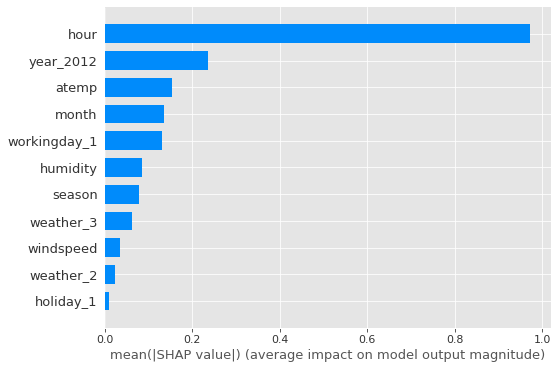

In [ ]:
explainer_xgb = shap.TreeExplainer(xgb)
shap_values_xgb = explainer_xgb.shap_values(X_test, y_test, approximate=True)

shap.summary_plot(shap_values_xgb, X_test, plot_type = 'bar')

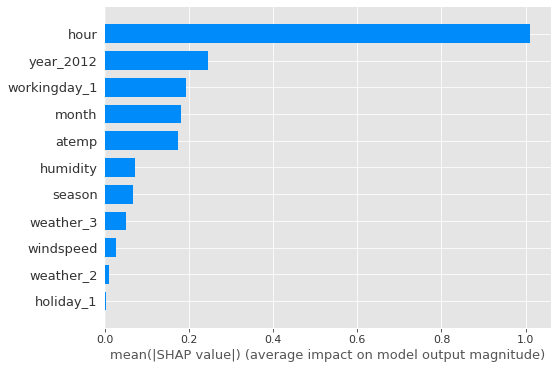

In [ ]:
explainer_rfc = shap.TreeExplainer(rfc)
shap_values_rfc = explainer_rfc.shap_values(X_test, y_test, approximate=True)

shap.summary_plot(shap_values_rfc, X_test, plot_type = 'bar')

By far in both models the most important feature seems to be the hour.

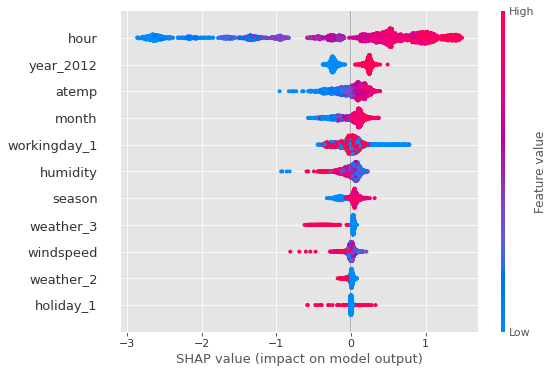

In [ ]:
shap.summary_plot(shap_values_xgb, X_test)

- About feature hour we can see that with high values the count of rented bikes increases. 
- For weather 3 and 2 it seems that the count of rented bikes decreases when their value is 1.
- For high values of month the count of rented bikes increases. The same with the temperature (atemp).

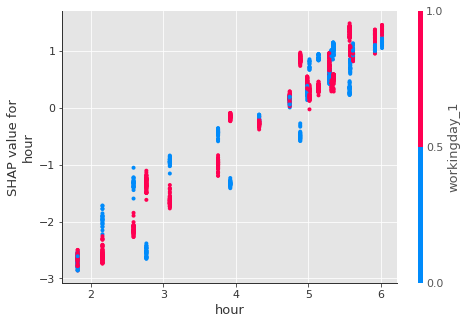

In [ ]:
shap.dependence_plot("hour", shap_values_xgb, X_test)


There is a linear relationship between hour and count.

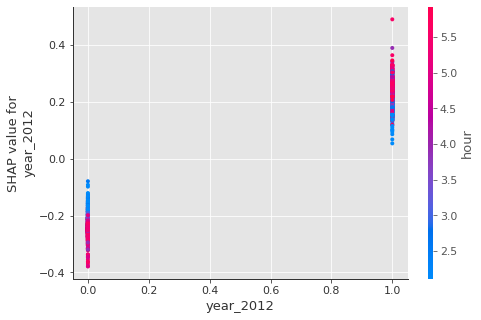

In [ ]:
shap.dependence_plot("year_2012", shap_values_xgb, X_test)


It seems that in 2012 there were more rented bikes than in 2011

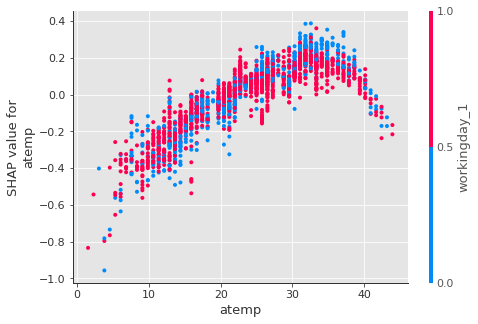

In [ ]:
shap.dependence_plot("atemp", shap_values_xgb, X_test)


In this graph we can see how with low and high values of temperatures the count of rented bikes decreases. It seems that people prefer to ride bikes with warm temperatures

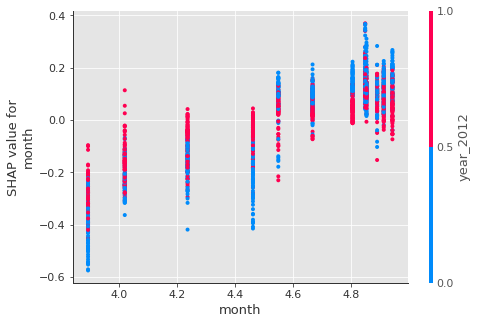

In [ ]:
shap.dependence_plot("month", shap_values_xgb, X_test)


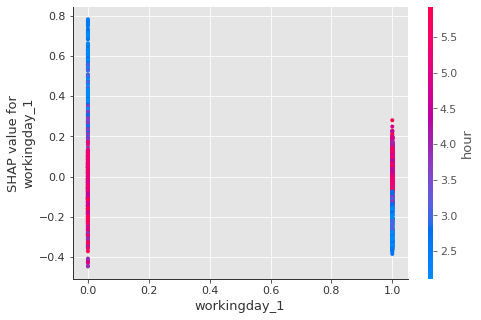

In [ ]:
shap.dependence_plot("workingday_1", shap_values_xgb, X_test)


There seems to be a behaviour where in working days people rent more bikes in late hours and in no working days in early hours

In [ ]:
real_value=pd.DataFrame({'count':np.exp(y_test)})
predict_value=pd.DataFrame({'count':np.exp(y_pred_test)})
with pd.ExcelWriter('c:\\test.xls') as writer:
    real_value.to_excel(writer, sheet_name='Sheet1')
    predict_value.to_excel(writer, sheet_name='Sheet2')

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.


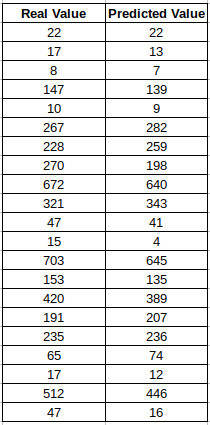

In [ ]:
X_test.loc[9272, [
'hour',
'year_2012',
'atemp',
'workingday_1',
'month',
'humidity',
'season',
'weather_3',
'windspeed',
'weather_2',
'holiday_1'
]]

hour             6.015883
year_2012        1.000000
atemp           31.820000
workingday_1     0.000000
month            4.854068
humidity        37.000000
season           4.896416
weather_3        0.000000
windspeed       16.997900
weather_2        0.000000
holiday_1        0.000000
Name: 9272, dtype: float64

In [ ]:
print("The real value is: " + str(round(np.exp(y_test.loc[9272]))))
print("The predicted value is: " + str(round(np.exp(y_pred_test[8]))))

The real value is: 672
The predicted value is: 641


In [ ]:
X_test.loc[7734, [
'hour',
'year_2012',
'atemp',
'workingday_1',
'month',
'humidity',
'season',
'weather_3',
'windspeed',
'weather_2',
'holiday_1'
]]

hour             5.340098
year_2012        1.000000
atemp           31.060000
workingday_1     0.000000
month            4.913716
humidity        38.000000
season           4.727273
weather_3        0.000000
windspeed       16.997900
weather_2        0.000000
holiday_1        0.000000
Name: 7734, dtype: float64

In [ ]:
print("The real value is: " + str(round(np.exp(y_test.loc[7734]))))
print("The predicted value is: " + str(round(np.exp(y_pred_test[12]))))

The real value is: 703
The predicted value is: 645


In [ ]:
X_test.loc[8182, [
'hour',
'year_2012',
'atemp',
'workingday_1',
'month',
'humidity',
'season',
'weather_3',
'windspeed',
'weather_2',
'holiday_1'
]]

hour             4.888970
year_2012        1.000000
atemp           33.335000
workingday_1     1.000000
month            4.943546
humidity        51.000000
season           4.896416
weather_3        0.000000
windspeed        7.001500
weather_2        0.000000
holiday_1        0.000000
Name: 8182, dtype: float64

In [ ]:
print("The real value is: " + str(round(np.exp(y_test.loc[8182]))))
print("The predicted value is: " + str(round(np.exp(y_pred_test[22]))))

The real value is: 399
The predicted value is: 496


In [ ]:
X_test.loc[3034, [
'hour',
'year_2012',
'atemp',
'workingday_1',
'month',
'humidity',
'season',
'weather_3',
'windspeed',
'weather_2',
'holiday_1'
]]

hour             5.569224
year_2012        0.000000
atemp           30.305000
workingday_1     1.000000
month            4.943546
humidity        65.000000
season           4.896416
weather_3        0.000000
windspeed       16.997900
weather_2        0.000000
holiday_1        0.000000
Name: 3034, dtype: float64

In [ ]:
print("The real value is: " + str(round(np.exp(y_test.loc[3034]))))
print("The predicted value is: " + str(round(np.exp(y_pred_test[35]))))

The real value is: 565
The predicted value is: 445


In [ ]:
example = X_test.loc[9272,:]
shap.initjs()

shap_values_Model = explainer_rfc.shap_values(example)
shap.force_plot(explainer_rfc.expected_value, shap_values_Model, example)

In [ ]:
example = X_test.loc[7734,:]
shap.initjs()

shap_values_Model = explainer_rfc.shap_values(example)
shap.force_plot(explainer_rfc.expected_value, shap_values_Model, example)

In [ ]:
example = X_test.loc[8182,:]
shap.initjs()

shap_values_Model = explainer_rfc.shap_values(example)
shap.force_plot(explainer_rfc.expected_value, shap_values_Model, example)

In [ ]:
example = X_test.loc[3034,:]
shap.initjs()

shap_values_Model = explainer_rfc.shap_values(example)
shap.force_plot(explainer_rfc.expected_value, shap_values_Model, example)

In [ ]:
print("Mean of Hour: " + str(mean(X_test['hour'])))
print("Mean of Year 2012: " + str(mean(X_test['year_2012'])))
print("Mean of Atemp: " + str(mean(X_test['atemp'])))
print("Mean of Working Day 1: " + str(mean(X_test['workingday_1'])))
print("Mean of Month: " + str(mean(X_test['month'])))
print("Mean of Humidity: " + str(mean(X_test['humidity'])))
print("Mean of Season: " + str(mean(X_test['season'])))
print("Mean of Weather 3: " + str(mean(X_test['weather_3'])))
print("Mean of Windspeed: " + str(mean(X_test['windspeed'])))
print("Mean of Weather 2: " + str(mean(X_test['weather_2'])))
print("Mean of Holiday 1: " + str(mean(X_test['holiday_1'])))

Mean of Hour: 4.573618388988397
Mean of Year 2012: 0.5091827364554637
Mean of Atemp: 23.89191000918271
Mean of Working Day 1: 0.6721763085399449
Mean of Month: 4.601509124732905
Mean of Humidity: 61.911386593204774
Mean of Season: 4.598177086150054
Mean of Weather 3: 0.08494031221303948
Mean of Windspeed: 12.573288292010904
Mean of Weather 2: 0.25114784205693297
Mean of Holiday 1: 0.029843893480257115
